In [0]:
!pip install nba_api

     |████████████████████████████████| 225kB 4.7MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import pandas as pd
from pandas import ExcelFile
from pandas.plotting import scatter_matrix
import numpy as np
from datetime import datetime
import time
import requests
import json

import matplotlib.pyplot as plt

import nba_api
from nba_api.stats.static import teams
from nba_api.stats.endpoints import LeagueGameFinder, LeagueGameLog, PlayerGameLog
from nba_api.stats.endpoints import BoxScoreDefensive, BoxScoreMiscV2, BoxScorePlayerTrackV2, BoxScoreUsageV2

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, Normalizer, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

-------
# csv dataset
-------

In [43]:
# df = pd.read_csv('/content/drive/My Drive/mo_bucks_ml/current/gamedata_test_reduced.csv')

df = pd.read_csv('testingtesting123.csv')

In [44]:
df

Unnamed: 0  SEASON_ID  PLAYER_ID   GAME_ID GAME_DATE_x      MATCHUP WL  \
0            1471      22018     203382  21800001   16-Oct-18  BOS vs. PHI  W   
1            3188      22018    1627759  21800001   16-Oct-18  BOS vs. PHI  W   
2            9556      22018     202330  21800001   16-Oct-18  BOS vs. PHI  W   
3           10407      22018     201143  21800001   16-Oct-18  BOS vs. PHI  W   
4           10980      22018     202681  21800001   16-Oct-18  BOS vs. PHI  W   
5           15669      22018     202694  21800001   16-Oct-18  BOS vs. PHI  W   
6           16677      22018    1628400  21800001   16-Oct-18  BOS vs. PHI  W   
7           18622      22018    1626179  21800001   16-Oct-18  BOS vs. PHI  W   
8           19630      22018     203935  21800001   16-Oct-18  BOS vs. PHI  W   
9           19987      22018    1628369  21800001   16-Oct-18  BOS vs. PHI  W   
10          20170      22018    1628464  21800001   16-Oct-18  BOS vs. PHI  W   
11          21361      22018     202954  21800001   16-Oct-18  BOS vs. PHI  W   
12           2578      22018    1628413  21800001   16-Oct-18    PHI @ BOS  L   
13           4953      22018     203496  21800001   16-Oct-18    PHI @ BOS  L   
14           6534      22018     203954  21800001   16-Oct-18    PHI @ BOS  L   
15           7372      22018    1628365  21800001   16-Oct-18    PHI @ BOS  L   
16          12599      22018    1627788  21800001   16-Oct-18    PHI @ BOS  L   
17          14447      22018     204456  21800001   16-Oct-18    PHI @ BOS  L   
18          18042      22018     200755  21800001   16-Oct-18    PHI @ BOS  L   
19          18929      22018     203967  21800001   16-Oct-18    PHI @ BOS  L   
20          19371      22018    1629013  21800001   16-Oct-18    PHI @ BOS  L   
21          19529      22018    1627732  21800001   16-Oct-18    PHI @ BOS  L   
22           1846      22018    1628395  21800002   16-Oct-18  GSW vs. OKC  W   
23           4888      22018    1626188  21800002   16-Oct-18  GSW vs. OKC  W   
24           5293      22018     201939  21800002   16-Oct-18  GSW vs. OKC  W   
25           6400      22018     201142  21800002   16-Oct-18  GSW vs. OKC  W   
26           8523      22018     203110  21800002   16-Oct-18  GSW vs. OKC  W   
27          10714      22018       2738  21800002   16-Oct-18  GSW vs. OKC  W   
28          11849      22018    1627745  21800002   16-Oct-18  GSW vs. OKC  W   
29          13600      22018    1626172  21800002   16-Oct-18  GSW vs. OKC  W   
...           ...        ...        ...       ...         ...          ... ..   
22432       19294      22018    1629013  21801229   10-Apr-19  LAC vs. UTA  W   
22433       20030      22018     202066  21801229   10-Apr-19  LAC vs. UTA  W   
22434       21265      22018    1627820  21801229   10-Apr-19  LAC vs. UTA  W   
22435       21747      22018     101150  21801229   10-Apr-19  LAC vs. UTA  W   
22436       22403      22018    1627826  21801229   10-Apr-19  LAC vs. UTA  W   
22437         239      22018    1628960  21801229   10-Apr-19    UTA @ LAC  L   
22438        2755      22018    1628396  21801229   10-Apr-19    UTA @ LAC  L   
22439        5072      22018     203109  21801229   10-Apr-19    UTA @ LAC  L   
22440       10781      22018     204060  21801229   10-Apr-19    UTA @ LAC  L   
22441       15317      22018    1628513  21801229   10-Apr-19    UTA @ LAC  L   
22442       16198      22018    1627777  21801229   10-Apr-19    UTA @ LAC  L   
22443       16496      22018    1626220  21801229   10-Apr-19    UTA @ LAC  L   
22444       19163      22018     200757  21801229   10-Apr-19    UTA @ LAC  L   
22445        4609      22018    1628380  21801230   10-Apr-19  POR vs. SAC  W   
22446       12909      22018    1627746  21801230   10-Apr-19  POR vs. SAC  W   
22447       13009      22018    1627774  21801230   10-Apr-19  POR vs. SAC  W   
22448       13380      22018     203086  21801230   10-Apr-19  POR vs. SAC  W   
22449       19531      22018    162901

In [45]:
list(df.keys())

['Unnamed: 0',
 'SEASON_ID',
 'PLAYER_ID',
 'GAME_ID',
 'GAME_DATE_x',
 'MATCHUP',
 'WL',
 'MIN_x',
 'FGM',
 'FGA',
 'FG_PCT_x',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB_x',
 'REB',
 'AST_x',
 'STL_x',
 'BLK_x',
 'TOV',
 'PF_x',
 'PTS',
 'PLUS_MINUS',
 'VIDEO_AVAILABLE',
 'TEAM_ID',
 'TEAM_ABBREVIATION_x',
 'TEAM_CITY_x',
 'PLAYER_NAME_x',
 'START_POSITION_x',
 'COMMENT_x',
 'MIN_y',
 'E_OFF_RATING',
 'OFF_RATING',
 'E_DEF_RATING',
 'DEF_RATING',
 'E_NET_RATING',
 'NET_RATING',
 'AST_PCT',
 'AST_TOV',
 'AST_RATIO',
 'OREB_PCT',
 'DREB_PCT',
 'REB_PCT',
 'TM_TOV_PCT',
 'EFG_PCT',
 'TS_PCT',
 'USG_PCT_x',
 'E_USG_PCT',
 'E_PACE',
 'PACE',
 'PACE_PER40',
 'POSS',
 'PIE',
 'Gamescore',
 'FT_missed',
 'GAME_DATE_y',
 'attendance',
 'arena',
 'City',
 'Hometeam',
 'Capacity',
 'Year Built',
 'Home/Away',
 'Capacity_pct',
 'TEAM_ABBREVIATION_y',
 'TEAM_CITY_y',
 'TEAM_NICKNAME',
 'PLAYER_NAME_y',
 'START_POSITION_y',
 'COMMENT_y',
 'MATCHUP_MIN',
 'PARTIAL_POSS

In [6]:
performance_categories = [
    'PCT_FGM',
     'PCT_FGA',
     'PCT_FG3M',
     'PCT_FG3A',
     'PCT_FTM',
     'PCT_FTA',
     'PCT_OREB',
     'PCT_DREB',
     'PCT_REB',
     'PCT_AST',
     'PCT_TOV',
     'PCT_STL',
     'PCT_BLK',
     'PCT_BLKA',
     'PCT_PF',
     'PCT_PFD',
     'PCT_PTS'
]

In [7]:
df['TRUE_PERFORMANCE'] = 0

In [8]:
tp_list = []

for index, row in df.iterrows():
    
    true_performance = (
        row['PCT_FGM'] +
         row['PCT_FGA'] +
         row['PCT_FG3M'] +
         row['PCT_FG3A'] +
         row['PCT_FTM'] +
         row['PCT_FTA'] +
         row['PCT_OREB'] +
         row['PCT_DREB'] +
         row['PCT_REB'] +
         row['PCT_AST'] +
         row['PCT_TOV'] +
         row['PCT_STL'] +
         row['PCT_BLK'] +
         row['PCT_BLKA'] +
         row['PCT_PF'] +
         row['PCT_PFD'] +
         row['PCT_PTS']
    ) / len(performance_categories)
    
    tp_list.append(true_performance)
    
    print(row['GAME_ID'])
    print(row['PLAYER_NAME'])
    print(true_performance)

    df.loc[index,'TRUE_PERFORMANCE'] = true_performance
    print('----------')

21801197
Steven Adams
0.12335294117647058
----------
21801186
Steven Adams
0.21617647058823528
----------
21801161
Steven Adams
0.24358823529411766
----------
21801146
Steven Adams
0.17276470588235296
----------
21801133
Steven Adams
0.11770588235294117
----------
21801119
Steven Adams
0.2354117647058824
----------
21801104
Steven Adams
0.1981764705882353
----------
21801083
Steven Adams
0.1507647058823529
----------
21801072
Steven Adams
0.0981764705882353
----------
21801054
Steven Adams
0.23535294117647054
----------
21801038
Steven Adams
0.1926470588235294
----------
21801020
Steven Adams
0.2291176470588235
----------
21801017
Steven Adams
0.17647058823529413
----------
21801005
Steven Adams
0.1936470588235294
----------
21800985
Steven Adams
0.13847058823529415
----------
21800976
Steven Adams
0.1440588235294118
----------
21800963
Steven Adams
0.2390588235294117
----------
21800951
Steven Adams
0.2287058823529412
----------
21800940
Steven Adams
0.3534705882352942
----------
2180

----------
21800238
LaMarcus Aldridge
0.26988235294117646
----------
21800215
LaMarcus Aldridge
0.22782352941176476
----------
21800211
LaMarcus Aldridge
0.16576470588235295
----------
21800197
LaMarcus Aldridge
0.23588235294117652
----------
21800180
LaMarcus Aldridge
0.262
----------
21800156
LaMarcus Aldridge
0.20817647058823532
----------
21800137
LaMarcus Aldridge
0.18347058823529416
----------
21800130
LaMarcus Aldridge
0.17129411764705882
----------
21800110
LaMarcus Aldridge
0.3149411764705882
----------
21800094
LaMarcus Aldridge
0.23647058823529415
----------
21800082
LaMarcus Aldridge
0.24147058823529413
----------
21800058
LaMarcus Aldridge
0.3030588235294117
----------
21800048
LaMarcus Aldridge
0.3051764705882353
----------
21800034
LaMarcus Aldridge
0.2076470588235294
----------
21800010
LaMarcus Aldridge
0.3089411764705883
----------
21801229
Grayson Allen
0.3022941176470589
----------
21801217
Grayson Allen
0.13123529411764706
----------
21801208
Grayson Allen
0.158941

----------
21800303
Kyle Anderson
0.11494117647058823
----------
21800291
Kyle Anderson
0.1295294117647059
----------
21800266
Kyle Anderson
0.16441176470588237
----------
21800262
Kyle Anderson
0.10635294117647058
----------
21800244
Kyle Anderson
0.09694117647058823
----------
21800234
Kyle Anderson
0.112
----------
21800220
Kyle Anderson
0.11458823529411764
----------
21800207
Kyle Anderson
0.17194117647058824
----------
21800194
Kyle Anderson
0.17258823529411765
----------
21800179
Kyle Anderson
0.17129411764705885
----------
21800158
Kyle Anderson
0.1743529411764706
----------
21800147
Kyle Anderson
0.14123529411764704
----------
21800136
Kyle Anderson
0.16799999999999998
----------
21800122
Kyle Anderson
0.12788235294117647
----------
21800102
Kyle Anderson
0.17647058823529416
----------
21800080
Kyle Anderson
0.14952941176470588
----------
21800061
Kyle Anderson
0.15058823529411763
----------
21800045
Kyle Anderson
0.1875882352941176
----------
21800020
Kyle Anderson
0.223294117

----------
21800120
Ryan Arcidiacono
0.06858823529411766
----------
21800106
Ryan Arcidiacono
0.10147058823529412
----------
21800091
Ryan Arcidiacono
0.08876470588235295
----------
21800076
Ryan Arcidiacono
0.19005882352941178
----------
21800067
Ryan Arcidiacono
0.12447058823529412
----------
21800056
Ryan Arcidiacono
0.2152941176470588
----------
21800031
Ryan Arcidiacono
0.09282352941176471
----------
21800014
Ryan Arcidiacono
0.09964705882352941
----------
21801116
Trevor Ariza
0.28970588235294115
----------
21801069
Trevor Ariza
0.10076470588235295
----------
21801051
Trevor Ariza
0.10764705882352942
----------
21801035
Trevor Ariza
0.15394117647058825
----------
21801028
Trevor Ariza
0.25329411764705884
----------
21801015
Trevor Ariza
0.10035294117647059
----------
21801002
Trevor Ariza
0.11723529411764705
----------
21800988
Trevor Ariza
0.20341176470588238
----------
21800977
Trevor Ariza
0.18300000000000002
----------
21800967
Trevor Ariza
0.1544705882352941
----------
21800

----------
21800288
Dwayne Bacon
0.14447058823529413
----------
21800274
Dwayne Bacon
0.1161764705882353
----------
21800252
Dwayne Bacon
0.17558823529411763
----------
21800239
Dwayne Bacon
0.15835294117647059
----------
21800225
Dwayne Bacon
0.08694117647058822
----------
21800199
Dwayne Bacon
0.1383529411764706
----------
21800184
Dwayne Bacon
0.0
----------
21800168
Dwayne Bacon
0.14805882352941177
----------
21800126
Dwayne Bacon
0.1815294117647059
----------
21800096
Dwayne Bacon
0.0
----------
21800067
Dwayne Bacon
0.25382352941176467
----------
21800017
Dwayne Bacon
0.23829411764705882
----------
21801230
Marvin Bagley III
0.27752941176470586
----------
21801207
Marvin Bagley III
0.2621176470588235
----------
21801188
Marvin Bagley III
0.33782352941176474
----------
21801178
Marvin Bagley III
0.23323529411764707
----------
21801163
Marvin Bagley III
0.23982352941176477
----------
21801138
Marvin Bagley III
0.2352941176470588
----------
21801128
Marvin Bagley III
0.2271176470588

----------
21800468
Harrison Barnes
0.14370588235294116
----------
21800454
Harrison Barnes
0.23694117647058827
----------
21800440
Harrison Barnes
0.19229411764705884
----------
21800419
Harrison Barnes
0.16758823529411768
----------
21800412
Harrison Barnes
0.21388235294117652
----------
21800397
Harrison Barnes
0.17882352941176471
----------
21800378
Harrison Barnes
0.16052941176470586
----------
21800363
Harrison Barnes
0.20523529411764707
----------
21800352
Harrison Barnes
0.17647058823529413
----------
21800341
Harrison Barnes
0.25641176470588234
----------
21800328
Harrison Barnes
0.284764705882353
----------
21800309
Harrison Barnes
0.15176470588235294
----------
21800283
Harrison Barnes
0.18794117647058822
----------
21800261
Harrison Barnes
0.20352941176470588
----------
21800244
Harrison Barnes
0.12470588235294118
----------
21800232
Harrison Barnes
0.18570588235294117
----------
21800210
Harrison Barnes
0.20841176470588235
----------
21800193
Harrison Barnes
0.222
--------

----------
21800848
Kent Bazemore
0.22988235294117643
----------
21800837
Kent Bazemore
0.2093529411764706
----------
21800827
Kent Bazemore
0.22311764705882348
----------
21800813
Kent Bazemore
0.19482352941176473
----------
21800791
Kent Bazemore
0.28294117647058825
----------
21800784
Kent Bazemore
0.21199999999999997
----------
21800773
Kent Bazemore
0.22311764705882356
----------
21800762
Kent Bazemore
0.14758823529411763
----------
21800529
Kent Bazemore
0.19705882352941176
----------
21800522
Kent Bazemore
0.25735294117647056
----------
21800504
Kent Bazemore
0.22941176470588234
----------
21800486
Kent Bazemore
0.17923529411764708
----------
21800472
Kent Bazemore
0.26411764705882357
----------
21800452
Kent Bazemore
0.17905882352941174
----------
21800436
Kent Bazemore
0.3098235294117647
----------
21800420
Kent Bazemore
0.1669411764705882
----------
21800412
Kent Bazemore
0.23823529411764705
----------
21800380
Kent Bazemore
0.19958823529411762
----------
21800357
Kent Bazemo

----------
21800730
Marco Belinelli
0.07276470588235295
----------
21800711
Marco Belinelli
0.21929411764705883
----------
21800690
Marco Belinelli
0.15405882352941172
----------
21800674
Marco Belinelli
0.24664705882352939
----------
21800661
Marco Belinelli
0.2517647058823529
----------
21800634
Marco Belinelli
0.20129411764705882
----------
21800619
Marco Belinelli
0.2230588235294118
----------
21800611
Marco Belinelli
0.1555294117647059
----------
21800591
Marco Belinelli
0.17517647058823527
----------
21800581
Marco Belinelli
0.14835294117647058
----------
21800563
Marco Belinelli
0.14258823529411768
----------
21800545
Marco Belinelli
0.2137058823529412
----------
21800535
Marco Belinelli
0.16923529411764704
----------
21800524
Marco Belinelli
0.23682352941176474
----------
21800510
Marco Belinelli
0.16329411764705884
----------
21800483
Marco Belinelli
0.11135294117647059
----------
21800475
Marco Belinelli
0.19082352941176473
----------
21800456
Marco Belinelli
0.20270588235294

----------
21801162
Davis Bertans
0.12388235294117649
----------
21801149
Davis Bertans
0.11458823529411764
----------
21801129
Davis Bertans
0.2067647058823529
----------
21801107
Davis Bertans
0.10882352941176471
----------
21801100
Davis Bertans
0.15664705882352942
----------
21801084
Davis Bertans
0.16076470588235292
----------
21801071
Davis Bertans
0.15464705882352942
----------
21801055
Davis Bertans
0.12382352941176471
----------
21801039
Davis Bertans
0.14570588235294119
----------
21801032
Davis Bertans
0.27152941176470585
----------
21801011
Davis Bertans
0.14858823529411766
----------
21800999
Davis Bertans
0.1111764705882353
----------
21800968
Davis Bertans
0.15270588235294116
----------
21800954
Davis Bertans
0.09152941176470587
----------
21800940
Davis Bertans
0.15376470588235291
----------
21800917
Davis Bertans
0.07929411764705882
----------
21800900
Davis Bertans
0.08752941176470588
----------
21800896
Davis Bertans
0.12205882352941175
----------
21800876
Davis Bert

----------
21800067
Bismack Biyombo
0.24211764705882355
----------
21800041
Bismack Biyombo
0.36058823529411765
----------
21800017
Bismack Biyombo
0.04141176470588235
----------
21801230
Nemanja Bjelica
0.1477647058823529
----------
21801207
Nemanja Bjelica
0.1332941176470588
----------
21801188
Nemanja Bjelica
0.2064705882352941
----------
21801178
Nemanja Bjelica
0.20441176470588235
----------
21801163
Nemanja Bjelica
0.21764705882352942
----------
21801149
Nemanja Bjelica
0.17170588235294115
----------
21801128
Nemanja Bjelica
0.06911764705882353
----------
21801114
Nemanja Bjelica
0.14594117647058824
----------
21801102
Nemanja Bjelica
0.1228235294117647
----------
21801094
Nemanja Bjelica
0.20441176470588235
----------
21801078
Nemanja Bjelica
0.17552941176470588
----------
21801063
Nemanja Bjelica
0.22547058823529412
----------
21801047
Nemanja Bjelica
0.2027647058823529
----------
21801027
Nemanja Bjelica
0.18894117647058822
----------
21801022
Nemanja Bjelica
0.275470588235294

----------
21800798
Bojan Bogdanovic
0.1386470588235294
----------
21800793
Bojan Bogdanovic
0.2111764705882353
----------
21800781
Bojan Bogdanovic
0.18711764705882358
----------
21800765
Bojan Bogdanovic
0.21205882352941174
----------
21800759
Bojan Bogdanovic
0.1685294117647059
----------
21800745
Bojan Bogdanovic
0.20988235294117646
----------
21800731
Bojan Bogdanovic
0.2009411764705882
----------
21800706
Bojan Bogdanovic
0.16500000000000004
----------
21800688
Bojan Bogdanovic
0.2312941176470588
----------
21800681
Bojan Bogdanovic
0.18305882352941175
----------
21800667
Bojan Bogdanovic
0.11835294117647056
----------
21800651
Bojan Bogdanovic
0.16399999999999998
----------
21800623
Bojan Bogdanovic
0.2291764705882353
----------
21800607
Bojan Bogdanovic
0.13347058823529412
----------
21800599
Bojan Bogdanovic
0.19523529411764706
----------
21800589
Bojan Bogdanovic
0.26123529411764707
----------
21800569
Bojan Bogdanovic
0.20158823529411768
----------
21800542
Bojan Bogdanovic


Avery Bradley
0.12970588235294114
----------
21800690
Avery Bradley
0.16629411764705884
----------
21800676
Avery Bradley
0.11488235294117649
----------
21800664
Avery Bradley
0.1922941176470588
----------
21800650
Avery Bradley
0.10252941176470587
----------
21800630
Avery Bradley
0.04829411764705882
----------
21800618
Avery Bradley
0.10935294117647058
----------
21800606
Avery Bradley
0.1436470588235294
----------
21800573
Avery Bradley
0.12941176470588234
----------
21800553
Avery Bradley
0.05817647058823529
----------
21800535
Avery Bradley
0.15235294117647055
----------
21800526
Avery Bradley
0.13288235294117645
----------
21800511
Avery Bradley
0.15341176470588236
----------
21800494
Avery Bradley
0.19129411764705886
----------
21800479
Avery Bradley
0.1486470588235294
----------
21800468
Avery Bradley
0.06017647058823529
----------
21800450
Avery Bradley
0.06494117647058824
----------
21800434
Avery Bradley
0.21882352941176475
----------
21800417
Avery Bradley
0.131941176470588

----------
21800210
Ryan Broekhoff
0.171
----------
21800150
Ryan Broekhoff
0.0
----------
21800084
Ryan Broekhoff
0.0
----------
21800052
Ryan Broekhoff
0.047058823529411764
----------
21800044
Ryan Broekhoff
0.03135294117647058
----------
21800032
Ryan Broekhoff
0.1561764705882353
----------
21800013
Ryan Broekhoff
0.237
----------
21801029
Malcolm Brogdon
0.12041176470588233
----------
21801010
Malcolm Brogdon
0.222
----------
21800999
Malcolm Brogdon
0.12988235294117648
----------
21800990
Malcolm Brogdon
0.19070588235294117
----------
21800975
Malcolm Brogdon
0.14205882352941177
----------
21800955
Malcolm Brogdon
0.19399999999999998
----------
21800934
Malcolm Brogdon
0.12252941176470589
----------
21800920
Malcolm Brogdon
0.19941176470588237
----------
21800902
Malcolm Brogdon
0.260235294117647
----------
21800891
Malcolm Brogdon
0.17470588235294118
----------
21800870
Malcolm Brogdon
0.1943529411764706
----------
21800854
Malcolm Brogdon
0.14988235294117647
----------
21800843


----------
21800806
Sterling Brown
0.15923529411764706
----------
21800792
Sterling Brown
0.08817647058823529
----------
21800778
Sterling Brown
0.13752941176470587
----------
21800766
Sterling Brown
0.061294117647058825
----------
21800738
Sterling Brown
0.15082352941176472
----------
21800727
Sterling Brown
0.22747058823529415
----------
21800694
Sterling Brown
0.15088235294117647
----------
21800682
Sterling Brown
0.09770588235294117
----------
21800660
Sterling Brown
0.23164705882352937
----------
21800654
Sterling Brown
0.19058823529411767
----------
21800640
Sterling Brown
0.08752941176470588
----------
21800622
Sterling Brown
0.1684117647058824
----------
21800610
Sterling Brown
0.20141176470588235
----------
21800594
Sterling Brown
0.11823529411764708
----------
21800580
Sterling Brown
0.15
----------
21800550
Sterling Brown
0.13405882352941176
----------
21800527
Sterling Brown
0.12317647058823529
----------
21800513
Sterling Brown
0.0661764705882353
----------
21800497
Sterli

----------
21800904
Reggie Bullock
0.1131764705882353
----------
21800887
Reggie Bullock
0.15682352941176472
----------
21800872
Reggie Bullock
0.17476470588235293
----------
21800848
Reggie Bullock
0.12147058823529411
----------
21800835
Reggie Bullock
0.127
----------
21800799
Reggie Bullock
0.21788235294117647
----------
21800790
Reggie Bullock
0.1661176470588235
----------
21800775
Reggie Bullock
0.15294117647058827
----------
21800764
Reggie Bullock
0.103
----------
21800726
Reggie Bullock
0.11023529411764706
----------
21800714
Reggie Bullock
0.1917058823529412
----------
21800693
Reggie Bullock
0.17770588235294119
----------
21800680
Reggie Bullock
0.11470588235294117
----------
21800672
Reggie Bullock
0.15741176470588233
----------
21800657
Reggie Bullock
0.11358823529411766
----------
21800648
Reggie Bullock
0.17358823529411763
----------
21800630
Reggie Bullock
0.15464705882352947
----------
21800620
Reggie Bullock
0.19941176470588237
----------
21800616
Reggie Bullock
0.1322

----------
21800289
Jimmy Butler
0.3463529411764706
----------
21800270
Jimmy Butler
0.2576470588235294
----------
21800253
Jimmy Butler
0.17941176470588238
----------
21800242
Jimmy Butler
0.14858823529411763
----------
21800225
Jimmy Butler
0.2054705882352941
----------
21800218
Jimmy Butler
0.1710588235294118
----------
21800202
Jimmy Butler
0.13594117647058823
----------
21800173
Jimmy Butler
0.18199999999999997
----------
21800162
Jimmy Butler
0.20099999999999998
----------
21800148
Jimmy Butler
0.2078823529411765
----------
21800124
Jimmy Butler
0.2031764705882353
----------
21800093
Jimmy Butler
0.2096470588235294
----------
21800071
Jimmy Butler
0.14264705882352943
----------
21800055
Jimmy Butler
0.2851176470588235
----------
21800043
Jimmy Butler
0.21211764705882352
----------
21800021
Jimmy Butler
0.26194117647058823
----------
21800010
Jimmy Butler
0.3222352941176471
----------
21801225
Bruno Caboclo
0.18029411764705885
----------
21801210
Bruno Caboclo
0.24023529411764705


----------
21800289
DeMarre Carroll
0.1390588235294118
----------
21800265
DeMarre Carroll
0.2384117647058823
----------
21800261
DeMarre Carroll
0.08464705882352941
----------
21800250
DeMarre Carroll
0.27717647058823536
----------
21800224
DeMarre Carroll
0.18841176470588233
----------
21800219
DeMarre Carroll
0.17252941176470588
----------
21800205
DeMarre Carroll
0.13047058823529412
----------
21800195
DeMarre Carroll
0.27170588235294124
----------
21800182
DeMarre Carroll
0.2574117647058824
----------
21800171
DeMarre Carroll
0.19182352941176473
----------
21801225
Jevon Carter
0.32158823529411773
----------
21801210
Jevon Carter
0.15441176470588236
----------
21801201
Jevon Carter
0.19941176470588234
----------
21801187
Jevon Carter
0.19788235294117645
----------
21801175
Jevon Carter
0.23558823529411765
----------
21801151
Jevon Carter
0.2716470588235294
----------
21801144
Jevon Carter
0.03676470588235294
----------
21801118
Jevon Carter
0.08529411764705884
----------
21801104


21800785
Willie Cauley-Stein
0.19629411764705887
----------
21800762
Willie Cauley-Stein
0.2254705882352941
----------
21800736
Willie Cauley-Stein
0.19576470588235292
----------
21800725
Willie Cauley-Stein
0.18594117647058825
----------
21800702
Willie Cauley-Stein
0.14270588235294118
----------
21800696
Willie Cauley-Stein
0.15129411764705883
----------
21800680
Willie Cauley-Stein
0.16194117647058823
----------
21800666
Willie Cauley-Stein
0.22511764705882356
----------
21800649
Willie Cauley-Stein
0.23205882352941176
----------
21800636
Willie Cauley-Stein
0.20476470588235293
----------
21800620
Willie Cauley-Stein
0.33617647058823535
----------
21800604
Willie Cauley-Stein
0.22235294117647061
----------
21800598
Willie Cauley-Stein
0.3392941176470588
----------
21800583
Willie Cauley-Stein
0.2605882352941176
----------
21800564
Willie Cauley-Stein
0.22376470588235292
----------
21800552
Willie Cauley-Stein
0.16823529411764707
----------
21800541
Willie Cauley-Stein
0.238411764705

----------
21800646
Marquese Chriss
0.0995294117647059
----------
21800641
Marquese Chriss
0.18029411764705885
----------
21800625
Marquese Chriss
0.32552941176470584
----------
21800461
Marquese Chriss
0.04029411764705883
----------
21800334
Marquese Chriss
0.14211764705882352
----------
21800326
Marquese Chriss
0.14347058823529413
----------
21800309
Marquese Chriss
0.1264705882352941
----------
21800296
Marquese Chriss
0.23335294117647057
----------
21800231
Marquese Chriss
0.18817647058823528
----------
21800213
Marquese Chriss
0.029411764705882353
----------
21800163
Marquese Chriss
0.25647058823529406
----------
21800118
Marquese Chriss
0.052941176470588235
----------
21800101
Marquese Chriss
0.2430588235294118
----------
21801200
Gary Clark
0.17076470588235293
----------
21801184
Gary Clark
0.16988235294117646
----------
21801176
Gary Clark
0.3238235294117647
----------
21801163
Gary Clark
0.10294117647058823
----------
21801126
Gary Clark
0.22158823529411764
----------
21801111

----------
21800501
Zach Collins
0.3151764705882353
----------
21800495
Zach Collins
0.13835294117647057
----------
21800476
Zach Collins
0.14641176470588238
----------
21800465
Zach Collins
0.226
----------
21800450
Zach Collins
0.3218235294117647
----------
21800427
Zach Collins
0.2901176470588235
----------
21800410
Zach Collins
0.09864705882352942
----------
21800402
Zach Collins
0.32211764705882356
----------
21800385
Zach Collins
0.07864705882352942
----------
21800366
Zach Collins
0.1473529411764706
----------
21800352
Zach Collins
0.07923529411764706
----------
21800342
Zach Collins
0.1251764705882353
----------
21800329
Zach Collins
0.29611764705882354
----------
21800314
Zach Collins
0.13964705882352943
----------
21800293
Zach Collins
0.1951176470588235
----------
21800277
Zach Collins
0.18041176470588235
----------
21800259
Zach Collins
0.2524705882352941
----------
21800251
Zach Collins
0.1466470588235294
----------
21800237
Zach Collins
0.2878235294117647
----------
21800

----------
21800838
DeMarcus Cousins
0.2269411764705882
----------
21800822
DeMarcus Cousins
0.3085882352941176
----------
21800810
DeMarcus Cousins
0.4401176470588235
----------
21800782
DeMarcus Cousins
0.3793529411764705
----------
21800768
DeMarcus Cousins
0.2955882352941176
----------
21800745
DeMarcus Cousins
0.3168823529411765
----------
21800732
DeMarcus Cousins
0.4323529411764706
----------
21800716
DeMarcus Cousins
0.18211764705882352
----------
21800701
DeMarcus Cousins
0.35305882352941176
----------
21800676
DeMarcus Cousins
0.5102941176470589
----------
21800546
Robert Covington
0.17788235294117646
----------
21800537
Robert Covington
0.20411764705882351
----------
21800522
Robert Covington
0.24152941176470588
----------
21800507
Robert Covington
0.2126470588235294
----------
21800493
Robert Covington
0.1678235294117647
----------
21800475
Robert Covington
0.32864705882352946
----------
21800463
Robert Covington
0.24176470588235296
----------
21800446
Robert Covington
0.16

----------
21800944
Seth Curry
0.21341176470588236
----------
21800930
Seth Curry
0.1640588235294118
----------
21800913
Seth Curry
0.099
----------
21800898
Seth Curry
0.17494117647058824
----------
21800882
Seth Curry
0.1483529411764706
----------
21800869
Seth Curry
0.048529411764705876
----------
21800862
Seth Curry
0.16347058823529412
----------
21800846
Seth Curry
0.23041176470588237
----------
21800834
Seth Curry
0.12388235294117646
----------
21800816
Seth Curry
0.029411764705882353
----------
21800803
Seth Curry
0.14700000000000002
----------
21800763
Seth Curry
0.08176470588235295
----------
21800734
Seth Curry
0.18858823529411767
----------
21800718
Seth Curry
0.17447058823529413
----------
21800703
Seth Curry
0.07694117647058824
----------
21800700
Seth Curry
0.14217647058823532
----------
21800677
Seth Curry
0.2444705882352941
----------
21800662
Seth Curry
0.20870588235294116
----------
21800649
Seth Curry
0.08141176470588235
----------
21800643
Seth Curry
0.0832941176470

----------
21800869
Ed Davis
0.24594117647058825
----------
21800853
Ed Davis
0.2640588235294118
----------
21800842
Ed Davis
0.15388235294117644
----------
21800820
Ed Davis
0.2528823529411765
----------
21800804
Ed Davis
0.2337058823529412
----------
21800792
Ed Davis
0.375
----------
21800777
Ed Davis
0.22770588235294117
----------
21800767
Ed Davis
0.15541176470588236
----------
21800752
Ed Davis
0.18199999999999997
----------
21800746
Ed Davis
0.25894117647058823
----------
21800721
Ed Davis
0.2744117647058824
----------
21800708
Ed Davis
0.262
----------
21800696
Ed Davis
0.17105882352941176
----------
21800673
Ed Davis
0.2507058823529412
----------
21800659
Ed Davis
0.14558823529411763
----------
21800645
Ed Davis
0.16858823529411768
----------
21800624
Ed Davis
0.2234705882352941
----------
21800609
Ed Davis
0.24317647058823527
----------
21800592
Ed Davis
0.260764705882353
----------
21800584
Ed Davis
0.16582352941176473
----------
21800570
Ed Davis
0.2144705882352941
--------

----------
21800207
Donte DiVincenzo
0.16664705882352943
----------
21800187
Donte DiVincenzo
0.07088235294117647
----------
21800175
Donte DiVincenzo
0.11541176470588235
----------
21800166
Donte DiVincenzo
0.11488235294117646
----------
21800152
Donte DiVincenzo
0.09011764705882352
----------
21800133
Donte DiVincenzo
0.1807058823529412
----------
21800115
Donte DiVincenzo
0.10929411764705883
----------
21800092
Donte DiVincenzo
0.16317647058823528
----------
21800081
Donte DiVincenzo
0.1779411764705882
----------
21800071
Donte DiVincenzo
0.12247058823529411
----------
21800059
Donte DiVincenzo
0.15188235294117647
----------
21800042
Donte DiVincenzo
0.09723529411764706
----------
21800023
Donte DiVincenzo
0.16141176470588234
----------
21800003
Donte DiVincenzo
0.15541176470588236
----------
21801215
Cheick Diallo
0.12558823529411767
----------
21801207
Cheick Diallo
0.17129411764705882
----------
21801189
Cheick Diallo
0.11782352941176472
----------
21801171
Cheick Diallo
0.119529

----------
21800358
Spencer Dinwiddie
0.2188235294117647
----------
21800345
Spencer Dinwiddie
0.2283529411764706
----------
21800333
Spencer Dinwiddie
0.14111764705882354
----------
21800323
Spencer Dinwiddie
0.1686470588235294
----------
21800308
Spencer Dinwiddie
0.30929411764705883
----------
21800289
Spencer Dinwiddie
0.27352941176470585
----------
21800265
Spencer Dinwiddie
0.19158823529411761
----------
21800261
Spencer Dinwiddie
0.20511764705882354
----------
21800250
Spencer Dinwiddie
0.22182352941176472
----------
21800224
Spencer Dinwiddie
0.24223529411764708
----------
21800219
Spencer Dinwiddie
0.2918823529411765
----------
21800205
Spencer Dinwiddie
0.2483529411764706
----------
21800195
Spencer Dinwiddie
0.15876470588235292
----------
21800182
Spencer Dinwiddie
0.303
----------
21800171
Spencer Dinwiddie
0.18564705882352942
----------
21800151
Spencer Dinwiddie
0.14688235294117646
----------
21800134
Spencer Dinwiddie
0.1898235294117647
----------
21800118
Spencer Dinwid

----------
21800518
Andre Drummond
0.240764705882353
----------
21800502
Andre Drummond
0.24076470588235288
----------
21800486
Andre Drummond
0.3646470588235293
----------
21800469
Andre Drummond
0.3071176470588236
----------
21800463
Andre Drummond
0.2816470588235294
----------
21800443
Andre Drummond
0.20747058823529413
----------
21800431
Andre Drummond
0.2823529411764706
----------
21800405
Andre Drummond
0.2695882352941177
----------
21800392
Andre Drummond
0.34029411764705886
----------
21800387
Andre Drummond
0.32594117647058823
----------
21800369
Andre Drummond
0.2514705882352941
----------
21800361
Andre Drummond
0.232
----------
21800343
Andre Drummond
0.2987058823529412
----------
21800331
Andre Drummond
0.3720588235294118
----------
21800321
Andre Drummond
0.3614117647058823
----------
21800301
Andre Drummond
0.23923529411764702
----------
21800287
Andre Drummond
0.32041176470588234
----------
21800267
Andre Drummond
0.28582352941176464
----------
21800258
Andre Drummond


----------
21801014
Wayne Ellington
0.1914117647058824
----------
21801003
Wayne Ellington
0.11852941176470587
----------
21800992
Wayne Ellington
0.2071764705882353
----------
21800980
Wayne Ellington
0.11594117647058823
----------
21800966
Wayne Ellington
0.21788235294117647
----------
21800949
Wayne Ellington
0.16005882352941175
----------
21800935
Wayne Ellington
0.21935294117647058
----------
21800917
Wayne Ellington
0.1278235294117647
----------
21800899
Wayne Ellington
0.1458823529411765
----------
21800888
Wayne Ellington
0.09105882352941175
----------
21800877
Wayne Ellington
0.0788235294117647
----------
21800855
Wayne Ellington
0.10723529411764705
----------
21800840
Wayne Ellington
0.1285294117647059
----------
21800772
Wayne Ellington
0.11623529411764706
----------
21800757
Wayne Ellington
0.14541176470588232
----------
21800741
Wayne Ellington
0.145764705882353
----------
21800672
Wayne Ellington
0.15688235294117647
----------
21800654
Wayne Ellington
0.2255294117647059
-

----------
21800075
Dante Exum
0.13194117647058823
----------
21800057
Dante Exum
0.13570588235294118
----------
21800045
Dante Exum
0.19252941176470592
----------
21800024
Dante Exum
0.158
----------
21800011
Dante Exum
0.22376470588235295
----------
21801217
Derrick Favors
0.2670588235294118
----------
21801134
Derrick Favors
0.07605882352941176
----------
21801121
Derrick Favors
0.29505882352941176
----------
21801105
Derrick Favors
0.23594117647058824
----------
21801090
Derrick Favors
0.16111764705882356
----------
21801076
Derrick Favors
0.25629411764705884
----------
21801068
Derrick Favors
0.21688235294117647
----------
21801051
Derrick Favors
0.17276470588235293
----------
21801041
Derrick Favors
0.2721764705882353
----------
21801024
Derrick Favors
0.26905882352941174
----------
21801019
Derrick Favors
0.24635294117647064
----------
21801005
Derrick Favors
0.23711764705882357
----------
21800982
Derrick Favors
0.23105882352941176
----------
21800971
Derrick Favors
0.284705882

----------
21800552
Yogi Ferrell
0.06735294117647059
----------
21800541
Yogi Ferrell
0.2957058823529412
----------
21800514
Yogi Ferrell
0.09805882352941177
----------
21800511
Yogi Ferrell
0.20229411764705882
----------
21800492
Yogi Ferrell
0.07852941176470588
----------
21800477
Yogi Ferrell
0.16576470588235293
----------
21800466
Yogi Ferrell
0.1944705882352941
----------
21800446
Yogi Ferrell
0.22482352941176467
----------
21800440
Yogi Ferrell
0.22370588235294117
----------
21800428
Yogi Ferrell
0.10264705882352941
----------
21800414
Yogi Ferrell
0.27929411764705886
----------
21800379
Yogi Ferrell
0.2647058823529412
----------
21800372
Yogi Ferrell
0.03917647058823529
----------
21800353
Yogi Ferrell
0.0478235294117647
----------
21800318
Yogi Ferrell
0.058823529411764705
----------
21800292
Yogi Ferrell
0.2498235294117647
----------
21800231
Yogi Ferrell
0.19247058823529414
----------
21800173
Yogi Ferrell
0.21658823529411766
----------
21800133
Yogi Ferrell
0.085235294117647

----------
21800186
Evan Fournier
0.18923529411764706
----------
21800167
Evan Fournier
0.18094117647058824
----------
21800154
Evan Fournier
0.2722352941176471
----------
21800142
Evan Fournier
0.24347058823529408
----------
21800137
Evan Fournier
0.18258823529411766
----------
21800117
Evan Fournier
0.30623529411764705
----------
21800098
Evan Fournier
0.16005882352941178
----------
21800081
Evan Fournier
0.1254705882352941
----------
21800064
Evan Fournier
0.23617647058823532
----------
21800040
Evan Fournier
0.1756470588235294
----------
21800029
Evan Fournier
0.22023529411764706
----------
21800017
Evan Fournier
0.21558823529411766
----------
21800006
Evan Fournier
0.23870588235294116
----------
21801230
De'Aaron Fox
0.16576470588235295
----------
21801207
De'Aaron Fox
0.23741176470588238
----------
21801188
De'Aaron Fox
0.22882352941176468
----------
21801178
De'Aaron Fox
0.19499999999999998
----------
21801163
De'Aaron Fox
0.3601764705882353
----------
21801149
De'Aaron Fox
0.15

Langston Galloway
0.1323529411764706
----------
21801186
Langston Galloway
0.1683529411764706
----------
21801165
Langston Galloway
0.23917647058823532
----------
21801152
Langston Galloway
0.1874117647058824
----------
21801139
Langston Galloway
0.18347058823529408
----------
21801122
Langston Galloway
0.2176470588235294
----------
21801115
Langston Galloway
0.12529411764705883
----------
21801101
Langston Galloway
0.07594117647058823
----------
21801093
Langston Galloway
0.13188235294117648
----------
21801077
Langston Galloway
0.16847058823529415
----------
21801050
Langston Galloway
0.1013529411764706
----------
21801044
Langston Galloway
0.11717647058823531
----------
21801026
Langston Galloway
0.13023529411764706
----------
21801014
Langston Galloway
0.14188235294117646
----------
21801003
Langston Galloway
0.15311764705882355
----------
21800992
Langston Galloway
0.15170588235294116
----------
21800980
Langston Galloway
0.18176470588235297
----------
21800966
Langston Galloway
0

21801133
Paul George
0.23547058823529407
----------
21801119
Paul George
0.22341176470588237
----------
21801104
Paul George
0.3624705882352941
----------
21801083
Paul George
0.24435294117647058
----------
21801072
Paul George
0.2687058823529412
----------
21801054
Paul George
0.3179411764705883
----------
21801038
Paul George
0.3186470588235293
----------
21801020
Paul George
0.3728235294117647
----------
21801017
Paul George
0.2596470588235294
----------
21801005
Paul George
0.2780588235294118
----------
21800985
Paul George
0.276235294117647
----------
21800976
Paul George
0.3405294117647059
----------
21800963
Paul George
0.2595882352941177
----------
21800910
Paul George
0.2952352941176471
----------
21800890
Paul George
0.19505882352941178
----------
21800881
Paul George
0.24370588235294116
----------
21800866
Paul George
0.2632941176470589
----------
21800846
Paul George
0.3108823529411765
----------
21800832
Paul George
0.3351176470588236
----------
21800815
Paul George
0.2766

----------
21800450
Shai Gilgeous-Alexander
0.1515882352941176
----------
21800434
Shai Gilgeous-Alexander
0.17188235294117649
----------
21800417
Shai Gilgeous-Alexander
0.1751764705882353
----------
21800404
Shai Gilgeous-Alexander
0.18517647058823528
----------
21800399
Shai Gilgeous-Alexander
0.21158823529411763
----------
21800386
Shai Gilgeous-Alexander
0.21741176470588233
----------
21800360
Shai Gilgeous-Alexander
0.20888235294117646
----------
21800349
Shai Gilgeous-Alexander
0.1044705882352941
----------
21800341
Shai Gilgeous-Alexander
0.17723529411764705
----------
21800318
Shai Gilgeous-Alexander
0.22700000000000004
----------
21800315
Shai Gilgeous-Alexander
0.19329411764705884
----------
21800293
Shai Gilgeous-Alexander
0.19794117647058826
----------
21800266
Shai Gilgeous-Alexander
0.17811764705882352
----------
21800249
Shai Gilgeous-Alexander
0.2643529411764706
----------
21800243
Shai Gilgeous-Alexander
0.1563529411764706
----------
21800224
Shai Gilgeous-Alexander
0

----------
21800279
Eric Gordon
0.22141176470588236
----------
21800267
Eric Gordon
0.11658823529411765
----------
21800258
Eric Gordon
0.08694117647058822
----------
21800231
Eric Gordon
0.12288235294117647
----------
21800213
Eric Gordon
0.17694117647058824
----------
21800200
Eric Gordon
0.15594117647058822
----------
21800185
Eric Gordon
0.2088235294117647
----------
21800180
Eric Gordon
0.21035294117647058
----------
21800118
Eric Gordon
0.16758823529411765
----------
21800101
Eric Gordon
0.21070588235294116
----------
21800070
Eric Gordon
0.19952941176470584
----------
21800057
Eric Gordon
0.16405882352941176
----------
21800039
Eric Gordon
0.22529411764705884
----------
21800035
Eric Gordon
0.10176470588235295
----------
21800009
Eric Gordon
0.15229411764705883
----------
21801222
Devonte' Graham
0.18911764705882353
----------
21801209
Devonte' Graham
0.14029411764705882
----------
21801198
Devonte' Graham
0.04964705882352942
----------
21801180
Devonte' Graham
0.106764705882352

----------
21801132
Draymond Green
0.16376470588235292
----------
21801118
Draymond Green
0.16399999999999998
----------
21801101
Draymond Green
0.18282352941176475
----------
21801092
Draymond Green
0.1544705882352941
----------
21801079
Draymond Green
0.15023529411764708
----------
21801062
Draymond Green
0.20070588235294118
----------
21801055
Draymond Green
0.16329411764705884
----------
21801038
Draymond Green
0.14282352941176474
----------
21801018
Draymond Green
0.1248235294117647
----------
21801000
Draymond Green
0.13929411764705882
----------
21800984
Draymond Green
0.14264705882352943
----------
21800964
Draymond Green
0.19394117647058826
----------
21800938
Draymond Green
0.14011764705882357
----------
21800923
Draymond Green
0.12241176470588234
----------
21800915
Draymond Green
0.12676470588235292
----------
21800897
Draymond Green
0.20629411764705882
----------
21800892
Draymond Green
0.11847058823529413
----------
21800871
Draymond Green
0.12735294117647059
----------
2

----------
21800119
Jeff Green
0.10252941176470588
----------
21800102
Jeff Green
0.10235294117647059
----------
21800086
Jeff Green
0.22958823529411765
----------
21800073
Jeff Green
0.19470588235294117
----------
21800062
Jeff Green
0.1463529411764706
----------
21800046
Jeff Green
0.16676470588235293
----------
21800027
Jeff Green
0.1738235294117647
----------
21800015
Jeff Green
0.22241176470588236
----------
21801210
Blake Griffin
0.18364705882352944
----------
21801198
Blake Griffin
0.2654705882352941
----------
21801186
Blake Griffin
0.3595882352941176
----------
21801122
Blake Griffin
0.27911764705882347
----------
21801115
Blake Griffin
0.3117058823529413
----------
21801101
Blake Griffin
0.27547058823529413
----------
21801093
Blake Griffin
0.24329411764705883
----------
21801077
Blake Griffin
0.32682352941176473
----------
21801044
Blake Griffin
0.3142352941176471
----------
21801026
Blake Griffin
0.24435294117647058
----------
21801014
Blake Griffin
0.2648823529411764
-----

----------
21800597
Maurice Harkless
0.07982352941176471
----------
21800575
Maurice Harkless
0.18647058823529414
----------
21800552
Maurice Harkless
0.14794117647058821
----------
21800534
Maurice Harkless
0.1958823529411765
----------
21800516
Maurice Harkless
0.19970588235294118
----------
21800501
Maurice Harkless
0.1598235294117647
----------
21800495
Maurice Harkless
0.19535294117647056
----------
21800476
Maurice Harkless
0.18105882352941177
----------
21800465
Maurice Harkless
0.1342941176470588
----------
21800450
Maurice Harkless
0.14282352941176474
----------
21800427
Maurice Harkless
0.09235294117647058
----------
21800402
Maurice Harkless
0.19641176470588234
----------
21800385
Maurice Harkless
0.1725294117647059
----------
21800366
Maurice Harkless
0.12382352941176471
----------
21800352
Maurice Harkless
0.11258823529411766
----------
21800342
Maurice Harkless
0.1713529411764706
----------
21800329
Maurice Harkless
0.1511764705882353
----------
21800314
Maurice Harkless


----------
21800927
Tobias Harris
0.2109411764705883
----------
21800906
Tobias Harris
0.24241176470588238
----------
21800882
Tobias Harris
0.21211764705882355
----------
21800868
Tobias Harris
0.20794117647058824
----------
21800856
Tobias Harris
0.17476470588235293
----------
21800849
Tobias Harris
0.14676470588235294
----------
21800835
Tobias Harris
0.21329411764705886
----------
21800818
Tobias Harris
0.18300000000000002
----------
21800796
Tobias Harris
0.26635294117647057
----------
21800789
Tobias Harris
0.19941176470588237
----------
21800775
Tobias Harris
0.14488235294117646
----------
21800769
Tobias Harris
0.17447058823529413
----------
21800748
Tobias Harris
0.2567647058823529
----------
21800736
Tobias Harris
0.16647058823529412
----------
21800723
Tobias Harris
0.23870588235294116
----------
21800709
Tobias Harris
0.2605294117647059
----------
21800704
Tobias Harris
0.23535294117647054
----------
21800690
Tobias Harris
0.21011764705882352
----------
21800676
Tobias Harr

----------
21800909
Gordon Hayward
0.18758823529411764
----------
21800889
Gordon Hayward
0.1885294117647059
----------
21800855
Gordon Hayward
0.21158823529411763
----------
21800849
Gordon Hayward
0.2721764705882353
----------
21800829
Gordon Hayward
0.23888235294117646
----------
21800814
Gordon Hayward
0.06441176470588236
----------
21800797
Gordon Hayward
0.14541176470588232
----------
21800788
Gordon Hayward
0.18582352941176472
----------
21800771
Gordon Hayward
0.21570588235294116
----------
21800756
Gordon Hayward
0.18735294117647056
----------
21800746
Gordon Hayward
0.11582352941176471
----------
21800732
Gordon Hayward
0.20082352941176476
----------
21800707
Gordon Hayward
0.21805882352941178
----------
21800698
Gordon Hayward
0.17800000000000002
----------
21800671
Gordon Hayward
0.18123529411764708
----------
21800658
Gordon Hayward
0.22541176470588234
----------
21800645
Gordon Hayward
0.09999999999999999
----------
21800632
Gordon Hayward
0.15541176470588236
----------
2

----------
21801149
Buddy Hield
0.2516470588235294
----------
21801138
Buddy Hield
0.27335294117647063
----------
21801128
Buddy Hield
0.19717647058823531
----------
21801114
Buddy Hield
0.28617647058823537
----------
21801102
Buddy Hield
0.20847058823529413
----------
21801094
Buddy Hield
0.22894117647058826
----------
21801078
Buddy Hield
0.1984117647058824
----------
21801063
Buddy Hield
0.16776470588235293
----------
21801047
Buddy Hield
0.2396470588235294
----------
21801027
Buddy Hield
0.21276470588235294
----------
21801022
Buddy Hield
0.19188235294117648
----------
21801002
Buddy Hield
0.2252941176470588
----------
21800986
Buddy Hield
0.21741176470588236
----------
21800973
Buddy Hield
0.22858823529411765
----------
21800957
Buddy Hield
0.2812941176470588
----------
21800933
Buddy Hield
0.30705882352941183
----------
21800920
Buddy Hield
0.2640588235294118
----------
21800905
Buddy Hield
0.2949411764705882
----------
21800890
Buddy Hield
0.30694117647058816
----------
21800871

----------
21800697
Jrue Holiday
0.21841176470588236
----------
21800677
Jrue Holiday
0.13688235294117646
----------
21800663
Jrue Holiday
0.18005882352941177
----------
21800650
Jrue Holiday
0.2238823529411765
----------
21800633
Jrue Holiday
0.18370588235294122
----------
21800612
Jrue Holiday
0.14894117647058824
----------
21800595
Jrue Holiday
0.229764705882353
----------
21800579
Jrue Holiday
0.20700000000000005
----------
21800557
Jrue Holiday
0.1646470588235294
----------
21800546
Jrue Holiday
0.20729411764705885
----------
21800528
Jrue Holiday
0.18352941176470586
----------
21800523
Jrue Holiday
0.30435294117647055
----------
21800509
Jrue Holiday
0.2718823529411765
----------
21800492
Jrue Holiday
0.1766470588235294
----------
21800478
Jrue Holiday
0.21152941176470585
----------
21800462
Jrue Holiday
0.27664705882352936
----------
21800441
Jrue Holiday
0.22794117647058826
----------
21800411
Jrue Holiday
0.25123529411764706
----------
21800393
Jrue Holiday
0.1093529411764706


----------
21800211
Richaun Holmes
0.1975294117647059
----------
21800196
Richaun Holmes
0.20652941176470585
----------
21800176
Richaun Holmes
0.20788235294117646
----------
21800164
Richaun Holmes
0.20335294117647057
----------
21800151
Richaun Holmes
0.31905882352941173
----------
21800136
Richaun Holmes
0.23358823529411768
----------
21800123
Richaun Holmes
0.2061764705882353
----------
21800110
Richaun Holmes
0.08823529411764706
----------
21800085
Richaun Holmes
0.27941176470588236
----------
21800080
Richaun Holmes
0.0
----------
21800060
Richaun Holmes
0.08823529411764706
----------
21800047
Richaun Holmes
0.2774705882352941
----------
21800033
Richaun Holmes
0.13970588235294118
----------
21801219
Rodney Hood
0.08229411764705882
----------
21801206
Rodney Hood
0.12723529411764709
----------
21801190
Rodney Hood
0.14605882352941177
----------
21801175
Rodney Hood
0.11223529411764707
----------
21801157
Rodney Hood
0.18064705882352938
----------
21801139
Rodney Hood
0.1122352941

----------
21800306
Kevin Huerter
0.12052941176470588
----------
21800302
Kevin Huerter
0.13476470588235293
----------
21800288
Kevin Huerter
0.20676470588235296
----------
21800268
Kevin Huerter
0.12194117647058823
----------
21800254
Kevin Huerter
0.1481764705882353
----------
21800243
Kevin Huerter
0.15111764705882352
----------
21800226
Kevin Huerter
0.1341764705882353
----------
21800214
Kevin Huerter
0.12111764705882351
----------
21800201
Kevin Huerter
0.09358823529411764
----------
21800189
Kevin Huerter
0.1021764705882353
----------
21800169
Kevin Huerter
0.07364705882352941
----------
21800149
Kevin Huerter
0.124
----------
21800114
Kevin Huerter
0.3235294117647059
----------
21800097
Kevin Huerter
0.13376470588235295
----------
21800088
Kevin Huerter
0.19570588235294117
----------
21800076
Kevin Huerter
0.14482352941176468
----------
21800052
Kevin Huerter
0.10341176470588236
----------
21800036
Kevin Huerter
0.2357058823529412
----------
21800020
Kevin Huerter
0.11894117647

----------
21800245
Ersan Ilyasova
0.14611764705882352
----------
21800223
Ersan Ilyasova
0.26876470588235296
----------
21800207
Ersan Ilyasova
0.13876470588235293
----------
21800187
Ersan Ilyasova
0.168
----------
21800175
Ersan Ilyasova
0.143
----------
21800166
Ersan Ilyasova
0.14511764705882352
----------
21800152
Ersan Ilyasova
0.20129411764705882
----------
21800133
Ersan Ilyasova
0.20129411764705882
----------
21800115
Ersan Ilyasova
0.1437058823529412
----------
21800092
Ersan Ilyasova
0.22164705882352945
----------
21800081
Ersan Ilyasova
0.19223529411764706
----------
21800071
Ersan Ilyasova
0.3138823529411765
----------
21800059
Ersan Ilyasova
0.1902941176470588
----------
21800042
Ersan Ilyasova
0.21623529411764708
----------
21800023
Ersan Ilyasova
0.07405882352941176
----------
21800003
Ersan Ilyasova
0.14364705882352943
----------
21801229
Joe Ingles
0.19870588235294115
----------
21801217
Joe Ingles
0.1561764705882353
----------
21801208
Joe Ingles
0.17029411764705882

----------
21800598
Jonathan Isaac
0.09705882352941177
----------
21800571
Jonathan Isaac
0.17911764705882355
----------
21800559
Jonathan Isaac
0.15423529411764708
----------
21800543
Jonathan Isaac
0.20435294117647057
----------
21800536
Jonathan Isaac
0.06288235294117647
----------
21800519
Jonathan Isaac
0.2371764705882353
----------
21800503
Jonathan Isaac
0.23000000000000004
----------
21800491
Jonathan Isaac
0.21005882352941177
----------
21800474
Jonathan Isaac
0.16088235294117648
----------
21800456
Jonathan Isaac
0.14029411764705885
----------
21800397
Jonathan Isaac
0.10552941176470589
----------
21800370
Jonathan Isaac
0.2684117647058824
----------
21800356
Jonathan Isaac
0.26511764705882357
----------
21800351
Jonathan Isaac
0.18947058823529414
----------
21800327
Jonathan Isaac
0.10805882352941176
----------
21800314
Jonathan Isaac
0.21058823529411766
----------
21800300
Jonathan Isaac
0.17147058823529415
----------
21800286
Jonathan Isaac
0.12229411764705883
----------
2

----------
21801025
Justin Jackson
0.11470588235294117
----------
21801011
Justin Jackson
0.02941176470588235
----------
21800997
Justin Jackson
0.13276470588235295
----------
21800978
Justin Jackson
0.09241176470588235
----------
21800967
Justin Jackson
0.19394117647058828
----------
21800952
Justin Jackson
0.16711764705882354
----------
21800939
Justin Jackson
0.1555294117647059
----------
21800918
Justin Jackson
0.09064705882352941
----------
21800907
Justin Jackson
0.0
----------
21800893
Justin Jackson
0.12041176470588233
----------
21800880
Justin Jackson
0.07623529411764707
----------
21800859
Justin Jackson
0.0848235294117647
----------
21800844
Justin Jackson
0.2908823529411765
----------
21800834
Justin Jackson
0.008411764705882355
----------
21800821
Justin Jackson
0.14041176470588235
----------
21800795
Justin Jackson
0.03588235294117647
----------
21800785
Justin Jackson
0.2182941176470588
----------
21800762
Justin Jackson
0.10352941176470587
----------
21800736
Justin Ja

----------
21800769
LeBron James
0.23570588235294115
----------
21800500
LeBron James
0.3481764705882353
----------
21800496
LeBron James
0.27605882352941186
----------
21800478
LeBron James
0.2654705882352941
----------
21800453
LeBron James
0.3237058823529412
----------
21800439
LeBron James
0.20552941176470593
----------
21800430
LeBron James
0.2878235294117647
----------
21800416
LeBron James
0.22088235294117647
----------
21800401
LeBron James
0.2706470588235294
----------
21800384
LeBron James
0.22088235294117647
----------
21800375
LeBron James
0.3351764705882353
----------
21800364
LeBron James
0.2867058823529412
----------
21800337
LeBron James
0.22688235294117648
----------
21800328
LeBron James
0.324
----------
21800317
LeBron James
0.3347058823529412
----------
21800304
LeBron James
0.2531176470588235
----------
21800286
LeBron James
0.2446470588235294
----------
21800278
LeBron James
0.3374705882352942
----------
21800256
LeBron James
0.3732352941176471
----------
21800235

----------
21800955
Tyler Johnson
0.16011764705882353
----------
21800942
Tyler Johnson
0.09988235294117648
----------
21800932
Tyler Johnson
0.15494117647058822
----------
21800901
Tyler Johnson
0.17417647058823532
----------
21800883
Tyler Johnson
0.25823529411764706
----------
21800867
Tyler Johnson
0.18511764705882355
----------
21800863
Tyler Johnson
0.14623529411764707
----------
21800836
Tyler Johnson
0.15811764705882353
----------
21800822
Tyler Johnson
0.15258823529411764
----------
21800803
Tyler Johnson
0.08858823529411765
----------
21800781
Tyler Johnson
0.19788235294117645
----------
21800772
Tyler Johnson
0.065
----------
21800757
Tyler Johnson
0.26023529411764706
----------
21800722
Tyler Johnson
0.1663529411764706
----------
21800709
Tyler Johnson
0.20017647058823532
----------
21800698
Tyler Johnson
0.13317647058823529
----------
21800685
Tyler Johnson
0.18023529411764705
----------
21800672
Tyler Johnson
0.19523529411764703
----------
21800654
Tyler Johnson
0.0958235

----------
21800463
Tyus Jones
0.07358823529411765
----------
21800446
Tyus Jones
0.14523529411764705
----------
21800435
Tyus Jones
0.140235294117647
----------
21800414
Tyus Jones
0.13894117647058823
----------
21800400
Tyus Jones
0.1984705882352941
----------
21800385
Tyus Jones
0.11605882352941176
----------
21800362
Tyus Jones
0.07782352941176471
----------
21800348
Tyus Jones
0.23270588235294115
----------
21800335
Tyus Jones
0.08158823529411763
----------
21800311
Tyus Jones
0.10282352941176472
----------
21800295
Tyus Jones
0.11758823529411765
----------
21800281
Tyus Jones
0.13382352941176473
----------
21800265
Tyus Jones
0.15764705882352936
----------
21800260
Tyus Jones
0.09047058823529412
----------
21800234
Tyus Jones
0.14300000000000002
----------
21800221
Tyus Jones
0.09317647058823529
----------
21800208
Tyus Jones
0.06794117647058824
----------
21800195
Tyus Jones
0.13947058823529415
----------
21800173
Tyus Jones
0.14435294117647057
----------
21800162
Tyus Jones
0.0

0.1135294117647059
----------
21800471
Cory Joseph
0.09747058823529411
----------
21800459
Cory Joseph
0.1411764705882353
----------
21800451
Cory Joseph
0.13405882352941176
----------
21800438
Cory Joseph
0.12429411764705879
----------
21800424
Cory Joseph
0.13394117647058823
----------
21800407
Cory Joseph
0.12470588235294118
----------
21800391
Cory Joseph
0.0766470588235294
----------
21800379
Cory Joseph
0.1784705882352941
----------
21800370
Cory Joseph
0.2052941176470588
----------
21800350
Cory Joseph
0.15282352941176472
----------
21800336
Cory Joseph
0.1390588235294118
----------
21800317
Cory Joseph
0.17447058823529413
----------
21800305
Cory Joseph
0.059529411764705886
----------
21800299
Cory Joseph
0.1968823529411765
----------
21800272
Cory Joseph
0.1752352941176471
----------
21800252
Cory Joseph
0.1426470588235294
----------
21800241
Cory Joseph
0.1607058823529412
----------
21800226
Cory Joseph
0.14176470588235293
----------
21800217
Cory Joseph
0.18205882352941175
-

----------
21800666
Michael Kidd-Gilchrist
0.13082352941176473
----------
21800647
Michael Kidd-Gilchrist
0.1502941176470588
----------
21800636
Michael Kidd-Gilchrist
0.20447058823529413
----------
21800628
Michael Kidd-Gilchrist
0.13235294117647056
----------
21800606
Michael Kidd-Gilchrist
0.16105882352941175
----------
21800590
Michael Kidd-Gilchrist
0.21870588235294117
----------
21800576
Michael Kidd-Gilchrist
0.24041176470588232
----------
21800554
Michael Kidd-Gilchrist
0.15058823529411763
----------
21800543
Michael Kidd-Gilchrist
0.11488235294117648
----------
21800530
Michael Kidd-Gilchrist
0.13964705882352943
----------
21800517
Michael Kidd-Gilchrist
0.15399999999999997
----------
21800505
Michael Kidd-Gilchrist
0.17411764705882352
----------
21800488
Michael Kidd-Gilchrist
0.18635294117647055
----------
21800469
Michael Kidd-Gilchrist
0.23741176470588238
----------
21800455
Michael Kidd-Gilchrist
0.30764705882352944
----------
21800430
Michael Kidd-Gilchrist
0.28147058823

----------
21800225
Furkan Korkmaz
0.14400000000000002
----------
21800218
Furkan Korkmaz
0.15882352941176472
----------
21800202
Furkan Korkmaz
0.23188235294117648
----------
21800191
Furkan Korkmaz
0.2143529411764706
----------
21800179
Furkan Korkmaz
0.24329411764705883
----------
21800134
Furkan Korkmaz
0.08052941176470588
----------
21800088
Furkan Korkmaz
0.08152941176470588
----------
21800059
Furkan Korkmaz
0.128
----------
21800029
Furkan Korkmaz
0.10052941176470588
----------
21800014
Furkan Korkmaz
0.03170588235294118
----------
21800001
Furkan Korkmaz
0.0
----------
21801223
Luke Kornet
0.1042941176470588
----------
21801213
Luke Kornet
0.19988235294117643
----------
21801204
Luke Kornet
0.18682352941176472
----------
21801184
Luke Kornet
0.18100000000000002
----------
21801166
Luke Kornet
0.311
----------
21801155
Luke Kornet
0.2567058823529412
----------
21801141
Luke Kornet
0.288
----------
21801125
Luke Kornet
0.1638823529411765
----------
21801082
Luke Kornet
0.0084117

----------
21800970
Zach LaVine
0.3034117647058824
----------
21800959
Zach LaVine
0.257
----------
21800946
Zach LaVine
0.23317647058823532
----------
21800928
Zach LaVine
0.2880588235294117
----------
21800916
Zach LaVine
0.24899999999999997
----------
21800902
Zach LaVine
0.2036470588235294
----------
21800889
Zach LaVine
0.2575882352941176
----------
21800875
Zach LaVine
0.2518235294117647
----------
21800858
Zach LaVine
0.1603529411764706
----------
21800843
Zach LaVine
0.32570588235294123
----------
21800830
Zach LaVine
0.18923529411764708
----------
21800820
Zach LaVine
0.20288235294117643
----------
21800805
Zach LaVine
0.29888235294117643
----------
21800776
Zach LaVine
0.15258823529411766
----------
21800752
Zach LaVine
0.2548823529411765
----------
21800735
Zach LaVine
0.25188235294117645
----------
21800723
Zach LaVine
0.2832941176470588
----------
21800712
Zach LaVine
0.29588235294117643
----------
21800692
Zach LaVine
0.3060588235294118
----------
21800685
Zach LaVine
0.2

----------
21800118
Caris LeVert
0.35329411764705876
----------
21800104
Caris LeVert
0.1840588235294118
----------
21800090
Caris LeVert
0.14276470588235296
----------
21800083
Caris LeVert
0.2165294117647059
----------
21800072
Caris LeVert
0.25164705882352945
----------
21800053
Caris LeVert
0.12970588235294117
----------
21800026
Caris LeVert
0.25535294117647056
----------
21800018
Caris LeVert
0.26282352941176473
----------
21800004
Caris LeVert
0.27717647058823536
----------
21801220
TJ Leaf
0.26376470588235296
----------
21801199
TJ Leaf
0.08170588235294118
----------
21801183
TJ Leaf
0.19170588235294117
----------
21801165
TJ Leaf
0.19676470588235292
----------
21801152
TJ Leaf
0.225
----------
21801140
TJ Leaf
0.04270588235294118
----------
21801130
TJ Leaf
0.3442941176470588
----------
21801097
TJ Leaf
0.2444705882352941
----------
21801079
TJ Leaf
0.12694117647058825
----------
21801058
TJ Leaf
0.029411764705882353
----------
21801020
TJ Leaf
0.058823529411764705
----------


----------
21800206
Kawhi Leonard
0.3125294117647059
----------
21800192
Kawhi Leonard
0.23035294117647062
----------
21800174
Kawhi Leonard
0.2838823529411765
----------
21800161
Kawhi Leonard
0.2692352941176471
----------
21800123
Kawhi Leonard
0.2534117647058824
----------
21800100
Kawhi Leonard
0.25417647058823534
----------
21800069
Kawhi Leonard
0.25764705882352945
----------
21800055
Kawhi Leonard
0.2951764705882353
----------
21800041
Kawhi Leonard
0.1413529411764706
----------
21800019
Kawhi Leonard
0.35352941176470587
----------
21800008
Kawhi Leonard
0.21888235294117647
----------
21801230
Meyers Leonard
0.1491764705882353
----------
21801190
Meyers Leonard
0.048058823529411765
----------
21801157
Meyers Leonard
0.1736470588235294
----------
21801139
Meyers Leonard
0.3468235294117647
----------
21801131
Meyers Leonard
0.13094117647058823
----------
21801117
Meyers Leonard
0.21347058823529413
----------
21800991
Meyers Leonard
0.19858823529411765
----------
21800976
Meyers Le

----------
21800833
Brook Lopez
0.22735294117647056
----------
21800821
Brook Lopez
0.23147058823529412
----------
21800806
Brook Lopez
0.19670588235294117
----------
21800792
Brook Lopez
0.18352941176470589
----------
21800778
Brook Lopez
0.20858823529411763
----------
21800766
Brook Lopez
0.14176470588235293
----------
21800750
Brook Lopez
0.17823529411764708
----------
21800738
Brook Lopez
0.20482352941176465
----------
21800727
Brook Lopez
0.19076470588235295
----------
21800694
Brook Lopez
0.1794705882352941
----------
21800682
Brook Lopez
0.16329411764705884
----------
21800660
Brook Lopez
0.12441176470588236
----------
21800654
Brook Lopez
0.16282352941176473
----------
21800640
Brook Lopez
0.11794117647058823
----------
21800622
Brook Lopez
0.18064705882352938
----------
21800610
Brook Lopez
0.15923529411764709
----------
21800594
Brook Lopez
0.1951764705882353
----------
21800580
Brook Lopez
0.08335294117647059
----------
21800572
Brook Lopez
0.17129411764705882
----------
218

----------
21801206
Trey Lyles
0.2225882352941177
----------
21801173
Trey Lyles
0.30211764705882355
----------
21801164
Trey Lyles
0.15194117647058825
----------
21801148
Trey Lyles
0.13723529411764707
----------
21801133
Trey Lyles
0.13770588235294115
----------
21801126
Trey Lyles
0.14294117647058824
----------
21801097
Trey Lyles
0.22858823529411762
----------
21801082
Trey Lyles
0.058823529411764705
----------
21800860
Trey Lyles
0.15664705882352942
----------
21800847
Trey Lyles
0.10647058823529412
----------
21800818
Trey Lyles
0.3155294117647059
----------
21800804
Trey Lyles
0.3098823529411765
----------
21800790
Trey Lyles
0.22358823529411762
----------
21800783
Trey Lyles
0.19088235294117645
----------
21800774
Trey Lyles
0.09729411764705884
----------
21800761
Trey Lyles
0.20211764705882354
----------
21800747
Trey Lyles
0.06741176470588235
----------
21800733
Trey Lyles
0.24788235294117644
----------
21800728
Trey Lyles
0.17188235294117649
----------
21800715
Trey Lyles
0.

21800615
Lauri Markkanen
0.22676470588235292
----------
21800584
Lauri Markkanen
0.20841176470588235
----------
21800569
Lauri Markkanen
0.21752941176470592
----------
21800559
Lauri Markkanen
0.2318235294117647
----------
21800538
Lauri Markkanen
0.22976470588235298
----------
21800520
Lauri Markkanen
0.2601764705882353
----------
21800507
Lauri Markkanen
0.2193529411764706
----------
21800490
Lauri Markkanen
0.23923529411764707
----------
21800474
Lauri Markkanen
0.3144705882352941
----------
21800460
Lauri Markkanen
0.11958823529411765
----------
21800447
Lauri Markkanen
0.4232352941176471
----------
21800433
Lauri Markkanen
0.2647647058823529
----------
21800394
Lauri Markkanen
0.22588235294117648
----------
21800383
Lauri Markkanen
0.18035294117647058
----------
21800373
Lauri Markkanen
0.29699999999999993
----------
21800350
Lauri Markkanen
0.3381176470588236
----------
21800334
Lauri Markkanen
0.1821176470588235
----------
21801230
Frank Mason
0.3418823529411765
----------
21801

----------
21800970
T.J. McConnell
0.16552941176470587
----------
21800960
T.J. McConnell
0.08523529411764705
----------
21800938
T.J. McConnell
0.157
----------
21800927
T.J. McConnell
0.14735294117647058
----------
21800906
T.J. McConnell
0.0903529411764706
----------
21800882
T.J. McConnell
0.15111764705882355
----------
21800868
T.J. McConnell
0.16688235294117648
----------
21800856
T.J. McConnell
0.20147058823529412
----------
21800849
T.J. McConnell
0.19947058823529412
----------
21800835
T.J. McConnell
0.13723529411764704
----------
21800818
T.J. McConnell
0.07564705882352941
----------
21800800
T.J. McConnell
0.1326470588235294
----------
21800785
T.J. McConnell
0.16405882352941178
----------
21800768
T.J. McConnell
0.03899999999999999
----------
21800755
T.J. McConnell
0.1656470588235294
----------
21800733
T.J. McConnell
0.1478235294117647
----------
21800711
T.J. McConnell
0.1334705882352941
----------
21800699
T.J. McConnell
0.13976470588235293
----------
21800667
T.J. McCo

----------
21800521
Rodney McGruder
0.1822352941176471
----------
21800506
Rodney McGruder
0.129
----------
21800482
Rodney McGruder
0.15235294117647058
----------
21800467
Rodney McGruder
0.12811764705882353
----------
21800441
Rodney McGruder
0.1028235294117647
----------
21800425
Rodney McGruder
0.1942941176470588
----------
21800413
Rodney McGruder
0.16994117647058826
----------
21800401
Rodney McGruder
0.11447058823529412
----------
21800386
Rodney McGruder
0.10370588235294118
----------
21800376
Rodney McGruder
0.15388235294117647
----------
21800351
Rodney McGruder
0.17064705882352943
----------
21800339
Rodney McGruder
0.0058823529411764705
----------
21800324
Rodney McGruder
0.16205882352941173
----------
21800302
Rodney McGruder
0.11076470588235295
----------
21800290
Rodney McGruder
0.1457058823529412
----------
21800273
Rodney McGruder
0.13270588235294117
----------
21800250
Rodney McGruder
0.12635294117647056
----------
21800235
Rodney McGruder
0.15611764705882353
--------

----------
21800833
Khris Middleton
0.24241176470588233
----------
21800806
Khris Middleton
0.13976470588235296
----------
21800792
Khris Middleton
0.22641176470588237
----------
21800778
Khris Middleton
0.1663529411764706
----------
21800766
Khris Middleton
0.20841176470588235
----------
21800750
Khris Middleton
0.1708235294117647
----------
21800738
Khris Middleton
0.17729411764705882
----------
21800727
Khris Middleton
0.15035294117647058
----------
21800694
Khris Middleton
0.18294117647058822
----------
21800682
Khris Middleton
0.16158823529411764
----------
21800660
Khris Middleton
0.16517647058823529
----------
21800654
Khris Middleton
0.22088235294117647
----------
21800640
Khris Middleton
0.2529411764705882
----------
21800622
Khris Middleton
0.24052941176470585
----------
21800610
Khris Middleton
0.1642941176470588
----------
21800594
Khris Middleton
0.20588235294117643
----------
21800580
Khris Middleton
0.18664705882352942
----------
21800572
Khris Middleton
0.17476470588235

----------
21800082
Patty Mills
0.16894117647058826
----------
21800058
Patty Mills
0.08852941176470587
----------
21800048
Patty Mills
0.09658823529411767
----------
21800034
Patty Mills
0.18511764705882355
----------
21800010
Patty Mills
0.09658823529411764
----------
21801228
Paul Millsap
0.1611764705882353
----------
21801217
Paul Millsap
0.28094117647058825
----------
21801190
Paul Millsap
0.26947058823529413
----------
21801173
Paul Millsap
0.21570588235294116
----------
21801164
Paul Millsap
0.3091764705882353
----------
21801148
Paul Millsap
0.2951176470588235
----------
21801133
Paul Millsap
0.16476470588235295
----------
21801126
Paul Millsap
0.198
----------
21801115
Paul Millsap
0.22223529411764703
----------
21801097
Paul Millsap
0.17935294117647058
----------
21801082
Paul Millsap
0.1441764705882353
----------
21801075
Paul Millsap
0.20547058823529407
----------
21801052
Paul Millsap
0.2651764705882353
----------
21801040
Paul Millsap
0.267235294117647
----------
21801025

----------
21800956
E'Twaun Moore
0.1603529411764706
----------
21800932
E'Twaun Moore
0.2793529411764706
----------
21800921
E'Twaun Moore
0.07700000000000001
----------
21800906
E'Twaun Moore
0.18441176470588236
----------
21800874
E'Twaun Moore
0.14541176470588232
----------
21800866
E'Twaun Moore
0.16729411764705884
----------
21800851
E'Twaun Moore
0.1918235294117647
----------
21800831
E'Twaun Moore
0.18011764705882355
----------
21800730
E'Twaun Moore
0.15476470588235294
----------
21800714
E'Twaun Moore
0.16799999999999998
----------
21800697
E'Twaun Moore
0.05523529411764706
----------
21800677
E'Twaun Moore
0.15935294117647059
----------
21800663
E'Twaun Moore
0.10511764705882352
----------
21800650
E'Twaun Moore
0.08664705882352941
----------
21800633
E'Twaun Moore
0.07352941176470588
----------
21800579
E'Twaun Moore
0.12441176470588233
----------
21800557
E'Twaun Moore
0.13282352941176473
----------
21800546
E'Twaun Moore
0.12964705882352942
----------
21800528
E'Twaun Moo

----------
21800040
Marcus Morris Sr.
0.20705882352941177
----------
21800028
Marcus Morris Sr.
0.2374705882352941
----------
21800019
Marcus Morris Sr.
0.12311764705882353
----------
21800001
Marcus Morris Sr.
0.26423529411764707
----------
21801205
Johnathan Motley
0.29764705882352943
----------
21801176
Johnathan Motley
0.3578235294117647
----------
21801136
Johnathan Motley
0.23652941176470588
----------
21801127
Johnathan Motley
0.17647058823529413
----------
21801112
Johnathan Motley
0.08823529411764706
----------
21800947
Johnathan Motley
0.36517647058823527
----------
21800895
Johnathan Motley
0.249235294117647
----------
21800863
Johnathan Motley
0.2403529411764706
----------
21800811
Johnathan Motley
0.15299999999999997
----------
21800789
Johnathan Motley
0.32105882352941184
----------
21800775
Johnathan Motley
0.11764705882352941
----------
21800736
Johnathan Motley
0.27717647058823536
----------
21800723
Johnathan Motley
0.21847058823529414
----------
21800709
Johnathan Mo

----------
21800337
Svi Mykhailiuk
0.04652941176470588
----------
21800328
Svi Mykhailiuk
0.23035294117647062
----------
21800304
Svi Mykhailiuk
0.20111764705882357
----------
21800286
Svi Mykhailiuk
0.13964705882352943
----------
21800235
Svi Mykhailiuk
0.0
----------
21800227
Svi Mykhailiuk
0.17647058823529413
----------
21800183
Svi Mykhailiuk
0.17647058823529413
----------
21800139
Svi Mykhailiuk
0.06276470588235294
----------
21800082
Svi Mykhailiuk
0.048999999999999995
----------
21800066
Svi Mykhailiuk
0.07188235294117647
----------
21800060
Svi Mykhailiuk
0.13276470588235298
----------
21800048
Svi Mykhailiuk
0.07958823529411764
----------
21801186
Abdel Nader
0.0
----------
21801161
Abdel Nader
0.07341176470588234
----------
21801146
Abdel Nader
0.13123529411764706
----------
21801133
Abdel Nader
0.18
----------
21801119
Abdel Nader
0.09323529411764706
----------
21801104
Abdel Nader
0.16252941176470587
----------
21801083
Abdel Nader
0.01576470588235294
----------
21801072
Ab

----------
21800396
Raul Neto
0.10541176470588234
----------
21800390
Raul Neto
0.27876470588235297
----------
21800367
Raul Neto
0.19317647058823528
----------
21800354
Raul Neto
0.12252941176470589
----------
21800339
Raul Neto
0.107
----------
21800320
Raul Neto
0.19047058823529409
----------
21800308
Raul Neto
0.31752941176470584
----------
21800299
Raul Neto
0.15588235294117644
----------
21800292
Raul Neto
0.21288235294117647
----------
21800263
Raul Neto
0.058823529411764705
----------
21800241
Raul Neto
0.11605882352941176
----------
21801229
Georges Niang
0.17500000000000002
----------
21801217
Georges Niang
0.181
----------
21801208
Georges Niang
0.20323529411764707
----------
21801188
Georges Niang
0.14623529411764707
----------
21801174
Georges Niang
0.20652941176470588
----------
21801159
Georges Niang
0.21452941176470586
----------
21801134
Georges Niang
0.0
----------
21801121
Georges Niang
0.2549411764705882
----------
21801105
Georges Niang
0.12635294117647058
--------

----------
21801196
David Nwaba
0.16317647058823528
----------
21801191
David Nwaba
0.20958823529411766
----------
21801178
David Nwaba
0.14347058823529413
----------
21801160
David Nwaba
0.1154705882352941
----------
21801136
David Nwaba
0.16976470588235296
----------
21801129
David Nwaba
0.12888235294117645
----------
21801108
David Nwaba
0.07070588235294117
----------
21801096
David Nwaba
0.13158823529411762
----------
21801081
David Nwaba
0.2942941176470589
----------
21801065
David Nwaba
0.18888235294117647
----------
21801050
David Nwaba
0.1488235294117647
----------
21801037
David Nwaba
0.06229411764705882
----------
21801021
David Nwaba
0.09358823529411764
----------
21801008
David Nwaba
0.19405882352941178
----------
21801001
David Nwaba
0.17270588235294118
----------
21800979
David Nwaba
0.13423529411764706
----------
21800969
David Nwaba
0.2651764705882353
----------
21800948
David Nwaba
0.1710588235294117
----------
21800935
David Nwaba
0.16282352941176473
----------
218009

----------
21800730
Jahlil Okafor
0.25647058823529406
----------
21800717
Jahlil Okafor
0.19658823529411762
----------
21800714
Jahlil Okafor
0.3395882352941177
----------
21800697
Jahlil Okafor
0.20129411764705885
----------
21800677
Jahlil Okafor
0.1637058823529412
----------
21800663
Jahlil Okafor
0.1863529411764706
----------
21800650
Jahlil Okafor
0.1598235294117647
----------
21800633
Jahlil Okafor
0.0
----------
21800612
Jahlil Okafor
0.20641176470588235
----------
21800595
Jahlil Okafor
0.2545294117647059
----------
21800579
Jahlil Okafor
0.187
----------
21800546
Jahlil Okafor
0.38899999999999996
----------
21800528
Jahlil Okafor
0.04464705882352941
----------
21800523
Jahlil Okafor
0.13835294117647057
----------
21800509
Jahlil Okafor
0.11858823529411765
----------
21800492
Jahlil Okafor
0.1952352941176471
----------
21800478
Jahlil Okafor
0.25364705882352945
----------
21800462
Jahlil Okafor
0.33917647058823536
----------
21800393
Jahlil Okafor
0.014705882352941176
---------

----------
21800156
Kelly Olynyk
0.2460588235294117
----------
21800140
Kelly Olynyk
0.3571176470588235
----------
21800096
Kelly Olynyk
0.27141176470588235
----------
21800089
Kelly Olynyk
0.18447058823529414
----------
21800079
Kelly Olynyk
0.2460588235294118
----------
21800054
Kelly Olynyk
0.13323529411764704
----------
21800030
Kelly Olynyk
0.2662352941176471
----------
21800015
Kelly Olynyk
0.22135294117647059
----------
21800006
Kelly Olynyk
0.09817647058823528
----------
21801209
Cedi Osman
0.17141176470588237
----------
21801196
Cedi Osman
0.15123529411764702
----------
21801191
Cedi Osman
0.15917647058823528
----------
21801178
Cedi Osman
0.16258823529411767
----------
21801160
Cedi Osman
0.12435294117647056
----------
21801136
Cedi Osman
0.2371764705882353
----------
21801129
Cedi Osman
0.1248235294117647
----------
21801108
Cedi Osman
0.13994117647058826
----------
21801096
Cedi Osman
0.15252941176470589
----------
21801081
Cedi Osman
0.21323529411764705
----------
21801065

----------
21800653
Patrick Patterson
0.1302941176470588
----------
21800634
Patrick Patterson
0.18317647058823527
----------
21800619
Patrick Patterson
0.09111764705882354
----------
21800603
Patrick Patterson
0.2104705882352941
----------
21800588
Patrick Patterson
0.1303529411764706
----------
21800575
Patrick Patterson
0.14958823529411766
----------
21800562
Patrick Patterson
0.10894117647058821
----------
21800547
Patrick Patterson
0.09594117647058824
----------
21800539
Patrick Patterson
0.12388235294117646
----------
21800525
Patrick Patterson
0.1652941176470588
----------
21800498
Patrick Patterson
0.2245294117647059
----------
21800493
Patrick Patterson
0.10599999999999998
----------
21800485
Patrick Patterson
0.059
----------
21800466
Patrick Patterson
0.09241176470588235
----------
21800447
Patrick Patterson
0.07923529411764706
----------
21800434
Patrick Patterson
0.0675294117647059
----------
21800426
Patrick Patterson
0.24641176470588236
----------
21800411
Patrick Patter

----------
21800954
Jakob Poeltl
0.12376470588235294
----------
21800940
Jakob Poeltl
0.24029411764705882
----------
21800917
Jakob Poeltl
0.2021764705882353
----------
21800900
Jakob Poeltl
0.244
----------
21800896
Jakob Poeltl
0.19088235294117648
----------
21800876
Jakob Poeltl
0.3291764705882353
----------
21800850
Jakob Poeltl
0.13458823529411768
----------
21800825
Jakob Poeltl
0.18064705882352938
----------
21800816
Jakob Poeltl
0.2425882352941177
----------
21800810
Jakob Poeltl
0.234764705882353
----------
21800795
Jakob Poeltl
0.15894117647058822
----------
21800779
Jakob Poeltl
0.31658823529411767
----------
21800767
Jakob Poeltl
0.17741176470588235
----------
21800754
Jakob Poeltl
0.09999999999999999
----------
21800742
Jakob Poeltl
0.23029411764705882
----------
21800730
Jakob Poeltl
0.2146470588235294
----------
21800711
Jakob Poeltl
0.12582352941176472
----------
21800690
Jakob Poeltl
0.19723529411764706
----------
21800674
Jakob Poeltl
0.09935294117647059
----------
21

----------
21800949
Norman Powell
0.29864705882352943
----------
21800930
Norman Powell
0.10588235294117647
----------
21800909
Norman Powell
0.16752941176470587
----------
21800894
Norman Powell
0.07494117647058823
----------
21800876
Norman Powell
0.04664705882352942
----------
21800857
Norman Powell
0.15152941176470586
----------
21800842
Norman Powell
0.13423529411764704
----------
21800828
Norman Powell
0.27794117647058825
----------
21800813
Norman Powell
0.1908235294117647
----------
21800800
Norman Powell
0.15864705882352942
----------
21800789
Norman Powell
0.2178235294117647
----------
21800766
Norman Powell
0.14894117647058824
----------
21800739
Norman Powell
0.17911764705882352
----------
21800724
Norman Powell
0.14594117647058824
----------
21800706
Norman Powell
0.19294117647058825
----------
21800702
Norman Powell
0.11541176470588237
----------
21800684
Norman Powell
0.13388235294117645
----------
21800668
Norman Powell
0.16041176470588234
----------
21800658
Norman Pow

----------
21800392
JJ Redick
0.15188235294117652
----------
21800369
JJ Redick
0.2541176470588235
----------
21800359
JJ Redick
0.27288235294117646
----------
21800340
JJ Redick
0.18911764705882353
----------
21800322
JJ Redick
0.1458235294117647
----------
21800307
JJ Redick
0.15505882352941178
----------
21800289
JJ Redick
0.14323529411764707
----------
21800270
JJ Redick
0.23241176470588235
----------
21800253
JJ Redick
0.11288235294117646
----------
21800242
JJ Redick
0.20335294117647063
----------
21800225
JJ Redick
0.14888235294117647
----------
21800218
JJ Redick
0.161
----------
21800202
JJ Redick
0.18582352941176472
----------
21800191
JJ Redick
0.15535294117647058
----------
21800179
JJ Redick
0.1301764705882353
----------
21800168
JJ Redick
0.105
----------
21800157
JJ Redick
0.17494117647058827
----------
21800134
JJ Redick
0.1738823529411765
----------
21800125
JJ Redick
0.17170588235294118
----------
21800113
JJ Redick
0.17123529411764707
----------
21800100
JJ Redick
0.

----------
21801007
Mitchell Robinson
0.20411764705882351
----------
21800998
Mitchell Robinson
0.18964705882352942
----------
21800986
Mitchell Robinson
0.279235294117647
----------
21800972
Mitchell Robinson
0.3051764705882353
----------
21800957
Mitchell Robinson
0.23288235294117648
----------
21800947
Mitchell Robinson
0.3020588235294118
----------
21800924
Mitchell Robinson
0.19423529411764706
----------
21800908
Mitchell Robinson
0.28417647058823525
----------
21800896
Mitchell Robinson
0.28394117647058825
----------
21800878
Mitchell Robinson
0.21994117647058822
----------
21800865
Mitchell Robinson
0.17276470588235296
----------
21800856
Mitchell Robinson
0.27141176470588235
----------
21800839
Mitchell Robinson
0.2024705882352941
----------
21800828
Mitchell Robinson
0.24788235294117644
----------
21800817
Mitchell Robinson
0.2985294117647059
----------
21800799
Mitchell Robinson
0.21605882352941178
----------
21800771
Mitchell Robinson
0.3068235294117648
----------
21800758
M

----------
21800154
Terrence Ross
0.19205882352941178
----------
21800142
Terrence Ross
0.124
----------
21800137
Terrence Ross
0.13664705882352937
----------
21800117
Terrence Ross
0.21388235294117644
----------
21800098
Terrence Ross
0.18035294117647058
----------
21800081
Terrence Ross
0.14529411764705882
----------
21800064
Terrence Ross
0.21311764705882352
----------
21800040
Terrence Ross
0.1171764705882353
----------
21800029
Terrence Ross
0.1716470588235294
----------
21800017
Terrence Ross
0.2856470588235295
----------
21800006
Terrence Ross
0.17570588235294118
----------
21801211
Terry Rozier
0.28123529411764703
----------
21801203
Terry Rozier
0.16829411764705887
----------
21801183
Terry Rozier
0.1351176470588235
----------
21801170
Terry Rozier
0.2029411764705882
----------
21801153
Terry Rozier
0.15364705882352941
----------
21801137
Terry Rozier
0.1652352941176471
----------
21801130
Terry Rozier
0.1885294117647059
----------
21801108
Terry Rozier
0.14617647058823535
---

----------
21800811
Domantas Sabonis
0.16223529411764706
----------
21800798
Domantas Sabonis
0.30164705882352943
----------
21800793
Domantas Sabonis
0.22141176470588234
----------
21800781
Domantas Sabonis
0.30776470588235294
----------
21800765
Domantas Sabonis
0.23047058823529415
----------
21800759
Domantas Sabonis
0.24376470588235294
----------
21800745
Domantas Sabonis
0.22758823529411765
----------
21800731
Domantas Sabonis
0.19441176470588237
----------
21800706
Domantas Sabonis
0.34564705882352936
----------
21800688
Domantas Sabonis
0.29141176470588237
----------
21800681
Domantas Sabonis
0.21247058823529413
----------
21800667
Domantas Sabonis
0.22023529411764706
----------
21800651
Domantas Sabonis
0.26117647058823534
----------
21800623
Domantas Sabonis
0.242
----------
21800607
Domantas Sabonis
0.2445882352941176
----------
21800599
Domantas Sabonis
0.17335294117647063
----------
21800589
Domantas Sabonis
0.24405882352941183
----------
21800569
Domantas Sabonis
0.2723529

Dennis Schroder
0.1931764705882353
----------
21800562
Dennis Schroder
0.18435294117647058
----------
21800547
Dennis Schroder
0.13441176470588237
----------
21800539
Dennis Schroder
0.25629411764705884
----------
21800525
Dennis Schroder
0.18405882352941175
----------
21800498
Dennis Schroder
0.11147058823529411
----------
21800493
Dennis Schroder
0.19947058823529415
----------
21800485
Dennis Schroder
0.17129411764705885
----------
21800447
Dennis Schroder
0.1703529411764706
----------
21800434
Dennis Schroder
0.1671176470588235
----------
21800426
Dennis Schroder
0.22758823529411765
----------
21800411
Dennis Schroder
0.18835294117647058
----------
21800396
Dennis Schroder
0.22617647058823528
----------
21800373
Dennis Schroder
0.2335882352941176
----------
21800358
Dennis Schroder
0.11464705882352944
----------
21800343
Dennis Schroder
0.23147058823529418
----------
21800325
Dennis Schroder
0.19588235294117648
----------
21800313
Dennis Schroder
0.18764705882352942
----------
21800

----------
21800985
Landry Shamet
0.1426470588235294
----------
21800958
Landry Shamet
0.11958823529411762
----------
21800947
Landry Shamet
0.13588235294117645
----------
21800933
Landry Shamet
0.16200000000000003
----------
21800919
Landry Shamet
0.12641176470588236
----------
21800907
Landry Shamet
0.06923529411764706
----------
21800895
Landry Shamet
0.11452941176470588
----------
21800879
Landry Shamet
0.13552941176470587
----------
21800863
Landry Shamet
0.1255294117647059
----------
21800845
Landry Shamet
0.1943529411764706
----------
21800829
Landry Shamet
0.17999999999999997
----------
21800800
Landry Shamet
0.10370588235294118
----------
21800785
Landry Shamet
0.06647058823529413
----------
21800768
Landry Shamet
0.18641176470588236
----------
21800755
Landry Shamet
0.09282352941176471
----------
21800733
Landry Shamet
0.12611764705882353
----------
21800711
Landry Shamet
0.16323529411764706
----------
21800699
Landry Shamet
0.1968235294117647
----------
21800667
Landry Shame

----------
21800964
Marcus Smart
0.12052941176470588
----------
21800945
Marcus Smart
0.2278235294117647
----------
21800931
Marcus Smart
0.14811764705882355
----------
21800913
Marcus Smart
0.24788235294117644
----------
21800909
Marcus Smart
0.21958823529411767
----------
21800889
Marcus Smart
0.17711764705882357
----------
21800870
Marcus Smart
0.17135294117647057
----------
21800855
Marcus Smart
0.2113529411764706
----------
21800849
Marcus Smart
0.14223529411764704
----------
21800829
Marcus Smart
0.15982352941176473
----------
21800814
Marcus Smart
0.20923529411764707
----------
21800797
Marcus Smart
0.19888235294117645
----------
21800788
Marcus Smart
0.2024705882352941
----------
21800771
Marcus Smart
0.08041176470588235
----------
21800756
Marcus Smart
0.14241176470588235
----------
21800746
Marcus Smart
0.26411764705882357
----------
21800732
Marcus Smart
0.13658823529411765
----------
21800707
Marcus Smart
0.1904117647058824
----------
21800698
Marcus Smart
0.120588235294117

----------
21800877
Omari Spellman
0.08923529411764707
----------
21800865
Omari Spellman
0.24117647058823527
----------
21800848
Omari Spellman
0.2248235294117647
----------
21800837
Omari Spellman
0.16905882352941176
----------
21800827
Omari Spellman
0.10470588235294116
----------
21800813
Omari Spellman
0.23511764705882351
----------
21800791
Omari Spellman
0.17858823529411766
----------
21800784
Omari Spellman
0.11141176470588235
----------
21800773
Omari Spellman
0.21094117647058824
----------
21800762
Omari Spellman
0.077
----------
21800748
Omari Spellman
0.16847058823529412
----------
21800734
Omari Spellman
0.15011764705882355
----------
21800712
Omari Spellman
0.20064705882352937
----------
21800695
Omari Spellman
0.08141176470588236
----------
21800683
Omari Spellman
0.18594117647058825
----------
21800653
Omari Spellman
0.159
----------
21800640
Omari Spellman
0.20941176470588233
----------
21800621
Omari Spellman
0.2647058823529412
----------
21800587
Omari Spellman
0.011

----------
21800323
Garrett Temple
0.12094117647058823
----------
21800303
Garrett Temple
0.1877058823529412
----------
21800291
Garrett Temple
0.11899999999999998
----------
21800266
Garrett Temple
0.15641176470588233
----------
21800262
Garrett Temple
0.07223529411764705
----------
21800244
Garrett Temple
0.13547058823529412
----------
21800234
Garrett Temple
0.14241176470588238
----------
21800220
Garrett Temple
0.16882352941176465
----------
21800207
Garrett Temple
0.1425294117647059
----------
21800194
Garrett Temple
0.10005882352941177
----------
21800179
Garrett Temple
0.14523529411764705
----------
21800158
Garrett Temple
0.15776470588235295
----------
21800147
Garrett Temple
0.1295294117647059
----------
21800136
Garrett Temple
0.11570588235294116
----------
21800122
Garrett Temple
0.1253529411764706
----------
21800102
Garrett Temple
0.2171764705882353
----------
21800080
Garrett Temple
0.18911764705882356
----------
21800061
Garrett Temple
0.16152941176470587
----------
2180

----------
21801012
Anthony Tolliver
0.07717647058823529
----------
21800998
Anthony Tolliver
0.21282352941176472
----------
21800988
Anthony Tolliver
0.1728235294117647
----------
21800966
Anthony Tolliver
0.18511764705882355
----------
21800963
Anthony Tolliver
0.09188235294117646
----------
21800950
Anthony Tolliver
0.24429411764705886
----------
21800922
Anthony Tolliver
0.20988235294117644
----------
21800912
Anthony Tolliver
0.14711764705882352
----------
21800905
Anthony Tolliver
0.1476470588235294
----------
21800891
Anthony Tolliver
0.1728235294117647
----------
21800878
Anthony Tolliver
0.25164705882352945
----------
21800861
Anthony Tolliver
0.07111764705882352
----------
21800823
Anthony Tolliver
0.029411764705882353
----------
21800812
Anthony Tolliver
0.1131764705882353
----------
21800801
Anthony Tolliver
0.06252941176470589
----------
21800783
Anthony Tolliver
0.061176470588235284
----------
21800760
Anthony Tolliver
0.20870588235294119
----------
21800729
Anthony Tolli

----------
21800416
P.J. Tucker
0.07211764705882351
----------
21800402
P.J. Tucker
0.10370588235294118
----------
21800378
P.J. Tucker
0.11511764705882352
----------
21800367
P.J. Tucker
0.11847058823529413
----------
21800348
P.J. Tucker
0.14494117647058827
----------
21800334
P.J. Tucker
0.14176470588235293
----------
21800326
P.J. Tucker
0.13941176470588235
----------
21800309
P.J. Tucker
0.08629411764705883
----------
21800296
P.J. Tucker
0.15
----------
21800279
P.J. Tucker
0.11388235294117646
----------
21800267
P.J. Tucker
0.12899999999999998
----------
21800258
P.J. Tucker
0.12347058823529412
----------
21800231
P.J. Tucker
0.14447058823529413
----------
21800213
P.J. Tucker
0.08070588235294118
----------
21800200
P.J. Tucker
0.12923529411764706
----------
21800185
P.J. Tucker
0.08617647058823528
----------
21800180
P.J. Tucker
0.06817647058823528
----------
21800163
P.J. Tucker
0.1592941176470588
----------
21800141
P.J. Tucker
0.09794117647058824
----------
21800129
P.J. Tuc

----------
21800404
Fred VanVleet
0.15794117647058825
----------
21800388
Fred VanVleet
0.14476470588235296
----------
21800371
Fred VanVleet
0.13458823529411768
----------
21800359
Fred VanVleet
0.15458823529411767
----------
21800347
Fred VanVleet
0.15105882352941177
----------
21800332
Fred VanVleet
0.1837058823529412
----------
21800316
Fred VanVleet
0.09623529411764707
----------
21800303
Fred VanVleet
0.2868235294117647
----------
21800290
Fred VanVleet
0.2456470588235294
----------
21800271
Fred VanVleet
0.22423529411764706
----------
21800254
Fred VanVleet
0.0884705882352941
----------
21800248
Fred VanVleet
0.14241176470588232
----------
21800230
Fred VanVleet
0.19600000000000004
----------
21800216
Fred VanVleet
0.11194117647058824
----------
21800206
Fred VanVleet
0.12323529411764707
----------
21800192
Fred VanVleet
0.09852941176470587
----------
21800174
Fred VanVleet
0.14094117647058824
----------
21800161
Fred VanVleet
0.19158823529411761
----------
21800146
Fred VanVlee

----------
21800781
Dion Waiters
0.1168235294117647
----------
21800772
Dion Waiters
0.09923529411764705
----------
21800757
Dion Waiters
0.1477647058823529
----------
21800741
Dion Waiters
0.10558823529411765
----------
21800709
Dion Waiters
0.13241176470588237
----------
21800698
Dion Waiters
0.16152941176470592
----------
21800685
Dion Waiters
0.2361176470588235
----------
21800672
Dion Waiters
0.15264705882352939
----------
21800654
Dion Waiters
0.1363529411764706
----------
21800631
Dion Waiters
0.14799999999999996
----------
21800617
Dion Waiters
0.22658823529411765
----------
21800601
Dion Waiters
0.16158823529411764
----------
21800555
Dion Waiters
0.19223529411764706
----------
21801222
Kemba Walker
0.3412352941176471
----------
21801209
Kemba Walker
0.26141176470588234
----------
21801198
Kemba Walker
0.2815294117647059
----------
21801180
Kemba Walker
0.2521176470588235
----------
21801171
Kemba Walker
0.2712352941176471
----------
21801159
Kemba Walker
0.34647058823529414
-

----------
21800419
T.J. Warren
0.22829411764705884
----------
21800403
T.J. Warren
0.32623529411764707
----------
21800399
T.J. Warren
0.13911764705882354
----------
21800315
T.J. Warren
0.15476470588235294
----------
21800305
T.J. Warren
0.1883529411764706
----------
21800287
T.J. Warren
0.19599999999999998
----------
21800275
T.J. Warren
0.23064705882352948
----------
21800257
T.J. Warren
0.17682352941176468
----------
21800242
T.J. Warren
0.186
----------
21800233
T.J. Warren
0.20058823529411765
----------
21800211
T.J. Warren
0.27094117647058824
----------
21800196
T.J. Warren
0.1395882352941176
----------
21800176
T.J. Warren
0.2628823529411765
----------
21800164
T.J. Warren
0.23635294117647057
----------
21800151
T.J. Warren
0.08211764705882352
----------
21800123
T.J. Warren
0.21994117647058825
----------
21800110
T.J. Warren
0.1886470588235294
----------
21800085
T.J. Warren
0.25676470588235295
----------
21800080
T.J. Warren
0.14929411764705883
----------
21800060
T.J. Warre

----------
21801024
Andrew Wiggins
0.18476470588235294
----------
21800966
Andrew Wiggins
0.15676470588235294
----------
21800963
Andrew Wiggins
0.19870588235294118
----------
21800950
Andrew Wiggins
0.11911764705882352
----------
21800922
Andrew Wiggins
0.13729411764705882
----------
21800912
Andrew Wiggins
0.13229411764705884
----------
21800905
Andrew Wiggins
0.1435294117647059
----------
21800891
Andrew Wiggins
0.1865294117647059
----------
21800878
Andrew Wiggins
0.24664705882352944
----------
21800823
Andrew Wiggins
0.2263529411764706
----------
21800812
Andrew Wiggins
0.315235294117647
----------
21800801
Andrew Wiggins
0.1598823529411765
----------
21800783
Andrew Wiggins
0.13052941176470587
----------
21800760
Andrew Wiggins
0.21900000000000006
----------
21800740
Andrew Wiggins
0.25829411764705884
----------
21800729
Andrew Wiggins
0.2872941176470589
----------
21800719
Andrew Wiggins
0.20482352941176474
----------
21800705
Andrew Wiggins
0.1974705882352941
----------
2180068

----------
21801183
Robert Williams III
0.2245294117647059
----------
21801137
Robert Williams III
0.1843529411764706
----------
21801087
Robert Williams III
0.19470588235294117
----------
21801022
Robert Williams III
0.10370588235294119
----------
21801006
Robert Williams III
0.21070588235294116
----------
21800931
Robert Williams III
0.0
----------
21800913
Robert Williams III
0.0
----------
21800909
Robert Williams III
0.11352941176470588
----------
21800829
Robert Williams III
0.03917647058823529
----------
21800707
Robert Williams III
0.12705882352941175
----------
21800645
Robert Williams III
0.19299999999999998
----------
21800632
Robert Williams III
0.09805882352941177
----------
21800617
Robert Williams III
0.11629411764705881
----------
21800607
Robert Williams III
0.15629411764705883
----------
21800592
Robert Williams III
0.14070588235294118
----------
21800488
Robert Williams III
0.3536470588235294
----------
21800473
Robert Williams III
0.19705882352941173
----------
2180

----------
21800854
Thaddeus Young
0.1991764705882353
----------
21800841
Thaddeus Young
0.14423529411764707
----------
21800826
Thaddeus Young
0.13464705882352943
----------
21800811
Thaddeus Young
0.20629411764705885
----------
21800798
Thaddeus Young
0.29082352941176476
----------
21800793
Thaddeus Young
0.15705882352941178
----------
21800781
Thaddeus Young
0.1749411764705882
----------
21800765
Thaddeus Young
0.18847058823529417
----------
21800759
Thaddeus Young
0.2733529411764706
----------
21800745
Thaddeus Young
0.17547058823529413
----------
21800731
Thaddeus Young
0.25711764705882356
----------
21800706
Thaddeus Young
0.3102941176470588
----------
21800688
Thaddeus Young
0.11305882352941177
----------
21800681
Thaddeus Young
0.11811764705882354
----------
21800667
Thaddeus Young
0.26682352941176474
----------
21800651
Thaddeus Young
0.19694117647058823
----------
21800623
Thaddeus Young
0.1518823529411765
----------
21800607
Thaddeus Young
0.25329411764705884
----------
2180

----------
21801081
Ivica Zubac
0.21005882352941174
----------
21801064
Ivica Zubac
0.31605882352941184
----------
21801049
Ivica Zubac
0.3408235294117647
----------
21801033
Ivica Zubac
0.17241176470588232
----------
21801013
Ivica Zubac
0.2956470588235294
----------
21801006
Ivica Zubac
0.1341176470588235
----------
21800985
Ivica Zubac
0.21711764705882358
----------
21800958
Ivica Zubac
0.24
----------
21800947
Ivica Zubac
0.27770588235294114
----------
21800933
Ivica Zubac
0.26
----------
21800919
Ivica Zubac
0.23394117647058824
----------
21800907
Ivica Zubac
0.3551764705882353
----------
21800895
Ivica Zubac
0.28894117647058826
----------
21800879
Ivica Zubac
0.19423529411764703
----------
21800863
Ivica Zubac
0.21235294117647058
----------
21800845
Ivica Zubac
0.14864705882352938
----------
21800829
Ivica Zubac
0.236
----------
21800798
Ivica Zubac
0.19088235294117648
----------
21800782
Ivica Zubac
0.20017647058823532
----------
21800769
Ivica Zubac
0.20035294117647057
--------

In [9]:
df['TRUE_PERFORMANCE_EVAL'] = 0

In [10]:
df['TRUE_PERFORMANCE_TEAM_AVG'] = 0

In [46]:
groupbygame = df.groupby(['GAME_ID', 'TEAM_ID'])

In [13]:
# calculate/append true performance metric

newdflist = []

for group in groupbygame:
  
  for thing in group:
    
    
    print("-----")
    # print(type(thing))

    if type(thing) == pd.core.frame.DataFrame:
      print('dataframe')
      # print(thing['PLAYER_ID'])

      true_performance_team_average = thing['TRUE_PERFORMANCE'].mean()

      print(f'team avg: {true_performance_team_average}')

      for index, row in thing.iterrows():
        print(f"{row['PLAYER_NAME']}: {row['TRUE_PERFORMANCE']} ({row['TEAM_ABBREVIATION_x']} -- {row['MATCHUP']})")

        true_performance_eval = row['TRUE_PERFORMANCE'] - true_performance_team_average

        thing.loc[index, 'TRUE_PERFORMANCE_EVAL'] = true_performance_eval

        thing.loc[index, 'TRUE_PERFORMANCE_TEAM_AVG'] = true_performance_team_average

        print(f'true performance above/below team average: {true_performance_eval}')

      newdflist.append(thing)


    if type(thing) == tuple:
      print('tuple')

      print(thing)

-----
tuple
(21800001, 1610612738)
-----
dataframe
team avg: 0.17694607843137256
Aron Baynes: 0.2255294117647059 (BOS -- BOS vs. PHI)
true performance above/below team average: 0.04858333333333334
Jaylen Brown: 0.20588235294117643 (BOS -- BOS vs. PHI)


/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


true performance above/below team average: 0.028936274509803878
Gordon Hayward: 0.2180588235294118 (BOS -- BOS vs. PHI)
true performance above/below team average: 0.04111274509803925
Al Horford: 0.15070588235294116 (BOS -- BOS vs. PHI)
true performance above/below team average: -0.026240196078431394
Kyrie Irving: 0.16300000000000003 (BOS -- BOS vs. PHI)
true performance above/below team average: -0.013946078431372522
Marcus Morris Sr.: 0.26423529411764707 (BOS -- BOS vs. PHI)
true performance above/below team average: 0.08728921568627451
Semi Ojeleye: 0.029411764705882353 (BOS -- BOS vs. PHI)
true performance above/below team average: -0.1475343137254902
Terry Rozier: 0.12935294117647061 (BOS -- BOS vs. PHI)
true performance above/below team average: -0.04759313725490194
Marcus Smart: 0.1635294117647059 (BOS -- BOS vs. PHI)
true performance above/below team average: -0.01341666666666666
Jayson Tatum: 0.2985882352941176 (BOS -- BOS vs. PHI)
true performance above/below team average: 0.1

true performance above/below team average: 0.09732679738562094
D'Angelo Russell: 0.15294117647058827 (BKN -- BKN @ DET)
true performance above/below team average: -0.026908496732026138
-----
tuple
(21800004, 1610612765)
-----
dataframe
team avg: 0.16866176470588237
Bruce Brown: 0.09823529411764706 (DET -- DET vs. BKN)
true performance above/below team average: -0.07042647058823531
Andre Drummond: 0.37423529411764705 (DET -- DET vs. BKN)
true performance above/below team average: 0.20557352941176468
Langston Galloway: 0.06341176470588236 (DET -- DET vs. BKN)
true performance above/below team average: -0.10525000000000001
Blake Griffin: 0.2702941176470588 (DET -- DET vs. BKN)
true performance above/below team average: 0.10163235294117642
Reggie Jackson: 0.22341176470588237 (DET -- DET vs. BKN)
true performance above/below team average: 0.05474999999999999
Luke Kennard: 0.13988235294117649 (DET -- DET vs. BKN)
true performance above/below team average: -0.028779411764705887
Glenn Robinson

true performance above/below team average: 0.08322941176470586
Collin Sexton: 0.23382352941176474 (CLE -- CLE @ TOR)
true performance above/below team average: 0.07799411764705882
Tristan Thompson: 0.17576470588235293 (CLE -- CLE @ TOR)
true performance above/below team average: 0.019935294117647023
Ante Zizic: 0.13011764705882353 (CLE -- CLE @ TOR)
true performance above/below team average: -0.02571176470588238
-----
tuple
(21800008, 1610612761)
-----
dataframe
team avg: 0.16594117647058826
OG Anunoby: 0.07058823529411765 (TOR -- TOR vs. CLE)
true performance above/below team average: -0.09535294117647061
Danny Green: 0.14682352941176474 (TOR -- TOR vs. CLE)
true performance above/below team average: -0.019117647058823517
Serge Ibaka: 0.30123529411764705 (TOR -- TOR vs. CLE)
true performance above/below team average: 0.1352941176470588
Kawhi Leonard: 0.21888235294117647 (TOR -- TOR vs. CLE)
true performance above/below team average: 0.052941176470588214
Kyle Lowry: 0.20647058823529413

true performance above/below team average: 0.05594705882352946
Joe Ingles: 0.19870588235294118 (UTA -- UTA @ SAC)
true performance above/below team average: 0.0293588235294118
Donovan Mitchell: 0.241235294117647 (UTA -- UTA @ SAC)
true performance above/below team average: 0.07188823529411761
Georges Niang: 0.0 (UTA -- UTA @ SAC)
true performance above/below team average: -0.16934705882352938
Royce O'Neale: 0.060764705882352936 (UTA -- UTA @ SAC)
true performance above/below team average: -0.10858235294117644
Ricky Rubio: 0.1413529411764706 (UTA -- UTA @ SAC)
true performance above/below team average: -0.02799411764705878
-----
tuple
(21800012, 1610612743)
-----
dataframe
team avg: 0.19385882352941178
Will Barton: 0.18188235294117647 (DEN -- DEN @ LAC)
true performance above/below team average: -0.01197647058823531
Malik Beasley: 0.13594117647058823 (DEN -- DEN @ LAC)
true performance above/below team average: -0.057917647058823546
Gary Harris: 0.16547058823529415 (DEN -- DEN @ LAC)
tr

true performance above/below team average: 0.022573529411764715
Josh Richardson: 0.2581764705882353 (MIA -- MIA @ WAS)
true performance above/below team average: 0.059397058823529414
Hassan Whiteside: 0.16205882352941178 (MIA -- MIA @ WAS)
true performance above/below team average: -0.03672058823529409
-----
tuple
(21800015, 1610612764)
-----
dataframe
team avg: 0.1763705882352941
Bradley Beal: 0.25170588235294117 (WAS -- WAS vs. MIA)
true performance above/below team average: 0.07533529411764706
Jeff Green: 0.22241176470588236 (WAS -- WAS vs. MIA)
true performance above/below team average: 0.04604117647058825
Ian Mahinmi: 0.17317647058823527 (WAS -- WAS vs. MIA)
true performance above/below team average: -0.0031941176470588473
Jordan McRae: 0.0 (WAS -- WAS vs. MIA)
true performance above/below team average: -0.1763705882352941
Markieff Morris: 0.19505882352941178 (WAS -- WAS vs. MIA)
true performance above/below team average: 0.018688235294117672
Kelly Oubre Jr.: 0.24376470588235294 (

true performance above/below team average: -0.01884558823529414
Frank Ntilikina: 0.10752941176470587 (NYK -- NYK @ BKN)
true performance above/below team average: -0.10672794117647061
Allonzo Trier: 0.3170588235294118 (NYK -- NYK @ BKN)
true performance above/below team average: 0.1028014705882353
Noah Vonleh: 0.30770588235294116 (NYK -- NYK @ BKN)
true performance above/below team average: 0.09344852941176468
-----
tuple
(21800019, 1610612738)
-----
dataframe
team avg: 0.1922418300653595
Aron Baynes: 0.21976470588235292 (BOS -- BOS @ TOR)
true performance above/below team average: 0.02752287581699342
Jaylen Brown: 0.17976470588235297 (BOS -- BOS @ TOR)
true performance above/below team average: -0.012477124183006533
Gordon Hayward: 0.2185882352941177 (BOS -- BOS @ TOR)
true performance above/below team average: 0.026346405228758196
Al Horford: 0.279235294117647 (BOS -- BOS @ TOR)
true performance above/below team average: 0.08699346405228753
Kyrie Irving: 0.16711764705882354 (BOS -- B

true performance above/below team average: 0.028336898395721927
-----
tuple
(21800022, 1610612758)
-----
dataframe
team avg: 0.18921390374331554
Marvin Bagley III: 0.2583529411764706 (SAC -- SAC @ NOP)
true performance above/below team average: 0.06913903743315508
Nemanja Bjelica: 0.13188235294117648 (SAC -- SAC @ NOP)
true performance above/below team average: -0.05733155080213906
Willie Cauley-Stein: 0.21064705882352944 (SAC -- SAC @ NOP)
true performance above/below team average: 0.0214331550802139
Yogi Ferrell: 0.15947058823529411 (SAC -- SAC @ NOP)
true performance above/below team average: -0.029743315508021423
De'Aaron Fox: 0.2636470588235294 (SAC -- SAC @ NOP)
true performance above/below team average: 0.07443315508021386
Harry Giles III: 0.19547058823529406 (SAC -- SAC @ NOP)
true performance above/below team average: 0.006256684491978526
Buddy Hield: 0.24205882352941183 (SAC -- SAC @ NOP)
true performance above/below team average: 0.05284491978609629
Justin Jackson: 0.1277647

true performance above/below team average: -0.05513071895424833
Paul George: 0.2865294117647059 (OKC -- OKC @ LAC)
true performance above/below team average: 0.11263398692810464
Jerami Grant: 0.17394117647058824 (OKC -- OKC @ LAC)
true performance above/below team average: 4.575163398695681e-05
Nerlens Noel: 0.20823529411764705 (OKC -- OKC @ LAC)
true performance above/below team average: 0.034339869281045765
Patrick Patterson: 0.14294117647058824 (OKC -- OKC @ LAC)
true performance above/below team average: -0.030954248366013043
Dennis Schroder: 0.23552941176470585 (OKC -- OKC @ LAC)
true performance above/below team average: 0.06163398692810457
-----
tuple
(21800026, 1610612751)
-----
dataframe
team avg: 0.1951283422459893
Jarrett Allen: 0.15111764705882352 (BKN -- BKN @ IND)
true performance above/below team average: -0.04401069518716577
Allen Crabbe: 0.14411764705882354 (BKN -- BKN @ IND)
true performance above/below team average: -0.05101069518716575
Ed Davis: 0.25805882352941173 

true performance above/below team average: 0.07398529411764707
Evan Fournier: 0.22023529411764706 (ORL -- ORL @ PHI)
true performance above/below team average: 0.026102941176470607
Aaron Gordon: 0.31652941176470584 (ORL -- ORL @ PHI)
true performance above/below team average: 0.12239705882352939
Jonathan Isaac: 0.1424705882352941 (ORL -- ORL @ PHI)
true performance above/below team average: -0.05166176470588235
Wes Iwundu: 0.10258823529411766 (ORL -- ORL @ PHI)
true performance above/below team average: -0.09154411764705879
Terrence Ross: 0.1716470588235294 (ORL -- ORL @ PHI)
true performance above/below team average: -0.022485294117647048
Nikola Vucevic: 0.22123529411764706 (ORL -- ORL @ PHI)
true performance above/below team average: 0.027102941176470607
-----
tuple
(21800029, 1610612755)
-----
dataframe
team avg: 0.16947058823529415
Robert Covington: 0.15517647058823528 (PHI -- PHI vs. ORL)
true performance above/below team average: -0.014294117647058874
Joel Embiid: 0.3046470588235

true performance above/below team average: 0.007631016042780742
Malik Beasley: 0.143 (DEN -- DEN vs. PHX)
true performance above/below team average: -0.03478074866310163
Torrey Craig: 0.16258823529411767 (DEN -- DEN vs. PHX)
true performance above/below team average: -0.015192513368983945
Gary Harris: 0.2071764705882353 (DEN -- DEN vs. PHX)
true performance above/below team average: 0.029395721925133678
Juancho Hernangomez: 0.14611764705882355 (DEN -- DEN vs. PHX)
true performance above/below team average: -0.03166310160427807
Nikola Jokic: 0.3145294117647059 (DEN -- DEN vs. PHX)
true performance above/below team average: 0.13674866310160427
Trey Lyles: 0.1711764705882353 (DEN -- DEN vs. PHX)
true performance above/below team average: -0.0066042780748663266
Paul Millsap: 0.20923529411764707 (DEN -- DEN vs. PHX)
true performance above/below team average: 0.03145454545454546
Monte Morris: 0.03258823529411765 (DEN -- DEN vs. PHX)
true performance above/below team average: -0.1451925133689

true performance above/below team average: 0.003261437908496728
George Hill: 0.11976470588235294 (CLE -- CLE vs. ATL)
true performance above/below team average: -0.09250326797385622
Rodney Hood: 0.1361764705882353 (CLE -- CLE vs. ATL)
true performance above/below team average: -0.07609150326797387
Kevin Love: 0.30488235294117644 (CLE -- CLE vs. ATL)
true performance above/below team average: 0.09261437908496728
Larry Nance Jr.: 0.2377058823529412 (CLE -- CLE vs. ATL)
true performance above/below team average: 0.025437908496732053
Cedi Osman: 0.17247058823529415 (CLE -- CLE vs. ATL)
true performance above/below team average: -0.039797385620915005
Collin Sexton: 0.09435294117647058 (CLE -- CLE vs. ATL)
true performance above/below team average: -0.11791503267973857
Tristan Thompson: 0.2664705882352941 (CLE -- CLE vs. ATL)
true performance above/below team average: 0.05420261437908497
Ante Zizic: 0.36305882352941177 (CLE -- CLE vs. ATL)
true performance above/below team average: 0.1507908

true performance above/below team average: -0.0358692810457516
Lou Williams: 0.2217058823529412 (LAC -- LAC vs. HOU)
true performance above/below team average: 0.03524836601307191
-----
tuple
(21800040, 1610612738)
-----
dataframe
team avg: 0.17397326203208555
Jaylen Brown: 0.11505882352941177 (BOS -- BOS vs. ORL)
true performance above/below team average: -0.05891443850267378
Gordon Hayward: 0.1749411764705882 (BOS -- BOS vs. ORL)
true performance above/below team average: 0.000967914438502665
Al Horford: 0.2654705882352942 (BOS -- BOS vs. ORL)
true performance above/below team average: 0.09149732620320863
Kyrie Irving: 0.2685882352941176 (BOS -- BOS vs. ORL)
true performance above/below team average: 0.09461497326203208
Marcus Morris Sr.: 0.20705882352941177 (BOS -- BOS vs. ORL)
true performance above/below team average: 0.03308556149732622
Semi Ojeleye: 0.1346470588235294 (BOS -- BOS vs. ORL)
true performance above/below team average: -0.03932620320855615
Terry Rozier: 0.15111764705

true performance above/below team average: -0.05836470588235296
Karl-Anthony Towns: 0.25829411764705884 (MIN -- MIN vs. IND)
true performance above/below team average: 0.06704705882352943
Andrew Wiggins: 0.052411764705882345 (MIN -- MIN vs. IND)
true performance above/below team average: -0.13883529411764706
-----
tuple
(21800043, 1610612754)
-----
dataframe
team avg: 0.19392647058823528
Bojan Bogdanovic: 0.17564705882352943 (IND -- IND @ MIN)
true performance above/below team average: -0.01827941176470585
Cory Joseph: 0.15788235294117647 (IND -- IND @ MIN)
true performance above/below team average: -0.03604411764705881
Doug McDermott: 0.07229411764705883 (IND -- IND @ MIN)
true performance above/below team average: -0.12163235294117646
Kyle O'Quinn: 0.1853529411764706 (IND -- IND @ MIN)
true performance above/below team average: -0.008573529411764674
Victor Oladipo: 0.2504705882352941 (IND -- IND @ MIN)
true performance above/below team average: 0.05654411764705883
Domantas Sabonis: 0

true performance above/below team average: -0.018725490196078415
Quinn Cook: 0.17223529411764704 (GSW -- GSW vs. PHX)
true performance above/below team average: 0.0037450980392156608
Stephen Curry: 0.2135294117647059 (GSW -- GSW vs. PHX)
true performance above/below team average: 0.04503921568627453
Kevin Durant: 0.2595882352941176 (GSW -- GSW vs. PHX)
true performance above/below team average: 0.09109803921568624
Jacob Evans: 0.07758823529411764 (GSW -- GSW vs. PHX)
true performance above/below team average: -0.09090196078431374
Draymond Green: 0.16111764705882353 (GSW -- GSW vs. PHX)
true performance above/below team average: -0.007372549019607849
Andre Iguodala: 0.09411764705882353 (GSW -- GSW vs. PHX)
true performance above/below team average: -0.07437254901960785
Damian Jones: 0.25923529411764706 (GSW -- GSW vs. PHX)
true performance above/below team average: 0.09074509803921568
Damion Lee: 0.11176470588235293 (GSW -- GSW vs. PHX)
true performance above/below team average: -0.0567

true performance above/below team average: -0.07497647058823527
Mike Scott: 0.04682352941176471 (LAC -- LAC @ NOP)
true performance above/below team average: -0.11638823529411763
Tyrone Wallace: 0.0 (LAC -- LAC @ NOP)
true performance above/below team average: -0.16321176470588233
Lou Williams: 0.14852941176470588 (LAC -- LAC @ NOP)
true performance above/below team average: -0.014682352941176452
-----
tuple
(21800051, 1610612743)
-----
dataframe
team avg: 0.20588235294117646
Malik Beasley: 0.14841176470588235 (DEN -- DEN vs. SAC)
true performance above/below team average: -0.05747058823529411
Torrey Craig: 0.08088235294117647 (DEN -- DEN vs. SAC)
true performance above/below team average: -0.12499999999999999
Gary Harris: 0.13241176470588234 (DEN -- DEN vs. SAC)
true performance above/below team average: -0.07347058823529412
Juancho Hernangomez: 0.17441176470588235 (DEN -- DEN vs. SAC)
true performance above/below team average: -0.03147058823529411
Nikola Jokic: 0.3093529411764706 (DE

true performance above/below team average: 0.0016993464052287854
Udonis Haslem: 0.15682352941176472 (MIA -- MIA vs. NYK)
true performance above/below team average: -0.05188888888888887
Tyler Johnson: 0.18988235294117647 (MIA -- MIA vs. NYK)
true performance above/below team average: -0.01883006535947712
Rodney McGruder: 0.18805882352941178 (MIA -- MIA vs. NYK)
true performance above/below team average: -0.020653594771241818
Kelly Olynyk: 0.13323529411764704 (MIA -- MIA vs. NYK)
true performance above/below team average: -0.07547712418300656
Josh Richardson: 0.20405882352941176 (MIA -- MIA vs. NYK)
true performance above/below team average: -0.004653594771241831
Duncan Robinson: 0.16341176470588237 (MIA -- MIA vs. NYK)
true performance above/below team average: -0.04530065359477123
Hassan Whiteside: 0.27388235294117647 (MIA -- MIA vs. NYK)
true performance above/below team average: 0.06516993464052287
-----
tuple
(21800054, 1610612752)
-----
dataframe
team avg: 0.1949058823529412
Trey B

true performance above/below team average: 0.013229946524064173
Rudy Gobert: 0.2751176470588236 (UTA -- UTA @ HOU)
true performance above/below team average: 0.09611229946524066
Joe Ingles: 0.1584117647058824 (UTA -- UTA @ HOU)
true performance above/below team average: -0.020593582887700523
Donovan Mitchell: 0.27429411764705885 (UTA -- UTA @ HOU)
true performance above/below team average: 0.09528877005347594
Georges Niang: 0.14911764705882355 (UTA -- UTA @ HOU)
true performance above/below team average: -0.029887700534759365
Royce O'Neale: 0.07982352941176471 (UTA -- UTA @ HOU)
true performance above/below team average: -0.0991818181818182
Ricky Rubio: 0.13123529411764706 (UTA -- UTA @ HOU)
true performance above/below team average: -0.04777005347593585
-----
tuple
(21800058, 1610612754)
-----
dataframe
team avg: 0.1664331550802139
Bojan Bogdanovic: 0.16717647058823526 (IND -- IND @ SAS)
true performance above/below team average: 0.0007433155080213694
Aaron Holiday: 0.0588235294117647

true performance above/below team average: 0.057099999999999984
Willie Cauley-Stein: 0.1989411764705882 (SAC -- SAC vs. MEM)
true performance above/below team average: 0.025041176470588206
Yogi Ferrell: 0.1478235294117647 (SAC -- SAC vs. MEM)
true performance above/below team average: -0.026076470588235312
De'Aaron Fox: 0.23141176470588237 (SAC -- SAC vs. MEM)
true performance above/below team average: 0.05751176470588237
Harry Giles III: 0.157 (SAC -- SAC vs. MEM)
true performance above/below team average: -0.0169
Buddy Hield: 0.1797647058823529 (SAC -- SAC vs. MEM)
true performance above/below team average: 0.005864705882352911
Justin Jackson: 0.12723529411764709 (SAC -- SAC vs. MEM)
true performance above/below team average: -0.046664705882352914
Frank Mason: 0.15823529411764706 (SAC -- SAC vs. MEM)
true performance above/below team average: -0.01566470588235294
Ben McLemore: 0.07841176470588235 (SAC -- SAC vs. MEM)
true performance above/below team average: -0.09548823529411765
---

true performance above/below team average: 0.1059823529411765
Evan Turner: 0.13341176470588237 (POR -- POR @ ORL)
true performance above/below team average: -0.05619411764705878
-----
tuple
(21800065, 1610612738)
-----
dataframe
team avg: 0.18890588235294117
Jaylen Brown: 0.2203529411764706 (BOS -- BOS @ OKC)
true performance above/below team average: 0.03144705882352944
Gordon Hayward: 0.21023529411764708 (BOS -- BOS @ OKC)
true performance above/below team average: 0.021329411764705902
Al Horford: 0.2785294117647059 (BOS -- BOS @ OKC)
true performance above/below team average: 0.08962352941176474
Kyrie Irving: 0.20829411764705882 (BOS -- BOS @ OKC)
true performance above/below team average: 0.01938823529411765
Marcus Morris Sr.: 0.23223529411764704 (BOS -- BOS @ OKC)
true performance above/below team average: 0.043329411764705866
Semi Ojeleye: 0.13105882352941176 (BOS -- BOS @ OKC)
true performance above/below team average: -0.05784705882352942
Terry Rozier: 0.13376470588235298 (BOS 

true performance above/below team average: 0.06137433155080213
Alfonzo McKinnie: 0.13941176470588235 (GSW -- GSW @ NYK)
true performance above/below team average: -0.031096256684492007
Klay Thompson: 0.1182941176470588 (GSW -- GSW @ NYK)
true performance above/below team average: -0.052213903743315554
-----
tuple
(21800068, 1610612752)
-----
dataframe
team avg: 0.17873529411764708
Trey Burke: 0.3201176470588236 (NYK -- NYK vs. GSW)
true performance above/below team average: 0.14138235294117654
Damyean Dotson: 0.14829411764705885 (NYK -- NYK vs. GSW)
true performance above/below team average: -0.03044117647058822
Tim Hardaway Jr.: 0.2311764705882353 (NYK -- NYK vs. GSW)
true performance above/below team average: 0.05244117647058821
Mario Hezonja: 0.1400588235294118 (NYK -- NYK vs. GSW)
true performance above/below team average: -0.038676470588235284
Enes Kanter: 0.24188235294117647 (NYK -- NYK vs. GSW)
true performance above/below team average: 0.06314705882352939
Luke Kornet: 0.0588235

true performance above/below team average: 0.060023529411764726
Taj Gibson: 0.33305882352941174 (MIN -- MIN vs. MIL)
true performance above/below team average: 0.15025882352941175
Tyus Jones: 0.18576470588235297 (MIN -- MIN vs. MIL)
true performance above/below team average: 0.0029647058823529804
Josh Okogie: 0.09752941176470588 (MIN -- MIN vs. MIL)
true performance above/below team average: -0.08527058823529411
Derrick Rose: 0.18241176470588236 (MIN -- MIN vs. MIL)
true performance above/below team average: -0.0003882352941176337
Jeff Teague: 0.20676470588235296 (MIN -- MIN vs. MIL)
true performance above/below team average: 0.02396470588235297
Anthony Tolliver: 0.18600000000000003 (MIN -- MIN vs. MIL)
true performance above/below team average: 0.003200000000000036
Karl-Anthony Towns: 0.2222941176470588 (MIN -- MIN vs. MIL)
true performance above/below team average: 0.03949411764705882
-----
tuple
(21800072, 1610612740)
-----
dataframe
team avg: 0.21641176470588233
Anthony Davis: 0.27

true performance above/below team average: -0.01950588235294118
Jahlil Okafor: 0.2837647058823529 (NOP -- NOP vs. UTA)
true performance above/below team average: 0.08296470588235291
Elfrid Payton: 0.155 (NOP -- NOP vs. UTA)
true performance above/below team average: -0.04580000000000001
Julius Randle: 0.2858823529411764 (NOP -- NOP vs. UTA)
true performance above/below team average: 0.08508235294117641
Kenrich Williams: 0.06105882352941177 (NOP -- NOP vs. UTA)
true performance above/below team average: -0.13974117647058823
-----
tuple
(21800075, 1610612762)
-----
dataframe
team avg: 0.19778609625668453
Grayson Allen: 0.22776470588235298 (UTA -- UTA @ NOP)
true performance above/below team average: 0.02997860962566845
Alec Burks: 0.20511764705882354 (UTA -- UTA @ NOP)
true performance above/below team average: 0.007331550802139014
Jae Crowder: 0.06076470588235295 (UTA -- UTA @ NOP)
true performance above/below team average: -0.1370213903743316
Dante Exum: 0.13194117647058823 (UTA -- UTA

true performance above/below team average: 0.006223529411764711
Jeremy Lamb: 0.11835294117647059 (CHA -- CHA @ PHI)
true performance above/below team average: -0.07542352941176471
Malik Monk: 0.2752941176470588 (CHA -- CHA @ PHI)
true performance above/below team average: 0.0815176470588235
Kemba Walker: 0.40329411764705886 (CHA -- CHA @ PHI)
true performance above/below team average: 0.20951764705882356
Marvin Williams: 0.15835294117647059 (CHA -- CHA @ PHI)
true performance above/below team average: -0.035423529411764715
Cody Zeller: 0.2174117647058823 (CHA -- CHA @ PHI)
true performance above/below team average: 0.023635294117647004
-----
tuple
(21800079, 1610612748)
-----
dataframe
team avg: 0.20443382352941175
Bam Adebayo: 0.22794117647058823 (MIA -- MIA vs. POR)
true performance above/below team average: 0.02350735294117648
Goran Dragic: 0.20994117647058827 (MIA -- MIA vs. POR)
true performance above/below team average: 0.005507352941176519
Tyler Johnson: 0.14200000000000002 (MIA

true performance above/below team average: -0.0031029411764705583
JaVale McGee: 0.2332941176470588 (LAL -- LAL @ SAS)
true performance above/below team average: 0.0670735294117647
Svi Mykhailiuk: 0.048999999999999995 (LAL -- LAL @ SAS)
true performance above/below team average: -0.1172205882352941
Rajon Rondo: 0.21335294117647058 (LAL -- LAL @ SAS)
true performance above/below team average: 0.047132352941176486
-----
tuple
(21800082, 1610612759)
-----
dataframe
team avg: 0.20091176470588235
LaMarcus Aldridge: 0.24147058823529413 (SAS -- SAS vs. LAL)
true performance above/below team average: 0.040558823529411786
Marco Belinelli: 0.13647058823529412 (SAS -- SAS vs. LAL)
true performance above/below team average: -0.06444117647058822
Davis Bertans: 0.10041176470588234 (SAS -- SAS vs. LAL)
true performance above/below team average: -0.1005
DeMar DeRozan: 0.245 (SAS -- SAS vs. LAL)
true performance above/below team average: 0.04408823529411765
Bryn Forbes: 0.22270588235294114 (SAS -- SAS v

true performance above/below team average: -0.0461941176470588
Abdel Nader: 0.029411764705882353 (OKC -- OKC vs. PHX)
true performance above/below team average: -0.13442941176470585
Nerlens Noel: 0.3064705882352941 (OKC -- OKC vs. PHX)
true performance above/below team average: 0.1426294117647059
Patrick Patterson: 0.17841176470588235 (OKC -- OKC vs. PHX)
true performance above/below team average: 0.01457058823529414
Dennis Schroder: 0.18464705882352941 (OKC -- OKC vs. PHX)
true performance above/below team average: 0.020805882352941202
Russell Westbrook: 0.33035294117647057 (OKC -- OKC vs. PHX)
true performance above/below team average: 0.16651176470588236
-----
tuple
(21800086, 1610612746)
-----
dataframe
team avg: 0.19992513368983955
Patrick Beverley: 0.1236470588235294 (LAC -- LAC vs. WAS)
true performance above/below team average: -0.07627807486631015
Avery Bradley: 0.19888235294117645 (LAC -- LAC vs. WAS)
true performance above/below team average: -0.0010427807486630969
Danilo Ga

true performance above/below team average: 0.06189304812834229
-----
tuple
(21800089, 1610612748)
-----
dataframe
team avg: 0.20082352941176468
Bam Adebayo: 0.2057647058823529 (MIA -- MIA vs. SAC)
true performance above/below team average: 0.004941176470588227
Goran Dragic: 0.20541176470588235 (MIA -- MIA vs. SAC)
true performance above/below team average: 0.004588235294117671
Tyler Johnson: 0.19194117647058817 (MIA -- MIA vs. SAC)
true performance above/below team average: -0.008882352941176508
Rodney McGruder: 0.08411764705882352 (MIA -- MIA vs. SAC)
true performance above/below team average: -0.11670588235294116
Kelly Olynyk: 0.18447058823529414 (MIA -- MIA vs. SAC)
true performance above/below team average: -0.016352941176470542
Josh Richardson: 0.24617647058823527 (MIA -- MIA vs. SAC)
true performance above/below team average: 0.045352941176470596
Hassan Whiteside: 0.31929411764705884 (MIA -- MIA vs. SAC)
true performance above/below team average: 0.11847058823529416
Justise Winsl

true performance above/below team average: -0.00995475113122174
Khris Middleton: 0.23617647058823527 (MIL -- MIL vs. TOR)
true performance above/below team average: 0.03798642533936647
Tony Snell: 0.1696470588235294 (MIL -- MIL vs. TOR)
true performance above/below team average: -0.028542986425339395
Christian Wood: 0.31858823529411767 (MIL -- MIL vs. TOR)
true performance above/below team average: 0.12039819004524888
-----
tuple
(21800092, 1610612761)
-----
dataframe
team avg: 0.22917647058823526
Chris Boucher: 0.3813529411764706 (TOR -- TOR @ MIL)
true performance above/below team average: 0.15217647058823536
Danny Green: 0.15858823529411767 (TOR -- TOR @ MIL)
true performance above/below team average: -0.07058823529411759
Serge Ibaka: 0.2666470588235294 (TOR -- TOR @ MIL)
true performance above/below team average: 0.037470588235294144
Kyle Lowry: 0.27176470588235296 (TOR -- TOR @ MIL)
true performance above/below team average: 0.042588235294117704
CJ Miles: 0.14341176470588235 (TOR 

true performance above/below team average: 0.029660130718954236
Goran Dragic: 0.18488235294117647 (MIA -- MIA @ CHA)
true performance above/below team average: -0.005692810457516351
Tyler Johnson: 0.1842941176470588 (MIA -- MIA @ CHA)
true performance above/below team average: -0.006281045751634018
Derrick Jones Jr.: 0.09505882352941175 (MIA -- MIA @ CHA)
true performance above/below team average: -0.09551633986928107
Rodney McGruder: 0.15023529411764705 (MIA -- MIA @ CHA)
true performance above/below team average: -0.04033986928104577
Kelly Olynyk: 0.27141176470588235 (MIA -- MIA @ CHA)
true performance above/below team average: 0.08083660130718953
Josh Richardson: 0.22052941176470592 (MIA -- MIA @ CHA)
true performance above/below team average: 0.029954248366013098
Hassan Whiteside: 0.25729411764705884 (MIA -- MIA @ CHA)
true performance above/below team average: 0.06671895424836602
Justise Winslow: 0.13123529411764706 (MIA -- MIA @ CHA)
true performance above/below team average: -0.

true performance above/below team average: -0.03777941176470587
Glenn Robinson III: 0.12147058823529411 (DET -- DET @ BOS)
true performance above/below team average: -0.07577941176470587
Ish Smith: 0.2038823529411765 (DET -- DET @ BOS)
true performance above/below team average: 0.006632352941176506
-----
tuple
(21800100, 1610612755)
-----
dataframe
team avg: 0.18674117647058822
Jonah Bolden: 0.1555294117647059 (PHI -- PHI @ TOR)
true performance above/below team average: -0.031211764705882328
Robert Covington: 0.19523529411764703 (PHI -- PHI @ TOR)
true performance above/below team average: 0.008494117647058819
Joel Embiid: 0.3427647058823529 (PHI -- PHI @ TOR)
true performance above/below team average: 0.1560235294117647
Markelle Fultz: 0.18758823529411764 (PHI -- PHI @ TOR)
true performance above/below team average: 0.000847058823529423
T.J. McConnell: 0.11764705882352941 (PHI -- PHI @ TOR)
true performance above/below team average: -0.0690941176470588
Mike Muscala: 0.285764705882353

true performance above/below team average: -0.10060962566844922
Lou Williams: 0.2659411764705883 (LAC -- LAC @ OKC)
true performance above/below team average: 0.07468449197860966
-----
tuple
(21800103, 1610612760)
-----
dataframe
team avg: 0.18451871657754013
Steven Adams: 0.1848823529411765 (OKC -- OKC vs. LAC)
true performance above/below team average: 0.00036363636363637153
Hamidou Diallo: 0.2922352941176471 (OKC -- OKC vs. LAC)
true performance above/below team average: 0.10771657754010697
Terrance Ferguson: 0.049411764705882356 (OKC -- OKC vs. LAC)
true performance above/below team average: -0.13510695187165778
Paul George: 0.32417647058823534 (OKC -- OKC vs. LAC)
true performance above/below team average: 0.13965775401069522
Jerami Grant: 0.1781764705882353 (OKC -- OKC vs. LAC)
true performance above/below team average: -0.006342245989304829
Timothe Luwawu-Cabarrot: 0.22547058823529412 (OKC -- OKC vs. LAC)
true performance above/below team average: 0.04095187165775399
Abdel Nader

true performance above/below team average: -0.0699327731092437
Josh Okogie: 0.127 (MIN -- MIN vs. UTA)
true performance above/below team average: -0.06934453781512606
Derrick Rose: 0.3175294117647059 (MIN -- MIN vs. UTA)
true performance above/below team average: 0.12118487394957983
Anthony Tolliver: 0.11235294117647057 (MIN -- MIN vs. UTA)
true performance above/below team average: -0.08399159663865549
Karl-Anthony Towns: 0.32664705882352946 (MIN -- MIN vs. UTA)
true performance above/below team average: 0.1303025210084034
Andrew Wiggins: 0.1816470588235294 (MIN -- MIN vs. UTA)
true performance above/below team average: -0.014697478991596652
-----
tuple
(21800107, 1610612762)
-----
dataframe
team avg: 0.19337058823529413
Grayson Allen: 0.022882352941176468 (UTA -- UTA @ MIN)
true performance above/below team average: -0.17048823529411766
Jae Crowder: 0.21964705882352945 (UTA -- UTA @ MIN)
true performance above/below team average: 0.026276470588235318
Dante Exum: 0.2254705882352941 (U

true performance above/below team average: -0.019841176470588223
Patty Mills: 0.18747058823529414 (SAS -- SAS @ PHX)
true performance above/below team average: -0.018841176470588222
Jakob Poeltl: 0.17576470588235296 (SAS -- SAS @ PHX)
true performance above/below team average: -0.0305470588235294
-----
tuple
(21800111, 1610612760)
-----
dataframe
team avg: 0.1780326797385621
Steven Adams: 0.18917647058823528 (OKC -- OKC @ CHA)
true performance above/below team average: 0.01114379084967318
Hamidou Diallo: 0.09382352941176471 (OKC -- OKC @ CHA)
true performance above/below team average: -0.08420915032679739
Terrance Ferguson: 0.08670588235294119 (OKC -- OKC @ CHA)
true performance above/below team average: -0.09132679738562091
Paul George: 0.18941176470588234 (OKC -- OKC @ CHA)
true performance above/below team average: 0.011379084967320235
Jerami Grant: 0.25417647058823534 (OKC -- OKC @ CHA)
true performance above/below team average: 0.07614379084967324
Nerlens Noel: 0.18058823529411763

true performance above/below team average: -0.13092156862745097
Trae Young: 0.17900000000000002 (ATL -- ATL vs. SAC)
true performance above/below team average: -0.02386274509803918
-----
tuple
(21800114, 1610612758)
-----
dataframe
team avg: 0.1971176470588235
Marvin Bagley III: 0.18241176470588236 (SAC -- SAC @ ATL)
true performance above/below team average: -0.014705882352941152
Nemanja Bjelica: 0.18711764705882353 (SAC -- SAC @ ATL)
true performance above/below team average: -0.009999999999999981
Willie Cauley-Stein: 0.17035294117647057 (SAC -- SAC @ ATL)
true performance above/below team average: -0.02676470588235294
Yogi Ferrell: 0.1754705882352941 (SAC -- SAC @ ATL)
true performance above/below team average: -0.021647058823529408
De'Aaron Fox: 0.28335294117647064 (SAC -- SAC @ ATL)
true performance above/below team average: 0.08623529411764713
Harry Giles III: 0.2143529411764706 (SAC -- SAC @ ATL)
true performance above/below team average: 0.0172352941176471
Buddy Hield: 0.218235

true performance above/below team average: -0.06722941176470584
Terrence Ross: 0.21388235294117644 (ORL -- ORL vs. LAC)
true performance above/below team average: 0.03794705882352942
Nikola Vucevic: 0.33341176470588235 (ORL -- ORL vs. LAC)
true performance above/below team average: 0.15747647058823533
-----
tuple
(21800118, 1610612745)
-----
dataframe
team avg: 0.18934705882352942
Clint Capela: 0.2241176470588235 (HOU -- HOU @ BKN)
true performance above/below team average: 0.03477058823529408
Michael Carter-Williams: 0.299 (HOU -- HOU @ BKN)
true performance above/below team average: 0.10965294117647056
Marquese Chriss: 0.052941176470588235 (HOU -- HOU @ BKN)
true performance above/below team average: -0.13640588235294118
Gary Clark: 0.1608235294117647 (HOU -- HOU @ BKN)
true performance above/below team average: -0.028523529411764725
James Ennis III: 0.11888235294117647 (HOU -- HOU @ BKN)
true performance above/below team average: -0.07046470588235296
Eric Gordon: 0.16758823529411765

true performance above/below team average: -0.06427647058823528
Maxi Kleber: 0.21382352941176472 (DAL -- DAL vs. NYK)
true performance above/below team average: 0.0344294117647059
Wesley Matthews: 0.18435294117647055 (DAL -- DAL vs. NYK)
true performance above/below team average: 0.004958823529411738
Dwight Powell: 0.21770588235294117 (DAL -- DAL vs. NYK)
true performance above/below team average: 0.03831176470588235
Dennis Smith Jr.: 0.2539411764705882 (DAL -- DAL vs. NYK)
true performance above/below team average: 0.07454705882352941
-----
tuple
(21800121, 1610612752)
-----
dataframe
team avg: 0.2035235294117647
Trey Burke: 0.12158823529411764 (NYK -- NYK @ DAL)
true performance above/below team average: -0.08193529411764705
Damyean Dotson: 0.11188235294117646 (NYK -- NYK @ DAL)
true performance above/below team average: -0.09164117647058823
Tim Hardaway Jr.: 0.18047058823529413 (NYK -- NYK @ DAL)
true performance above/below team average: -0.023052941176470554
Mario Hezonja: 0.25282

true performance above/below team average: -0.00037908496732025343
Karl-Anthony Towns: 0.2369411764705882 (MIN -- MIN @ GSW)
true performance above/below team average: 0.03856209150326795
Andrew Wiggins: 0.20752941176470585 (MIN -- MIN @ GSW)
true performance above/below team average: 0.009150326797385588
-----
tuple
(21800125, 1610612755)
-----
dataframe
team avg: 0.17850980392156865
Wilson Chandler: 0.12088235294117645 (PHI -- PHI vs. DET)
true performance above/below team average: -0.057627450980392195
Robert Covington: 0.10711764705882353 (PHI -- PHI vs. DET)
true performance above/below team average: -0.07139215686274512
Joel Embiid: 0.3562352941176471 (PHI -- PHI vs. DET)
true performance above/below team average: 0.17772549019607845
Markelle Fultz: 0.2068235294117647 (PHI -- PHI vs. DET)
true performance above/below team average: 0.028313725490196062
Mike Muscala: 0.21035294117647063 (PHI -- PHI vs. DET)
true performance above/below team average: 0.03184313725490198
JJ Redick: 0

true performance above/below team average: -0.04755882352941179
James Ennis III: 0.34482352941176475 (HOU -- HOU @ CHI)
true performance above/below team average: 0.1377352941176471
Gerald Green: 0.14629411764705882 (HOU -- HOU @ CHI)
true performance above/below team average: -0.06079411764705883
James Harden: 0.30800000000000005 (HOU -- HOU @ CHI)
true performance above/below team average: 0.1009117647058824
Isaiah Hartenstein: 0.15305882352941177 (HOU -- HOU @ CHI)
true performance above/below team average: -0.05402941176470588
Chris Paul: 0.15517647058823528 (HOU -- HOU @ CHI)
true performance above/below team average: -0.05191176470588238
P.J. Tucker: 0.11094117647058822 (HOU -- HOU @ CHI)
true performance above/below team average: -0.09614705882352943
-----
tuple
(21800130, 1610612740)
-----
dataframe
team avg: 0.15292810457516343
Anthony Davis: 0.26252941176470596 (NOP -- NOP @ SAS)
true performance above/below team average: 0.10960130718954253
Cheick Diallo: 0.0 (NOP -- NOP @ S

true performance above/below team average: 0.013466063348416324
Malcolm Brogdon: 0.088 (MIL -- MIL vs. SAC)
true performance above/below team average: -0.1035339366515837
Sterling Brown: 0.2524705882352941 (MIL -- MIL vs. SAC)
true performance above/below team average: 0.06093665158371042
Pat Connaughton: 0.21141176470588238 (MIL -- MIL vs. SAC)
true performance above/below team average: 0.01987782805429869
Matthew Dellavedova: 0.2500588235294118 (MIL -- MIL vs. SAC)
true performance above/below team average: 0.058524886877828086
Donte DiVincenzo: 0.1807058823529412 (MIL -- MIL vs. SAC)
true performance above/below team average: -0.010828054298642503
John Henson: 0.14652941176470588 (MIL -- MIL vs. SAC)
true performance above/below team average: -0.04500452488687781
Ersan Ilyasova: 0.20129411764705882 (MIL -- MIL vs. SAC)
true performance above/below team average: 0.009760180995475126
Brook Lopez: 0.1705294117647059 (MIL -- MIL vs. SAC)
true performance above/below team average: -0.021

true performance above/below team average: -0.011654411764705885
Deandre Ayton: 0.2866470588235294 (PHX -- PHX vs. MEM)
true performance above/below team average: 0.08822794117647059
Devin Booker: 0.25488235294117645 (PHX -- PHX vs. MEM)
true performance above/below team average: 0.05646323529411762
Mikal Bridges: 0.20999999999999996 (PHX -- PHX vs. MEM)
true performance above/below team average: 0.011580882352941135
Richaun Holmes: 0.23358823529411768 (PHX -- PHX vs. MEM)
true performance above/below team average: 0.03516911764705885
Josh Jackson: 0.17517647058823527 (PHX -- PHX vs. MEM)
true performance above/below team average: -0.023242647058823562
Elie Okobo: 0.10658823529411764 (PHX -- PHX vs. MEM)
true performance above/below team average: -0.09183088235294119
-----
tuple
(21800136, 1610612763)
-----
dataframe
team avg: 0.19763025210084034
Kyle Anderson: 0.16799999999999998 (MEM -- MEM @ PHX)
true performance above/below team average: -0.02963025210084036
Dillon Brooks: 0.148352

true performance above/below team average: 0.0416209150326797
Wayne Ellington: 0.11111764705882353 (MIA -- MIA @ DET)
true performance above/below team average: -0.07979084967320262
Tyler Johnson: 0.14111764705882354 (MIA -- MIA @ DET)
true performance above/below team average: -0.0497908496732026
Derrick Jones Jr.: 0.16741176470588234 (MIA -- MIA @ DET)
true performance above/below team average: -0.023496732026143802
Rodney McGruder: 0.14611764705882355 (MIA -- MIA @ DET)
true performance above/below team average: -0.0447908496732026
Kelly Olynyk: 0.3571176470588235 (MIA -- MIA @ DET)
true performance above/below team average: 0.16620915032679734
Josh Richardson: 0.2122352941176471 (MIA -- MIA @ DET)
true performance above/below team average: 0.02132679738562096
Justise Winslow: 0.18052941176470588 (MIA -- MIA @ DET)
true performance above/below team average: -0.010379084967320262
-----
tuple
(21800140, 1610612765)
-----
dataframe
team avg: 0.17406617647058822
Bruce Brown: 0.051529411

true performance above/below team average: 0.08245378151260502
Tim Frazier: 0.10376470588235294 (NOP -- NOP @ OKC)
true performance above/below team average: -0.07072268907563027
Jrue Holiday: 0.2063529411764706 (NOP -- NOP @ OKC)
true performance above/below team average: 0.03186554621848739
Darius Miller: 0.13641176470588237 (NOP -- NOP @ OKC)
true performance above/below team average: -0.03807563025210084
E'Twaun Moore: 0.09311764705882354 (NOP -- NOP @ OKC)
true performance above/below team average: -0.08136974789915967
Julius Randle: 0.23094117647058823 (NOP -- NOP @ OKC)
true performance above/below team average: 0.05645378151260502
-----
tuple
(21800144, 1610612760)
-----
dataframe
team avg: 0.21407189542483662
Steven Adams: 0.17652941176470582 (OKC -- OKC vs. NOP)
true performance above/below team average: -0.0375424836601308
Hamidou Diallo: 0.12476470588235294 (OKC -- OKC vs. NOP)
true performance above/below team average: -0.08930718954248368
Terrance Ferguson: 0.102647058823

true performance above/below team average: -0.03658823529411767
Dillon Brooks: 0.1855882352941177 (MEM -- MEM @ GSW)
true performance above/below team average: 0.007764705882352979
Mike Conley: 0.14541176470588235 (MEM -- MEM @ GSW)
true performance above/below team average: -0.03241176470588236
Marc Gasol: 0.22258823529411767 (MEM -- MEM @ GSW)
true performance above/below team average: 0.044764705882352956
Jaren Jackson Jr.: 0.3285882352941176 (MEM -- MEM @ GSW)
true performance above/below team average: 0.1507647058823529
Ivan Rabb: 0.0918235294117647 (MEM -- MEM @ GSW)
true performance above/below team average: -0.08600000000000001
Garrett Temple: 0.1295294117647059 (MEM -- MEM @ GSW)
true performance above/below team average: -0.04829411764705882
-----
tuple
(21800148, 1610612746)
-----
dataframe
team avg: 0.199797385620915
Patrick Beverley: 0.10394117647058823 (LAC -- LAC vs. MIN)
true performance above/below team average: -0.09585620915032678
Danilo Gallinari: 0.2141764705882353

true performance above/below team average: 0.003782352941176459
D'Angelo Russell: 0.2316470588235294 (BKN -- BKN @ PHX)
true performance above/below team average: 0.03466470588235296
-----
tuple
(21800151, 1610612756)
-----
dataframe
team avg: 0.21026797385620913
Ryan Anderson: 0.057588235294117655 (PHX -- PHX vs. BKN)
true performance above/below team average: -0.15267973856209147
Trevor Ariza: 0.16976470588235296 (PHX -- PHX vs. BKN)
true performance above/below team average: -0.04050326797385617
Deandre Ayton: 0.272 (PHX -- PHX vs. BKN)
true performance above/below team average: 0.06173202614379089
Devin Booker: 0.32576470588235296 (PHX -- PHX vs. BKN)
true performance above/below team average: 0.11549673202614383
Mikal Bridges: 0.10247058823529412 (PHX -- PHX vs. BKN)
true performance above/below team average: -0.10779738562091501
Richaun Holmes: 0.31905882352941173 (PHX -- PHX vs. BKN)
true performance above/below team average: 0.1087908496732026
Josh Jackson: 0.3711764705882353 (

true performance above/below team average: -0.022492647058823506
Omari Spellman: 0.2956470588235294 (ATL -- ATL vs. NYK)
true performance above/below team average: 0.10038970588235291
Trae Young: 0.16282352941176473 (ATL -- ATL vs. NYK)
true performance above/below team average: -0.03243382352941174
-----
tuple
(21800155, 1610612752)
-----
dataframe
team avg: 0.1858823529411765
Damyean Dotson: 0.10123529411764706 (NYK -- NYK @ ATL)
true performance above/below team average: -0.08464705882352944
Tim Hardaway Jr.: 0.2749411764705882 (NYK -- NYK @ ATL)
true performance above/below team average: 0.08905882352941169
Mario Hezonja: 0.1198235294117647 (NYK -- NYK @ ATL)
true performance above/below team average: -0.0660588235294118
Enes Kanter: 0.2283529411764706 (NYK -- NYK @ ATL)
true performance above/below team average: 0.04247058823529409
Kevin Knox II: 0.1477058823529412 (NYK -- NYK @ ATL)
true performance above/below team average: -0.03817647058823531
Emmanuel Mudiay: 0.231823529411764

true performance above/below team average: 0.09463235294117645
Darius Miller: 0.12605882352941175 (NOP -- NOP vs. CHI)
true performance above/below team average: -0.05213235294117649
E'Twaun Moore: 0.09794117647058823 (NOP -- NOP vs. CHI)
true performance above/below team average: -0.08025000000000002
Julius Randle: 0.18529411764705883 (NOP -- NOP vs. CHI)
true performance above/below team average: 0.00710294117647059
Kenrich Williams: 0.058823529411764705 (NOP -- NOP vs. CHI)
true performance above/below team average: -0.11936764705882354
-----
tuple
(21800159, 1610612741)
-----
dataframe
team avg: 0.18784558823529413
Ryan Arcidiacono: 0.13270588235294117 (CHI -- CHI @ NOP)
true performance above/below team average: -0.05513970588235295
Wendell Carter Jr.: 0.33341176470588235 (CHI -- CHI @ NOP)
true performance above/below team average: 0.14556617647058823
Cristiano Felicio: 0.10211764705882354 (CHI -- CHI @ NOP)
true performance above/below team average: -0.08572794117647059
Justin H

true performance above/below team average: -0.04996732026143791
-----
tuple
(21800163, 1610612745)
-----
dataframe
team avg: 0.19003921568627452
Clint Capela: 0.2686470588235294 (HOU -- HOU @ OKC)
true performance above/below team average: 0.07860784313725488
Marquese Chriss: 0.25647058823529406 (HOU -- HOU @ OKC)
true performance above/below team average: 0.06643137254901954
Gary Clark: 0.11388235294117648 (HOU -- HOU @ OKC)
true performance above/below team average: -0.07615686274509804
James Ennis III: 0.1400588235294118 (HOU -- HOU @ OKC)
true performance above/below team average: -0.04998039215686273
Gerald Green: 0.16788235294117648 (HOU -- HOU @ OKC)
true performance above/below team average: -0.022156862745098038
James Harden: 0.27847058823529414 (HOU -- HOU @ OKC)
true performance above/below team average: 0.08843137254901962
Isaiah Hartenstein: 0.1406470588235294 (HOU -- HOU @ OKC)
true performance above/below team average: -0.04939215686274512
Chris Paul: 0.185 (HOU -- HOU @

true performance above/below team average: -0.02367647058823527
Klay Thompson: 0.2384117647058824 (GSW -- GSW vs. MIL)
true performance above/below team average: 0.04138235294117654
-----
tuple
(21800166, 1610612749)
-----
dataframe
team avg: 0.19495022624434394
Giannis Antetokounmpo: 0.354 (MIL -- MIL @ GSW)
true performance above/below team average: 0.15904977375565604
Eric Bledsoe: 0.2242941176470588 (MIL -- MIL @ GSW)
true performance above/below team average: 0.029343891402714872
Malcolm Brogdon: 0.20476470588235293 (MIL -- MIL @ GSW)
true performance above/below team average: 0.009814479638008994
Sterling Brown: 0.22952941176470593 (MIL -- MIL @ GSW)
true performance above/below team average: 0.03457918552036199
Pat Connaughton: 0.233 (MIL -- MIL @ GSW)
true performance above/below team average: 0.038049773755656074
Matthew Dellavedova: 0.11835294117647059 (MIL -- MIL @ GSW)
true performance above/below team average: -0.07659728506787335
Donte DiVincenzo: 0.11488235294117646 (MIL

true performance above/below team average: -0.059776470588235264
Stanley Johnson: 0.3438823529411765 (DET -- DET @ ATL)
true performance above/below team average: 0.13922352941176475
Glenn Robinson III: 0.19405882352941178 (DET -- DET @ ATL)
true performance above/below team average: -0.010599999999999943
Ish Smith: 0.11476470588235294 (DET -- DET @ ATL)
true performance above/below team average: -0.08989411764705879
Khyri Thomas: 0.29976470588235293 (DET -- DET @ ATL)
true performance above/below team average: 0.0951058823529412
-----
tuple
(21800170, 1610612748)
-----
dataframe
team avg: 0.1859294117647059
Bam Adebayo: 0.16276470588235292 (MIA -- MIA vs. IND)
true performance above/below team average: -0.023164705882352976
Wayne Ellington: 0.11588235294117645 (MIA -- MIA vs. IND)
true performance above/below team average: -0.07004705882352945
Tyler Johnson: 0.1668235294117647 (MIA -- MIA vs. IND)
true performance above/below team average: -0.019105882352941195
Derrick Jones Jr.: 0.20

true performance above/below team average: -0.08805882352941179
Derrick Rose: 0.23805882352941174 (MIN -- MIN @ SAC)
true performance above/below team average: 0.05552941176470583
Anthony Tolliver: 0.127 (MIN -- MIN @ SAC)
true performance above/below team average: -0.05552941176470591
Karl-Anthony Towns: 0.34423529411764714 (MIN -- MIN @ SAC)
true performance above/below team average: 0.16170588235294123
-----
tuple
(21800173, 1610612758)
-----
dataframe
team avg: 0.18994117647058822
Marvin Bagley III: 0.176 (SAC -- SAC vs. MIN)
true performance above/below team average: -0.013941176470588235
Nemanja Bjelica: 0.21382352941176475 (SAC -- SAC vs. MIN)
true performance above/below team average: 0.02388235294117652
Willie Cauley-Stein: 0.19470588235294117 (SAC -- SAC vs. MIN)
true performance above/below team average: 0.004764705882352949
Yogi Ferrell: 0.21658823529411766 (SAC -- SAC vs. MIN)
true performance above/below team average: 0.02664705882352944
De'Aaron Fox: 0.2278235294117647 (

true performance above/below team average: -0.05808823529411766
Wayne Ellington: 0.21635294117647058 (MIA -- MIA vs. WAS)
true performance above/below team average: 0.02802941176470586
Tyler Johnson: 0.16570588235294118 (MIA -- MIA vs. WAS)
true performance above/below team average: -0.022617647058823548
Derrick Jones Jr.: 0.058823529411764705 (MIA -- MIA vs. WAS)
true performance above/below team average: -0.1295
Rodney McGruder: 0.25411764705882356 (MIA -- MIA vs. WAS)
true performance above/below team average: 0.06579411764705884
Kelly Olynyk: 0.17276470588235296 (MIA -- MIA vs. WAS)
true performance above/below team average: -0.015558823529411764
Josh Richardson: 0.2189411764705882 (MIA -- MIA vs. WAS)
true performance above/below team average: 0.03061764705882347
Hassan Whiteside: 0.26670588235294124 (MIA -- MIA vs. WAS)
true performance above/below team average: 0.07838235294117651
Justise Winslow: 0.11505882352941177 (MIA -- MIA vs. WAS)
true performance above/below team average

true performance above/below team average: 0.044364705882352945
Jalen Brunson: 0.14705882352941177 (DAL -- DAL vs. OKC)
true performance above/below team average: -0.0502823529411765
Luka Doncic: 0.23005882352941176 (DAL -- DAL vs. OKC)
true performance above/below team average: 0.03271764705882349
Dorian Finney-Smith: 0.1548823529411765 (DAL -- DAL vs. OKC)
true performance above/below team average: -0.04245882352941177
DeAndre Jordan: 0.20958823529411766 (DAL -- DAL vs. OKC)
true performance above/below team average: 0.012247058823529389
Maxi Kleber: 0.21629411764705886 (DAL -- DAL vs. OKC)
true performance above/below team average: 0.01895294117647059
Wesley Matthews: 0.10676470588235294 (DAL -- DAL vs. OKC)
true performance above/below team average: -0.09057647058823533
Dwight Powell: 0.13635294117647062 (DAL -- DAL vs. OKC)
true performance above/below team average: -0.06098823529411765
Dennis Smith Jr.: 0.20470588235294118 (DAL -- DAL vs. OKC)
true performance above/below team av

true performance above/below team average: 0.04348529411764704
Stanley Johnson: 0.14894117647058824 (DET -- DET vs. CHA)
true performance above/below team average: -0.03380882352941175
Glenn Robinson III: 0.10411764705882352 (DET -- DET vs. CHA)
true performance above/below team average: -0.07863235294117647
Ish Smith: 0.1215294117647059 (DET -- DET vs. CHA)
true performance above/below team average: -0.061220588235294096
-----
tuple
(21800184, 1610612766)
-----
dataframe
team avg: 0.19605882352941179
Dwayne Bacon: 0.0 (CHA -- CHA @ DET)
true performance above/below team average: -0.19605882352941179
Nicolas Batum: 0.13770588235294118 (CHA -- CHA @ DET)
true performance above/below team average: -0.05835294117647061
Miles Bridges: 0.16711764705882354 (CHA -- CHA @ DET)
true performance above/below team average: -0.028941176470588248
Willy Hernangomez: 0.281764705882353 (CHA -- CHA @ DET)
true performance above/below team average: 0.08570588235294119
Michael Kidd-Gilchrist: 0.3561764705

true performance above/below team average: -0.03667647058823528
-----
tuple
(21800188, 1610612738)
-----
dataframe
team avg: 0.17638823529411765
Aron Baynes: 0.21458823529411764 (BOS -- BOS @ POR)
true performance above/below team average: 0.038199999999999984
Jaylen Brown: 0.20758823529411763 (BOS -- BOS @ POR)
true performance above/below team average: 0.031199999999999978
Gordon Hayward: 0.14194117647058824 (BOS -- BOS @ POR)
true performance above/below team average: -0.034447058823529414
Al Horford: 0.20470588235294115 (BOS -- BOS @ POR)
true performance above/below team average: 0.028317647058823503
Kyrie Irving: 0.23288235294117646 (BOS -- BOS @ POR)
true performance above/below team average: 0.056494117647058806
Marcus Morris Sr.: 0.16958823529411768 (BOS -- BOS @ POR)
true performance above/below team average: -0.006799999999999973
Terry Rozier: 0.10229411764705881 (BOS -- BOS @ POR)
true performance above/below team average: -0.07409411764705884
Marcus Smart: 0.09058823529411

true performance above/below team average: 0.18434640522875823
Markelle Fultz: 0.1123529411764706 (PHI -- PHI @ MIA)
true performance above/below team average: -0.05806535947712416
Furkan Korkmaz: 0.2143529411764706 (PHI -- PHI @ MIA)
true performance above/below team average: 0.04393464052287585
T.J. McConnell: 0.15158823529411763 (PHI -- PHI @ MIA)
true performance above/below team average: -0.01883006535947712
Mike Muscala: 0.17270588235294118 (PHI -- PHI @ MIA)
true performance above/below team average: 0.002287581699346425
JJ Redick: 0.15535294117647058 (PHI -- PHI @ MIA)
true performance above/below team average: -0.015065359477124174
Landry Shamet: 0.10064705882352941 (PHI -- PHI @ MIA)
true performance above/below team average: -0.06977124183006535
Ben Simmons: 0.15870588235294114 (PHI -- PHI @ MIA)
true performance above/below team average: -0.011712418300653615
-----
tuple
(21800192, 1610612740)
-----
dataframe
team avg: 0.19995798319327732
Anthony Davis: 0.29647058823529415 

true performance above/below team average: -0.0168169934640523
-----
tuple
(21800195, 1610612751)
-----
dataframe
team avg: 0.20052352941176474
DeMarre Carroll: 0.27170588235294124 (BKN -- BKN @ MIN)
true performance above/below team average: 0.0711823529411765
Allen Crabbe: 0.09576470588235295 (BKN -- BKN @ MIN)
true performance above/below team average: -0.1047588235294118
Ed Davis: 0.23311764705882354 (BKN -- BKN @ MIN)
true performance above/below team average: 0.0325941176470588
Spencer Dinwiddie: 0.15876470588235292 (BKN -- BKN @ MIN)
true performance above/below team average: -0.04175882352941182
Jared Dudley: 0.1975294117647059 (BKN -- BKN @ MIN)
true performance above/below team average: -0.0029941176470588415
Joe Harris: 0.1287058823529412 (BKN -- BKN @ MIN)
true performance above/below team average: -0.07181764705882354
Rondae Hollis-Jefferson: 0.3258823529411764 (BKN -- BKN @ MIN)
true performance above/below team average: 0.12535882352941166
Caris LeVert: 0.173529411764705

true performance above/below team average: 0.10622689075630248
Rodney Hood: 0.10852941176470587 (CLE -- CLE vs. CHA)
true performance above/below team average: -0.08171428571428574
Larry Nance Jr.: 0.18123529411764708 (CLE -- CLE vs. CHA)
true performance above/below team average: -0.009008403361344536
David Nwaba: 0.2006470588235294 (CLE -- CLE vs. CHA)
true performance above/below team average: 0.010403361344537787
Collin Sexton: 0.2207058823529412 (CLE -- CLE vs. CHA)
true performance above/below team average: 0.030462184873949583
Tristan Thompson: 0.22158823529411764 (CLE -- CLE vs. CHA)
true performance above/below team average: 0.03134453781512603
Ante Zizic: 0.10252941176470587 (CLE -- CLE vs. CHA)
true performance above/below team average: -0.08771428571428574
-----
tuple
(21800199, 1610612766)
-----
dataframe
team avg: 0.20773039215686273
Dwayne Bacon: 0.1383529411764706 (CHA -- CHA @ CLE)
true performance above/below team average: -0.06937745098039214
Nicolas Batum: 0.1778235

true performance above/below team average: -0.009418300653594752
Landry Shamet: 0.1431764705882353 (PHI -- PHI @ ORL)
true performance above/below team average: -0.05206535947712418
Ben Simmons: 0.16688235294117645 (PHI -- PHI @ ORL)
true performance above/below team average: -0.02835947712418302
-----
tuple
(21800203, 1610612739)
-----
dataframe
team avg: 0.20561029411764706
Jordan Clarkson: 0.15358823529411766 (CLE -- CLE @ WAS)
true performance above/below team average: -0.052022058823529393
Rodney Hood: 0.19099999999999998 (CLE -- CLE @ WAS)
true performance above/below team average: -0.014610294117647082
Larry Nance Jr.: 0.2412941176470588 (CLE -- CLE @ WAS)
true performance above/below team average: 0.03568382352941174
David Nwaba: 0.19723529411764704 (CLE -- CLE @ WAS)
true performance above/below team average: -0.008375000000000021
Cedi Osman: 0.13076470588235295 (CLE -- CLE @ WAS)
true performance above/below team average: -0.07484558823529411
Collin Sexton: 0.2462352941176470

true performance above/below team average: 0.12278676470588235
Kyle Lowry: 0.1746470588235294 (TOR -- TOR vs. DET)
true performance above/below team average: -0.015095588235294138
Pascal Siakam: 0.22341176470588237 (TOR -- TOR vs. DET)
true performance above/below team average: 0.03366911764705882
Jonas Valanciunas: 0.2893529411764706 (TOR -- TOR vs. DET)
true performance above/below team average: 0.09961029411764705
Fred VanVleet: 0.12323529411764707 (TOR -- TOR vs. DET)
true performance above/below team average: -0.06650735294117648
Delon Wright: 0.09564705882352942 (TOR -- TOR vs. DET)
true performance above/below team average: -0.09409558823529413
-----
tuple
(21800206, 1610612765)
-----
dataframe
team avg: 0.19568382352941177
Reggie Bullock: 0.1106470588235294 (DET -- DET @ TOR)
true performance above/below team average: -0.08503676470588237
Andre Drummond: 0.2824705882352941 (DET -- DET @ TOR)
true performance above/below team average: 0.08678676470588231
Langston Galloway: 0.181

true performance above/below team average: 0.03129946524064167
Patrick Patterson: 0.1903529411764706 (OKC -- OKC vs. NYK)
true performance above/below team average: -0.00017112299465241176
Dennis Schroder: 0.24317647058823533 (OKC -- OKC vs. NYK)
true performance above/below team average: 0.0526524064171123
-----
tuple
(21800210, 1610612742)
-----
dataframe
team avg: 0.19780748663101608
J.J. Barea: 0.24111764705882355 (DAL -- DAL vs. UTA)
true performance above/below team average: 0.04331016042780747
Harrison Barnes: 0.20841176470588235 (DAL -- DAL vs. UTA)
true performance above/below team average: 0.010604278074866275
Ryan Broekhoff: 0.171 (DAL -- DAL vs. UTA)
true performance above/below team average: -0.026807486631016064
Jalen Brunson: 0.19358823529411764 (DAL -- DAL vs. UTA)
true performance above/below team average: -0.004219251336898433
Luka Doncic: 0.29405882352941176 (DAL -- DAL vs. UTA)
true performance above/below team average: 0.09625133689839568
Dorian Finney-Smith: 0.205

true performance above/below team average: -0.02471176470588235
Draymond Green: 0.18835294117647058 (GSW -- GSW @ HOU)
true performance above/below team average: -0.0021235294117647185
Andre Iguodala: 0.1031764705882353 (GSW -- GSW @ HOU)
true performance above/below team average: -0.0873
Damian Jones: 0.29200000000000004 (GSW -- GSW @ HOU)
true performance above/below team average: 0.10152352941176473
Kevon Looney: 0.21164705882352938 (GSW -- GSW @ HOU)
true performance above/below team average: 0.02117058823529408
Alfonzo McKinnie: 0.25464705882352945 (GSW -- GSW @ HOU)
true performance above/below team average: 0.06417058823529415
Klay Thompson: 0.16594117647058826 (GSW -- GSW @ HOU)
true performance above/below team average: -0.024535294117647044
-----
tuple
(21800213, 1610612745)
-----
dataframe
team avg: 0.1868716577540107
Clint Capela: 0.21870588235294122 (HOU -- HOU vs. GSW)
true performance above/below team average: 0.03183422459893051
Michael Carter-Williams: 0.34664705882352

true performance above/below team average: -0.0012745098039215474
Jonas Valanciunas: 0.24047058823529413 (TOR -- TOR @ BOS)
true performance above/below team average: 0.05366666666666667
Fred VanVleet: 0.11194117647058824 (TOR -- TOR @ BOS)
true performance above/below team average: -0.07486274509803922
Delon Wright: 0.1332941176470588 (TOR -- TOR @ BOS)
true performance above/below team average: -0.05350980392156865
-----
tuple
(21800217, 1610612748)
-----
dataframe
team avg: 0.1977124183006536
Bam Adebayo: 0.31088235294117644 (MIA -- MIA @ IND)
true performance above/below team average: 0.11316993464052286
Goran Dragic: 0.12852941176470586 (MIA -- MIA @ IND)
true performance above/below team average: -0.06918300653594772
Wayne Ellington: 0.17523529411764704 (MIA -- MIA @ IND)
true performance above/below team average: -0.02247712418300654
Tyler Johnson: 0.3163529411764706 (MIA -- MIA @ IND)
true performance above/below team average: 0.11864052287581703
Rodney McGruder: 0.113529411764

true performance above/below team average: 0.07298529411764709
Frank Mason: 0.14311764705882354 (SAC -- SAC @ MEM)
true performance above/below team average: -0.05854411764705883
-----
tuple
(21800220, 1610612763)
-----
dataframe
team avg: 0.20365882352941173
Kyle Anderson: 0.11458823529411764 (MEM -- MEM vs. SAC)
true performance above/below team average: -0.08907058823529408
Mike Conley: 0.19205882352941173 (MEM -- MEM vs. SAC)
true performance above/below team average: -0.0116
Marc Gasol: 0.25223529411764706 (MEM -- MEM vs. SAC)
true performance above/below team average: 0.04857647058823533
Jaren Jackson Jr.: 0.2905882352941176 (MEM -- MEM vs. SAC)
true performance above/below team average: 0.08692941176470587
Garrett Temple: 0.16882352941176465 (MEM -- MEM vs. SAC)
true performance above/below team average: -0.034835294117647075
-----
tuple
(21800221, 1610612750)
-----
dataframe
team avg: 0.18084705882352942
Robert Covington: 0.2221764705882353 (MIN -- MIN vs. POR)
true performance

true performance above/below team average: 0.04929411764705888
Shai Gilgeous-Alexander: 0.10747058823529411 (LAC -- LAC @ BKN)
true performance above/below team average: -0.06694117647058824
Montrezl Harrell: 0.25388235294117645 (LAC -- LAC @ BKN)
true performance above/below team average: 0.0794705882352941
Tobias Harris: 0.19052941176470584 (LAC -- LAC @ BKN)
true performance above/below team average: 0.016117647058823487
Jerome Robinson: 0.0838235294117647 (LAC -- LAC @ BKN)
true performance above/below team average: -0.09058823529411765
Mike Scott: 0.14476470588235293 (LAC -- LAC @ BKN)
true performance above/below team average: -0.029647058823529415
Tyrone Wallace: 0.20976470588235296 (LAC -- LAC @ BKN)
true performance above/below team average: 0.035352941176470615
Lou Williams: 0.23747058823529416 (LAC -- LAC @ BKN)
true performance above/below team average: 0.0630588235294118
-----
tuple
(21800224, 1610612751)
-----
dataframe
team avg: 0.18760588235294118
Jarrett Allen: 0.32952

true performance above/below team average: -0.014718954248366084
Aaron Gordon: 0.18964705882352942 (ORL -- ORL vs. LAL)
true performance above/below team average: 0.004457516339869266
Jonathan Isaac: 0.19729411764705884 (ORL -- ORL vs. LAL)
true performance above/below team average: 0.01210457516339869
Wes Iwundu: 0.11241176470588235 (ORL -- ORL vs. LAL)
true performance above/below team average: -0.0727777777777778
Terrence Ross: 0.2091764705882353 (ORL -- ORL vs. LAL)
true performance above/below team average: 0.023986928104575145
Nikola Vucevic: 0.31182352941176467 (ORL -- ORL vs. LAL)
true performance above/below team average: 0.1266339869281045
-----
tuple
(21800228, 1610612740)
-----
dataframe
team avg: 0.1961862745098039
Anthony Davis: 0.3036470588235294 (NOP -- NOP vs. DEN)
true performance above/below team average: 0.1074607843137255
Jrue Holiday: 0.2615294117647059 (NOP -- NOP vs. DEN)
true performance above/below team average: 0.06534313725490201
Frank Jackson: 0.06858823529

true performance above/below team average: 0.1548983957219251
Isaiah Hartenstein: 0.25894117647058823 (HOU -- HOU vs. SAC)
true performance above/below team average: 0.07225133689839569
Chris Paul: 0.25541176470588234 (HOU -- HOU vs. SAC)
true performance above/below team average: 0.0687219251336898
P.J. Tucker: 0.14447058823529413 (HOU -- HOU vs. SAC)
true performance above/below team average: -0.04221925133689841
-----
tuple
(21800231, 1610612758)
-----
dataframe
team avg: 0.21181283422459893
Marvin Bagley III: 0.28747058823529414 (SAC -- SAC @ HOU)
true performance above/below team average: 0.07565775401069522
Nemanja Bjelica: 0.07035294117647059 (SAC -- SAC @ HOU)
true performance above/below team average: -0.14145989304812834
Bogdan Bogdanovic: 0.24899999999999997 (SAC -- SAC @ HOU)
true performance above/below team average: 0.03718716577540104
Willie Cauley-Stein: 0.2866470588235294 (SAC -- SAC @ HOU)
true performance above/below team average: 0.0748342245989305
Yogi Ferrell: 0.1

true performance above/below team average: 0.08231372549019608
Tyson Chandler: 0.13135294117647056 (LAL -- LAL @ MIA)
true performance above/below team average: -0.03550980392156863
Josh Hart: 0.12723529411764709 (LAL -- LAL @ MIA)
true performance above/below team average: -0.03962745098039211
Brandon Ingram: 0.16117647058823528 (LAL -- LAL @ MIA)
true performance above/below team average: -0.0056862745098039125
LeBron James: 0.37941176470588234 (LAL -- LAL @ MIA)
true performance above/below team average: 0.21254901960784314
Kyle Kuzma: 0.16894117647058823 (LAL -- LAL @ MIA)
true performance above/below team average: 0.002078431372549039
JaVale McGee: 0.15776470588235292 (LAL -- LAL @ MIA)
true performance above/below team average: -0.009098039215686277
Svi Mykhailiuk: 0.0 (LAL -- LAL @ MIA)
true performance above/below team average: -0.1668627450980392
-----
tuple
(21800235, 1610612748)
-----
dataframe
team avg: 0.192
Bam Adebayo: 0.2541764705882353 (MIA -- MIA vs. LAL)
true perform

true performance above/below team average: -0.03183823529411764
Rudy Gay: 0.22988235294117648 (SAS -- SAS vs. GSW)
true performance above/below team average: 0.028338235294117692
Patty Mills: 0.144 (SAS -- SAS vs. GSW)
true performance above/below team average: -0.0575441176470588
Jakob Poeltl: 0.3295294117647059 (SAS -- SAS vs. GSW)
true performance above/below team average: 0.1279852941176471
Derrick White: 0.12411764705882353 (SAS -- SAS vs. GSW)
true performance above/below team average: -0.07742647058823526
-----
tuple
(21800239, 1610612738)
-----
dataframe
team avg: 0.1993529411764706
Aron Baynes: 0.2955294117647059 (BOS -- BOS @ CHA)
true performance above/below team average: 0.09617647058823528
Jaylen Brown: 0.1756470588235294 (BOS -- BOS @ CHA)
true performance above/below team average: -0.023705882352941188
Gordon Hayward: 0.1508235294117647 (BOS -- BOS @ CHA)
true performance above/below team average: -0.048529411764705904
Al Horford: 0.11488235294117648 (BOS -- BOS @ CHA)
t

true performance above/below team average: 0.02548235294117651
Landry Shamet: 0.12758823529411764 (PHI -- PHI vs. PHX)
true performance above/below team average: -0.05028235294117647
Ben Simmons: 0.2243529411764706 (PHI -- PHI vs. PHX)
true performance above/below team average: 0.046482352941176475
-----
tuple
(21800242, 1610612756)
-----
dataframe
team avg: 0.1818970588235294
Trevor Ariza: 0.15152941176470586 (PHX -- PHX @ PHI)
true performance above/below team average: -0.030367647058823555
Deandre Ayton: 0.23541176470588235 (PHX -- PHX @ PHI)
true performance above/below team average: 0.053514705882352936
Devin Booker: 0.25611764705882356 (PHX -- PHX @ PHI)
true performance above/below team average: 0.07422058823529415
Mikal Bridges: 0.14964705882352938 (PHX -- PHX @ PHI)
true performance above/below team average: -0.03225000000000003
Troy Daniels: 0.011764705882352941 (PHX -- PHX @ PHI)
true performance above/below team average: -0.17013235294117646
Richaun Holmes: 0.22635294117647

true performance above/below team average: -0.0469705882352941
Darius Miller: 0.11476470588235294 (NOP -- NOP vs. SAS)
true performance above/below team average: -0.05785294117647058
E'Twaun Moore: 0.16094117647058823 (NOP -- NOP vs. SAS)
true performance above/below team average: -0.011676470588235288
Jahlil Okafor: 0.0 (NOP -- NOP vs. SAS)
true performance above/below team average: -0.17261764705882351
Julius Randle: 0.29311764705882354 (NOP -- NOP vs. SAS)
true performance above/below team average: 0.12050000000000002
-----
tuple
(21800246, 1610612759)
-----
dataframe
team avg: 0.18455294117647061
LaMarcus Aldridge: 0.1864117647058824 (SAS -- SAS @ NOP)
true performance above/below team average: 0.0018588235294117739
Marco Belinelli: 0.1507647058823529 (SAS -- SAS @ NOP)
true performance above/below team average: -0.0337882352941177
DeMar DeRozan: 0.3218235294117647 (SAS -- SAS @ NOP)
true performance above/below team average: 0.13727058823529406
Drew Eubanks: 0.12052941176470588 (S

true performance above/below team average: 0.07369934640522874
-----
tuple
(21800250, 1610612748)
-----
dataframe
team avg: 0.19186274509803922
Bam Adebayo: 0.2711176470588236 (MIA -- MIA vs. BKN)
true performance above/below team average: 0.07925490196078436
Wayne Ellington: 0.17552941176470588 (MIA -- MIA vs. BKN)
true performance above/below team average: -0.01633333333333334
James Johnson: 0.18358823529411766 (MIA -- MIA vs. BKN)
true performance above/below team average: -0.008274509803921554
Derrick Jones Jr.: 0.17429411764705882 (MIA -- MIA vs. BKN)
true performance above/below team average: -0.017568627450980395
Rodney McGruder: 0.12635294117647056 (MIA -- MIA vs. BKN)
true performance above/below team average: -0.06550980392156866
Josh Richardson: 0.20358823529411765 (MIA -- MIA vs. BKN)
true performance above/below team average: 0.011725490196078436
Duncan Robinson: 0.060411764705882345 (MIA -- MIA vs. BKN)
true performance above/below team average: -0.13145098039215686
Hassa

true performance above/below team average: -0.018509803921568646
JJ Redick: 0.11288235294117646 (PHI -- PHI vs. NOP)
true performance above/below team average: -0.07939215686274512
Landry Shamet: 0.24735294117647058 (PHI -- PHI vs. NOP)
true performance above/below team average: 0.055078431372549
Ben Simmons: 0.24329411764705883 (PHI -- PHI vs. NOP)
true performance above/below team average: 0.05101960784313725
-----
tuple
(21800254, 1610612737)
-----
dataframe
team avg: 0.20480882352941177
Kent Bazemore: 0.242 (ATL -- ATL vs. TOR)
true performance above/below team average: 0.03719117647058823
DeAndre' Bembry: 0.28005882352941175 (ATL -- ATL vs. TOR)
true performance above/below team average: 0.07524999999999998
Vince Carter: 0.21135294117647058 (ATL -- ATL vs. TOR)
true performance above/below team average: 0.006544117647058811
John Collins: 0.14911764705882352 (ATL -- ATL vs. TOR)
true performance above/below team average: -0.055691176470588244
Dewayne Dedmon: 0.24282352941176472 (AT

true performance above/below team average: -0.0946890756302521
Deandre Ayton: 0.25176470588235295 (PHX -- PHX @ CHI)
true performance above/below team average: 0.05689915966386555
Devin Booker: 0.32694117647058824 (PHX -- PHX @ CHI)
true performance above/below team average: 0.13207563025210084
Mikal Bridges: 0.11111764705882354 (PHX -- PHX @ CHI)
true performance above/below team average: -0.08374789915966385
Richaun Holmes: 0.25623529411764706 (PHX -- PHX @ CHI)
true performance above/below team average: 0.061369747899159666
Josh Jackson: 0.14100000000000001 (PHX -- PHX @ CHI)
true performance above/below team average: -0.05386554621848738
T.J. Warren: 0.17682352941176468 (PHX -- PHX @ CHI)
true performance above/below team average: -0.01804201680672271
-----
tuple
(21800258, 1610612745)
-----
dataframe
team avg: 0.17613725490196078
Clint Capela: 0.2458823529411765 (HOU -- HOU vs. DET)
true performance above/below team average: 0.06974509803921572
Gary Clark: 0.025294117647058825 (HO

true performance above/below team average: -0.14093382352941175
Luka Doncic: 0.27182352941176474 (DAL -- DAL vs. BKN)
true performance above/below team average: 0.1061838235294118
Dorian Finney-Smith: 0.17817647058823533 (DAL -- DAL vs. BKN)
true performance above/below team average: 0.012536764705882386
DeAndre Jordan: 0.22288235294117648 (DAL -- DAL vs. BKN)
true performance above/below team average: 0.05724264705882354
Maxi Kleber: 0.20417647058823524 (DAL -- DAL vs. BKN)
true performance above/below team average: 0.0385367647058823
Dennis Smith Jr.: 0.0675294117647059 (DAL -- DAL vs. BKN)
true performance above/below team average: -0.09811029411764705
-----
tuple
(21800261, 1610612751)
-----
dataframe
team avg: 0.19053529411764705
Jarrett Allen: 0.1798823529411765 (BKN -- BKN @ DAL)
true performance above/below team average: -0.01065294117647056
DeMarre Carroll: 0.08464705882352941 (BKN -- BKN @ DAL)
true performance above/below team average: -0.10588823529411764
Allen Crabbe: 0.22

true performance above/below team average: -0.02816666666666673
Patrick Patterson: 0.10429411764705883 (OKC -- OKC @ GSW)
true performance above/below team average: -0.06346078431372552
Dennis Schroder: 0.27235294117647063 (OKC -- OKC @ GSW)
true performance above/below team average: 0.10459803921568628
Russell Westbrook: 0.23035294117647057 (OKC -- OKC @ GSW)
true performance above/below team average: 0.06259803921568621
-----
tuple
(21800265, 1610612750)
-----
dataframe
team avg: 0.20235294117647057
Robert Covington: 0.11652941176470588 (MIN -- MIN @ BKN)
true performance above/below team average: -0.08582352941176469
Gorgui Dieng: 0.2617058823529412 (MIN -- MIN @ BKN)
true performance above/below team average: 0.05935294117647061
Taj Gibson: 0.24588235294117644 (MIN -- MIN @ BKN)
true performance above/below team average: 0.04352941176470587
Tyus Jones: 0.15764705882352936 (MIN -- MIN @ BKN)
true performance above/below team average: -0.044705882352941206
Derrick Rose: 0.19252941176

true performance above/below team average: -0.008400000000000019
-----
tuple
(21800268, 1610612738)
-----
dataframe
team avg: 0.19367156862745097
Aron Baynes: 0.3149411764705882 (BOS -- BOS @ ATL)
true performance above/below team average: 0.12126960784313726
Jaylen Brown: 0.19258823529411764 (BOS -- BOS @ ATL)
true performance above/below team average: -0.001083333333333325
Gordon Hayward: 0.19247058823529412 (BOS -- BOS @ ATL)
true performance above/below team average: -0.001200980392156853
Kyrie Irving: 0.2725882352941177 (BOS -- BOS @ ATL)
true performance above/below team average: 0.07891666666666672
Marcus Morris Sr.: 0.13388235294117645 (BOS -- BOS @ ATL)
true performance above/below team average: -0.059789215686274516
Semi Ojeleye: 0.17294117647058824 (BOS -- BOS @ ATL)
true performance above/below team average: -0.02073039215686273
Terry Rozier: 0.16288235294117648 (BOS -- BOS @ ATL)
true performance above/below team average: -0.03078921568627449
Marcus Smart: 0.17470588235294

true performance above/below team average: -0.004897058823529393
Aaron Holiday: 0.2801176470588236 (IND -- IND vs. SAS)
true performance above/below team average: 0.10310294117647065
Cory Joseph: 0.1752352941176471 (IND -- IND vs. SAS)
true performance above/below team average: -0.001779411764705835
TJ Leaf: 0.15158823529411763 (IND -- IND vs. SAS)
true performance above/below team average: -0.0254264705882353
Doug McDermott: 0.009529411764705883 (IND -- IND vs. SAS)
true performance above/below team average: -0.16748529411764707
Kyle O'Quinn: 0.23305882352941176 (IND -- IND vs. SAS)
true performance above/below team average: 0.05604411764705883
Domantas Sabonis: 0.27905882352941175 (IND -- IND vs. SAS)
true performance above/below team average: 0.10204411764705881
Thaddeus Young: 0.11541176470588237 (IND -- IND vs. SAS)
true performance above/below team average: -0.06160294117647057
-----
tuple
(21800272, 1610612759)
-----
dataframe
team avg: 0.1834705882352941
LaMarcus Aldridge: 0.31

true performance above/below team average: 0.09876470588235295
Josh Jackson: 0.26841176470588235 (PHX -- PHX @ MIL)
true performance above/below team average: 0.05376470588235291
T.J. Warren: 0.23064705882352948 (PHX -- PHX @ MIL)
true performance above/below team average: 0.016000000000000042
-----
tuple
(21800276, 1610612743)
-----
dataframe
team avg: 0.2033352941176471
Malik Beasley: 0.118 (DEN -- DEN vs. ORL)
true performance above/below team average: -0.08533529411764709
Torrey Craig: 0.2086470588235294 (DEN -- DEN vs. ORL)
true performance above/below team average: 0.005311764705882321
Gary Harris: 0.11694117647058823 (DEN -- DEN vs. ORL)
true performance above/below team average: -0.08639411764705886
Juancho Hernangomez: 0.09323529411764706 (DEN -- DEN vs. ORL)
true performance above/below team average: -0.11010000000000003
Nikola Jokic: 0.26517647058823535 (DEN -- DEN vs. ORL)
true performance above/below team average: 0.06184117647058826
Trey Lyles: 0.29694117647058826 (DEN --

true performance above/below team average: 0.048509803921568645
Michael Carter-Williams: 0.26147058823529407 (HOU -- HOU @ CLE)
true performance above/below team average: 0.0933333333333333
Gary Clark: 0.0731764705882353 (HOU -- HOU @ CLE)
true performance above/below team average: -0.09496078431372547
James Ennis III: 0.09 (HOU -- HOU @ CLE)
true performance above/below team average: -0.07813725490196077
Eric Gordon: 0.22141176470588236 (HOU -- HOU @ CLE)
true performance above/below team average: 0.053274509803921594
Gerald Green: 0.12558823529411764 (HOU -- HOU @ CLE)
true performance above/below team average: -0.04254901960784313
James Harden: 0.38164705882352945 (HOU -- HOU @ CLE)
true performance above/below team average: 0.21350980392156868
Isaiah Hartenstein: 0.029411764705882353 (HOU -- HOU @ CLE)
true performance above/below team average: -0.1387254901960784
P.J. Tucker: 0.11388235294117646 (HOU -- HOU @ CLE)
true performance above/below team average: -0.05425490196078431
---

true performance above/below team average: -0.027006535947712434
Marcus Smart: 0.2777647058823529 (BOS -- BOS @ DAL)
true performance above/below team average: 0.09128758169934637
Jayson Tatum: 0.16594117647058826 (BOS -- BOS @ DAL)
true performance above/below team average: -0.02053594771241829
-----
tuple
(21800283, 1610612742)
-----
dataframe
team avg: 0.1910294117647059
J.J. Barea: 0.20141176470588237 (DAL -- DAL vs. BOS)
true performance above/below team average: 0.010382352941176481
Harrison Barnes: 0.18794117647058822 (DAL -- DAL vs. BOS)
true performance above/below team average: -0.0030882352941176694
Jalen Brunson: 0.10005882352941177 (DAL -- DAL vs. BOS)
true performance above/below team average: -0.09097058823529412
Luka Doncic: 0.18988235294117647 (DAL -- DAL vs. BOS)
true performance above/below team average: -0.0011470588235294177
Dorian Finney-Smith: 0.1954705882352941 (DAL -- DAL vs. BOS)
true performance above/below team average: 0.004441176470588198
DeAndre Jordan: 0

true performance above/below team average: 0.09812605042016803
Devin Booker: 0.259 (PHX -- PHX @ DET)
true performance above/below team average: 0.04953781512605043
Mikal Bridges: 0.0854705882352941 (PHX -- PHX @ DET)
true performance above/below team average: -0.12399159663865547
Richaun Holmes: 0.2931176470588235 (PHX -- PHX @ DET)
true performance above/below team average: 0.08365546218487391
Josh Jackson: 0.20623529411764707 (PHX -- PHX @ DET)
true performance above/below team average: -0.003226890756302503
T.J. Warren: 0.19599999999999998 (PHX -- PHX @ DET)
true performance above/below team average: -0.013462184873949595
-----
tuple
(21800287, 1610612765)
-----
dataframe
team avg: 0.1565359477124183
Bruce Brown: 0.053647058823529416 (DET -- DET vs. PHX)
true performance above/below team average: -0.10288888888888889
Reggie Bullock: 0.08447058823529412 (DET -- DET vs. PHX)
true performance above/below team average: -0.07206535947712418
Andre Drummond: 0.32041176470588234 (DET -- DE

true performance above/below team average: -0.06412941176470588
CJ Miles: 0.24282352941176472 (TOR -- TOR vs. MIA)
true performance above/below team average: 0.04040000000000005
Pascal Siakam: 0.22417647058823528 (TOR -- TOR vs. MIA)
true performance above/below team average: 0.021752941176470614
Jonas Valanciunas: 0.2391176470588235 (TOR -- TOR vs. MIA)
true performance above/below team average: 0.03669411764705882
Fred VanVleet: 0.2456470588235294 (TOR -- TOR vs. MIA)
true performance above/below team average: 0.043223529411764744
Delon Wright: 0.21888235294117647 (TOR -- TOR vs. MIA)
true performance above/below team average: 0.016458823529411803
-----
tuple
(21800291, 1610612752)
-----
dataframe
team avg: 0.1866117647058824
Trey Burke: 0.2560588235294117 (NYK -- NYK @ MEM)
true performance above/below team average: 0.06944705882352933
Tim Hardaway Jr.: 0.16011764705882356 (NYK -- NYK @ MEM)
true performance above/below team average: -0.026494117647058835
Mario Hezonja: 0.1046470588

true performance above/below team average: -0.002288770053475886
Sterling Brown: 0.17870588235294116 (MIL -- MIL @ CHA)
true performance above/below team average: -0.004288770053475943
Pat Connaughton: 0.22129411764705886 (MIL -- MIL @ CHA)
true performance above/below team average: 0.03829946524064176
Matthew Dellavedova: 0.0408235294117647 (MIL -- MIL @ CHA)
true performance above/below team average: -0.1421711229946524
Donte DiVincenzo: 0.21458823529411764 (MIL -- MIL @ CHA)
true performance above/below team average: 0.03159358288770053
Brook Lopez: 0.15641176470588233 (MIL -- MIL @ CHA)
true performance above/below team average: -0.02658288770053477
Thon Maker: 0.1908235294117647 (MIL -- MIL @ CHA)
true performance above/below team average: 0.007828877005347595
Khris Middleton: 0.24011764705882352 (MIL -- MIL @ CHA)
true performance above/below team average: 0.05712299465240642
Tony Snell: 0.1635294117647059 (MIL -- MIL @ CHA)
true performance above/below team average: -0.019465240

true performance above/below team average: -0.03422875816993459
Rudy Gay: 0.17882352941176471 (SAS -- SAS @ CHI)
true performance above/below team average: -0.013934640522875769
Patty Mills: 0.16047058823529414 (SAS -- SAS @ CHI)
true performance above/below team average: -0.03228758169934634
Jakob Poeltl: 0.15388235294117647 (SAS -- SAS @ CHI)
true performance above/below team average: -0.03887581699346401
Derrick White: 0.18929411764705883 (SAS -- SAS @ CHI)
true performance above/below team average: -0.003464052287581648
-----
tuple
(21800298, 1610612738)
-----
dataframe
team avg: 0.1864764705882353
Aron Baynes: 0.20411764705882354 (BOS -- BOS @ NOP)
true performance above/below team average: 0.017641176470588243
Gordon Hayward: 0.22211764705882353 (BOS -- BOS @ NOP)
true performance above/below team average: 0.03564117647058823
Al Horford: 0.21494117647058822 (BOS -- BOS @ NOP)
true performance above/below team average: 0.02846470588235292
Kyrie Irving: 0.2928823529411764 (BOS -- B

true performance above/below team average: -0.017989304812834173
Kevin Knox II: 0.16035294117647056 (NYK -- NYK @ DET)
true performance above/below team average: -0.03110695187165774
Emmanuel Mudiay: 0.19147058823529414 (NYK -- NYK @ DET)
true performance above/below team average: 1.069518716584339e-05
Frank Ntilikina: 0.044588235294117644 (NYK -- NYK @ DET)
true performance above/below team average: -0.14687165775401065
Mitchell Robinson: 0.2761764705882353 (NYK -- NYK @ DET)
true performance above/below team average: 0.084716577540107
Allonzo Trier: 0.2966470588235294 (NYK -- NYK @ DET)
true performance above/below team average: 0.10518716577540108
Noah Vonleh: 0.23611764705882354 (NYK -- NYK @ DET)
true performance above/below team average: 0.044657754010695244
-----
tuple
(21800301, 1610612765)
-----
dataframe
team avg: 0.19118300653594775
Bruce Brown: 0.10494117647058822 (DET -- DET vs. NYK)
true performance above/below team average: -0.08624183006535953
Reggie Bullock: 0.10411764

true performance above/below team average: 0.051807486631016086
JaVale McGee: 0.11499999999999999 (LAL -- LAL @ DEN)
true performance above/below team average: -0.05295721925133692
Svi Mykhailiuk: 0.20111764705882357 (LAL -- LAL @ DEN)
true performance above/below team average: 0.03316042780748665
Moritz Wagner: 0.10647058823529412 (LAL -- LAL @ DEN)
true performance above/below team average: -0.06148663101604279
Ivica Zubac: 0.15723529411764706 (LAL -- LAL @ DEN)
true performance above/below team average: -0.010721925133689858
-----
tuple
(21800305, 1610612754)
-----
dataframe
team avg: 0.17731617647058825
Bojan Bogdanovic: 0.1834705882352941 (IND -- IND @ PHX)
true performance above/below team average: 0.006154411764705853
Aaron Holiday: 0.08499999999999999 (IND -- IND @ PHX)
true performance above/below team average: -0.09231617647058826
Cory Joseph: 0.059529411764705886 (IND -- IND @ PHX)
true performance above/below team average: -0.11778676470588237
TJ Leaf: 0.06317647058823529 (

true performance above/below team average: -0.13287647058823532
Joe Harris: 0.1288235294117647 (BKN -- BKN vs. UTA)
true performance above/below team average: -0.057935294117647085
Rondae Hollis-Jefferson: 0.22094117647058825 (BKN -- BKN vs. UTA)
true performance above/below team average: 0.03418235294117647
Shabazz Napier: 0.2346470588235294 (BKN -- BKN vs. UTA)
true performance above/below team average: 0.04788823529411762
D'Angelo Russell: 0.218 (BKN -- BKN vs. UTA)
true performance above/below team average: 0.031241176470588217
-----
tuple
(21800308, 1610612762)
-----
dataframe
team avg: 0.1952235294117647
Jae Crowder: 0.11958823529411765 (UTA -- UTA @ BKN)
true performance above/below team average: -0.07563529411764706
Dante Exum: 0.17647058823529413 (UTA -- UTA @ BKN)
true performance above/below team average: -0.018752941176470583
Derrick Favors: 0.16688235294117648 (UTA -- UTA @ BKN)
true performance above/below team average: -0.02834117647058823
Rudy Gobert: 0.2945882352941176

true performance above/below team average: 0.053788235294117664
Bryn Forbes: 0.14752941176470588 (SAS -- SAS @ MIN)
true performance above/below team average: -0.046976470588235286
Rudy Gay: 0.3149411764705883 (SAS -- SAS @ MIN)
true performance above/below team average: 0.12043529411764711
Chimezie Metu: 0.141 (SAS -- SAS @ MIN)
true performance above/below team average: -0.05350588235294118
Patty Mills: 0.17394117647058827 (SAS -- SAS @ MIN)
true performance above/below team average: -0.0205647058823529
Jakob Poeltl: 0.20841176470588232 (SAS -- SAS @ MIN)
true performance above/below team average: 0.013905882352941157
Derrick White: 0.07711764705882353 (SAS -- SAS @ MIN)
true performance above/below team average: -0.11738823529411764
-----
tuple
(21800312, 1610612740)
-----
dataframe
team avg: 0.1783235294117647
Anthony Davis: 0.2914117647058823 (NOP -- NOP vs. WAS)
true performance above/below team average: 0.11308823529411763
Cheick Diallo: 0.40505882352941175 (NOP -- NOP vs. WAS)


true performance above/below team average: 0.04086928104575163
Mike Scott: 0.048117647058823536 (LAC -- LAC vs. PHX)
true performance above/below team average: -0.15383660130718954
Lou Williams: 0.40717647058823536 (LAC -- LAC vs. PHX)
true performance above/below team average: 0.20522222222222228
-----
tuple
(21800315, 1610612756)
-----
dataframe
team avg: 0.20341176470588235
Trevor Ariza: 0.18041176470588233 (PHX -- PHX @ LAC)
true performance above/below team average: -0.02300000000000002
Deandre Ayton: 0.2165294117647059 (PHX -- PHX @ LAC)
true performance above/below team average: 0.01311764705882354
Devin Booker: 0.2732352941176471 (PHX -- PHX @ LAC)
true performance above/below team average: 0.06982352941176473
Mikal Bridges: 0.07647058823529411 (PHX -- PHX @ LAC)
true performance above/below team average: -0.12694117647058822
Richaun Holmes: 0.2455294117647059 (PHX -- PHX @ LAC)
true performance above/below team average: 0.042117647058823565
Josh Jackson: 0.2962352941176471 (PH

true performance above/below team average: 0.10243627450980394
Gordon Hayward: 0.16376470588235295 (BOS -- BOS vs. CLE)
true performance above/below team average: -0.01774019607843136
Kyrie Irving: 0.2349411764705882 (BOS -- BOS vs. CLE)
true performance above/below team average: 0.0534362745098039
Marcus Morris Sr.: 0.16688235294117648 (BOS -- BOS vs. CLE)
true performance above/below team average: -0.014622549019607828
Semi Ojeleye: 0.05829411764705882 (BOS -- BOS vs. CLE)
true performance above/below team average: -0.12321078431372548
Terry Rozier: 0.23164705882352943 (BOS -- BOS vs. CLE)
true performance above/below team average: 0.05014215686274512
Marcus Smart: 0.16858823529411768 (BOS -- BOS vs. CLE)
true performance above/below team average: -0.012916666666666632
Jayson Tatum: 0.17600000000000002 (BOS -- BOS vs. CLE)
true performance above/below team average: -0.005504901960784292
Daniel Theis: 0.15876470588235292 (BOS -- BOS vs. CLE)
true performance above/below team average: 

true performance above/below team average: 0.02064117647058822
-----
tuple
(21800322, 1610612764)
-----
dataframe
team avg: 0.19244117647058825
Bradley Beal: 0.2961176470588236 (WAS -- WAS @ PHI)
true performance above/below team average: 0.10367647058823534
Troy Brown Jr.: 0.19758823529411762 (WAS -- WAS @ PHI)
true performance above/below team average: 0.005147058823529366
Thomas Bryant: 0.21305882352941174 (WAS -- WAS @ PHI)
true performance above/below team average: 0.02061764705882349
Jeff Green: 0.1116470588235294 (WAS -- WAS @ PHI)
true performance above/below team average: -0.08079411764705885
Ian Mahinmi: 0.0961764705882353 (WAS -- WAS @ PHI)
true performance above/below team average: -0.09626470588235296
Markieff Morris: 0.1981176470588235 (WAS -- WAS @ PHI)
true performance above/below team average: 0.005676470588235255
Kelly Oubre Jr.: 0.1832941176470588 (WAS -- WAS @ PHI)
true performance above/below team average: -0.009147058823529453
Austin Rivers: 0.1921764705882353 (WA

true performance above/below team average: 0.10857843137254908
Gerald Green: 0.14735294117647058 (HOU -- HOU @ SAS)
true performance above/below team average: -0.025245098039215708
James Harden: 0.2781764705882353 (HOU -- HOU @ SAS)
true performance above/below team average: 0.10557843137254902
Isaiah Hartenstein: 0.0 (HOU -- HOU @ SAS)
true performance above/below team average: -0.17259803921568628
Danuel House Jr.: 0.12623529411764706 (HOU -- HOU @ SAS)
true performance above/below team average: -0.046362745098039226
Chris Paul: 0.16005882352941178 (HOU -- HOU @ SAS)
true performance above/below team average: -0.012539215686274502
P.J. Tucker: 0.13941176470588235 (HOU -- HOU @ SAS)
true performance above/below team average: -0.03318627450980394
-----
tuple
(21800326, 1610612759)
-----
dataframe
team avg: 0.20016470588235294
LaMarcus Aldridge: 0.2375294117647059 (SAS -- SAS vs. HOU)
true performance above/below team average: 0.037364705882352967
Marco Belinelli: 0.2789411764705883 (SA

true performance above/below team average: -0.04931372549019608
Meyers Leonard: 0.18158823529411763 (POR -- POR vs. DEN)
true performance above/below team average: -0.018901960784313748
Damian Lillard: 0.17305882352941174 (POR -- POR vs. DEN)
true performance above/below team average: -0.027431372549019645
CJ McCollum: 0.217 (POR -- POR vs. DEN)
true performance above/below team average: 0.016509803921568617
Jusuf Nurkic: 0.3496470588235294 (POR -- POR vs. DEN)
true performance above/below team average: 0.14915686274509804
Evan Turner: 0.17247058823529413 (POR -- POR vs. DEN)
true performance above/below team average: -0.028019607843137256
-----
tuple
(21800330, 1610612749)
-----
dataframe
team avg: 0.17904705882352942
Giannis Antetokounmpo: 0.3619411764705882 (MIL -- MIL @ NYK)
true performance above/below team average: 0.1828941176470588
Eric Bledsoe: 0.21247058823529413 (MIL -- MIL @ NYK)
true performance above/below team average: 0.03342352941176471
Malcolm Brogdon: 0.1651176470588

true performance above/below team average: 0.044122549019607854
Rodions Kurucs: 0.22764705882352942 (BKN -- BKN @ WAS)
true performance above/below team average: 0.04165196078431374
Dzanan Musa: 0.05347058823529412 (BKN -- BKN @ WAS)
true performance above/below team average: -0.13252450980392155
Shabazz Napier: 0.23123529411764704 (BKN -- BKN @ WAS)
true performance above/below team average: 0.045240196078431355
Theo Pinson: 0.019588235294117646 (BKN -- BKN @ WAS)
true performance above/below team average: -0.16640686274509803
D'Angelo Russell: 0.2477058823529412 (BKN -- BKN @ WAS)
true performance above/below team average: 0.06171078431372551
-----
tuple
(21800333, 1610612764)
-----
dataframe
team avg: 0.1795359477124183
Bradley Beal: 0.20252941176470587 (WAS -- WAS vs. BKN)
true performance above/below team average: 0.022993464052287582
Troy Brown Jr.: 0.14705882352941177 (WAS -- WAS vs. BKN)
true performance above/below team average: -0.03247712418300652
Thomas Bryant: 0.1672352941

true performance above/below team average: 0.008519607843137295
Willie Cauley-Stein: 0.18594117647058828 (SAC -- SAC vs. IND)
true performance above/below team average: -0.008774509803921499
De'Aaron Fox: 0.25276470588235295 (SAC -- SAC vs. IND)
true performance above/below team average: 0.05804901960784317
Buddy Hield: 0.19947058823529412 (SAC -- SAC vs. IND)
true performance above/below team average: 0.004754901960784347
Justin Jackson: 0.10835294117647058 (SAC -- SAC vs. IND)
true performance above/below team average: -0.08636274509803919
-----
tuple
(21800337, 1610612747)
-----
dataframe
team avg: 0.18636363636363634
Lonzo Ball: 0.164 (LAL -- LAL vs. PHX)
true performance above/below team average: -0.022363636363636336
Kentavious Caldwell-Pope: 0.09947058823529413 (LAL -- LAL vs. PHX)
true performance above/below team average: -0.08689304812834221
Tyson Chandler: 0.16800000000000004 (LAL -- LAL vs. PHX)
true performance above/below team average: -0.018363636363636304
Josh Hart: 0.1

true performance above/below team average: -0.03936029411764708
T.J. McConnell: 0.057470588235294114 (PHI -- PHI vs. MEM)
true performance above/below team average: -0.12894852941176474
Mike Muscala: 0.16770588235294118 (PHI -- PHI vs. MEM)
true performance above/below team average: -0.01871323529411767
JJ Redick: 0.18911764705882353 (PHI -- PHI vs. MEM)
true performance above/below team average: 0.002698529411764683
Landry Shamet: 0.14352941176470588 (PHI -- PHI vs. MEM)
true performance above/below team average: -0.04288970588235297
Ben Simmons: 0.2782352941176471 (PHI -- PHI vs. MEM)
true performance above/below team average: 0.09181617647058823
-----
tuple
(21800340, 1610612763)
-----
dataframe
team avg: 0.20099159663865543
Kyle Anderson: 0.1097058823529412 (MEM -- MEM @ PHI)
true performance above/below team average: -0.09128571428571423
Mike Conley: 0.22394117647058828 (MEM -- MEM @ PHI)
true performance above/below team average: 0.022949579831932854
Marc Gasol: 0.192411764705882

true performance above/below team average: 0.052164705882352946
DeAndre' Bembry: 0.2006470588235294 (ATL -- ATL vs. GSW)
true performance above/below team average: 0.028047058823529425
Vince Carter: 0.07694117647058822 (ATL -- ATL vs. GSW)
true performance above/below team average: -0.09565882352941175
John Collins: 0.24635294117647058 (ATL -- ATL vs. GSW)
true performance above/below team average: 0.0737529411764706
Dewayne Dedmon: 0.1760588235294118 (ATL -- ATL vs. GSW)
true performance above/below team average: 0.0034588235294118197
Kevin Huerter: 0.18294117647058825 (ATL -- ATL vs. GSW)
true performance above/below team average: 0.01034117647058827
Alex Len: 0.08823529411764706 (ATL -- ATL vs. GSW)
true performance above/below team average: -0.08436470588235291
Taurean Prince: 0.1905882352941177 (ATL -- ATL vs. GSW)
true performance above/below team average: 0.01798823529411772
Omari Spellman: 0.07570588235294118 (ATL -- ATL vs. GSW)
true performance above/below team average: -0.09

true performance above/below team average: 0.016070588235294114
Danny Green: 0.11835294117647059 (TOR -- TOR vs. DEN)
true performance above/below team average: -0.0797529411764706
Serge Ibaka: 0.16517647058823529 (TOR -- TOR vs. DEN)
true performance above/below team average: -0.0329294117647059
Kawhi Leonard: 0.27529411764705886 (TOR -- TOR vs. DEN)
true performance above/below team average: 0.07718823529411767
Kyle Lowry: 0.2003529411764706 (TOR -- TOR vs. DEN)
true performance above/below team average: 0.0022470588235294076
CJ Miles: 0.12735294117647059 (TOR -- TOR vs. DEN)
true performance above/below team average: -0.0707529411764706
Pascal Siakam: 0.1514705882352941 (TOR -- TOR vs. DEN)
true performance above/below team average: -0.04663529411764708
Jonas Valanciunas: 0.3268823529411765 (TOR -- TOR vs. DEN)
true performance above/below team average: 0.12877647058823533
Fred VanVleet: 0.15105882352941177 (TOR -- TOR vs. DEN)
true performance above/below team average: -0.047047058

true performance above/below team average: 0.002045751633986931
Hassan Whiteside: 0.2711176470588235 (MIA -- MIA vs. ORL)
true performance above/below team average: 0.07116339869281046
Justise Winslow: 0.14800000000000002 (MIA -- MIA vs. ORL)
true performance above/below team average: -0.051954248366013034
-----
tuple
(21800351, 1610612753)
-----
dataframe
team avg: 0.19933613445378148
D.J. Augustin: 0.1854705882352941 (ORL -- ORL @ MIA)
true performance above/below team average: -0.013865546218487373
Mo Bamba: 0.22705882352941176 (ORL -- ORL @ MIA)
true performance above/below team average: 0.027722689075630275
Evan Fournier: 0.15788235294117645 (ORL -- ORL @ MIA)
true performance above/below team average: -0.04145378151260504
Aaron Gordon: 0.29576470588235304 (ORL -- ORL @ MIA)
true performance above/below team average: 0.09642857142857156
Jonathan Isaac: 0.18947058823529414 (ORL -- ORL @ MIA)
true performance above/below team average: -0.009865546218487342
Terrence Ross: 0.148 (ORL 

true performance above/below team average: -0.07265196078431371
Georges Niang: 0.2611176470588235 (UTA -- UTA vs. SAS)
true performance above/below team average: 0.06593627450980391
Royce O'Neale: 0.24323529411764705 (UTA -- UTA vs. SAS)
true performance above/below team average: 0.04805392156862745
Ricky Rubio: 0.16176470588235295 (UTA -- UTA vs. SAS)
true performance above/below team average: -0.03341666666666665
Thabo Sefolosha: 0.10064705882352942 (UTA -- UTA vs. SAS)
true performance above/below team average: -0.09453431372549018
-----
tuple
(21800355, 1610612739)
-----
dataframe
team avg: 0.19741176470588237
Alec Burks: 0.2938235294117647 (CLE -- CLE vs. GSW)
true performance above/below team average: 0.09641176470588234
Jordan Clarkson: 0.14470588235294118 (CLE -- CLE vs. GSW)
true performance above/below team average: -0.052705882352941186
George Hill: 0.10811764705882354 (CLE -- CLE vs. GSW)
true performance above/below team average: -0.08929411764705883
Rodney Hood: 0.1310588

true performance above/below team average: -0.05671764705882357
Hamidou Diallo: 0.2823529411764706 (OKC -- OKC @ BKN)
true performance above/below team average: 0.09181176470588231
Terrance Ferguson: 0.11488235294117646 (OKC -- OKC @ BKN)
true performance above/below team average: -0.0756588235294118
Paul George: 0.3354705882352942 (OKC -- OKC @ BKN)
true performance above/below team average: 0.14492941176470592
Jerami Grant: 0.18011764705882352 (OKC -- OKC @ BKN)
true performance above/below team average: -0.010423529411764748
Nerlens Noel: 0.265235294117647 (OKC -- OKC @ BKN)
true performance above/below team average: 0.07469411764705874
Patrick Patterson: 0.06505882352941175 (OKC -- OKC @ BKN)
true performance above/below team average: -0.12548235294117652
Dennis Schroder: 0.11464705882352944 (OKC -- OKC @ BKN)
true performance above/below team average: -0.07589411764705883
Russell Westbrook: 0.2058235294117647 (OKC -- OKC @ BKN)
true performance above/below team average: 0.01528235

true performance above/below team average: 0.11617112299465243
Taj Gibson: 0.16 (MIN -- MIN vs. CHA)
true performance above/below team average: -0.0032994652406417024
Tyus Jones: 0.07782352941176471 (MIN -- MIN vs. CHA)
true performance above/below team average: -0.085475935828877
Josh Okogie: 0.0 (MIN -- MIN vs. CHA)
true performance above/below team average: -0.1632994652406417
Derrick Rose: 0.11617647058823528 (MIN -- MIN vs. CHA)
true performance above/below team average: -0.04712299465240642
Dario Saric: 0.20652941176470588 (MIN -- MIN vs. CHA)
true performance above/below team average: 0.04322994652406417
Jeff Teague: 0.11905882352941177 (MIN -- MIN vs. CHA)
true performance above/below team average: -0.04424064171122993
Anthony Tolliver: 0.11764705882352941 (MIN -- MIN vs. CHA)
true performance above/below team average: -0.045652406417112296
Karl-Anthony Towns: 0.33535294117647063 (MIN -- MIN vs. CHA)
true performance above/below team average: 0.17205347593582893
Andrew Wiggins:

true performance above/below team average: 0.07982843137254911
Marcus Smart: 0.11329411764705882 (BOS -- BOS vs. NYK)
true performance above/below team average: -0.05899509803921568
Jayson Tatum: 0.18123529411764702 (BOS -- BOS vs. NYK)
true performance above/below team average: 0.008946078431372517
Daniel Theis: 0.21005882352941174 (BOS -- BOS vs. NYK)
true performance above/below team average: 0.03776960784313724
Brad Wanamaker: 0.13670588235294118 (BOS -- BOS vs. NYK)
true performance above/below team average: -0.03558333333333333
-----
tuple
(21800365, 1610612752)
-----
dataframe
team avg: 0.18185561497326203
Damyean Dotson: 0.1568235294117647 (NYK -- NYK @ BOS)
true performance above/below team average: -0.02503208556149733
Tim Hardaway Jr.: 0.23441176470588238 (NYK -- NYK @ BOS)
true performance above/below team average: 0.05255614973262035
Mario Hezonja: 0.14129411764705882 (NYK -- NYK @ BOS)
true performance above/below team average: -0.040561497326203205
Enes Kanter: 0.2769411

true performance above/below team average: 0.027026143790849638
-----
tuple
(21800368, 1610612766)
-----
dataframe
team avg: 0.18327450980392157
Nicolas Batum: 0.18529411764705883 (CHA -- CHA vs. DEN)
true performance above/below team average: 0.002019607843137261
Miles Bridges: 0.17988235294117647 (CHA -- CHA vs. DEN)
true performance above/below team average: -0.003392156862745105
Frank Kaminsky: 0.1928823529411765 (CHA -- CHA vs. DEN)
true performance above/below team average: 0.009607843137254934
Michael Kidd-Gilchrist: 0.16041176470588236 (CHA -- CHA vs. DEN)
true performance above/below team average: -0.022862745098039206
Jeremy Lamb: 0.14200000000000002 (CHA -- CHA vs. DEN)
true performance above/below team average: -0.041274509803921555
Malik Monk: 0.17376470588235293 (CHA -- CHA vs. DEN)
true performance above/below team average: -0.009509803921568638
Kemba Walker: 0.2715294117647059 (CHA -- CHA vs. DEN)
true performance above/below team average: 0.08825490196078434
Marvin Wil

true performance above/below team average: 0.017830882352941196
Jordan Clarkson: 0.20541176470588235 (CLE -- CLE vs. SAC)
true performance above/below team average: 0.02236029411764706
Rodney Hood: 0.10188235294117648 (CLE -- CLE vs. SAC)
true performance above/below team average: -0.08116911764705881
Larry Nance Jr.: 0.1756470588235294 (CLE -- CLE vs. SAC)
true performance above/below team average: -0.007404411764705882
Cedi Osman: 0.2805294117647059 (CLE -- CLE vs. SAC)
true performance above/below team average: 0.09747794117647063
Collin Sexton: 0.21005882352941174 (CLE -- CLE vs. SAC)
true performance above/below team average: 0.027007352941176455
Tristan Thompson: 0.11523529411764706 (CLE -- CLE vs. SAC)
true performance above/below team average: -0.06781617647058823
Ante Zizic: 0.17476470588235293 (CLE -- CLE vs. SAC)
true performance above/below team average: -0.008286764705882355
-----
tuple
(21800372, 1610612758)
-----
dataframe
team avg: 0.167078431372549
Marvin Bagley III: 0

true performance above/below team average: -0.07708823529411762
-----
tuple
(21800376, 1610612748)
-----
dataframe
team avg: 0.1979673202614379
Bam Adebayo: 0.2733529411764706 (MIA -- MIA @ PHX)
true performance above/below team average: 0.07538562091503268
Goran Dragic: 0.17005882352941176 (MIA -- MIA @ PHX)
true performance above/below team average: -0.02790849673202614
James Johnson: 0.22135294117647059 (MIA -- MIA @ PHX)
true performance above/below team average: 0.023385620915032684
Tyler Johnson: 0.14141176470588235 (MIA -- MIA @ PHX)
true performance above/below team average: -0.05655555555555555
Derrick Jones Jr.: 0.14976470588235297 (MIA -- MIA @ PHX)
true performance above/below team average: -0.048202614379084935
Rodney McGruder: 0.15388235294117647 (MIA -- MIA @ PHX)
true performance above/below team average: -0.04408496732026143
Kelly Olynyk: 0.27605882352941175 (MIA -- MIA @ PHX)
true performance above/below team average: 0.07809150326797384
Josh Richardson: 0.11505882352

true performance above/below team average: 0.06633155080213901
De'Aaron Fox: 0.22494117647058826 (SAC -- SAC @ IND)
true performance above/below team average: 0.026566844919786087
Harry Giles III: 0.058823529411764705 (SAC -- SAC @ IND)
true performance above/below team average: -0.13955080213903748
Buddy Hield: 0.2 (SAC -- SAC @ IND)
true performance above/below team average: 0.0016256684491978424
Justin Jackson: 0.12388235294117646 (SAC -- SAC @ IND)
true performance above/below team average: -0.07449197860962571
Frank Mason: 0.22705882352941176 (SAC -- SAC @ IND)
true performance above/below team average: 0.02868449197860959
Ben McLemore: 0.11764705882352941 (SAC -- SAC @ IND)
true performance above/below team average: -0.08072727272727276
-----
tuple
(21800380, 1610612737)
-----
dataframe
team avg: 0.19976470588235293
Kent Bazemore: 0.19958823529411762 (ATL -- ATL vs. DEN)
true performance above/below team average: -0.0001764705882353057
DeAndre' Bembry: 0.32458823529411757 (ATL --

true performance above/below team average: -0.02455294117647061
Marcus Smart: 0.12323529411764707 (BOS -- BOS @ CHI)
true performance above/below team average: -0.06572941176470588
Jayson Tatum: 0.23276470588235296 (BOS -- BOS @ CHI)
true performance above/below team average: 0.043800000000000006
Daniel Theis: 0.29676470588235293 (BOS -- BOS @ CHI)
true performance above/below team average: 0.10779999999999998
Brad Wanamaker: 0.07311764705882352 (BOS -- BOS @ CHI)
true performance above/below team average: -0.11584705882352943
-----
tuple
(21800383, 1610612741)
-----
dataframe
team avg: 0.1900058823529412
Ryan Arcidiacono: 0.09670588235294118 (CHI -- CHI vs. BOS)
true performance above/below team average: -0.09330000000000001
Wendell Carter Jr.: 0.18135294117647058 (CHI -- CHI vs. BOS)
true performance above/below team average: -0.008652941176470613
Cristiano Felicio: 0.26605882352941174 (CHI -- CHI vs. BOS)
true performance above/below team average: 0.07605294117647055
Shaquille Harri

true performance above/below team average: 0.0017647058823529738
-----
tuple
(21800387, 1610612740)
-----
dataframe
team avg: 0.19491176470588237
Anthony Davis: 0.22770588235294117 (NOP -- NOP @ DET)
true performance above/below team average: 0.03279411764705881
Cheick Diallo: 0.22652941176470587 (NOP -- NOP @ DET)
true performance above/below team average: 0.0316176470588235
Tim Frazier: 0.1865882352941177 (NOP -- NOP @ DET)
true performance above/below team average: -0.008323529411764674
Solomon Hill: 0.07599999999999998 (NOP -- NOP @ DET)
true performance above/below team average: -0.11891176470588238
Jrue Holiday: 0.31535294117647067 (NOP -- NOP @ DET)
true performance above/below team average: 0.1204411764705883
Darius Miller: 0.14423529411764704 (NOP -- NOP @ DET)
true performance above/below team average: -0.05067647058823532
E'Twaun Moore: 0.13529411764705881 (NOP -- NOP @ DET)
true performance above/below team average: -0.05961764705882355
Julius Randle: 0.24758823529411766 (N

true performance above/below team average: -0.08900534759358288
Derrick Favors: 0.1758235294117647 (UTA -- UTA @ SAS)
true performance above/below team average: -0.0014171122994652285
Rudy Gobert: 0.23817647058823527 (UTA -- UTA @ SAS)
true performance above/below team average: 0.06093582887700533
Joe Ingles: 0.11705882352941177 (UTA -- UTA @ SAS)
true performance above/below team average: -0.06018181818181817
Kyle Korver: 0.14211764705882352 (UTA -- UTA @ SAS)
true performance above/below team average: -0.035122994652406425
Donovan Mitchell: 0.3417647058823529 (UTA -- UTA @ SAS)
true performance above/below team average: 0.16452406417112297
Raul Neto: 0.27876470588235297 (UTA -- UTA @ SAS)
true performance above/below team average: 0.10152406417112303
Royce O'Neale: 0.13035294117647056 (UTA -- UTA @ SAS)
true performance above/below team average: -0.04688770053475938
Ricky Rubio: 0.16194117647058828 (UTA -- UTA @ SAS)
true performance above/below team average: -0.015299465240641658
Th

true performance above/below team average: -0.012852941176470567
Zach LaVine: 0.252 (CHI -- CHI vs. SAC)
true performance above/below team average: 0.07067647058823531
Robin Lopez: 0.17923529411764705 (CHI -- CHI vs. SAC)
true performance above/below team average: -0.0020882352941176408
Lauri Markkanen: 0.22588235294117648 (CHI -- CHI vs. SAC)
true performance above/below team average: 0.04455882352941179
Jabari Parker: 0.1211764705882353 (CHI -- CHI vs. SAC)
true performance above/below team average: -0.06014705882352939
Bobby Portis: 0.3815882352941177 (CHI -- CHI vs. SAC)
true performance above/below team average: 0.20026470588235298
-----
tuple
(21800394, 1610612758)
-----
dataframe
team avg: 0.18284313725490195
Marvin Bagley III: 0.2038235294117647 (SAC -- SAC @ CHI)
true performance above/below team average: 0.02098039215686276
Nemanja Bjelica: 0.17870588235294113 (SAC -- SAC @ CHI)
true performance above/below team average: -0.0041372549019608185
Bogdan Bogdanovic: 0.18058823529

true performance above/below team average: -0.011220588235294066
Aaron Gordon: 0.16158823529411764 (ORL -- ORL @ DAL)
true performance above/below team average: -0.023161764705882326
Jonathan Isaac: 0.10552941176470589 (ORL -- ORL @ DAL)
true performance above/below team average: -0.07922058823529408
Wes Iwundu: 0.11005882352941176 (ORL -- ORL @ DAL)
true performance above/below team average: -0.0746911764705882
Terrence Ross: 0.23311764705882354 (ORL -- ORL @ DAL)
true performance above/below team average: 0.04836764705882357
Nikola Vucevic: 0.3275882352941176 (ORL -- ORL @ DAL)
true performance above/below team average: 0.14283823529411765
-----
tuple
(21800398, 1610612743)
-----
dataframe
team avg: 0.18681617647058824
Malik Beasley: 0.09982352941176471 (DEN -- DEN vs. MEM)
true performance above/below team average: -0.08699264705882352
Torrey Craig: 0.11988235294117648 (DEN -- DEN vs. MEM)
true performance above/below team average: -0.06693382352941175
Juancho Hernangomez: 0.1475882

true performance above/below team average: -0.04228676470588233
Derrick Jones Jr.: 0.2269411764705882 (MIA -- MIA @ LAL)
true performance above/below team average: 0.04518382352941172
Rodney McGruder: 0.11447058823529412 (MIA -- MIA @ LAL)
true performance above/below team average: -0.06728676470588237
Kelly Olynyk: 0.20547058823529413 (MIA -- MIA @ LAL)
true performance above/below team average: 0.023713235294117646
Josh Richardson: 0.1628235294117647 (MIA -- MIA @ LAL)
true performance above/below team average: -0.01893382352941178
Justise Winslow: 0.17917647058823527 (MIA -- MIA @ LAL)
true performance above/below team average: -0.0025808823529412106
-----
tuple
(21800402, 1610612745)
-----
dataframe
team avg: 0.19795424836601308
Clint Capela: 0.2958235294117647 (HOU -- HOU vs. POR)
true performance above/below team average: 0.09786928104575163
James Ennis III: 0.058235294117647066 (HOU -- HOU vs. POR)
true performance above/below team average: -0.139718954248366
Eric Gordon: 0.0882

true performance above/below team average: -0.06347712418300655
Willy Hernangomez: 0.19723529411764706 (CHA -- CHA vs. DET)
true performance above/below team average: -0.011947712418300671
Frank Kaminsky: 0.2679411764705882 (CHA -- CHA vs. DET)
true performance above/below team average: 0.05875816993464045
Jeremy Lamb: 0.14141176470588235 (CHA -- CHA vs. DET)
true performance above/below team average: -0.06777124183006539
Malik Monk: 0.35111764705882353 (CHA -- CHA vs. DET)
true performance above/below team average: 0.1419346405228758
Kemba Walker: 0.34694117647058825 (CHA -- CHA vs. DET)
true performance above/below team average: 0.13775816993464052
Marvin Williams: 0.15188235294117647 (CHA -- CHA vs. DET)
true performance above/below team average: -0.05730065359477127
Cody Zeller: 0.20205882352941176 (CHA -- CHA vs. DET)
true performance above/below team average: -0.007124183006535972
-----
tuple
(21800406, 1610612739)
-----
dataframe
team avg: 0.20652941176470585
Alec Burks: 0.21052

true performance above/below team average: 0.007382352941176479
Marcus Smart: 0.19111764705882353 (BOS -- BOS @ WAS)
true performance above/below team average: -0.004558823529411754
Jayson Tatum: 0.09958823529411764 (BOS -- BOS @ WAS)
true performance above/below team average: -0.09608823529411764
Daniel Theis: 0.3751176470588235 (BOS -- BOS @ WAS)
true performance above/below team average: 0.17944117647058822
Brad Wanamaker: 0.11776470588235295 (BOS -- BOS @ WAS)
true performance above/below team average: -0.07791176470588233
Robert Williams III: 0.22970588235294118 (BOS -- BOS @ WAS)
true performance above/below team average: 0.03402941176470589
-----
tuple
(21800409, 1610612764)
-----
dataframe
team avg: 0.18550735294117648
Bradley Beal: 0.2520588235294117 (WAS -- WAS vs. BOS)
true performance above/below team average: 0.06655147058823524
Thomas Bryant: 0.13270588235294117 (WAS -- WAS vs. BOS)
true performance above/below team average: -0.05280147058823531
Jeff Green: 0.194647058823

true performance above/below team average: -0.034784313725490235
Rodney McGruder: 0.16994117647058826 (MIA -- MIA @ UTA)
true performance above/below team average: -0.020843137254901944
Kelly Olynyk: 0.3711764705882353 (MIA -- MIA @ UTA)
true performance above/below team average: 0.18039215686274507
Josh Richardson: 0.18858823529411764 (MIA -- MIA @ UTA)
true performance above/below team average: -0.0021960784313725668
Justise Winslow: 0.18458823529411764 (MIA -- MIA @ UTA)
true performance above/below team average: -0.00619607843137257
-----
tuple
(21800413, 1610612762)
-----
dataframe
team avg: 0.18333823529411766
Grayson Allen: 0.19605882352941179 (UTA -- UTA vs. MIA)
true performance above/below team average: 0.012720588235294122
Jae Crowder: 0.1223529411764706 (UTA -- UTA vs. MIA)
true performance above/below team average: -0.06098529411764707
Dante Exum: 0.2309411764705882 (UTA -- UTA vs. MIA)
true performance above/below team average: 0.04760294117647054
Derrick Favors: 0.246647

true performance above/below team average: 0.05312418300653596
Kyle Kuzma: 0.2523529411764706 (LAL -- LAL @ HOU)
true performance above/below team average: 0.0845947712418301
JaVale McGee: 0.2119411764705882 (LAL -- LAL @ HOU)
true performance above/below team average: 0.04418300653594767
Svi Mykhailiuk: 0.08858823529411765 (LAL -- LAL @ HOU)
true performance above/below team average: -0.07916993464052287
-----
tuple
(21800417, 1610612746)
-----
dataframe
team avg: 0.21109803921568626
Patrick Beverley: 0.2127647058823529 (LAC -- LAC @ SAS)
true performance above/below team average: 0.0016666666666666496
Avery Bradley: 0.13194117647058823 (LAC -- LAC @ SAS)
true performance above/below team average: -0.07915686274509803
Danilo Gallinari: 0.22529411764705884 (LAC -- LAC @ SAS)
true performance above/below team average: 0.014196078431372577
Shai Gilgeous-Alexander: 0.1751764705882353 (LAC -- LAC @ SAS)
true performance above/below team average: -0.03592156862745097
Montrezl Harrell: 0.221

true performance above/below team average: 0.052929411764705864
Frank Ntilikina: 0.1895882352941176 (NYK -- NYK @ CHA)
true performance above/below team average: -0.005600000000000049
Mitchell Robinson: 0.1721764705882353 (NYK -- NYK @ CHA)
true performance above/below team average: -0.02301176470588237
Noah Vonleh: 0.19235294117647056 (NYK -- NYK @ CHA)
true performance above/below team average: -0.0028352941176471025
-----
tuple
(21800421, 1610612766)
-----
dataframe
team avg: 0.20233333333333337
Nicolas Batum: 0.10705882352941176 (CHA -- CHA vs. NYK)
true performance above/below team average: -0.0952745098039216
Miles Bridges: 0.15958823529411764 (CHA -- CHA vs. NYK)
true performance above/below team average: -0.04274509803921572
Frank Kaminsky: 0.27552941176470597 (CHA -- CHA vs. NYK)
true performance above/below team average: 0.0731960784313726
Michael Kidd-Gilchrist: 0.14241176470588235 (CHA -- CHA vs. NYK)
true performance above/below team average: -0.059921568627451016
Jeremy L

true performance above/below team average: 0.010152941176470559
Tyler Johnson: 0.27294117647058824 (MIA -- MIA @ MEM)
true performance above/below team average: 0.08250588235294118
Derrick Jones Jr.: 0.17076470588235293 (MIA -- MIA @ MEM)
true performance above/below team average: -0.019670588235294134
Rodney McGruder: 0.1942941176470588 (MIA -- MIA @ MEM)
true performance above/below team average: 0.003858823529411748
Kelly Olynyk: 0.25364705882352945 (MIA -- MIA @ MEM)
true performance above/below team average: 0.06321176470588238
Josh Richardson: 0.18976470588235297 (MIA -- MIA @ MEM)
true performance above/below team average: -0.0006705882352940895
Hassan Whiteside: 0.2137647058823529 (MIA -- MIA @ MEM)
true performance above/below team average: 0.02332941176470585
Justise Winslow: 0.24135294117647063 (MIA -- MIA @ MEM)
true performance above/below team average: 0.05091764705882357
-----
tuple
(21800425, 1610612763)
-----
dataframe
team avg: 0.21144117647058822
Kyle Anderson: 0.220

true performance above/below team average: -0.015010695187165746
Isaac Bonga: 0.2585882352941177 (LAL -- LAL @ CHA)
true performance above/below team average: 0.061106951871657794
Kentavious Caldwell-Pope: 0.1265294117647059 (LAL -- LAL @ CHA)
true performance above/below team average: -0.07095187165775399
Tyson Chandler: 0.19276470588235295 (LAL -- LAL @ CHA)
true performance above/below team average: -0.004716577540106931
Josh Hart: 0.1275294117647059 (LAL -- LAL @ CHA)
true performance above/below team average: -0.06995187165775399
LeBron James: 0.2878235294117647 (LAL -- LAL @ CHA)
true performance above/below team average: 0.09034224598930482
Kyle Kuzma: 0.19388235294117645 (LAL -- LAL @ CHA)
true performance above/below team average: -0.00359893048128343
JaVale McGee: 0.21741176470588233 (LAL -- LAL @ CHA)
true performance above/below team average: 0.019930481283422452
Svi Mykhailiuk: 0.21929411764705883 (LAL -- LAL @ CHA)
true performance above/below team average: 0.021812834224

true performance above/below team average: -0.006470588235294117
Davis Bertans: 0.1380588235294118 (SAS -- SAS vs. CHI)
true performance above/below team average: -0.05252941176470585
DeMar DeRozan: 0.2446470588235294 (SAS -- SAS vs. CHI)
true performance above/below team average: 0.05405882352941177
Bryn Forbes: 0.16005882352941178 (SAS -- SAS vs. CHI)
true performance above/below team average: -0.03052941176470586
Rudy Gay: 0.26641176470588235 (SAS -- SAS vs. CHI)
true performance above/below team average: 0.0758235294117647
Patty Mills: 0.11688235294117647 (SAS -- SAS vs. CHI)
true performance above/below team average: -0.07370588235294118
Jakob Poeltl: 0.176 (SAS -- SAS vs. CHI)
true performance above/below team average: -0.014588235294117652
Derrick White: 0.1757058823529412 (SAS -- SAS vs. CHI)
true performance above/below team average: -0.01488235294117643
-----
tuple
(21800434, 1610612746)
-----
dataframe
team avg: 0.19854621848739495
Patrick Beverley: 0.15347058823529408 (LAC 

true performance above/below team average: 0.038653594771241834
Collin Sexton: 0.16982352941176468 (CLE -- CLE vs. PHI)
true performance above/below team average: -0.021640522875817025
Ante Zizic: 0.17747058823529413 (CLE -- CLE vs. PHI)
true performance above/below team average: -0.013993464052287574
-----
tuple
(21800437, 1610612755)
-----
dataframe
team avg: 0.1776470588235294
Jonah Bolden: 0.1813529411764706 (PHI -- PHI @ CLE)
true performance above/below team average: 0.0037058823529411977
Jimmy Butler: 0.23776470588235293 (PHI -- PHI @ CLE)
true performance above/below team average: 0.060117647058823526
Wilson Chandler: 0.19823529411764704 (PHI -- PHI @ CLE)
true performance above/below team average: 0.02058823529411763
Joel Embiid: 0.2374705882352941 (PHI -- PHI @ CLE)
true performance above/below team average: 0.05982352941176469
Furkan Korkmaz: 0.10770588235294118 (PHI -- PHI @ CLE)
true performance above/below team average: -0.06994117647058823
T.J. McConnell: 0.1177647058823

true performance above/below team average: 0.12819607843137246
Cheick Diallo: 0.10294117647058823 (NOP -- NOP vs. MIA)
true performance above/below team average: -0.06268627450980396
Tim Frazier: 0.10082352941176469 (NOP -- NOP vs. MIA)
true performance above/below team average: -0.0648039215686275
Solomon Hill: 0.1612941176470588 (NOP -- NOP vs. MIA)
true performance above/below team average: -0.0043333333333333834
Jrue Holiday: 0.22794117647058826 (NOP -- NOP vs. MIA)
true performance above/below team average: 0.062313725490196065
Frank Jackson: 0.054882352941176465 (NOP -- NOP vs. MIA)
true performance above/below team average: -0.11074509803921573
Darius Miller: 0.10088235294117648 (NOP -- NOP vs. MIA)
true performance above/below team average: -0.06474509803921571
E'Twaun Moore: 0.12141176470588236 (NOP -- NOP vs. MIA)
true performance above/below team average: -0.044215686274509836
Julius Randle: 0.3266470588235294 (NOP -- NOP vs. MIA)
true performance above/below team average: 0

true performance above/below team average: 0.027588235294117636
-----
tuple
(21800445, 1610612745)
-----
dataframe
team avg: 0.18526143790849675
Clint Capela: 0.22688235294117642 (HOU -- HOU vs. UTA)
true performance above/below team average: 0.04162091503267967
Eric Gordon: 0.12382352941176471 (HOU -- HOU vs. UTA)
true performance above/below team average: -0.061437908496732044
Gerald Green: 0.054294117647058826 (HOU -- HOU vs. UTA)
true performance above/below team average: -0.13096732026143793
James Harden: 0.380235294117647 (HOU -- HOU vs. UTA)
true performance above/below team average: 0.19497385620915025
Danuel House Jr.: 0.19076470588235295 (HOU -- HOU vs. UTA)
true performance above/below team average: 0.005503267973856196
Brandon Knight: 0.18341176470588236 (HOU -- HOU vs. UTA)
true performance above/below team average: -0.0018496732026143936
Nene: 0.19688235294117648 (HOU -- HOU vs. UTA)
true performance above/below team average: 0.01162091503267973
Chris Paul: 0.197529411764

true performance above/below team average: 0.003133689839572129
T.J. McConnell: 0.1353529411764706 (PHI -- PHI @ SAS)
true performance above/below team average: -0.0709251336898396
Shake Milton: 0.3818235294117647 (PHI -- PHI @ SAS)
true performance above/below team average: 0.17554545454545448
Mike Muscala: 0.2151764705882353 (PHI -- PHI @ SAS)
true performance above/below team average: 0.008898395721925106
JJ Redick: 0.1894705882352941 (PHI -- PHI @ SAS)
true performance above/below team average: -0.016807486631016083
Landry Shamet: 0.08635294117647059 (PHI -- PHI @ SAS)
true performance above/below team average: -0.1199251336898396
Ben Simmons: 0.25429411764705884 (PHI -- PHI @ SAS)
true performance above/below team average: 0.04801604278074864
-----
tuple
(21800448, 1610612759)
-----
dataframe
team avg: 0.18887647058823526
LaMarcus Aldridge: 0.32011764705882356 (SAS -- SAS vs. PHI)
true performance above/below team average: 0.1312411764705883
Marco Belinelli: 0.09805882352941175 (S

true performance above/below team average: -0.012361344537815122
-----
tuple
(21800452, 1610612737)
-----
dataframe
team avg: 0.20889705882352944
Kent Bazemore: 0.17905882352941174 (ATL -- ATL vs. WAS)
true performance above/below team average: -0.029838235294117693
DeAndre' Bembry: 0.07676470588235296 (ATL -- ATL vs. WAS)
true performance above/below team average: -0.13213235294117648
Vince Carter: 0.20182352941176468 (ATL -- ATL vs. WAS)
true performance above/below team average: -0.007073529411764756
John Collins: 0.3602941176470588 (ATL -- ATL vs. WAS)
true performance above/below team average: 0.15139705882352938
Dewayne Dedmon: 0.1833529411764706 (ATL -- ATL vs. WAS)
true performance above/below team average: -0.025544117647058828
Kevin Huerter: 0.13470588235294118 (ATL -- ATL vs. WAS)
true performance above/below team average: -0.07419117647058826
Alex Len: 0.25864705882352945 (ATL -- ATL vs. WAS)
true performance above/below team average: 0.049750000000000016
Trae Young: 0.2765

true performance above/below team average: -0.05479084967320261
-----
tuple
(21800456, 1610612753)
-----
dataframe
team avg: 0.19275735294117652
D.J. Augustin: 0.22235294117647064 (ORL -- ORL vs. SAS)
true performance above/below team average: 0.029595588235294124
Mo Bamba: 0.3745294117647059 (ORL -- ORL vs. SAS)
true performance above/below team average: 0.18177205882352937
Khem Birch: 0.10705882352941176 (ORL -- ORL vs. SAS)
true performance above/below team average: -0.08569852941176476
Evan Fournier: 0.20658823529411768 (ORL -- ORL vs. SAS)
true performance above/below team average: 0.013830882352941165
Aaron Gordon: 0.2391764705882353 (ORL -- ORL vs. SAS)
true performance above/below team average: 0.04641911764705878
Jonathan Isaac: 0.14029411764705885 (ORL -- ORL vs. SAS)
true performance above/below team average: -0.05246323529411767
Wes Iwundu: 0.14029411764705885 (ORL -- ORL vs. SAS)
true performance above/below team average: -0.05246323529411767
Terrence Ross: 0.1117647058823

true performance above/below team average: -0.00484313725490193
Kawhi Leonard: 0.2615882352941177 (TOR -- TOR vs. IND)
true performance above/below team average: 0.07462745098039222
CJ Miles: 0.04323529411764705 (TOR -- TOR vs. IND)
true performance above/below team average: -0.1437254901960784
Norman Powell: 0.09211764705882353 (TOR -- TOR vs. IND)
true performance above/below team average: -0.09484313725490193
Pascal Siakam: 0.23452941176470588 (TOR -- TOR vs. IND)
true performance above/below team average: 0.04756862745098042
Fred VanVleet: 0.19335294117647056 (TOR -- TOR vs. IND)
true performance above/below team average: 0.0063921568627451075
Delon Wright: 0.2002941176470588 (TOR -- TOR vs. IND)
true performance above/below team average: 0.013333333333333336
-----
tuple
(21800460, 1610612741)
-----
dataframe
team avg: 0.19258823529411762
Ryan Arcidiacono: 0.08694117647058822 (CHI -- CHI vs. BKN)
true performance above/below team average: -0.1056470588235294
Wendell Carter Jr.: 0.2

true performance above/below team average: -0.09025490196078434
Derrick Rose: 0.2348235294117647 (MIN -- MIN vs. DET)
true performance above/below team average: 0.040803921568627444
Dario Saric: 0.1478823529411765 (MIN -- MIN vs. DET)
true performance above/below team average: -0.04613725490196077
Karl-Anthony Towns: 0.23570588235294115 (MIN -- MIN vs. DET)
true performance above/below team average: 0.04168627450980389
Andrew Wiggins: 0.2171764705882353 (MIN -- MIN vs. DET)
true performance above/below team average: 0.02315686274509804
-----
tuple
(21800463, 1610612765)
-----
dataframe
team avg: 0.19201470588235292
Bruce Brown: 0.163 (DET -- DET @ MIN)
true performance above/below team average: -0.029014705882352915
Reggie Bullock: 0.1797058823529412 (DET -- DET @ MIN)
true performance above/below team average: -0.012308823529411733
Andre Drummond: 0.2816470588235294 (DET -- DET @ MIN)
true performance above/below team average: 0.0896323529411765
Langston Galloway: 0.16088235294117648 

true performance above/below team average: -0.059200000000000016
Russell Westbrook: 0.31994117647058823 (OKC -- OKC @ SAC)
true performance above/below team average: 0.16832941176470587
-----
tuple
(21800467, 1610612745)
-----
dataframe
team avg: 0.18575816993464053
Clint Capela: 0.22623529411764706 (HOU -- HOU @ MIA)
true performance above/below team average: 0.04047712418300653
Eric Gordon: 0.1963529411764706 (HOU -- HOU @ MIA)
true performance above/below team average: 0.010594771241830059
Gerald Green: 0.16817647058823532 (HOU -- HOU @ MIA)
true performance above/below team average: -0.017581699346405216
James Harden: 0.3535294117647059 (HOU -- HOU @ MIA)
true performance above/below team average: 0.1677712418300654
Danuel House Jr.: 0.14464705882352938 (HOU -- HOU @ MIA)
true performance above/below team average: -0.041111111111111154
Brandon Knight: 0.08664705882352941 (HOU -- HOU @ MIA)
true performance above/below team average: -0.09911111111111112
Nene: 0.10917647058823529 (HO

true performance above/below team average: 0.06055147058823532
CJ Miles: 0.10758823529411765 (TOR -- TOR vs. CLE)
true performance above/below team average: -0.10738970588235294
Norman Powell: 0.15723529411764703 (TOR -- TOR vs. CLE)
true performance above/below team average: -0.057742647058823565
Pascal Siakam: 0.1889411764705882 (TOR -- TOR vs. CLE)
true performance above/below team average: -0.026036764705882398
Fred VanVleet: 0.15700000000000003 (TOR -- TOR vs. CLE)
true performance above/below team average: -0.057977941176470565
Delon Wright: 0.1432352941176471 (TOR -- TOR vs. CLE)
true performance above/below team average: -0.0717426470588235
-----
tuple
(21800471, 1610612751)
-----
dataframe
team avg: 0.2005816993464052
Jarrett Allen: 0.14211764705882354 (BKN -- BKN vs. IND)
true performance above/below team average: -0.05846405228758167
DeMarre Carroll: 0.2411176470588235 (BKN -- BKN vs. IND)
true performance above/below team average: 0.04053594771241828
Ed Davis: 0.14023529411

true performance above/below team average: -0.03488235294117645
Mo Bamba: 0.24617647058823533 (ORL -- ORL @ CHI)
true performance above/below team average: 0.05517647058823533
Evan Fournier: 0.2264117647058824 (ORL -- ORL @ CHI)
true performance above/below team average: 0.03541176470588239
Aaron Gordon: 0.233 (ORL -- ORL @ CHI)
true performance above/below team average: 0.04200000000000001
Jonathan Isaac: 0.16088235294117648 (ORL -- ORL @ CHI)
true performance above/below team average: -0.030117647058823527
Wes Iwundu: 0.16929411764705882 (ORL -- ORL @ CHI)
true performance above/below team average: -0.021705882352941186
Terrence Ross: 0.07729411764705882 (ORL -- ORL @ CHI)
true performance above/below team average: -0.11370588235294118
Nikola Vucevic: 0.2588235294117648 (ORL -- ORL @ CHI)
true performance above/below team average: 0.06782352941176478
-----
tuple
(21800475, 1610612750)
-----
dataframe
team avg: 0.17474117647058823
Robert Covington: 0.32864705882352946 (MIN -- MIN @ SA

true performance above/below team average: -0.039500000000000035
Solomon Hill: 0.10629411764705882 (NOP -- NOP @ LAL)
true performance above/below team average: -0.07073529411764706
Jrue Holiday: 0.21152941176470585 (NOP -- NOP @ LAL)
true performance above/below team average: 0.034499999999999975
Frank Jackson: 0.13358823529411765 (NOP -- NOP @ LAL)
true performance above/below team average: -0.04344117647058823
Darius Miller: 0.12182352941176469 (NOP -- NOP @ LAL)
true performance above/below team average: -0.05520588235294119
E'Twaun Moore: 0.1416470588235294 (NOP -- NOP @ LAL)
true performance above/below team average: -0.035382352941176476
Jahlil Okafor: 0.25364705882352945 (NOP -- NOP @ LAL)
true performance above/below team average: 0.07661764705882357
Julius Randle: 0.2258235294117647 (NOP -- NOP @ LAL)
true performance above/below team average: 0.04879411764705882
Kenrich Williams: 0.11205882352941177 (NOP -- NOP @ LAL)
true performance above/below team average: -0.06497058823

true performance above/below team average: -0.01650326797385618
Pascal Siakam: 0.20099999999999998 (TOR -- TOR @ PHI)
true performance above/below team average: 0.00537908496732023
Fred VanVleet: 0.14988235294117644 (TOR -- TOR @ PHI)
true performance above/below team average: -0.045738562091503315
Delon Wright: 0.24223529411764702 (TOR -- TOR @ PHI)
true performance above/below team average: 0.04661437908496727
-----
tuple
(21800482, 1610612748)
-----
dataframe
team avg: 0.21883660130718957
Bam Adebayo: 0.1391764705882353 (MIA -- MIA vs. MIL)
true performance above/below team average: -0.07966013071895428
James Johnson: 0.19147058823529414 (MIA -- MIA vs. MIL)
true performance above/below team average: -0.02736601307189543
Tyler Johnson: 0.20511764705882352 (MIA -- MIA vs. MIL)
true performance above/below team average: -0.013718954248366055
Derrick Jones Jr.: 0.39682352941176474 (MIA -- MIA vs. MIL)
true performance above/below team average: 0.17798692810457517
Rodney McGruder: 0.152

true performance above/below team average: 0.1043235294117647
Derrick Favors: 0.23682352941176468 (UTA -- UTA vs. OKC)
true performance above/below team average: 0.03897058823529406
Rudy Gobert: 0.2877058823529412 (UTA -- UTA vs. OKC)
true performance above/below team average: 0.08985294117647058
Joe Ingles: 0.15876470588235295 (UTA -- UTA vs. OKC)
true performance above/below team average: -0.039088235294117674
Kyle Korver: 0.05505882352941177 (UTA -- UTA vs. OKC)
true performance above/below team average: -0.14279411764705885
Donovan Mitchell: 0.2584117647058824 (UTA -- UTA vs. OKC)
true performance above/below team average: 0.060558823529411776
Royce O'Neale: 0.1567058823529412 (UTA -- UTA vs. OKC)
true performance above/below team average: -0.041147058823529425
Ricky Rubio: 0.17029411764705882 (UTA -- UTA vs. OKC)
true performance above/below team average: -0.027558823529411802
Thabo Sefolosha: 0.18694117647058825 (UTA -- UTA vs. OKC)
true performance above/below team average: -0.0

true performance above/below team average: -0.1302032085561497
Ed Davis: 0.2938823529411765 (BKN -- BKN vs. PHX)
true performance above/below team average: 0.11062032085561502
Spencer Dinwiddie: 0.26594117647058824 (BKN -- BKN vs. PHX)
true performance above/below team average: 0.08267914438502677
Jared Dudley: 0.12041176470588233 (BKN -- BKN vs. PHX)
true performance above/below team average: -0.06285026737967914
Joe Harris: 0.12676470588235295 (BKN -- BKN vs. PHX)
true performance above/below team average: -0.05649732620320852
Rondae Hollis-Jefferson: 0.3196470588235294 (BKN -- BKN vs. PHX)
true performance above/below team average: 0.13638502673796793
Rodions Kurucs: 0.21105882352941177 (BKN -- BKN vs. PHX)
true performance above/below team average: 0.027796791443850305
Shabazz Napier: 0.029411764705882353 (BKN -- BKN vs. PHX)
true performance above/below team average: -0.1538502673796791
Theo Pinson: 0.11764705882352941 (BKN -- BKN vs. PHX)
true performance above/below team average

true performance above/below team average: -0.11658823529411766
De'Aaron Fox: 0.26535294117647057 (SAC -- SAC vs. NOP)
true performance above/below team average: 0.07023529411764703
Harry Giles III: 0.29711764705882354 (SAC -- SAC vs. NOP)
true performance above/below team average: 0.10200000000000001
Buddy Hield: 0.17229411764705882 (SAC -- SAC vs. NOP)
true performance above/below team average: -0.022823529411764715
Justin Jackson: 0.0975294117647059 (SAC -- SAC vs. NOP)
true performance above/below team average: -0.09758823529411763
-----
tuple
(21800493, 1610612750)
-----
dataframe
team avg: 0.19570588235294117
Robert Covington: 0.1678235294117647 (MIN -- MIN @ OKC)
true performance above/below team average: -0.02788235294117647
Gorgui Dieng: 0.17741176470588235 (MIN -- MIN @ OKC)
true performance above/below team average: -0.018294117647058822
Taj Gibson: 0.1774705882352941 (MIN -- MIN @ OKC)
true performance above/below team average: -0.018235294117647072
Tyus Jones: 0.1471764705

true performance above/below team average: -0.03272058823529411
Mike Conley: 0.13394117647058823 (MEM -- MEM @ LAL)
true performance above/below team average: -0.07336764705882354
Marc Gasol: 0.22541176470588234 (MEM -- MEM @ LAL)
true performance above/below team average: 0.01810294117647057
JaMychal Green: 0.30347058823529405 (MEM -- MEM @ LAL)
true performance above/below team average: 0.09616176470588228
Jaren Jackson Jr.: 0.32876470588235296 (MEM -- MEM @ LAL)
true performance above/below team average: 0.12145588235294119
Ivan Rabb: 0.19564705882352942 (MEM -- MEM @ LAL)
true performance above/below team average: -0.011661764705882344
Garrett Temple: 0.12970588235294117 (MEM -- MEM @ LAL)
true performance above/below team average: -0.0776029411764706
-----
tuple
(21800497, 1610612749)
-----
dataframe
team avg: 0.16725668449197859
Giannis Antetokounmpo: 0.3106470588235294 (MIL -- MIL @ NYK)
true performance above/below team average: 0.1433903743315508
Eric Bledsoe: 0.15811764705882

true performance above/below team average: -0.0030529411764705916
Damion Lee: 0.2478823529411765 (GSW -- GSW vs. LAL)
true performance above/below team average: 0.05624117647058827
Kevon Looney: 0.2091764705882353 (GSW -- GSW vs. LAL)
true performance above/below team average: 0.017535294117647066
Alfonzo McKinnie: 0.27147058823529413 (GSW -- GSW vs. LAL)
true performance above/below team average: 0.0798294117647059
Klay Thompson: 0.06929411764705883 (GSW -- GSW vs. LAL)
true performance above/below team average: -0.1223470588235294
-----
tuple
(21800500, 1610612747)
-----
dataframe
team avg: 0.1790053475935829
Lonzo Ball: 0.13047058823529412 (LAL -- LAL @ GSW)
true performance above/below team average: -0.04853475935828877
Kentavious Caldwell-Pope: 0.1034705882352941 (LAL -- LAL @ GSW)
true performance above/below team average: -0.07553475935828878
Tyson Chandler: 0.15941176470588236 (LAL -- LAL @ GSW)
true performance above/below team average: -0.019593582887700522
Josh Hart: 0.16464

true performance above/below team average: 0.06062091503267972
Josh Jackson: 0.18658823529411764 (PHX -- PHX @ ORL)
true performance above/below team average: -0.00990849673202615
De'Anthony Melton: 0.13694117647058823 (PHX -- PHX @ ORL)
true performance above/below team average: -0.059555555555555556
Elie Okobo: 0.07570588235294118 (PHX -- PHX @ ORL)
true performance above/below team average: -0.12079084967320261
Kelly Oubre Jr.: 0.2598823529411765 (PHX -- PHX @ ORL)
true performance above/below team average: 0.06338562091503272
T.J. Warren: 0.268764705882353 (PHX -- PHX @ ORL)
true performance above/below team average: 0.07226797385620923
-----
tuple
(21800504, 1610612737)
-----
dataframe
team avg: 0.20352205882352936
Kent Bazemore: 0.22941176470588234 (ATL -- ATL vs. IND)
true performance above/below team average: 0.02588970588235298
DeAndre' Bembry: 0.08411764705882352 (ATL -- ATL vs. IND)
true performance above/below team average: -0.11940441176470584
Vince Carter: 0.2234705882352

true performance above/below team average: -0.022305882352941148
Josh Okogie: 0.11958823529411765 (MIN -- MIN @ CHI)
true performance above/below team average: -0.08471764705882352
Derrick Rose: 0.1869411764705882 (MIN -- MIN @ CHI)
true performance above/below team average: -0.017364705882352977
Dario Saric: 0.2133529411764706 (MIN -- MIN @ CHI)
true performance above/below team average: 0.009047058823529436
Anthony Tolliver: 0.3235294117647059 (MIN -- MIN @ CHI)
true performance above/below team average: 0.11922352941176473
Karl-Anthony Towns: 0.24400000000000002 (MIN -- MIN @ CHI)
true performance above/below team average: 0.03969411764705885
Andrew Wiggins: 0.13858823529411765 (MIN -- MIN @ CHI)
true performance above/below team average: -0.06571764705882352
-----
tuple
(21800508, 1610612739)
-----
dataframe
team avg: 0.19694117647058823
Alec Burks: 0.21700000000000005 (CLE -- CLE @ MEM)
true performance above/below team average: 0.020058823529411823
Jordan Clarkson: 0.235705882352

true performance above/below team average: 0.07592513368983955
Bogdan Bogdanovic: 0.23188235294117643 (SAC -- SAC @ LAC)
true performance above/below team average: 0.026572192513368953
Willie Cauley-Stein: 0.15811764705882353 (SAC -- SAC @ LAC)
true performance above/below team average: -0.047192513368983946
Yogi Ferrell: 0.20229411764705882 (SAC -- SAC @ LAC)
true performance above/below team average: -0.0030160427807486567
De'Aaron Fox: 0.27529411764705886 (SAC -- SAC @ LAC)
true performance above/below team average: 0.06998395721925138
Harry Giles III: 0.17876470588235294 (SAC -- SAC @ LAC)
true performance above/below team average: -0.02654545454545454
Buddy Hield: 0.2403529411764706 (SAC -- SAC @ LAC)
true performance above/below team average: 0.03504278074866313
Justin Jackson: 0.09205882352941178 (SAC -- SAC @ LAC)
true performance above/below team average: -0.1132513368983957
Skal Labissiere: 0.09147058823529411 (SAC -- SAC @ LAC)
true performance above/below team average: -0.1

true performance above/below team average: -0.0926588235294118
Jimmy Butler: 0.13805882352941176 (PHI -- PHI @ UTA)
true performance above/below team average: -0.044717647058823556
Wilson Chandler: 0.09311764705882353 (PHI -- PHI @ UTA)
true performance above/below team average: -0.08965882352941179
Joel Embiid: 0.3397058823529412 (PHI -- PHI @ UTA)
true performance above/below team average: 0.15692941176470587
Furkan Korkmaz: 0.17247058823529413 (PHI -- PHI @ UTA)
true performance above/below team average: -0.010305882352941192
T.J. McConnell: 0.10782352941176472 (PHI -- PHI @ UTA)
true performance above/below team average: -0.0749529411764706
Mike Muscala: 0.14641176470588235 (PHI -- PHI @ UTA)
true performance above/below team average: -0.036364705882352966
JJ Redick: 0.1912352941176471 (PHI -- PHI @ UTA)
true performance above/below team average: 0.008458823529411769
Landry Shamet: 0.2105882352941177 (PHI -- PHI @ UTA)
true performance above/below team average: 0.02781176470588237


true performance above/below team average: 0.0340235294117647
Domantas Sabonis: 0.30264705882352944 (IND -- IND vs. DET)
true performance above/below team average: 0.1105529411764706
Myles Turner: 0.21529411764705883 (IND -- IND vs. DET)
true performance above/below team average: 0.0232
Thaddeus Young: 0.20588235294117646 (IND -- IND vs. DET)
true performance above/below team average: 0.013788235294117629
-----
tuple
(21800518, 1610612765)
-----
dataframe
team avg: 0.1792875816993464
Bruce Brown: 0.13194117647058823 (DET -- DET @ IND)
true performance above/below team average: -0.04734640522875816
Reggie Bullock: 0.19488235294117648 (DET -- DET @ IND)
true performance above/below team average: 0.015594771241830091
Andre Drummond: 0.240764705882353 (DET -- DET @ IND)
true performance above/below team average: 0.061477124183006604
Langston Galloway: 0.0721764705882353 (DET -- DET @ IND)
true performance above/below team average: -0.10711111111111109
Blake Griffin: 0.2670588235294118 (DET

true performance above/below team average: 0.10584873949579829
Kevin Huerter: 0.18988235294117647 (ATL -- ATL @ MIN)
true performance above/below team average: -0.022798319327731076
Trae Young: 0.18094117647058824 (ATL -- ATL @ MIN)
true performance above/below team average: -0.031739495798319306
-----
tuple
(21800522, 1610612750)
-----
dataframe
team avg: 0.1721830065359477
Robert Covington: 0.24152941176470588 (MIN -- MIN vs. ATL)
true performance above/below team average: 0.06934640522875818
Gorgui Dieng: 0.11652941176470588 (MIN -- MIN vs. ATL)
true performance above/below team average: -0.05565359477124182
Taj Gibson: 0.12423529411764704 (MIN -- MIN vs. ATL)
true performance above/below team average: -0.04794771241830066
Tyus Jones: 0.095 (MIN -- MIN vs. ATL)
true performance above/below team average: -0.0771830065359477
Josh Okogie: 0.11888235294117647 (MIN -- MIN vs. ATL)
true performance above/below team average: -0.053300653594771236
Derrick Rose: 0.2238235294117647 (MIN -- MI

true performance above/below team average: -0.014947058823529397
Avery Bradley: 0.13288235294117645 (LAC -- LAC @ LAL)
true performance above/below team average: -0.051652941176470624
Danilo Gallinari: 0.2597058823529412 (LAC -- LAC @ LAL)
true performance above/below team average: 0.0751705882352941
Shai Gilgeous-Alexander: 0.29558823529411765 (LAC -- LAC @ LAL)
true performance above/below team average: 0.11105294117647058
Montrezl Harrell: 0.15447058823529414 (LAC -- LAC @ LAL)
true performance above/below team average: -0.030064705882352938
Tobias Harris: 0.12758823529411764 (LAC -- LAC @ LAL)
true performance above/below team average: -0.056947058823529434
Boban Marjanovic: 0.2202941176470588 (LAC -- LAC @ LAL)
true performance above/below team average: 0.03575882352941173
Mike Scott: 0.12188235294117647 (LAC -- LAC @ LAL)
true performance above/below team average: -0.0626529411764706
Tyrone Wallace: 0.12605882352941175 (LAC -- LAC @ LAL)
true performance above/below team average:

true performance above/below team average: -0.007931372549019627
Bradley Beal: 0.25 (WAS -- WAS vs. CHA)
true performance above/below team average: 0.04359803921568628
Troy Brown Jr.: 0.184 (WAS -- WAS vs. CHA)
true performance above/below team average: -0.022401960784313724
Thomas Bryant: 0.1819411764705882 (WAS -- WAS vs. CHA)
true performance above/below team average: -0.02446078431372553
Jeff Green: 0.21 (WAS -- WAS vs. CHA)
true performance above/below team average: 0.0035980392156862717
Tomas Satoransky: 0.21400000000000002 (WAS -- WAS vs. CHA)
true performance above/below team average: 0.007598039215686303
-----
tuple
(21800530, 1610612766)
-----
dataframe
team avg: 0.19764052287581702
Nicolas Batum: 0.16658823529411765 (CHA -- CHA @ WAS)
true performance above/below team average: -0.031052287581699367
Devonte' Graham: 0.15917647058823525 (CHA -- CHA @ WAS)
true performance above/below team average: -0.03846405228758176
Willy Hernangomez: 0.20900000000000002 (CHA -- CHA @ WAS)
t

true performance above/below team average: -0.04853594771241829
Richaun Holmes: 0.3575882352941177 (PHX -- PHX vs. DEN)
true performance above/below team average: 0.14216993464052294
Josh Jackson: 0.21388235294117644 (PHX -- PHX vs. DEN)
true performance above/below team average: -0.0015359477124183285
De'Anthony Melton: 0.11358823529411766 (PHX -- PHX vs. DEN)
true performance above/below team average: -0.10183006535947711
Elie Okobo: 0.16076470588235298 (PHX -- PHX vs. DEN)
true performance above/below team average: -0.05465359477124179
Kelly Oubre Jr.: 0.2585882352941176 (PHX -- PHX vs. DEN)
true performance above/below team average: 0.04316993464052285
T.J. Warren: 0.19676470588235292 (PHX -- PHX vs. DEN)
true performance above/below team average: -0.018653594771241844
-----
tuple
(21800534, 1610612744)
-----
dataframe
team avg: 0.18779411764705883
Jordan Bell: 0.15711764705882353 (GSW -- GSW @ POR)
true performance above/below team average: -0.030676470588235305
Quinn Cook: 0.1821

true performance above/below team average: -0.10083823529411769
Derrick Jones Jr.: 0.22052941176470586 (MIA -- MIA vs. MIN)
true performance above/below team average: 0.019749999999999934
Rodney McGruder: 0.1595294117647059 (MIA -- MIA vs. MIN)
true performance above/below team average: -0.04125000000000004
Kelly Olynyk: 0.2519411764705883 (MIA -- MIA vs. MIN)
true performance above/below team average: 0.05116176470588235
Josh Richardson: 0.21700000000000005 (MIA -- MIA vs. MIN)
true performance above/below team average: 0.016220588235294126
Hassan Whiteside: 0.2015294117647059 (MIA -- MIA vs. MIN)
true performance above/below team average: 0.0007499999999999729
Justise Winslow: 0.21235294117647058 (MIA -- MIA vs. MIN)
true performance above/below team average: 0.01157352941176465
-----
tuple
(21800537, 1610612750)
-----
dataframe
team avg: 0.1996470588235294
Robert Covington: 0.20411764705882351 (MIN -- MIN @ MIA)
true performance above/below team average: 0.004470588235294115
Gorgui 

true performance above/below team average: -0.08989839572192518
Caleb Swanigan: 0.2285294117647059 (POR -- POR vs. PHI)
true performance above/below team average: 0.0333368983957219
Evan Turner: 0.14541176470588238 (POR -- POR vs. PHI)
true performance above/below team average: -0.049780748663101615
-----
tuple
(21800541, 1610612747)
-----
dataframe
team avg: 0.1853235294117647
Lonzo Ball: 0.18511764705882355 (LAL -- LAL vs. SAC)
true performance above/below team average: -0.0002058823529411391
Kentavious Caldwell-Pope: 0.23723529411764707 (LAL -- LAL vs. SAC)
true performance above/below team average: 0.05191176470588238
Tyson Chandler: 0.24241176470588238 (LAL -- LAL vs. SAC)
true performance above/below team average: 0.05708823529411769
Josh Hart: 0.17458823529411766 (LAL -- LAL vs. SAC)
true performance above/below team average: -0.010735294117647037
Brandon Ingram: 0.2038823529411765 (LAL -- LAL vs. SAC)
true performance above/below team average: 0.018558823529411794
Kyle Kuzma: 0

true performance above/below team average: -0.0815294117647059
-----
tuple
(21800545, 1610612738)
-----
dataframe
team avg: 0.19698039215686278
Jaylen Brown: 0.22841176470588234 (BOS -- BOS @ SAS)
true performance above/below team average: 0.031431372549019565
Gordon Hayward: 0.16011764705882353 (BOS -- BOS @ SAS)
true performance above/below team average: -0.036862745098039246
Al Horford: 0.15211764705882355 (BOS -- BOS @ SAS)
true performance above/below team average: -0.044862745098039225
Kyrie Irving: 0.25905882352941173 (BOS -- BOS @ SAS)
true performance above/below team average: 0.06207843137254895
Marcus Morris Sr.: 0.19417647058823534 (BOS -- BOS @ SAS)
true performance above/below team average: -0.0028039215686274377
Terry Rozier: 0.22276470588235298 (BOS -- BOS @ SAS)
true performance above/below team average: 0.0257843137254902
Marcus Smart: 0.17023529411764707 (BOS -- BOS @ SAS)
true performance above/below team average: -0.02674509803921571
Jayson Tatum: 0.196294117647058

true performance above/below team average: 0.0254176470588236
Josh Jackson: 0.1126470588235294 (PHX -- PHX vs. GSW)
true performance above/below team average: -0.11264117647058822
De'Anthony Melton: 0.24394117647058824 (PHX -- PHX vs. GSW)
true performance above/below team average: 0.018652941176470622
Elie Okobo: 0.3874705882352941 (PHX -- PHX vs. GSW)
true performance above/below team average: 0.1621823529411765
Kelly Oubre Jr.: 0.20929411764705882 (PHX -- PHX vs. GSW)
true performance above/below team average: -0.015994117647058798
T.J. Warren: 0.20605882352941177 (PHX -- PHX vs. GSW)
true performance above/below team average: -0.019229411764705856
-----
tuple
(21800549, 1610612761)
-----
dataframe
team avg: 0.17963398692810462
OG Anunoby: 0.08929411764705882 (TOR -- TOR vs. UTA)
true performance above/below team average: -0.0903398692810458
Danny Green: 0.1016470588235294 (TOR -- TOR vs. UTA)
true performance above/below team average: -0.07798692810457522
Serge Ibaka: 0.25082352941

true performance above/below team average: 0.034261437908496756
Maurice Harkless: 0.14794117647058821 (POR -- POR @ SAC)
true performance above/below team average: -0.03591503267973856
Meyers Leonard: 0.147 (POR -- POR @ SAC)
true performance above/below team average: -0.03685620915032678
Damian Lillard: 0.20347058823529413 (POR -- POR @ SAC)
true performance above/below team average: 0.019614379084967354
CJ McCollum: 0.09605882352941175 (POR -- POR @ SAC)
true performance above/below team average: -0.08779738562091502
Jusuf Nurkic: 0.4091764705882353 (POR -- POR @ SAC)
true performance above/below team average: 0.22532026143790854
Evan Turner: 0.04911764705882353 (POR -- POR @ SAC)
true performance above/below team average: -0.13473856209150326
-----
tuple
(21800552, 1610612758)
-----
dataframe
team avg: 0.19025000000000003
Nemanja Bjelica: 0.2967058823529412 (SAC -- SAC vs. POR)
true performance above/below team average: 0.10645588235294118
Bogdan Bogdanovic: 0.24452941176470588 (SAC

true performance above/below team average: 0.02529999999999999
Tyler Johnson: 0.2861176470588235 (MIA -- MIA @ CLE)
true performance above/below team average: 0.08329999999999996
Derrick Jones Jr.: 0.242 (MIA -- MIA @ CLE)
true performance above/below team average: 0.039182352941176474
Rodney McGruder: 0.17494117647058824 (MIA -- MIA @ CLE)
true performance above/below team average: -0.02787647058823528
Kelly Olynyk: 0.12282352941176468 (MIA -- MIA @ CLE)
true performance above/below team average: -0.07999411764705884
Josh Richardson: 0.20476470588235293 (MIA -- MIA @ CLE)
true performance above/below team average: 0.0019470588235294128
Dion Waiters: 0.19223529411764706 (MIA -- MIA @ CLE)
true performance above/below team average: -0.01058235294117646
Hassan Whiteside: 0.24576470588235294 (MIA -- MIA @ CLE)
true performance above/below team average: 0.04294705882352942
Justise Winslow: 0.17517647058823532 (MIA -- MIA @ CLE)
true performance above/below team average: -0.0276411764705881

true performance above/below team average: -0.04613529411764708
Zach LaVine: 0.25735294117647056 (CHI -- CHI vs. ORL)
true performance above/below team average: 0.10186470588235291
Robin Lopez: 0.07088235294117648 (CHI -- CHI vs. ORL)
true performance above/below team average: -0.08460588235294117
Lauri Markkanen: 0.2318235294117647 (CHI -- CHI vs. ORL)
true performance above/below team average: 0.07633529411764706
-----
tuple
(21800559, 1610612753)
-----
dataframe
team avg: 0.193375
D.J. Augustin: 0.15541176470588233 (ORL -- ORL @ CHI)
true performance above/below team average: -0.03796323529411766
Mo Bamba: 0.27358823529411763 (ORL -- ORL @ CHI)
true performance above/below team average: 0.08021323529411764
Evan Fournier: 0.13694117647058823 (ORL -- ORL @ CHI)
true performance above/below team average: -0.05643382352941176
Aaron Gordon: 0.15058823529411766 (ORL -- ORL @ CHI)
true performance above/below team average: -0.04278676470588233
Jonathan Isaac: 0.15423529411764708 (ORL -- OR

true performance above/below team average: -0.02932352941176472
Marco Belinelli: 0.14258823529411768 (SAS -- SAS vs. TOR)
true performance above/below team average: -0.04149999999999998
Davis Bertans: 0.0831764705882353 (SAS -- SAS vs. TOR)
true performance above/below team average: -0.10091176470588237
DeMar DeRozan: 0.30517647058823527 (SAS -- SAS vs. TOR)
true performance above/below team average: 0.12108823529411761
Bryn Forbes: 0.17576470588235296 (SAS -- SAS vs. TOR)
true performance above/below team average: -0.008323529411764702
Rudy Gay: 0.22323529411764703 (SAS -- SAS vs. TOR)
true performance above/below team average: 0.03914705882352937
Patty Mills: 0.2880588235294118 (SAS -- SAS vs. TOR)
true performance above/below team average: 0.10397058823529415
Jakob Poeltl: 0.1927058823529412 (SAS -- SAS vs. TOR)
true performance above/below team average: 0.008617647058823535
Lonnie Walker IV: 0.14441176470588235 (SAS -- SAS vs. TOR)
true performance above/below team average: -0.0396

true performance above/below team average: 0.03558169934640523
Harrison Barnes: 0.19470588235294117 (DAL -- DAL @ BOS)
true performance above/below team average: 0.01469934640522877
Jalen Brunson: 0.058823529411764705 (DAL -- DAL @ BOS)
true performance above/below team average: -0.1211830065359477
Luka Doncic: 0.2399411764705882 (DAL -- DAL @ BOS)
true performance above/below team average: 0.05993464052287581
Dorian Finney-Smith: 0.08658823529411765 (DAL -- DAL @ BOS)
true performance above/below team average: -0.09341830065359476
DeAndre Jordan: 0.23900000000000005 (DAL -- DAL @ BOS)
true performance above/below team average: 0.05899346405228764
Wesley Matthews: 0.14441176470588235 (DAL -- DAL @ BOS)
true performance above/below team average: -0.03559477124183005
Dwight Powell: 0.2531176470588235 (DAL -- DAL @ BOS)
true performance above/below team average: 0.0731111111111111
Dennis Smith Jr.: 0.1878823529411765 (DAL -- DAL @ BOS)
true performance above/below team average: 0.00787581

true performance above/below team average: -0.05655882352941177
Joe Harris: 0.19341176470588237 (BKN -- BKN @ MEM)
true performance above/below team average: -0.003558823529411781
Rodions Kurucs: 0.30858823529411766 (BKN -- BKN @ MEM)
true performance above/below team average: 0.11161764705882352
Shabazz Napier: 0.16123529411764703 (BKN -- BKN @ MEM)
true performance above/below team average: -0.035735294117647115
D'Angelo Russell: 0.2200588235294118 (BKN -- BKN @ MEM)
true performance above/below team average: 0.02308823529411766
-----
tuple
(21800570, 1610612763)
-----
dataframe
team avg: 0.19610294117647062
Kyle Anderson: 0.16647058823529415 (MEM -- MEM vs. BKN)
true performance above/below team average: -0.02963235294117647
Dillon Brooks: 0.1598235294117647 (MEM -- MEM vs. BKN)
true performance above/below team average: -0.03627941176470592
Jevon Carter: 0.1327058823529412 (MEM -- MEM vs. BKN)
true performance above/below team average: -0.06339705882352942
Mike Conley: 0.2977058823

true performance above/below team average: 0.0115751633986928
T.J. Warren: 0.2500588235294118 (PHX -- PHX vs. LAC)
true performance above/below team average: 0.04757516339869283
-----
tuple
(21800574, 1610612747)
-----
dataframe
team avg: 0.20099264705882353
Lonzo Ball: 0.24658823529411766 (LAL -- LAL vs. NYK)
true performance above/below team average: 0.04559558823529414
Kentavious Caldwell-Pope: 0.1638235294117647 (LAL -- LAL vs. NYK)
true performance above/below team average: -0.037169117647058825
Tyson Chandler: 0.14541176470588235 (LAL -- LAL vs. NYK)
true performance above/below team average: -0.055580882352941174
Josh Hart: 0.14241176470588238 (LAL -- LAL vs. NYK)
true performance above/below team average: -0.05858088235294115
Brandon Ingram: 0.25652941176470584 (LAL -- LAL vs. NYK)
true performance above/below team average: 0.05553676470588231
JaVale McGee: 0.1680588235294118 (LAL -- LAL vs. NYK)
true performance above/below team average: -0.03293382352941174
Svi Mykhailiuk: 0.

true performance above/below team average: 0.019283422459893035
Raul Neto: 0.058764705882352934 (UTA -- UTA @ DET)
true performance above/below team average: -0.12577540106951873
Royce O'Neale: 0.07352941176470588 (UTA -- UTA @ DET)
true performance above/below team average: -0.11101069518716579
Ricky Rubio: 0.18958823529411767 (UTA -- UTA @ DET)
true performance above/below team average: 0.005048128342245994
Thabo Sefolosha: 0.21694117647058822 (UTA -- UTA @ DET)
true performance above/below team average: 0.032401069518716547
-----
tuple
(21800577, 1610612765)
-----
dataframe
team avg: 0.17826470588235296
Bruce Brown: 0.165 (DET -- DET vs. UTA)
true performance above/below team average: -0.013264705882352956
Reggie Bullock: 0.1822941176470588 (DET -- DET vs. UTA)
true performance above/below team average: 0.004029411764705837
Andre Drummond: 0.2231176470588235 (DET -- DET vs. UTA)
true performance above/below team average: 0.04485294117647054
Langston Galloway: 0.011764705882352941 (D

true performance above/below team average: -0.11551470588235292
-----
tuple
(21800581, 1610612759)
-----
dataframe
team avg: 0.19265882352941177
LaMarcus Aldridge: 0.2182941176470588 (SAS -- SAS vs. MEM)
true performance above/below team average: 0.025635294117647034
Marco Belinelli: 0.14835294117647058 (SAS -- SAS vs. MEM)
true performance above/below team average: -0.044305882352941195
Davis Bertans: 0.1918235294117647 (SAS -- SAS vs. MEM)
true performance above/below team average: -0.000835294117647073
DeMar DeRozan: 0.2366470588235294 (SAS -- SAS vs. MEM)
true performance above/below team average: 0.043988235294117634
Drew Eubanks: 0.19999999999999998 (SAS -- SAS vs. MEM)
true performance above/below team average: 0.007341176470588212
Bryn Forbes: 0.10329411764705884 (SAS -- SAS vs. MEM)
true performance above/below team average: -0.08936470588235293
Rudy Gay: 0.21911764705882353 (SAS -- SAS vs. MEM)
true performance above/below team average: 0.026458823529411757
Patty Mills: 0.183

true performance above/below team average: 0.08914705882352936
-----
tuple
(21800584, 1610612751)
-----
dataframe
team avg: 0.1892941176470588
Jarrett Allen: 0.31923529411764706 (BKN -- BKN @ CHI)
true performance above/below team average: 0.12994117647058825
DeMarre Carroll: 0.20223529411764707 (BKN -- BKN @ CHI)
true performance above/below team average: 0.012941176470588261
Ed Davis: 0.16582352941176473 (BKN -- BKN @ CHI)
true performance above/below team average: -0.023470588235294076
Spencer Dinwiddie: 0.1848823529411765 (BKN -- BKN @ CHI)
true performance above/below team average: -0.0044117647058823095
Jared Dudley: 0.13052941176470587 (BKN -- BKN @ CHI)
true performance above/below team average: -0.05876470588235294
Treveon Graham: 0.11970588235294119 (BKN -- BKN @ CHI)
true performance above/below team average: -0.06958823529411762
Joe Harris: 0.1252941176470588 (BKN -- BKN @ CHI)
true performance above/below team average: -0.064
Rodions Kurucs: 0.19476470588235295 (BKN -- BKN

true performance above/below team average: -0.13150980392156864
Cory Joseph: 0.231 (IND -- IND @ TOR)
true performance above/below team average: 0.040666666666666657
TJ Leaf: 0.1901764705882353 (IND -- IND @ TOR)
true performance above/below team average: -0.00015686274509804643
Doug McDermott: 0.07105882352941176 (IND -- IND @ TOR)
true performance above/below team average: -0.1192745098039216
Kyle O'Quinn: 0.32088235294117645 (IND -- IND @ TOR)
true performance above/below team average: 0.1305490196078431
Victor Oladipo: 0.15858823529411764 (IND -- IND @ TOR)
true performance above/below team average: -0.03174509803921571
Domantas Sabonis: 0.24405882352941183 (IND -- IND @ TOR)
true performance above/below team average: 0.053725490196078474
Thaddeus Young: 0.1771764705882353 (IND -- IND @ TOR)
true performance above/below team average: -0.013156862745098058
-----
tuple
(21800589, 1610612761)
-----
dataframe
team avg: 0.18573202614379086
OG Anunoby: 0.16423529411764703 (TOR -- TOR vs.

true performance above/below team average: 0.14503921568627445
Ed Davis: 0.260764705882353 (BKN -- BKN @ BOS)
true performance above/below team average: 0.07521568627450984
Spencer Dinwiddie: 0.19247058823529414 (BKN -- BKN @ BOS)
true performance above/below team average: 0.006921568627450969
Jared Dudley: 0.1056470588235294 (BKN -- BKN @ BOS)
true performance above/below team average: -0.07990196078431377
Treveon Graham: 0.1432352941176471 (BKN -- BKN @ BOS)
true performance above/below team average: -0.042313725490196075
Rodions Kurucs: 0.19988235294117648 (BKN -- BKN @ BOS)
true performance above/below team average: 0.014333333333333309
Shabazz Napier: 0.23194117647058823 (BKN -- BKN @ BOS)
true performance above/below team average: 0.04639215686274506
Theo Pinson: 0.113 (BKN -- BKN @ BOS)
true performance above/below team average: -0.07254901960784317
D'Angelo Russell: 0.09241176470588236 (BKN -- BKN @ BOS)
true performance above/below team average: -0.09313725490196081
-----
tupl

true performance above/below team average: -0.09765294117647057
Garrett Temple: 0.16541176470588237 (MEM -- MEM @ NOP)
true performance above/below team average: 0.0021117647058823963
Yuta Watanabe: 0.11958823529411765 (MEM -- MEM @ NOP)
true performance above/below team average: -0.043711764705882325
-----
tuple
(21800596, 1610612742)
-----
dataframe
team avg: 0.19655555555555557
J.J. Barea: 0.20523529411764704 (DAL -- DAL vs. LAL)
true performance above/below team average: 0.008679738562091477
Harrison Barnes: 0.20005882352941176 (DAL -- DAL vs. LAL)
true performance above/below team average: 0.0035032679738561945
Luka Doncic: 0.26729411764705885 (DAL -- DAL vs. LAL)
true performance above/below team average: 0.07073856209150328
Dorian Finney-Smith: 0.18982352941176472 (DAL -- DAL vs. LAL)
true performance above/below team average: -0.006732026143790842
DeAndre Jordan: 0.2662352941176471 (DAL -- DAL vs. LAL)
true performance above/below team average: 0.06967973856209156
Maxi Kleber: 

true performance above/below team average: -0.06605882352941175
Collin Sexton: 0.15894117647058822 (CLE -- CLE vs. IND)
true performance above/below team average: -0.05311764705882352
Tristan Thompson: 0.22658823529411767 (CLE -- CLE vs. IND)
true performance above/below team average: 0.01452941176470593
Ante Zizic: 0.28552941176470586 (CLE -- CLE vs. IND)
true performance above/below team average: 0.07347058823529412
-----
tuple
(21800599, 1610612754)
-----
dataframe
team avg: 0.1879558823529412
Bojan Bogdanovic: 0.19523529411764706 (IND -- IND @ CLE)
true performance above/below team average: 0.007279411764705868
Cory Joseph: 0.14611764705882352 (IND -- IND @ CLE)
true performance above/below team average: -0.041838235294117676
TJ Leaf: 0.18558823529411766 (IND -- IND @ CLE)
true performance above/below team average: -0.00236764705882353
Doug McDermott: 0.1780588235294118 (IND -- IND @ CLE)
true performance above/below team average: -0.009897058823529398
Kyle O'Quinn: 0.1664705882352

true performance above/below team average: -0.07626143790849674
Josh Okogie: 0.09441176470588235 (MIN -- MIN @ OKC)
true performance above/below team average: -0.10184967320261439
Dario Saric: 0.2797058823529412 (MIN -- MIN @ OKC)
true performance above/below team average: 0.08344444444444446
Jeff Teague: 0.1688235294117647 (MIN -- MIN @ OKC)
true performance above/below team average: -0.027437908496732027
Anthony Tolliver: 0.14723529411764705 (MIN -- MIN @ OKC)
true performance above/below team average: -0.049026143790849686
Karl-Anthony Towns: 0.2485882352941177 (MIN -- MIN @ OKC)
true performance above/below team average: 0.05232679738562096
Andrew Wiggins: 0.3343529411764706 (MIN -- MIN @ OKC)
true performance above/below team average: 0.13809150326797384
-----
tuple
(21800603, 1610612760)
-----
dataframe
team avg: 0.17709411764705882
Steven Adams: 0.21941176470588236 (OKC -- OKC vs. MIN)
true performance above/below team average: 0.04231764705882354
Hamidou Diallo: 0.1314117647058

true performance above/below team average: -0.017844919786096314
Bismack Biyombo: 0.19582352941176467 (CHA -- CHA @ LAC)
true performance above/below team average: 0.020978609625668387
Miles Bridges: 0.18111764705882352 (CHA -- CHA @ LAC)
true performance above/below team average: 0.006272727272727235
Devonte' Graham: 0.16052941176470592 (CHA -- CHA @ LAC)
true performance above/below team average: -0.014315508021390366
Willy Hernangomez: 0.24100000000000002 (CHA -- CHA @ LAC)
true performance above/below team average: 0.06615508021390373
Michael Kidd-Gilchrist: 0.16105882352941175 (CHA -- CHA @ LAC)
true performance above/below team average: -0.013786096256684532
Jeremy Lamb: 0.17641176470588238 (CHA -- CHA @ LAC)
true performance above/below team average: 0.0015668449197860923
Malik Monk: 0.2503529411764706 (CHA -- CHA @ LAC)
true performance above/below team average: 0.07550802139037432
Kemba Walker: 0.22123529411764714 (CHA -- CHA @ LAC)
true performance above/below team average: 0

true performance above/below team average: -0.023400000000000004
-----
tuple
(21800610, 1610612745)
-----
dataframe
team avg: 0.166
Clint Capela: 0.2741176470588235 (HOU -- HOU vs. MIL)
true performance above/below team average: 0.10811764705882351
Gary Clark: 0.09411764705882353 (HOU -- HOU vs. MIL)
true performance above/below team average: -0.07188235294117648
James Ennis III: 0.057235294117647065 (HOU -- HOU vs. MIL)
true performance above/below team average: -0.10876470588235294
Gerald Green: 0.14158823529411765 (HOU -- HOU vs. MIL)
true performance above/below team average: -0.024411764705882355
James Harden: 0.3800588235294118 (HOU -- HOU vs. MIL)
true performance above/below team average: 0.21405882352941177
Danuel House Jr.: 0.13229411764705884 (HOU -- HOU vs. MIL)
true performance above/below team average: -0.03370588235294117
Brandon Knight: 0.11817647058823529 (HOU -- HOU vs. MIL)
true performance above/below team average: -0.04782352941176472
Austin Rivers: 0.1313529411764

true performance above/below team average: 0.030843137254901926
Josh Jackson: 0.26635294117647057 (PHX -- PHX @ DAL)
true performance above/below team average: 0.07166666666666666
De'Anthony Melton: 0.20099999999999998 (PHX -- PHX @ DAL)
true performance above/below team average: 0.00631372549019607
Elie Okobo: 0.22688235294117648 (PHX -- PHX @ DAL)
true performance above/below team average: 0.032196078431372566
Kelly Oubre Jr.: 0.16652941176470587 (PHX -- PHX @ DAL)
true performance above/below team average: -0.028156862745098044
T.J. Warren: 0.22176470588235295 (PHX -- PHX @ DAL)
true performance above/below team average: 0.027078431372549033
-----
tuple
(21800614, 1610612753)
-----
dataframe
team avg: 0.20061764705882354
D.J. Augustin: 0.2700588235294118 (ORL -- ORL @ UTA)
true performance above/below team average: 0.06944117647058826
Khem Birch: 0.2944117647058824 (ORL -- ORL @ UTA)
true performance above/below team average: 0.09379411764705883
Evan Fournier: 0.073 (ORL -- ORL @ UT

true performance above/below team average: 0.018289215686274535
Semi Ojeleye: 0.048999999999999995 (BOS -- BOS @ MIA)
true performance above/below team average: -0.13141666666666665
Terry Rozier: 0.2621764705882353 (BOS -- BOS @ MIA)
true performance above/below team average: 0.08175980392156865
Marcus Smart: 0.19899999999999998 (BOS -- BOS @ MIA)
true performance above/below team average: 0.01858333333333334
Jayson Tatum: 0.22011764705882356 (BOS -- BOS @ MIA)
true performance above/below team average: 0.039700980392156915
Daniel Theis: 0.09164705882352941 (BOS -- BOS @ MIA)
true performance above/below team average: -0.08876960784313723
Brad Wanamaker: 0.3011176470588235 (BOS -- BOS @ MIA)
true performance above/below team average: 0.12070098039215685
Robert Williams III: 0.11629411764705881 (BOS -- BOS @ MIA)
true performance above/below team average: -0.06412254901960783
-----
tuple
(21800617, 1610612748)
-----
dataframe
team avg: 0.1928764705882353
Bam Adebayo: 0.2640588235294118 

true performance above/below team average: 0.09869934640522876
Reggie Bullock: 0.19941176470588237 (DET -- DET @ SAC)
true performance above/below team average: 0.007758169934640541
Andre Drummond: 0.2603529411764706 (DET -- DET @ SAC)
true performance above/below team average: 0.06869934640522879
Langston Galloway: 0.141 (DET -- DET @ SAC)
true performance above/below team average: -0.050653594771241844
Reggie Jackson: 0.15364705882352941 (DET -- DET @ SAC)
true performance above/below team average: -0.038006535947712417
Stanley Johnson: 0.2521764705882353 (DET -- DET @ SAC)
true performance above/below team average: 0.06052287581699345
Luke Kennard: 0.13188235294117648 (DET -- DET @ SAC)
true performance above/below team average: -0.05977124183006535
Glenn Robinson III: 0.15052941176470588 (DET -- DET @ SAC)
true performance above/below team average: -0.04112418300653595
Khyri Thomas: 0.1455294117647059 (DET -- DET @ SAC)
true performance above/below team average: -0.0461241830065359

true performance above/below team average: -0.08602352941176471
Joe Harris: 0.23358823529411765 (BKN -- BKN @ TOR)
true performance above/below team average: 0.03685882352941178
Rodions Kurucs: 0.09617647058823531 (BKN -- BKN @ TOR)
true performance above/below team average: -0.10055294117647057
Shabazz Napier: 0.2091764705882353 (BKN -- BKN @ TOR)
true performance above/below team average: 0.012447058823529422
Theo Pinson: 0.1724705882352941 (BKN -- BKN @ TOR)
true performance above/below team average: -0.024258823529411777
D'Angelo Russell: 0.24717647058823533 (BKN -- BKN @ TOR)
true performance above/below team average: 0.050447058823529456
-----
tuple
(21800624, 1610612761)
-----
dataframe
team avg: 0.19302139037433158
OG Anunoby: 0.16217647058823534 (TOR -- TOR vs. BKN)
true performance above/below team average: -0.030844919786096242
Chris Boucher: 0.3115882352941176 (TOR -- TOR vs. BKN)
true performance above/below team average: 0.11856684491978603
Danny Green: 0.2041176470588235

true performance above/below team average: 0.045810457516339886
Donovan Mitchell: 0.22605882352941173 (UTA -- UTA vs. LAL)
true performance above/below team average: 0.029692810457516317
Naz Mitrou-Long: 0.12158823529411766 (UTA -- UTA vs. LAL)
true performance above/below team average: -0.07477777777777775
Georges Niang: 0.14252941176470588 (UTA -- UTA vs. LAL)
true performance above/below team average: -0.053836601307189536
Royce O'Neale: 0.14558823529411763 (UTA -- UTA vs. LAL)
true performance above/below team average: -0.05077777777777778
-----
tuple
(21800628, 1610612757)
-----
dataframe
team avg: 0.17163636363636361
Al-Farouq Aminu: 0.13770588235294115 (POR -- POR vs. CHA)
true performance above/below team average: -0.033930481283422465
Zach Collins: 0.15270588235294116 (POR -- POR vs. CHA)
true performance above/below team average: -0.01893048128342245
Seth Curry: 0.19294117647058823 (POR -- POR vs. CHA)
true performance above/below team average: 0.021304812834224612
Jake Layma

true performance above/below team average: 0.01170588235294126
James Johnson: 0.23370588235294118 (MIA -- MIA vs. MEM)
true performance above/below team average: 0.032705882352941196
Tyler Johnson: 0.15994117647058823 (MIA -- MIA vs. MEM)
true performance above/below team average: -0.04105882352941176
Derrick Jones Jr.: 0.3840588235294118 (MIA -- MIA vs. MEM)
true performance above/below team average: 0.1830588235294118
Rodney McGruder: 0.061352941176470596 (MIA -- MIA vs. MEM)
true performance above/below team average: -0.1396470588235294
Kelly Olynyk: 0.18923529411764706 (MIA -- MIA vs. MEM)
true performance above/below team average: -0.011764705882352927
Josh Richardson: 0.22270588235294114 (MIA -- MIA vs. MEM)
true performance above/below team average: 0.021705882352941158
Dion Waiters: 0.14799999999999996 (MIA -- MIA vs. MEM)
true performance above/below team average: -0.05300000000000002
Justise Winslow: 0.19729411764705884 (MIA -- MIA vs. MEM)
true performance above/below team a

true performance above/below team average: -0.0715529411764706
Paul George: 0.22435294117647062 (OKC -- OKC vs. SAS)
true performance above/below team average: 0.04297647058823531
Jerami Grant: 0.15241176470588233 (OKC -- OKC vs. SAS)
true performance above/below team average: -0.028964705882352976
Timothe Luwawu-Cabarrot: 0.08823529411764706 (OKC -- OKC vs. SAS)
true performance above/below team average: -0.09314117647058824
Abdel Nader: 0.16758823529411765 (OKC -- OKC vs. SAS)
true performance above/below team average: -0.013788235294117657
Patrick Patterson: 0.18317647058823527 (OKC -- OKC vs. SAS)
true performance above/below team average: 0.0017999999999999683
Dennis Schroder: 0.21982352941176475 (OKC -- OKC vs. SAS)
true performance above/below team average: 0.038447058823529445
Russell Westbrook: 0.3089411764705883 (OKC -- OKC vs. SAS)
true performance above/below team average: 0.12756470588235297
-----
tuple
(21800635, 1610612743)
-----
dataframe
team avg: 0.17963529411764706
W

true performance above/below team average: 0.03130882352941178
Emmanuel Mudiay: 0.2718235294117647 (NYK -- NYK vs. PHI)
true performance above/below team average: 0.07730882352941176
Frank Ntilikina: 0.15358823529411764 (NYK -- NYK vs. PHI)
true performance above/below team average: -0.040926470588235286
Allonzo Trier: 0.1407058823529412 (NYK -- NYK vs. PHI)
true performance above/below team average: -0.053808823529411715
Noah Vonleh: 0.25117647058823533 (NYK -- NYK vs. PHI)
true performance above/below team average: 0.05666176470588241
-----
tuple
(21800638, 1610612755)
-----
dataframe
team avg: 0.17314117647058824
Jonah Bolden: 0.08547058823529412 (PHI -- PHI @ NYK)
true performance above/below team average: -0.08767058823529413
Jimmy Butler: 0.18764705882352944 (PHI -- PHI @ NYK)
true performance above/below team average: 0.014505882352941202
Wilson Chandler: 0.1298823529411765 (PHI -- PHI @ NYK)
true performance above/below team average: -0.04325882352941174
Joel Embiid: 0.32947058

true performance above/below team average: -0.006463235294117686
Nikola Vucevic: 0.2074117647058824 (ORL -- ORL vs. HOU)
true performance above/below team average: 0.0009485294117647369
-----
tuple
(21800642, 1610612742)
-----
dataframe
team avg: 0.20630882352941177
Harrison Barnes: 0.14670588235294116 (DAL -- DAL vs. GSW)
true performance above/below team average: -0.05960294117647061
Jalen Brunson: 0.20994117647058824 (DAL -- DAL vs. GSW)
true performance above/below team average: 0.0036323529411764754
Luka Doncic: 0.29782352941176476 (DAL -- DAL vs. GSW)
true performance above/below team average: 0.091514705882353
Dorian Finney-Smith: 0.13641176470588234 (DAL -- DAL vs. GSW)
true performance above/below team average: -0.06989705882352942
DeAndre Jordan: 0.1778235294117647 (DAL -- DAL vs. GSW)
true performance above/below team average: -0.028485294117647053
Maxi Kleber: 0.27247058823529413 (DAL -- DAL vs. GSW)
true performance above/below team average: 0.06616176470588236
Wesley Matt

true performance above/below team average: -0.020036764705882337
Spencer Dinwiddie: 0.11535294117647059 (BKN -- BKN vs. BOS)
true performance above/below team average: -0.07327205882352943
Treveon Graham: 0.08352941176470588 (BKN -- BKN vs. BOS)
true performance above/below team average: -0.10509558823529414
Joe Harris: 0.1636470588235294 (BKN -- BKN vs. BOS)
true performance above/below team average: -0.02497794117647062
Rodions Kurucs: 0.20129411764705885 (BKN -- BKN vs. BOS)
true performance above/below team average: 0.01266911764705883
D'Angelo Russell: 0.2830588235294118 (BKN -- BKN vs. BOS)
true performance above/below team average: 0.09443382352941179
-----
tuple
(21800646, 1610612745)
-----
dataframe
team avg: 0.1634588235294118
Marquese Chriss: 0.0995294117647059 (HOU -- HOU vs. MEM)
true performance above/below team average: -0.0639294117647059
Gary Clark: 0.1091764705882353 (HOU -- HOU vs. MEM)
true performance above/below team average: -0.05428235294117649
James Ennis III: 

true performance above/below team average: -0.08096078431372548
Meyers Leonard: 0.2323529411764706 (POR -- POR @ SAC)
true performance above/below team average: 0.03950980392156864
Damian Lillard: 0.315764705882353 (POR -- POR @ SAC)
true performance above/below team average: 0.12292156862745104
CJ McCollum: 0.14217647058823532 (POR -- POR @ SAC)
true performance above/below team average: -0.05066666666666664
Jusuf Nurkic: 0.18876470588235295 (POR -- POR @ SAC)
true performance above/below team average: -0.004078431372549013
Evan Turner: 0.19170588235294117 (POR -- POR @ SAC)
true performance above/below team average: -0.001137254901960788
-----
tuple
(21800649, 1610612758)
-----
dataframe
team avg: 0.20035294117647057
Marvin Bagley III: 0.28911764705882353 (SAC -- SAC vs. POR)
true performance above/below team average: 0.08876470588235297
Nemanja Bjelica: 0.14911764705882355 (SAC -- SAC vs. POR)
true performance above/below team average: -0.05123529411764702
Bogdan Bogdanovic: 0.18241

true performance above/below team average: -0.03849411764705879
Wilson Chandler: 0.14835294117647058 (PHI -- PHI vs. MIN)
true performance above/below team average: -0.04472941176470588
Joel Embiid: 0.3136470588235294 (PHI -- PHI vs. MIN)
true performance above/below team average: 0.12056470588235293
Furkan Korkmaz: 0.21470588235294116 (PHI -- PHI vs. MIN)
true performance above/below team average: 0.021623529411764708
T.J. McConnell: 0.1372941176470588 (PHI -- PHI vs. MIN)
true performance above/below team average: -0.055788235294117666
Mike Muscala: 0.09211764705882353 (PHI -- PHI vs. MIN)
true performance above/below team average: -0.10096470588235293
JJ Redick: 0.11841176470588234 (PHI -- PHI vs. MIN)
true performance above/below team average: -0.07467058823529411
Landry Shamet: 0.21800000000000003 (PHI -- PHI vs. MIN)
true performance above/below team average: 0.024917647058823572
Ben Simmons: 0.3107647058823529 (PHI -- PHI vs. MIN)
true performance above/below team average: 0.117

true performance above/below team average: 0.015994117647058798
Andre Iguodala: 0.18352941176470589 (GSW -- GSW @ DEN)
true performance above/below team average: 0.0009352941176470342
Kevon Looney: 0.26441176470588235 (GSW -- GSW @ DEN)
true performance above/below team average: 0.0818176470588235
Alfonzo McKinnie: 0.07947058823529411 (GSW -- GSW @ DEN)
true performance above/below team average: -0.10312352941176474
Klay Thompson: 0.21782352941176472 (GSW -- GSW @ DEN)
true performance above/below team average: 0.03522941176470587
-----
tuple
(21800656, 1610612741)
-----
dataframe
team avg: 0.19232941176470592
Ryan Arcidiacono: 0.1741764705882353 (CHI -- CHI @ LAL)
true performance above/below team average: -0.01815294117647062
Wendell Carter Jr.: 0.17423529411764707 (CHI -- CHI @ LAL)
true performance above/below team average: -0.018094117647058844
Kris Dunn: 0.18300000000000002 (CHI -- CHI @ LAL)
true performance above/below team average: -0.009329411764705892
Cristiano Felicio: 0.14

true performance above/below team average: 0.012308823529411761
-----
tuple
(21800659, 1610612751)
-----
dataframe
team avg: 0.2040117647058824
Jarrett Allen: 0.23711764705882352 (BKN -- BKN @ HOU)
true performance above/below team average: 0.033105882352941124
DeMarre Carroll: 0.19641176470588237 (BKN -- BKN @ HOU)
true performance above/below team average: -0.007600000000000023
Ed Davis: 0.14558823529411763 (BKN -- BKN @ HOU)
true performance above/below team average: -0.05842352941176476
Spencer Dinwiddie: 0.24870588235294122 (BKN -- BKN @ HOU)
true performance above/below team average: 0.04469411764705883
Treveon Graham: 0.16764705882352943 (BKN -- BKN @ HOU)
true performance above/below team average: -0.036364705882352966
Joe Harris: 0.12205882352941178 (BKN -- BKN @ HOU)
true performance above/below team average: -0.08195294117647062
Rondae Hollis-Jefferson: 0.3487058823529412 (BKN -- BKN @ HOU)
true performance above/below team average: 0.1446941176470588
Rodions Kurucs: 0.14600

true performance above/below team average: -0.15620855614973259
Evan Turner: 0.1262352941176471 (POR -- POR vs. CLE)
true performance above/below team average: -0.029973262032085474
-----
tuple
(21800663, 1610612740)
-----
dataframe
team avg: 0.17216911764705883
Anthony Davis: 0.3028823529411765 (NOP -- NOP @ GSW)
true performance above/below team average: 0.13071323529411766
Jrue Holiday: 0.18005882352941177 (NOP -- NOP @ GSW)
true performance above/below team average: 0.007889705882352938
Frank Jackson: 0.031411764705882354 (NOP -- NOP @ GSW)
true performance above/below team average: -0.14075735294117647
Darius Miller: 0.0911764705882353 (NOP -- NOP @ GSW)
true performance above/below team average: -0.08099264705882353
E'Twaun Moore: 0.10511764705882352 (NOP -- NOP @ GSW)
true performance above/below team average: -0.06705147058823531
Jahlil Okafor: 0.1863529411764706 (NOP -- NOP @ GSW)
true performance above/below team average: 0.014183823529411776
Elfrid Payton: 0.2265882352941176

true performance above/below team average: -0.07428235294117645
Doug McDermott: 0.10929411764705883 (IND -- IND vs. PHI)
true performance above/below team average: -0.051164705882352904
Victor Oladipo: 0.1658235294117647 (IND -- IND vs. PHI)
true performance above/below team average: 0.005364705882352966
Domantas Sabonis: 0.22023529411764706 (IND -- IND vs. PHI)
true performance above/below team average: 0.05977647058823532
Myles Turner: 0.32488235294117646 (IND -- IND vs. PHI)
true performance above/below team average: 0.16442352941176472
Thaddeus Young: 0.26682352941176474 (IND -- IND vs. PHI)
true performance above/below team average: 0.106364705882353
-----
tuple
(21800667, 1610612755)
-----
dataframe
team avg: 0.18287058823529412
Jonah Bolden: 0.2275294117647059 (PHI -- PHI @ IND)
true performance above/below team average: 0.04465882352941178
Jimmy Butler: 0.23600000000000002 (PHI -- PHI @ IND)
true performance above/below team average: 0.0531294117647059
Wilson Chandler: 0.119294

true performance above/below team average: -0.0240823529411765
Abdel Nader: 0.10123529411764705 (OKC -- OKC vs. LAL)
true performance above/below team average: -0.08720000000000004
Nerlens Noel: 0.20452941176470588 (OKC -- OKC vs. LAL)
true performance above/below team average: 0.016094117647058787
Patrick Patterson: 0.2645294117647059 (OKC -- OKC vs. LAL)
true performance above/below team average: 0.07609411764705881
Dennis Schroder: 0.18170588235294116 (OKC -- OKC vs. LAL)
true performance above/below team average: -0.006729411764705928
Russell Westbrook: 0.2645294117647059 (OKC -- OKC vs. LAL)
true performance above/below team average: 0.07609411764705881
-----
tuple
(21800671, 1610612738)
-----
dataframe
team avg: 0.18086470588235293
Aron Baynes: 0.23958823529411766 (BOS -- BOS vs. MEM)
true performance above/below team average: 0.05872352941176473
Jaylen Brown: 0.19711764705882354 (BOS -- BOS vs. MEM)
true performance above/below team average: 0.01625294117647061
Gordon Hayward: 0

true performance above/below team average: 0.17374509803921565
Andrew Wiggins: 0.15588235294117644 (MIN -- MIN vs. SAS)
true performance above/below team average: -0.04966666666666669
-----
tuple
(21800674, 1610612759)
-----
dataframe
team avg: 0.18330065359477127
LaMarcus Aldridge: 0.33099999999999996 (SAS -- SAS @ MIN)
true performance above/below team average: 0.1476993464052287
Marco Belinelli: 0.24664705882352939 (SAS -- SAS @ MIN)
true performance above/below team average: 0.06334640522875812
Davis Bertans: 0.13070588235294117 (SAS -- SAS @ MIN)
true performance above/below team average: -0.052594771241830096
Bryn Forbes: 0.13364705882352942 (SAS -- SAS @ MIN)
true performance above/below team average: -0.049653594771241844
Pau Gasol: 0.18917647058823533 (SAS -- SAS @ MIN)
true performance above/below team average: 0.005875816993464067
Rudy Gay: 0.23570588235294115 (SAS -- SAS @ MIN)
true performance above/below team average: 0.052405228758169886
Patty Mills: 0.13076470588235292 

true performance above/below team average: -0.1683970588235294
Evan Turner: 0.14258823529411765 (POR -- POR vs. NOP)
true performance above/below team average: -0.025808823529411745
-----
tuple
(21800679, 1610612756)
-----
dataframe
team avg: 0.1752192513368984
Deandre Ayton: 0.24494117647058822 (PHX -- PHX @ CHA)
true performance above/below team average: 0.06972192513368983
Dragan Bender: 0.029411764705882353 (PHX -- PHX @ CHA)
true performance above/below team average: -0.14580748663101603
Devin Booker: 0.24611764705882358 (PHX -- PHX @ CHA)
true performance above/below team average: 0.07089839572192519
Mikal Bridges: 0.15617647058823528 (PHX -- PHX @ CHA)
true performance above/below team average: -0.019042780748663113
Troy Daniels: 0.1773529411764706 (PHX -- PHX @ CHA)
true performance above/below team average: 0.0021336898395722115
Richaun Holmes: 0.09652941176470588 (PHX -- PHX @ CHA)
true performance above/below team average: -0.07868983957219251
Josh Jackson: 0.150058823529411

true performance above/below team average: -0.012917647058823534
Ersan Ilyasova: 0.05288235294117647 (MIL -- MIL @ ORL)
true performance above/below team average: -0.12268235294117649
Brook Lopez: 0.16329411764705884 (MIL -- MIL @ ORL)
true performance above/below team average: -0.012270588235294116
Khris Middleton: 0.16158823529411764 (MIL -- MIL @ ORL)
true performance above/below team average: -0.013976470588235312
Tony Snell: 0.1016470588235294 (MIL -- MIL @ ORL)
true performance above/below team average: -0.07391764705882356
D.J. Wilson: 0.2997058823529412 (MIL -- MIL @ ORL)
true performance above/below team average: 0.12414117647058825
-----
tuple
(21800682, 1610612753)
-----
dataframe
team avg: 0.2106974789915966
D.J. Augustin: 0.1837647058823529 (ORL -- ORL vs. MIL)
true performance above/below team average: -0.02693277310924369
Mo Bamba: 0.3305882352941176 (ORL -- ORL vs. MIL)
true performance above/below team average: 0.11989075630252102
Evan Fournier: 0.1678235294117647 (ORL

true performance above/below team average: 0.04958235294117641
Hassan Whiteside: 0.20717647058823527 (MIA -- MIA @ CHI)
true performance above/below team average: 0.02064117647058819
Justise Winslow: 0.20205882352941174 (MIA -- MIA @ CHI)
true performance above/below team average: 0.015523529411764658
-----
tuple
(21800686, 1610612745)
-----
dataframe
team avg: 0.19938235294117648
Gary Clark: 0.12217647058823529 (HOU -- HOU vs. LAL)
true performance above/below team average: -0.0772058823529412
James Ennis III: 0.19964705882352946 (HOU -- HOU vs. LAL)
true performance above/below team average: 0.00026470588235297243
Eric Gordon: 0.276235294117647 (HOU -- HOU vs. LAL)
true performance above/below team average: 0.07685294117647054
Gerald Green: 0.17776470588235296 (HOU -- HOU vs. LAL)
true performance above/below team average: -0.02161764705882352
James Harden: 0.38058823529411767 (HOU -- HOU vs. LAL)
true performance above/below team average: 0.1812058823529412
Nene: 0.15823529411764706

true performance above/below team average: 0.05136764705882349
Devin Booker: 0.2079411764705882 (PHX -- PHX @ MIN)
true performance above/below team average: 0.020191176470588212
Mikal Bridges: 0.09294117647058822 (PHX -- PHX @ MIN)
true performance above/below team average: -0.09480882352941178
Josh Jackson: 0.24188235294117647 (PHX -- PHX @ MIN)
true performance above/below team average: 0.054132352941176465
De'Anthony Melton: 0.21188235294117647 (PHX -- PHX @ MIN)
true performance above/below team average: 0.024132352941176466
Elie Okobo: 0.11399999999999999 (PHX -- PHX @ MIN)
true performance above/below team average: -0.07375000000000001
Kelly Oubre Jr.: 0.21970588235294117 (PHX -- PHX @ MIN)
true performance above/below team average: 0.03195588235294117
T.J. Warren: 0.1745294117647059 (PHX -- PHX @ MIN)
true performance above/below team average: -0.013220588235294095
-----
tuple
(21800690, 1610612746)
-----
dataframe
team avg: 0.17816176470588235
Patrick Beverley: 0.2386470588235

true performance above/below team average: -0.15960784313725493
Thomas Bryant: 0.21664705882352941 (WAS -- WAS vs. DET)
true performance above/below team average: 0.057039215686274486
Jeff Green: 0.17994117647058827 (WAS -- WAS vs. DET)
true performance above/below team average: 0.020333333333333342
Ian Mahinmi: 0.1447058823529412 (WAS -- WAS vs. DET)
true performance above/below team average: -0.014901960784313717
Jordan McRae: 0.029411764705882353 (WAS -- WAS vs. DET)
true performance above/below team average: -0.13019607843137257
Otto Porter Jr.: 0.20805882352941177 (WAS -- WAS vs. DET)
true performance above/below team average: 0.04845098039215684
Tomas Satoransky: 0.17417647058823532 (WAS -- WAS vs. DET)
true performance above/below team average: 0.014568627450980393
-----
tuple
(21800693, 1610612765)
-----
dataframe
team avg: 0.16039215686274508
Bruce Brown: 0.24276470588235294 (DET -- DET @ WAS)
true performance above/below team average: 0.08237254901960786
Reggie Bullock: 0.177

true performance above/below team average: -0.01629999999999998
Justin Jackson: 0.15482352941176472 (SAC -- SAC @ BKN)
true performance above/below team average: -0.022300000000000014
Frank Mason: 0.04411764705882353 (SAC -- SAC @ BKN)
true performance above/below team average: -0.1330058823529412
-----
tuple
(21800697, 1610612740)
-----
dataframe
team avg: 0.16081699346405232
Cheick Diallo: 0.11764705882352941 (NOP -- NOP @ MEM)
true performance above/below team average: -0.043169934640522906
Tim Frazier: 0.11423529411764706 (NOP -- NOP @ MEM)
true performance above/below team average: -0.046581699346405256
Jrue Holiday: 0.21841176470588236 (NOP -- NOP @ MEM)
true performance above/below team average: 0.057594771241830045
Frank Jackson: 0.08729411764705883 (NOP -- NOP @ MEM)
true performance above/below team average: -0.07352287581699349
Darius Miller: 0.06541176470588236 (NOP -- NOP @ MEM)
true performance above/below team average: -0.09540522875816995
E'Twaun Moore: 0.05523529411764

true performance above/below team average: -0.035500000000000004
Jusuf Nurkic: 0.3971764705882353 (POR -- POR @ UTA)
true performance above/below team average: 0.21714705882352942
Evan Turner: 0.1302941176470588 (POR -- POR @ UTA)
true performance above/below team average: -0.04973529411764707
-----
tuple
(21800700, 1610612762)
-----
dataframe
team avg: 0.18690849673202614
Jae Crowder: 0.1431764705882353 (UTA -- UTA vs. POR)
true performance above/below team average: -0.04373202614379085
Derrick Favors: 0.289764705882353 (UTA -- UTA vs. POR)
true performance above/below team average: 0.10285620915032684
Rudy Gobert: 0.24282352941176472 (UTA -- UTA vs. POR)
true performance above/below team average: 0.055915032679738574
Joe Ingles: 0.06658823529411766 (UTA -- UTA vs. POR)
true performance above/below team average: -0.12032026143790849
Kyle Korver: 0.10894117647058822 (UTA -- UTA vs. POR)
true performance above/below team average: -0.07796732026143792
Donovan Mitchell: 0.3671176470588235

true performance above/below team average: 0.02397385620915035
Abdel Nader: 0.014705882352941176 (OKC -- OKC vs. POR)
true performance above/below team average: -0.1514967320261438
Nerlens Noel: 0.1460588235294118 (OKC -- OKC vs. POR)
true performance above/below team average: -0.020143790849673188
Patrick Patterson: 0.0654705882352941 (OKC -- OKC vs. POR)
true performance above/below team average: -0.10073202614379088
Dennis Schroder: 0.19605882352941179 (OKC -- OKC vs. POR)
true performance above/below team average: 0.0298562091503268
Russell Westbrook: 0.309764705882353 (OKC -- OKC vs. POR)
true performance above/below team average: 0.143562091503268
-----
tuple
(21800704, 1610612742)
-----
dataframe
team avg: 0.15350980392156863
Harrison Barnes: 0.17764705882352938 (DAL -- DAL vs. LAC)
true performance above/below team average: 0.024137254901960753
Jalen Brunson: 0.0 (DAL -- DAL vs. LAC)
true performance above/below team average: -0.15350980392156863
Luka Doncic: 0.2524705882352941

true performance above/below team average: -0.049080213903743314
Brad Wanamaker: 0.1894117647058824 (BOS -- BOS vs. CLE)
true performance above/below team average: 0.02103743315508025
Robert Williams III: 0.12705882352941175 (BOS -- BOS vs. CLE)
true performance above/below team average: -0.04131550802139039
-----
tuple
(21800707, 1610612739)
-----
dataframe
team avg: 0.20132773109243693
Alec Burks: 0.3519411764705882 (CLE -- CLE @ BOS)
true performance above/below team average: 0.15061344537815127
Jordan Clarkson: 0.1383529411764706 (CLE -- CLE @ BOS)
true performance above/below team average: -0.06297478991596633
Matthew Dellavedova: 0.15688235294117647 (CLE -- CLE @ BOS)
true performance above/below team average: -0.044445378151260456
Rodney Hood: 0.13170588235294117 (CLE -- CLE @ BOS)
true performance above/below team average: -0.06962184873949576
Cedi Osman: 0.22011764705882353 (CLE -- CLE @ BOS)
true performance above/below team average: 0.0187899159663866
Collin Sexton: 0.208176

true performance above/below team average: 0.031117647058823555
Marco Belinelli: 0.21929411764705883 (SAS -- SAS @ PHI)
true performance above/below team average: 0.022176470588235325
DeMar DeRozan: 0.27517647058823536 (SAS -- SAS @ PHI)
true performance above/below team average: 0.07805882352941185
Bryn Forbes: 0.14123529411764704 (SAS -- SAS @ PHI)
true performance above/below team average: -0.055882352941176466
Rudy Gay: 0.23970588235294119 (SAS -- SAS @ PHI)
true performance above/below team average: 0.04258823529411768
Patty Mills: 0.17441176470588235 (SAS -- SAS @ PHI)
true performance above/below team average: -0.02270588235294116
Jakob Poeltl: 0.12582352941176472 (SAS -- SAS @ PHI)
true performance above/below team average: -0.07129411764705879
Derrick White: 0.17305882352941174 (SAS -- SAS @ PHI)
true performance above/below team average: -0.02405882352941177
-----
tuple
(21800712, 1610612737)
-----
dataframe
team avg: 0.20581512605042018
DeAndre' Bembry: 0.0816470588235294 (A

true performance above/below team average: 0.07640641711229945
-----
tuple
(21800715, 1610612762)
-----
dataframe
team avg: 0.14851764705882356
Grayson Allen: 0.0 (UTA -- UTA vs. DEN)
true performance above/below team average: -0.14851764705882356
Jae Crowder: 0.1748823529411765 (UTA -- UTA vs. DEN)
true performance above/below team average: 0.02636470588235293
Derrick Favors: 0.08823529411764706 (UTA -- UTA vs. DEN)
true performance above/below team average: -0.060282352941176495
Rudy Gobert: 0.21794117647058822 (UTA -- UTA vs. DEN)
true performance above/below team average: 0.06942352941176466
Joe Ingles: 0.1641176470588235 (UTA -- UTA vs. DEN)
true performance above/below team average: 0.015599999999999947
Kyle Korver: 0.14623529411764707 (UTA -- UTA vs. DEN)
true performance above/below team average: -0.0022823529411764854
Donovan Mitchell: 0.3028823529411765 (UTA -- UTA vs. DEN)
true performance above/below team average: 0.15436470588235293
Georges Niang: 0.07758823529411764 (UTA 

true performance above/below team average: 0.08321568627450984
-----
tuple
(21800719, 1610612750)
-----
dataframe
team avg: 0.1692352941176471
Keita Bates-Diop: 0.11764705882352941 (MIN -- MIN @ LAL)
true performance above/below team average: -0.051588235294117685
Gorgui Dieng: 0.14900000000000002 (MIN -- MIN @ LAL)
true performance above/below team average: -0.020235294117647074
Taj Gibson: 0.21147058823529413 (MIN -- MIN @ LAL)
true performance above/below team average: 0.04223529411764704
Josh Okogie: 0.12141176470588236 (MIN -- MIN @ LAL)
true performance above/below team average: -0.04782352941176474
Derrick Rose: 0.2011764705882353 (MIN -- MIN @ LAL)
true performance above/below team average: 0.031941176470588195
Dario Saric: 0.14235294117647057 (MIN -- MIN @ LAL)
true performance above/below team average: -0.026882352941176524
Anthony Tolliver: 0.03429411764705882 (MIN -- MIN @ LAL)
true performance above/below team average: -0.1349411764705883
Karl-Anthony Towns: 0.340941176470

true performance above/below team average: -0.08436601307189544
Lauri Markkanen: 0.2988823529411765 (CHI -- CHI vs. LAC)
true performance above/below team average: 0.12681045751633988
Jabari Parker: 0.22035294117647056 (CHI -- CHI vs. LAC)
true performance above/below team average: 0.048281045751633944
Bobby Portis: 0.1757058823529412 (CHI -- CHI vs. LAC)
true performance above/below team average: 0.003633986928104599
-----
tuple
(21800723, 1610612746)
-----
dataframe
team avg: 0.19790441176470588
Patrick Beverley: 0.1108235294117647 (LAC -- LAC @ CHI)
true performance above/below team average: -0.08708088235294119
Avery Bradley: 0.14123529411764707 (LAC -- LAC @ CHI)
true performance above/below team average: -0.056669117647058814
Shai Gilgeous-Alexander: 0.19258823529411767 (LAC -- LAC @ CHI)
true performance above/below team average: -0.005316176470588213
Montrezl Harrell: 0.12576470588235295 (LAC -- LAC @ CHI)
true performance above/below team average: -0.07213970588235294
Tobias H

true performance above/below team average: 0.04531550802139042
Pat Connaughton: 0.054705882352941174 (MIL -- MIL vs. CHA)
true performance above/below team average: -0.12744919786096254
George Hill: 0.1372941176470588 (MIL -- MIL vs. CHA)
true performance above/below team average: -0.044860962566844936
Ersan Ilyasova: 0.18570588235294117 (MIL -- MIL vs. CHA)
true performance above/below team average: 0.00355080213903744
Brook Lopez: 0.19076470588235295 (MIL -- MIL vs. CHA)
true performance above/below team average: 0.008609625668449222
Khris Middleton: 0.15035294117647058 (MIL -- MIL vs. CHA)
true performance above/below team average: -0.03180213903743315
Tony Snell: 0.21229411764705883 (MIL -- MIL vs. CHA)
true performance above/below team average: 0.030139037433155103
D.J. Wilson: 0.08294117647058824 (MIL -- MIL vs. CHA)
true performance above/below team average: -0.09921390374331548
-----
tuple
(21800727, 1610612766)
-----
dataframe
team avg: 0.1922823529411765
Nicolas Batum: 0.1412

true performance above/below team average: 0.029458823529411732
Lonnie Walker IV: 0.22805882352941176 (SAS -- SAS @ NOP)
true performance above/below team average: 0.04287058823529408
Derrick White: 0.24841176470588233 (SAS -- SAS @ NOP)
true performance above/below team average: 0.06322352941176465
-----
tuple
(21800731, 1610612754)
-----
dataframe
team avg: 0.176718954248366
Bojan Bogdanovic: 0.2009411764705882 (IND -- IND @ MEM)
true performance above/below team average: 0.0242222222222222
Aaron Holiday: 0.25158823529411767 (IND -- IND @ MEM)
true performance above/below team average: 0.07486928104575166
Cory Joseph: 0.16976470588235293 (IND -- IND @ MEM)
true performance above/below team average: -0.006954248366013077
TJ Leaf: 0.19594117647058823 (IND -- IND @ MEM)
true performance above/below team average: 0.019222222222222224
Doug McDermott: 0.09570588235294117 (IND -- IND @ MEM)
true performance above/below team average: -0.08101307189542484
Kyle O'Quinn: 0.0 (IND -- IND @ MEM)


true performance above/below team average: 0.04460130718954247
Seth Curry: 0.18858823529411767 (POR -- POR vs. ATL)
true performance above/below team average: 0.012307189542483665
Maurice Harkless: 0.1506470588235294 (POR -- POR vs. ATL)
true performance above/below team average: -0.02563398692810459
Jake Layman: 0.1313529411764706 (POR -- POR vs. ATL)
true performance above/below team average: -0.04492810457516341
Meyers Leonard: 0.18499999999999997 (POR -- POR vs. ATL)
true performance above/below team average: 0.008718954248365968
CJ McCollum: 0.24847058823529414 (POR -- POR vs. ATL)
true performance above/below team average: 0.07218954248366014
Jusuf Nurkic: 0.2515294117647059 (POR -- POR vs. ATL)
true performance above/below team average: 0.07524836601307189
Evan Turner: 0.02858823529411765 (POR -- POR vs. ATL)
true performance above/below team average: -0.14769281045751637
-----
tuple
(21800735, 1610612739)
-----
dataframe
team avg: 0.1879705882352941
Alec Burks: 0.20264705882352

true performance above/below team average: -0.03055294117647056
-----
tuple
(21800738, 1610612760)
-----
dataframe
team avg: 0.17858823529411766
Steven Adams: 0.17647058823529413 (OKC -- OKC vs. MIL)
true performance above/below team average: -0.0021176470588235297
Terrance Ferguson: 0.177 (OKC -- OKC vs. MIL)
true performance above/below team average: -0.001588235294117668
Paul George: 0.3240588235294118 (OKC -- OKC vs. MIL)
true performance above/below team average: 0.14547058823529413
Jerami Grant: 0.20776470588235293 (OKC -- OKC vs. MIL)
true performance above/below team average: 0.029176470588235276
Abdel Nader: 0.05947058823529412 (OKC -- OKC vs. MIL)
true performance above/below team average: -0.11911764705882354
Nerlens Noel: 0.1653529411764706 (OKC -- OKC vs. MIL)
true performance above/below team average: -0.013235294117647067
Patrick Patterson: 0.061647058823529416 (OKC -- OKC vs. MIL)
true performance above/below team average: -0.11694117647058824
Dennis Schroder: 0.2152941

true performance above/below team average: -0.08346524064171124
Bryn Forbes: 0.12447058823529412 (SAS -- SAS vs. WAS)
true performance above/below team average: -0.09311229946524062
Pau Gasol: 0.4419411764705882 (SAS -- SAS vs. WAS)
true performance above/below team average: 0.22435828877005348
Rudy Gay: 0.16576470588235295 (SAS -- SAS vs. WAS)
true performance above/below team average: -0.05181818181818179
Chimezie Metu: 0.31623529411764706 (SAS -- SAS vs. WAS)
true performance above/below team average: 0.09865240641711231
Patty Mills: 0.2311176470588235 (SAS -- SAS vs. WAS)
true performance above/below team average: 0.013534759358288767
Jakob Poeltl: 0.23029411764705882 (SAS -- SAS vs. WAS)
true performance above/below team average: 0.012711229946524072
Lonnie Walker IV: 0.13723529411764707 (SAS -- SAS vs. WAS)
true performance above/below team average: -0.08034759358288768
Derrick White: 0.14323529411764707 (SAS -- SAS vs. WAS)
true performance above/below team average: -0.074347593

true performance above/below team average: -0.009069518716577518
Kyle O'Quinn: 0.172 (IND -- IND vs. GSW)
true performance above/below team average: -0.0014812834224598725
Domantas Sabonis: 0.22758823529411765 (IND -- IND vs. GSW)
true performance above/below team average: 0.05410695187165779
Edmond Sumner: 0.12694117647058822 (IND -- IND vs. GSW)
true performance above/below team average: -0.046540106951871635
Myles Turner: 0.25941176470588234 (IND -- IND vs. GSW)
true performance above/below team average: 0.08593048128342248
Thaddeus Young: 0.17547058823529413 (IND -- IND vs. GSW)
true performance above/below team average: 0.0019893048128342694
-----
tuple
(21800746, 1610612738)
-----
dataframe
team avg: 0.1959058823529412
Aron Baynes: 0.31694117647058817 (BOS -- BOS vs. BKN)
true performance above/below team average: 0.12103529411764696
Jaylen Brown: 0.13241176470588234 (BOS -- BOS vs. BKN)
true performance above/below team average: -0.06349411764705887
Gordon Hayward: 0.11582352941

true performance above/below team average: 0.0482352941176471
Ante Zizic: 0.2045294117647059 (CLE -- CLE vs. WAS)
true performance above/below team average: 0.012823529411764734
-----
tuple
(21800749, 1610612764)
-----
dataframe
team avg: 0.18918300653594775
Trevor Ariza: 0.17094117647058824 (WAS -- WAS @ CLE)
true performance above/below team average: -0.01824183006535951
Bradley Beal: 0.3318823529411765 (WAS -- WAS @ CLE)
true performance above/below team average: 0.14269934640522877
Troy Brown Jr.: 0.19723529411764704 (WAS -- WAS @ CLE)
true performance above/below team average: 0.008052287581699291
Thomas Bryant: 0.16458823529411767 (WAS -- WAS @ CLE)
true performance above/below team average: -0.02459477124183007
Jeff Green: 0.11741176470588235 (WAS -- WAS @ CLE)
true performance above/below team average: -0.07177124183006539
Ian Mahinmi: 0.0826470588235294 (WAS -- WAS @ CLE)
true performance above/below team average: -0.10653594771241834
Jordan McRae: 0.31994117647058823 (WAS -- 

true performance above/below team average: -0.03881617647058824
Jahlil Okafor: 0.22035294117647056 (NOP -- NOP @ HOU)
true performance above/below team average: 0.030713235294117597
Kenrich Williams: 0.18847058823529417 (NOP -- NOP @ HOU)
true performance above/below team average: -0.0011691176470587927
-----
tuple
(21800753, 1610612745)
-----
dataframe
team avg: 0.1911764705882353
James Ennis III: 0.10664705882352941 (HOU -- HOU vs. NOP)
true performance above/below team average: -0.0845294117647059
Eric Gordon: 0.1264705882352941 (HOU -- HOU vs. NOP)
true performance above/below team average: -0.0647058823529412
Gerald Green: 0.18911764705882356 (HOU -- HOU vs. NOP)
true performance above/below team average: -0.002058823529411752
James Harden: 0.3928823529411765 (HOU -- HOU vs. NOP)
true performance above/below team average: 0.2017058823529412
Nene: 0.2708823529411765 (HOU -- HOU vs. NOP)
true performance above/below team average: 0.07970588235294121
Chris Paul: 0.18658823529411767 (

true performance above/below team average: -0.06936764705882353
Jeremy Lamb: 0.1498235294117647 (CHA -- CHA @ BOS)
true performance above/below team average: -0.04730882352941179
Malik Monk: 0.21964705882352947 (CHA -- CHA @ BOS)
true performance above/below team average: 0.022514705882352992
Kemba Walker: 0.34776470588235303 (CHA -- CHA @ BOS)
true performance above/below team average: 0.15063235294117655
Marvin Williams: 0.06705882352941175 (CHA -- CHA @ BOS)
true performance above/below team average: -0.13007352941176473
-----
tuple
(21800757, 1610612741)
-----
dataframe
team avg: 0.18708403361344536
Ryan Arcidiacono: 0.17276470588235293 (CHI -- CHI @ MIA)
true performance above/below team average: -0.01431932773109243
Kris Dunn: 0.20358823529411763 (CHI -- CHI @ MIA)
true performance above/below team average: 0.016504201680672265
Shaquille Harrison: 0.06429411764705882 (CHI -- CHI @ MIA)
true performance above/below team average: -0.12278991596638654
Robin Lopez: 0.2054705882352941

true performance above/below team average: 0.07805882352941176
Andrew Wiggins: 0.21900000000000006 (MIN -- MIN vs. MEM)
true performance above/below team average: -0.0033529411764705586
-----
tuple
(21800760, 1610612763)
-----
dataframe
team avg: 0.18815686274509802
Kyle Anderson: 0.17370588235294115 (MEM -- MEM @ MIN)
true performance above/below team average: -0.014450980392156865
Bruno Caboclo: 0.16194117647058826 (MEM -- MEM @ MIN)
true performance above/below team average: -0.026215686274509764
Jevon Carter: 0.1126470588235294 (MEM -- MEM @ MIN)
true performance above/below team average: -0.07550980392156861
Mike Conley: 0.29452941176470593 (MEM -- MEM @ MIN)
true performance above/below team average: 0.10637254901960791
Marc Gasol: 0.1941764705882353 (MEM -- MEM @ MIN)
true performance above/below team average: 0.006019607843137292
JaMychal Green: 0.10294117647058823 (MEM -- MEM @ MIN)
true performance above/below team average: -0.08521568627450979
Justin Holiday: 0.1324117647058

true performance above/below team average: -0.007021390374331554
Donovan Mitchell: 0.28700000000000003 (UTA -- UTA @ POR)
true performance above/below team average: 0.10603743315508027
Naz Mitrou-Long: 0.052588235294117644 (UTA -- UTA @ POR)
true performance above/below team average: -0.12837433155080213
Georges Niang: 0.19852941176470587 (UTA -- UTA @ POR)
true performance above/below team average: 0.017566844919786107
Royce O'Neale: 0.12905882352941175 (UTA -- UTA @ POR)
true performance above/below team average: -0.05190374331550801
Ricky Rubio: 0.23547058823529407 (UTA -- UTA @ POR)
true performance above/below team average: 0.054508021390374306
-----
tuple
(21800764, 1610612742)
-----
dataframe
team avg: 0.1933235294117647
Harrison Barnes: 0.25258823529411756 (DAL -- DAL @ DET)
true performance above/below team average: 0.05926470588235286
Ryan Broekhoff: 0.06952941176470588 (DAL -- DAL @ DET)
true performance above/below team average: -0.12379411764705882
Jalen Brunson: 0.2128823

true performance above/below team average: -0.007247058823529412
Davis Bertans: 0.09105882352941175 (SAS -- SAS vs. BKN)
true performance above/below team average: -0.10389411764705886
DeMar DeRozan: 0.16741176470588237 (SAS -- SAS vs. BKN)
true performance above/below team average: -0.027541176470588236
Bryn Forbes: 0.15094117647058822 (SAS -- SAS vs. BKN)
true performance above/below team average: -0.04401176470588239
Pau Gasol: 0.22388235294117648 (SAS -- SAS vs. BKN)
true performance above/below team average: 0.02892941176470587
Rudy Gay: 0.17558823529411766 (SAS -- SAS vs. BKN)
true performance above/below team average: -0.01936470588235295
Patty Mills: 0.16499999999999998 (SAS -- SAS vs. BKN)
true performance above/below team average: -0.029952941176470627
Jakob Poeltl: 0.17741176470588235 (SAS -- SAS vs. BKN)
true performance above/below team average: -0.017541176470588254
Derrick White: 0.351764705882353 (SAS -- SAS vs. BKN)
true performance above/below team average: 0.15681176

true performance above/below team average: 0.041882352941176454
-----
tuple
(21800771, 1610612752)
-----
dataframe
team avg: 0.19479738562091506
Kadeem Allen: 0.14811764705882352 (NYK -- NYK vs. BOS)
true performance above/below team average: -0.04667973856209154
Damyean Dotson: 0.14788235294117646 (NYK -- NYK vs. BOS)
true performance above/below team average: -0.046915032679738594
Mario Hezonja: 0.17070588235294118 (NYK -- NYK vs. BOS)
true performance above/below team average: -0.02409150326797388
Enes Kanter: 0.24917647058823533 (NYK -- NYK vs. BOS)
true performance above/below team average: 0.054379084967320274
Kevin Knox II: 0.19482352941176467 (NYK -- NYK vs. BOS)
true performance above/below team average: 2.6143790849614268e-05
Luke Kornet: 0.15594117647058825 (NYK -- NYK vs. BOS)
true performance above/below team average: -0.03885620915032681
Mitchell Robinson: 0.3068235294117648 (NYK -- NYK vs. BOS)
true performance above/below team average: 0.11202614379084971
Allonzo Trier:

true performance above/below team average: -0.0031045751633987095
Austin Rivers: 0.06352941176470589 (HOU -- HOU @ DEN)
true performance above/below team average: -0.1131045751633987
P.J. Tucker: 0.1351176470588235 (HOU -- HOU @ DEN)
true performance above/below team average: -0.04151633986928108
-----
tuple
(21800775, 1610612746)
-----
dataframe
team avg: 0.15998395721925132
Patrick Beverley: 0.13529411764705884 (LAC -- LAC @ DET)
true performance above/below team average: -0.02468983957219248
Avery Bradley: 0.08035294117647059 (LAC -- LAC @ DET)
true performance above/below team average: -0.07963101604278074
Shai Gilgeous-Alexander: 0.29476470588235293 (LAC -- LAC @ DET)
true performance above/below team average: 0.1347807486631016
Montrezl Harrell: 0.1988235294117647 (LAC -- LAC @ DET)
true performance above/below team average: 0.03883957219251338
Tobias Harris: 0.14488235294117646 (LAC -- LAC @ DET)
true performance above/below team average: -0.01510160427807486
Boban Marjanovic: 0

true performance above/below team average: 0.010032085561497373
Tony Snell: 0.1128235294117647 (MIL -- MIL @ WAS)
true performance above/below team average: -0.04349732620320852
D.J. Wilson: 0.11264705882352942 (MIL -- MIL @ WAS)
true performance above/below team average: -0.0436737967914438
Christian Wood: 0.014705882352941176 (MIL -- MIL @ WAS)
true performance above/below team average: -0.14161497326203204
-----
tuple
(21800778, 1610612764)
-----
dataframe
team avg: 0.19595588235294115
Trevor Ariza: 0.1372941176470588 (WAS -- WAS vs. MIL)
true performance above/below team average: -0.05866176470588236
Bradley Beal: 0.20252941176470587 (WAS -- WAS vs. MIL)
true performance above/below team average: 0.006573529411764728
Troy Brown Jr.: 0.18405882352941175 (WAS -- WAS vs. MIL)
true performance above/below team average: -0.0118970588235294
Thomas Bryant: 0.1806470588235294 (WAS -- WAS vs. MIL)
true performance above/below team average: -0.015308823529411736
Jeff Green: 0.239058823529411

true performance above/below team average: -0.0857470588235294
DeMarcus Cousins: 0.3793529411764705 (GSW -- GSW vs. LAL)
true performance above/below team average: 0.20048823529411758
Stephen Curry: 0.15364705882352941 (GSW -- GSW vs. LAL)
true performance above/below team average: -0.02521764705882351
Kevin Durant: 0.21564705882352944 (GSW -- GSW vs. LAL)
true performance above/below team average: 0.036782352941176516
Draymond Green: 0.21152941176470588 (GSW -- GSW vs. LAL)
true performance above/below team average: 0.03266470588235296
Andre Iguodala: 0.14700000000000002 (GSW -- GSW vs. LAL)
true performance above/below team average: -0.031864705882352906
Kevon Looney: 0.1824705882352941 (GSW -- GSW vs. LAL)
true performance above/below team average: 0.003605882352941181
Alfonzo McKinnie: 0.1854117647058824 (GSW -- GSW vs. LAL)
true performance above/below team average: 0.006547058823529461
Klay Thompson: 0.19694117647058823 (GSW -- GSW vs. LAL)
true performance above/below team avera

true performance above/below team average: -0.05450980392156865
De'Aaron Fox: 0.26594117647058824 (SAC -- SAC vs. PHI)
true performance above/below team average: 0.07401960784313724
Harry Giles III: 0.15176470588235297 (SAC -- SAC vs. PHI)
true performance above/below team average: -0.040156862745098026
Buddy Hield: 0.23494117647058824 (SAC -- SAC vs. PHI)
true performance above/below team average: 0.04301960784313724
Justin Jackson: 0.2182941176470588 (SAC -- SAC vs. PHI)
true performance above/below team average: 0.02637254901960781
-----
tuple
(21800786, 1610612745)
-----
dataframe
team avg: 0.15198235294117649
Marquese Chriss: 0.07841176470588235 (HOU -- HOU @ UTA)
true performance above/below team average: -0.07357058823529414
Gary Clark: 0.0 (HOU -- HOU @ UTA)
true performance above/below team average: -0.15198235294117649
James Ennis III: 0.10441176470588236 (HOU -- HOU @ UTA)
true performance above/below team average: -0.04757058823529413
Eric Gordon: 0.14447058823529413 (HOU -

true performance above/below team average: 0.10939037433155069
Johnathan Motley: 0.32105882352941184 (LAC -- LAC @ TOR)
true performance above/below team average: 0.1178021390374332
Jerome Robinson: 0.212 (LAC -- LAC @ TOR)
true performance above/below team average: 0.008743315508021349
Mike Scott: 0.07129411764705883 (LAC -- LAC @ TOR)
true performance above/below team average: -0.1319625668449198
Tyrone Wallace: 0.1663529411764706 (LAC -- LAC @ TOR)
true performance above/below team average: -0.03690374331550805
Lou Williams: 0.20623529411764707 (LAC -- LAC @ TOR)
true performance above/below team average: 0.002978609625668427
-----
tuple
(21800789, 1610612761)
-----
dataframe
team avg: 0.19875401069518714
OG Anunoby: 0.11864705882352941 (TOR -- TOR vs. LAC)
true performance above/below team average: -0.08010695187165773
Chris Boucher: 0.3262941176470588 (TOR -- TOR vs. LAC)
true performance above/below team average: 0.12754010695187165
Danny Green: 0.07382352941176472 (TOR -- TOR vs

true performance above/below team average: -0.025364705882352956
Rondae Hollis-Jefferson: 0.16229411764705878 (BKN -- BKN vs. MIL)
true performance above/below team average: -0.04183529411764711
Rodions Kurucs: 0.16476470588235295 (BKN -- BKN vs. MIL)
true performance above/below team average: -0.03936470588235294
Dzanan Musa: 0.13947058823529412 (BKN -- BKN vs. MIL)
true performance above/below team average: -0.06465882352941177
Shabazz Napier: 0.20441176470588232 (BKN -- BKN vs. MIL)
true performance above/below team average: 0.00028235294117642806
Theo Pinson: 0.20023529411764707 (BKN -- BKN vs. MIL)
true performance above/below team average: -0.0038941176470588257
D'Angelo Russell: 0.22 (BKN -- BKN vs. MIL)
true performance above/below team average: 0.01587058823529411
-----
tuple
(21800793, 1610612740)
-----
dataframe
team avg: 0.18363235294117647
Cheick Diallo: 0.272 (NOP -- NOP vs. IND)
true performance above/below team average: 0.08836764705882355
Tim Frazier: 0.135235294117647

true performance above/below team average: -0.004254901960784291
Miles Bridges: 0.21758823529411764 (CHA -- CHA vs. LAC)
true performance above/below team average: 0.015509803921568616
Michael Kidd-Gilchrist: 0.16176470588235295 (CHA -- CHA vs. LAC)
true performance above/below team average: -0.04031372549019607
Jeremy Lamb: 0.17023529411764704 (CHA -- CHA vs. LAC)
true performance above/below team average: -0.03184313725490198
Malik Monk: 0.2396470588235294 (CHA -- CHA vs. LAC)
true performance above/below team average: 0.037568627450980385
Kemba Walker: 0.26023529411764706 (CHA -- CHA vs. LAC)
true performance above/below team average: 0.05815686274509804
Marvin Williams: 0.18170588235294116 (CHA -- CHA vs. LAC)
true performance above/below team average: -0.02037254901960786
Cody Zeller: 0.2868235294117647 (CHA -- CHA vs. LAC)
true performance above/below team average: 0.08474509803921568
-----
tuple
(21800797, 1610612738)
-----
dataframe
team avg: 0.17478431372549022
Jaylen Brown: 0

true performance above/below team average: -0.06161029411764707
Mike Muscala: 0.10647058823529412 (PHI -- PHI vs. TOR)
true performance above/below team average: -0.08778676470588234
Landry Shamet: 0.10370588235294118 (PHI -- PHI vs. TOR)
true performance above/below team average: -0.09055147058823529
Ben Simmons: 0.18164705882352944 (PHI -- PHI vs. TOR)
true performance above/below team average: -0.012610294117647025
-----
tuple
(21800800, 1610612761)
-----
dataframe
team avg: 0.17400653594771243
OG Anunoby: 0.15405882352941178 (TOR -- TOR @ PHI)
true performance above/below team average: -0.01994771241830065
Danny Green: 0.07558823529411765 (TOR -- TOR @ PHI)
true performance above/below team average: -0.09841830065359478
Serge Ibaka: 0.17947058823529413 (TOR -- TOR @ PHI)
true performance above/below team average: 0.0054640522875817055
Kawhi Leonard: 0.2995294117647059 (TOR -- TOR @ PHI)
true performance above/below team average: 0.12552287581699345
Kyle Lowry: 0.20135294117647062 (

true performance above/below team average: -0.06570000000000001
Juancho Hernangomez: 0.061647058823529416 (DEN -- DEN @ BKN)
true performance above/below team average: -0.12940588235294118
Nikola Jokic: 0.27158823529411763 (DEN -- DEN @ BKN)
true performance above/below team average: 0.08053529411764704
Trey Lyles: 0.3098823529411765 (DEN -- DEN @ BKN)
true performance above/below team average: 0.1188294117647059
Monte Morris: 0.15523529411764705 (DEN -- DEN @ BKN)
true performance above/below team average: -0.03581764705882354
Jamal Murray: 0.1612941176470588 (DEN -- DEN @ BKN)
true performance above/below team average: -0.029758823529411782
Mason Plumlee: 0.32988235294117646 (DEN -- DEN @ BKN)
true performance above/below team average: 0.13882941176470587
Jarred Vanderbilt: 0.2398823529411765 (DEN -- DEN @ BKN)
true performance above/below team average: 0.0488294117647059
-----
tuple
(21800804, 1610612751)
-----
dataframe
team avg: 0.1934823529411765
Jarrett Allen: 0.3240588235294118

true performance above/below team average: -0.05350588235294121
Kemba Walker: 0.3754705882352941 (CHA -- CHA @ DAL)
true performance above/below team average: 0.18072941176470586
Marvin Williams: 0.11317647058823531 (CHA -- CHA @ DAL)
true performance above/below team average: -0.08156470588235294
Cody Zeller: 0.27499999999999997 (CHA -- CHA @ DAL)
true performance above/below team average: 0.08025882352941172
-----
tuple
(21800808, 1610612756)
-----
dataframe
team avg: 0.18833088235294115
Deandre Ayton: 0.20670588235294118 (PHX -- PHX @ UTA)
true performance above/below team average: 0.01837500000000003
Dragan Bender: 0.12870588235294117 (PHX -- PHX @ UTA)
true performance above/below team average: -0.059624999999999984
Mikal Bridges: 0.18 (PHX -- PHX @ UTA)
true performance above/below team average: -0.00833088235294116
Troy Daniels: 0.10741176470588236 (PHX -- PHX @ UTA)
true performance above/below team average: -0.0809191176470588
Richaun Holmes: 0.19035294117647059 (PHX -- PHX @ 

true performance above/below team average: -0.043904411764705914
-----
tuple
(21800811, 1610612754)
-----
dataframe
team avg: 0.1858758169934641
Bojan Bogdanovic: 0.2715294117647059 (IND -- IND vs. LAC)
true performance above/below team average: 0.08565359477124182
Aaron Holiday: 0.12264705882352939 (IND -- IND vs. LAC)
true performance above/below team average: -0.0632287581699347
Cory Joseph: 0.14841176470588235 (IND -- IND vs. LAC)
true performance above/below team average: -0.037464052287581734
TJ Leaf: 0.2437058823529411 (IND -- IND vs. LAC)
true performance above/below team average: 0.05783006535947702
Kyle O'Quinn: 0.15941176470588236 (IND -- IND vs. LAC)
true performance above/below team average: -0.026464052287581724
Domantas Sabonis: 0.16223529411764706 (IND -- IND vs. LAC)
true performance above/below team average: -0.023640522875817027
Edmond Sumner: 0.14388235294117652 (IND -- IND vs. LAC)
true performance above/below team average: -0.04199346405228757
Myles Turner: 0.2147

true performance above/below team average: 0.09055080213903752
Jerami Grant: 0.14576470588235296 (OKC -- OKC vs. MEM)
true performance above/below team average: -0.04033155080213899
Abdel Nader: 0.07411764705882352 (OKC -- OKC vs. MEM)
true performance above/below team average: -0.11197860962566843
Nerlens Noel: 0.1941176470588235 (OKC -- OKC vs. MEM)
true performance above/below team average: 0.008021390374331555
Patrick Patterson: 0.12035294117647058 (OKC -- OKC vs. MEM)
true performance above/below team average: -0.06574331550802137
Dennis Schroder: 0.19776470588235293 (OKC -- OKC vs. MEM)
true performance above/below team average: 0.011668449197860975
Russell Westbrook: 0.2684705882352941 (OKC -- OKC vs. MEM)
true performance above/below team average: 0.08237433155080218
-----
tuple
(21800815, 1610612763)
-----
dataframe
team avg: 0.2244453781512605
Bruno Caboclo: 0.15935294117647059 (MEM -- MEM @ OKC)
true performance above/below team average: -0.06509243697478992
Jevon Carter: 0.

true performance above/below team average: 0.10721176470588231
Joel Embiid: 0.2982352941176471 (PHI -- PHI vs. DEN)
true performance above/below team average: 0.11927058823529416
James Ennis III: 0.16176470588235292 (PHI -- PHI vs. DEN)
true performance above/below team average: -0.01720000000000002
Tobias Harris: 0.18300000000000002 (PHI -- PHI vs. DEN)
true performance above/below team average: 0.004035294117647081
Furkan Korkmaz: 0.1353529411764706 (PHI -- PHI vs. DEN)
true performance above/below team average: -0.04361176470588235
Boban Marjanovic: 0.16358823529411765 (PHI -- PHI vs. DEN)
true performance above/below team average: -0.015376470588235297
T.J. McConnell: 0.07564705882352941 (PHI -- PHI vs. DEN)
true performance above/below team average: -0.10331764705882353
JJ Redick: 0.23305882352941176 (PHI -- PHI vs. DEN)
true performance above/below team average: 0.05409411764705882
Mike Scott: 0.0643529411764706 (PHI -- PHI vs. DEN)
true performance above/below team average: -0.1

true performance above/below team average: 0.05445294117647062
-----
tuple
(21800822, 1610612744)
-----
dataframe
team avg: 0.18005882352941177
Quinn Cook: 0.06688235294117648 (GSW -- GSW @ PHX)
true performance above/below team average: -0.1131764705882353
DeMarcus Cousins: 0.3085882352941176 (GSW -- GSW @ PHX)
true performance above/below team average: 0.12852941176470584
Stephen Curry: 0.24135294117647058 (GSW -- GSW @ PHX)
true performance above/below team average: 0.061294117647058804
Kevin Durant: 0.19288235294117648 (GSW -- GSW @ PHX)
true performance above/below team average: 0.012823529411764706
Draymond Green: 0.19211764705882353 (GSW -- GSW @ PHX)
true performance above/below team average: 0.01205882352941176
Andre Iguodala: 0.12029411764705882 (GSW -- GSW @ PHX)
true performance above/below team average: -0.059764705882352956
Kevon Looney: 0.24617647058823533 (GSW -- GSW @ PHX)
true performance above/below team average: 0.06611764705882356
Alfonzo McKinnie: 0.01958823529411

true performance above/below team average: 0.13674999999999998
Jae Crowder: 0.11694117647058823 (UTA -- UTA vs. SAS)
true performance above/below team average: -0.07719117647058825
Derrick Favors: 0.38288235294117645 (UTA -- UTA vs. SAS)
true performance above/below team average: 0.18874999999999997
Rudy Gobert: 0.3382352941176471 (UTA -- UTA vs. SAS)
true performance above/below team average: 0.1441029411764706
Joe Ingles: 0.14641176470588235 (UTA -- UTA vs. SAS)
true performance above/below team average: -0.047720588235294126
Kyle Korver: 0.1048235294117647 (UTA -- UTA vs. SAS)
true performance above/below team average: -0.08930882352941177
Donovan Mitchell: 0.23447058823529413 (UTA -- UTA vs. SAS)
true performance above/below team average: 0.04033823529411765
Raul Neto: 0.12605882352941178 (UTA -- UTA vs. SAS)
true performance above/below team average: -0.0680735294117647
Georges Niang: 0.13970588235294118 (UTA -- UTA vs. SAS)
true performance above/below team average: -0.0544264705

true performance above/below team average: 0.06446524064171122
Al Horford: 0.15164705882352938 (BOS -- BOS vs. LAC)
true performance above/below team average: -0.02277005347593586
Kyrie Irving: 0.19088235294117648 (BOS -- BOS vs. LAC)
true performance above/below team average: 0.016465240641711232
Marcus Morris Sr.: 0.1738235294117647 (BOS -- BOS vs. LAC)
true performance above/below team average: -0.0005935828877005334
Terry Rozier: 0.18029411764705883 (BOS -- BOS vs. LAC)
true performance above/below team average: 0.0058770053475935835
Marcus Smart: 0.15982352941176473 (BOS -- BOS vs. LAC)
true performance above/below team average: -0.014593582887700518
Jayson Tatum: 0.30205882352941177 (BOS -- BOS vs. LAC)
true performance above/below team average: 0.12764171122994653
Daniel Theis: 0.18711764705882353 (BOS -- BOS vs. LAC)
true performance above/below team average: 0.012700534759358284
Brad Wanamaker: 0.047117647058823535 (BOS -- BOS vs. LAC)
true performance above/below team average

true performance above/below team average: -0.07264117647058824
Paul George: 0.3351176470588236 (OKC -- OKC @ HOU)
true performance above/below team average: 0.15618235294117652
Jerami Grant: 0.17935294117647055 (OKC -- OKC @ HOU)
true performance above/below team average: 0.00041764705882349484
Abdel Nader: 0.24899999999999997 (OKC -- OKC @ HOU)
true performance above/below team average: 0.07006470588235292
Nerlens Noel: 0.11223529411764706 (OKC -- OKC @ HOU)
true performance above/below team average: -0.0667
Patrick Patterson: 0.16358823529411762 (OKC -- OKC @ HOU)
true performance above/below team average: -0.015347058823529436
Dennis Schroder: 0.17005882352941176 (OKC -- OKC @ HOU)
true performance above/below team average: -0.008876470588235291
Russell Westbrook: 0.26235294117647057 (OKC -- OKC @ HOU)
true performance above/below team average: 0.08341764705882351
-----
tuple
(21800833, 1610612749)
-----
dataframe
team avg: 0.19228877005347592
Eric Bledsoe: 0.3453529411764706 (MIL 

true performance above/below team average: -0.0661895424836601
Dragan Bender: 0.10523529411764705 (PHX -- PHX @ SAC)
true performance above/below team average: -0.08789542483660127
Devin Booker: 0.29405882352941176 (PHX -- PHX @ SAC)
true performance above/below team average: 0.10092810457516344
Mikal Bridges: 0.19276470588235295 (PHX -- PHX @ SAC)
true performance above/below team average: -0.0003660130718953769
Richaun Holmes: 0.33052941176470585 (PHX -- PHX @ SAC)
true performance above/below team average: 0.13739869281045752
Josh Jackson: 0.23741176470588232 (PHX -- PHX @ SAC)
true performance above/below team average: 0.044281045751633996
Tyler Johnson: 0.15811764705882353 (PHX -- PHX @ SAC)
true performance above/below team average: -0.0350130718954248
Elie Okobo: 0.14364705882352943 (PHX -- PHX @ SAC)
true performance above/below team average: -0.04948366013071889
Kelly Oubre Jr.: 0.1494705882352941 (PHX -- PHX @ SAC)
true performance above/below team average: -0.043660130718954

true performance above/below team average: 0.02078235294117642
Kevin Knox II: 0.15823529411764709 (NYK -- NYK @ CLE)
true performance above/below team average: -0.03992352941176469
Luke Kornet: 0.18788235294117647 (NYK -- NYK @ CLE)
true performance above/below team average: -0.010276470588235304
Mitchell Robinson: 0.2024705882352941 (NYK -- NYK @ CLE)
true performance above/below team average: 0.0043117647058823205
Dennis Smith Jr.: 0.16511764705882354 (NYK -- NYK @ CLE)
true performance above/below team average: -0.03304117647058824
Allonzo Trier: 0.20441176470588238 (NYK -- NYK @ CLE)
true performance above/below team average: 0.0062529411764706
Noah Vonleh: 0.17629411764705885 (NYK -- NYK @ CLE)
true performance above/below team average: -0.021864705882352925
-----
tuple
(21800840, 1610612764)
-----
dataframe
team avg: 0.20024369747899162
Trevor Ariza: 0.17570588235294118 (WAS -- WAS @ DET)
true performance above/below team average: -0.02453781512605044
Bradley Beal: 0.282764705882

true performance above/below team average: -0.011955882352941177
Timothe Luwawu-Cabarrot: 0.18582352941176475 (CHI -- CHI vs. MIL)
true performance above/below team average: 0.00639705882352945
Lauri Markkanen: 0.3081176470588235 (CHI -- CHI vs. MIL)
true performance above/below team average: 0.1286911764705882
Otto Porter Jr.: 0.17858823529411763 (CHI -- CHI vs. MIL)
true performance above/below team average: -0.0008382352941176674
-----
tuple
(21800843, 1610612749)
-----
dataframe
team avg: 0.161903743315508
Giannis Antetokounmpo: 0.3841764705882353 (MIL -- MIL @ CHI)
true performance above/below team average: 0.2222727272727273
Eric Bledsoe: 0.19511764705882348 (MIL -- MIL @ CHI)
true performance above/below team average: 0.03321390374331548
Malcolm Brogdon: 0.15852941176470586 (MIL -- MIL @ CHI)
true performance above/below team average: -0.0033743315508021343
Sterling Brown: 0.09188235294117647 (MIL -- MIL @ CHI)
true performance above/below team average: -0.07002139037433153
Pat 

true performance above/below team average: 0.180718954248366
-----
tuple
(21800847, 1610612743)
-----
dataframe
team avg: 0.1638716577540107
Will Barton: 0.131 (DEN -- DEN vs. MIA)
true performance above/below team average: -0.032871657754010686
Malik Beasley: 0.2271764705882353 (DEN -- DEN vs. MIA)
true performance above/below team average: 0.06330481283422462
Torrey Craig: 0.069 (DEN -- DEN vs. MIA)
true performance above/below team average: -0.09487165775401069
Juancho Hernangomez: 0.04411764705882353 (DEN -- DEN vs. MIA)
true performance above/below team average: -0.11975401069518715
Nikola Jokic: 0.2981764705882353 (DEN -- DEN vs. MIA)
true performance above/below team average: 0.13430481283422463
Trey Lyles: 0.10647058823529412 (DEN -- DEN vs. MIA)
true performance above/below team average: -0.05740106951871657
Paul Millsap: 0.3240588235294118 (DEN -- DEN vs. MIA)
true performance above/below team average: 0.1601871657754011
Monte Morris: 0.17558823529411763 (DEN -- DEN vs. MIA)


true performance above/below team average: -0.03141176470588239
Jevon Carter: 0.11594117647058824 (MEM -- MEM vs. SAS)
true performance above/below team average: -0.0775294117647059
Justin Holiday: 0.14305882352941177 (MEM -- MEM vs. SAS)
true performance above/below team average: -0.05041176470588238
Jaren Jackson Jr.: 0.3287647058823529 (MEM -- MEM vs. SAS)
true performance above/below team average: 0.13529411764705876
CJ Miles: 0.17805882352941174 (MEM -- MEM vs. SAS)
true performance above/below team average: -0.015411764705882403
Ivan Rabb: 0.15964705882352945 (MEM -- MEM vs. SAS)
true performance above/below team average: -0.0338235294117647
Jonas Valanciunas: 0.31041176470588233 (MEM -- MEM vs. SAS)
true performance above/below team average: 0.11694117647058819
Delon Wright: 0.15258823529411766 (MEM -- MEM vs. SAS)
true performance above/below team average: -0.04088235294117648
-----
tuple
(21800851, 1610612740)
-----
dataframe
team avg: 0.1970695187165776
Anthony Davis: 0.19317

true performance above/below team average: 0.23139411764705878
Eric Bledsoe: 0.13376470588235298 (MIL -- MIL @ IND)
true performance above/below team average: -0.04278235294117644
Malcolm Brogdon: 0.14988235294117647 (MIL -- MIL @ IND)
true performance above/below team average: -0.02666470588235295
Sterling Brown: 0.10605882352941176 (MIL -- MIL @ IND)
true performance above/below team average: -0.07048823529411766
George Hill: 0.16329411764705878 (MIL -- MIL @ IND)
true performance above/below team average: -0.013252941176470634
Ersan Ilyasova: 0.16976470588235293 (MIL -- MIL @ IND)
true performance above/below team average: -0.006782352941176489
Brook Lopez: 0.2231764705882353 (MIL -- MIL @ IND)
true performance above/below team average: 0.04662941176470589
Khris Middleton: 0.19282352941176473 (MIL -- MIL @ IND)
true performance above/below team average: 0.01627647058823531
Tony Snell: 0.1262941176470588 (MIL -- MIL @ IND)
true performance above/below team average: -0.050252941176470

true performance above/below team average: 0.056117647058823494
Bobby Portis: 0.1645294117647059 (WAS -- WAS @ TOR)
true performance above/below team average: -0.02947058823529411
-----
tuple
(21800858, 1610612741)
-----
dataframe
team avg: 0.18413970588235296
Ryan Arcidiacono: 0.1418235294117647 (CHI -- CHI vs. MEM)
true performance above/below team average: -0.042316176470588246
Cristiano Felicio: 0.24047058823529419 (CHI -- CHI vs. MEM)
true performance above/below team average: 0.05633088235294123
Shaquille Harrison: 0.10658823529411765 (CHI -- CHI vs. MEM)
true performance above/below team average: -0.0775514705882353
Zach LaVine: 0.1603529411764706 (CHI -- CHI vs. MEM)
true performance above/below team average: -0.02378676470588237
Robin Lopez: 0.20576470588235296 (CHI -- CHI vs. MEM)
true performance above/below team average: 0.021625000000000005
Timothe Luwawu-Cabarrot: 0.10088235294117646 (CHI -- CHI vs. MEM)
true performance above/below team average: -0.08325735294117649
Laur

true performance above/below team average: 0.020970588235294157
Josh Okogie: 0.2617058823529411 (MIN -- MIN vs. HOU)
true performance above/below team average: 0.08502941176470585
Derrick Rose: 0.1588823529411765 (MIN -- MIN vs. HOU)
true performance above/below team average: -0.017794117647058766
Dario Saric: 0.21158823529411763 (MIN -- MIN vs. HOU)
true performance above/below team average: 0.034911764705882364
Jeff Teague: 0.18035294117647058 (MIN -- MIN vs. HOU)
true performance above/below team average: 0.003676470588235309
Anthony Tolliver: 0.07111764705882352 (MIN -- MIN vs. HOU)
true performance above/below team average: -0.10555882352941175
Karl-Anthony Towns: 0.24388235294117647 (MIN -- MIN vs. HOU)
true performance above/below team average: 0.0672058823529412
-----
tuple
(21800862, 1610612744)
-----
dataframe
team avg: 0.17695424836601306
Jordan Bell: 0.17852941176470583 (GSW -- GSW @ POR)
true performance above/below team average: 0.0015751633986927638
Quinn Cook: 0.1118823

true performance above/below team average: 0.05419607843137253
Michael Kidd-Gilchrist: 0.04976470588235294 (CHA -- CHA @ ORL)
true performance above/below team average: -0.11986274509803926
Jeremy Lamb: 0.24223529411764702 (CHA -- CHA @ ORL)
true performance above/below team average: 0.07260784313725482
Malik Monk: 0.1635294117647059 (CHA -- CHA @ ORL)
true performance above/below team average: -0.006098039215686302
Kemba Walker: 0.19417647058823528 (CHA -- CHA @ ORL)
true performance above/below team average: 0.024549019607843087
Marvin Williams: 0.15082352941176472 (CHA -- CHA @ ORL)
true performance above/below team average: -0.01880392156862748
Cody Zeller: 0.20576470588235293 (CHA -- CHA @ ORL)
true performance above/below team average: 0.036137254901960736
-----
tuple
(21800865, 1610612737)
-----
dataframe
team avg: 0.1935294117647059
Kent Bazemore: 0.1822941176470588 (ATL -- ATL vs. NYK)
true performance above/below team average: -0.011235294117647093
DeAndre' Bembry: 0.12300000

true performance above/below team average: 0.017071895424836586
Dion Waiters: 0.2891764705882353 (MIA -- MIA @ PHI)
true performance above/below team average: 0.11724836601307193
Hassan Whiteside: 0.2067058823529412 (MIA -- MIA @ PHI)
true performance above/below team average: 0.034777777777777824
Justise Winslow: 0.18111764705882352 (MIA -- MIA @ PHI)
true performance above/below team average: 0.009189542483660135
-----
tuple
(21800868, 1610612755)
-----
dataframe
team avg: 0.1670588235294118
Jonah Bolden: 0.1098235294117647 (PHI -- PHI vs. MIA)
true performance above/below team average: -0.05723529411764709
Jimmy Butler: 0.20541176470588235 (PHI -- PHI vs. MIA)
true performance above/below team average: 0.03835294117647056
James Ennis III: 0.018411764705882353 (PHI -- PHI vs. MIA)
true performance above/below team average: -0.14864705882352944
Tobias Harris: 0.20794117647058824 (PHI -- PHI vs. MIA)
true performance above/below team average: 0.04088235294117645
Boban Marjanovic: 0.273

true performance above/below team average: 0.033869281045751626
Harry Giles III: 0.25341176470588234 (SAC -- SAC @ GSW)
true performance above/below team average: 0.0639281045751634
Buddy Hield: 0.21 (SAC -- SAC @ GSW)
true performance above/below team average: 0.02051633986928106
-----
tuple
(21800872, 1610612745)
-----
dataframe
team avg: 0.16628676470588236
Clint Capela: 0.13835294117647057 (HOU -- HOU @ LAL)
true performance above/below team average: -0.02793382352941179
Eric Gordon: 0.18117647058823524 (HOU -- HOU @ LAL)
true performance above/below team average: 0.014889705882352888
Gerald Green: 0.098 (HOU -- HOU @ LAL)
true performance above/below team average: -0.06828676470588235
James Harden: 0.35770588235294115 (HOU -- HOU @ LAL)
true performance above/below team average: 0.1914191176470588
Nene: 0.06611764705882352 (HOU -- HOU @ LAL)
true performance above/below team average: -0.10016911764705884
Chris Paul: 0.31941176470588234 (HOU -- HOU @ LAL)
true performance above/bel

true performance above/below team average: 0.007632352941176479
Jonathan Isaac: 0.15558823529411767 (ORL -- ORL vs. CHI)
true performance above/below team average: -0.038308823529411756
Wes Iwundu: 0.058470588235294114 (ORL -- ORL vs. CHI)
true performance above/below team average: -0.13542647058823531
Terrence Ross: 0.15594117647058825 (ORL -- ORL vs. CHI)
true performance above/below team average: -0.03795588235294117
Nikola Vucevic: 0.38047058823529406 (ORL -- ORL vs. CHI)
true performance above/below team average: 0.18657352941176464
-----
tuple
(21800876, 1610612759)
-----
dataframe
team avg: 0.1979934640522876
LaMarcus Aldridge: 0.19052941176470586 (SAS -- SAS @ TOR)
true performance above/below team average: -0.007464052287581735
Marco Belinelli: 0.18711764705882353 (SAS -- SAS @ TOR)
true performance above/below team average: -0.010875816993464071
Davis Bertans: 0.15688235294117647 (SAS -- SAS @ TOR)
true performance above/below team average: -0.041111111111111126
DeMar DeRozan

true performance above/below team average: 0.010222222222222271
Bruno Caboclo: 0.2572941176470588 (MEM -- MEM vs. LAC)
true performance above/below team average: 0.0872222222222222
Jevon Carter: 0.049058823529411766 (MEM -- MEM vs. LAC)
true performance above/below team average: -0.12101307189542482
Mike Conley: 0.3109411764705883 (MEM -- MEM vs. LAC)
true performance above/below team average: 0.1408692810457517
Justin Holiday: 0.08641176470588234 (MEM -- MEM vs. LAC)
true performance above/below team average: -0.08366013071895424
CJ Miles: 0.11776470588235295 (MEM -- MEM vs. LAC)
true performance above/below team average: -0.05230718954248363
Chandler Parsons: 0.10882352941176471 (MEM -- MEM vs. LAC)
true performance above/below team average: -0.061248366013071875
Ivan Rabb: 0.2756470588235294 (MEM -- MEM vs. LAC)
true performance above/below team average: 0.10557516339869283
Delon Wright: 0.14441176470588235 (MEM -- MEM vs. LAC)
true performance above/below team average: -0.025660130

true performance above/below team average: 0.0376797385620915
DeAndre' Bembry: 0.1718235294117647 (ATL -- ATL vs. PHX)
true performance above/below team average: 0.006444444444444419
Vince Carter: 0.036294117647058824 (ATL -- ATL vs. PHX)
true performance above/below team average: -0.12908496732026148
John Collins: 0.22176470588235297 (ATL -- ATL vs. PHX)
true performance above/below team average: 0.056385620915032686
Dewayne Dedmon: 0.21564705882352941 (ATL -- ATL vs. PHX)
true performance above/below team average: 0.050267973856209125
Alex Len: 0.03676470588235294 (ATL -- ATL vs. PHX)
true performance above/below team average: -0.12861437908496734
Taurean Prince: 0.21235294117647058 (ATL -- ATL vs. PHX)
true performance above/below team average: 0.04697385620915029
Omari Spellman: 0.19088235294117648 (ATL -- ATL vs. PHX)
true performance above/below team average: 0.025503267973856186
Trae Young: 0.19982352941176473 (ATL -- ATL vs. PHX)
true performance above/below team average: 0.034

true performance above/below team average: -0.01317647058823529
Bobby Portis: 0.24794117647058828 (WAS -- WAS vs. IND)
true performance above/below team average: 0.05229411764705885
Tomas Satoransky: 0.11017647058823528 (WAS -- WAS vs. IND)
true performance above/below team average: -0.08547058823529415
-----
tuple
(21800887, 1610612740)
-----
dataframe
team avg: 0.2023235294117647
Cheick Diallo: 0.28647058823529414 (NOP -- NOP vs. LAL)
true performance above/below team average: 0.08414705882352944
Jrue Holiday: 0.258 (NOP -- NOP vs. LAL)
true performance above/below team average: 0.0556764705882353
Frank Jackson: 0.11223529411764706 (NOP -- NOP vs. LAL)
true performance above/below team average: -0.09008823529411765
Stanley Johnson: 0.10370588235294119 (NOP -- NOP vs. LAL)
true performance above/below team average: -0.09861764705882352
Jahlil Okafor: 0.2964117647058823 (NOP -- NOP vs. LAL)
true performance above/below team average: 0.09408823529411761
Elfrid Payton: 0.2152941176470588

true performance above/below team average: 0.033372549019607844
Harry Giles III: 0.22817647058823526 (SAC -- SAC @ OKC)
true performance above/below team average: 0.03760784313725485
Buddy Hield: 0.30694117647058816 (SAC -- SAC @ OKC)
true performance above/below team average: 0.11637254901960775
-----
tuple
(21800890, 1610612760)
-----
dataframe
team avg: 0.1818529411764706
Steven Adams: 0.14770588235294116 (OKC -- OKC vs. SAC)
true performance above/below team average: -0.03414705882352945
Deonte Burton: 0.10782352941176471 (OKC -- OKC vs. SAC)
true performance above/below team average: -0.0740294117647059
Terrance Ferguson: 0.10188235294117647 (OKC -- OKC vs. SAC)
true performance above/below team average: -0.07997058823529414
Paul George: 0.19505882352941178 (OKC -- OKC vs. SAC)
true performance above/below team average: 0.013205882352941178
Jerami Grant: 0.14505882352941177 (OKC -- OKC vs. SAC)
true performance above/below team average: -0.03679411764705884
Markieff Morris: 0.2527

true performance above/below team average: -0.02186764705882352
Khem Birch: 0.18529411764705883 (ORL -- ORL @ TOR)
true performance above/below team average: -0.017926470588235266
Evan Fournier: 0.13888235294117646 (ORL -- ORL @ TOR)
true performance above/below team average: -0.06433823529411764
Aaron Gordon: 0.2020588235294118 (ORL -- ORL @ TOR)
true performance above/below team average: -0.0011617647058823066
Jonathan Isaac: 0.2780588235294118 (ORL -- ORL @ TOR)
true performance above/below team average: 0.0748382352941177
Wes Iwundu: 0.12964705882352942 (ORL -- ORL @ TOR)
true performance above/below team average: -0.07357352941176468
Terrence Ross: 0.28229411764705886 (ORL -- ORL @ TOR)
true performance above/below team average: 0.07907352941176476
Nikola Vucevic: 0.22817647058823531 (ORL -- ORL @ TOR)
true performance above/below team average: 0.024955882352941217
-----
tuple
(21800894, 1610612761)
-----
dataframe
team avg: 0.1776078431372549
OG Anunoby: 0.15135294117647058 (TOR 

true performance above/below team average: -0.040516339869281076
Klay Thompson: 0.17305882352941176 (GSW -- GSW @ CHA)
true performance above/below team average: 0.0041307189542483524
-----
tuple
(21800897, 1610612766)
-----
dataframe
team avg: 0.19539869281045752
Nicolas Batum: 0.15017647058823533 (CHA -- CHA vs. GSW)
true performance above/below team average: -0.04522222222222219
Bismack Biyombo: 0.17617647058823527 (CHA -- CHA vs. GSW)
true performance above/below team average: -0.01922222222222225
Miles Bridges: 0.19741176470588234 (CHA -- CHA vs. GSW)
true performance above/below team average: 0.002013071895424823
Michael Kidd-Gilchrist: 0.2995294117647059 (CHA -- CHA vs. GSW)
true performance above/below team average: 0.10413071895424836
Jeremy Lamb: 0.24423529411764708 (CHA -- CHA vs. GSW)
true performance above/below team average: 0.04883660130718956
Malik Monk: 0.09999999999999999 (CHA -- CHA vs. GSW)
true performance above/below team average: -0.09539869281045753
Kemba Walker

true performance above/below team average: 0.08376470588235294
-----
tuple
(21800901, 1610612748)
-----
dataframe
team avg: 0.18231617647058823
Bam Adebayo: 0.3637058823529412 (MIA -- MIA vs. PHX)
true performance above/below team average: 0.18138970588235298
Ryan Anderson: 0.10694117647058822 (MIA -- MIA vs. PHX)
true performance above/below team average: -0.07537500000000001
Goran Dragic: 0.089 (MIA -- MIA vs. PHX)
true performance above/below team average: -0.09331617647058824
Kelly Olynyk: 0.20335294117647057 (MIA -- MIA vs. PHX)
true performance above/below team average: 0.021036764705882338
Josh Richardson: 0.1373529411764706 (MIA -- MIA vs. PHX)
true performance above/below team average: -0.04496323529411764
Duncan Robinson: 0.12694117647058822 (MIA -- MIA vs. PHX)
true performance above/below team average: -0.05537500000000001
Dion Waiters: 0.17500000000000002 (MIA -- MIA vs. PHX)
true performance above/below team average: -0.007316176470588215
Hassan Whiteside: 0.2562352941176

true performance above/below team average: -0.005463235294117658
Ivan Rabb: 0.1418235294117647 (MEM -- MEM vs. LAL)
true performance above/below team average: -0.05452205882352942
Jonas Valanciunas: 0.3582941176470588 (MEM -- MEM vs. LAL)
true performance above/below team average: 0.16194852941176469
Delon Wright: 0.2139411764705883 (MEM -- MEM vs. LAL)
true performance above/below team average: 0.01759558823529417
-----
tuple
(21800905, 1610612750)
-----
dataframe
team avg: 0.20500735294117647
Taj Gibson: 0.3170588235294117 (MIN -- MIN vs. SAC)
true performance above/below team average: 0.11205147058823525
Tyus Jones: 0.19194117647058823 (MIN -- MIN vs. SAC)
true performance above/below team average: -0.013066176470588248
Josh Okogie: 0.1278823529411765 (MIN -- MIN vs. SAC)
true performance above/below team average: -0.07712499999999997
Derrick Rose: 0.2428823529411765 (MIN -- MIN vs. SAC)
true performance above/below team average: 0.03787500000000002
Dario Saric: 0.0938235294117647 (

true performance above/below team average: -0.03606617647058827
Evan Fournier: 0.21788235294117642 (ORL -- ORL @ NYK)
true performance above/below team average: 0.021816176470588172
Aaron Gordon: 0.3424705882352942 (ORL -- ORL @ NYK)
true performance above/below team average: 0.14640441176470595
Jonathan Isaac: 0.1886470588235294 (ORL -- ORL @ NYK)
true performance above/below team average: -0.007419117647058854
Wes Iwundu: 0.0934705882352941 (ORL -- ORL @ NYK)
true performance above/below team average: -0.10259558823529415
Terrence Ross: 0.15658823529411767 (ORL -- ORL @ NYK)
true performance above/below team average: -0.03947794117647058
Nikola Vucevic: 0.2084705882352941 (ORL -- ORL @ NYK)
true performance above/below team average: 0.012404411764705858
-----
tuple
(21800909, 1610612738)
-----
dataframe
team avg: 0.1812620320855615
Jaylen Brown: 0.2985294117647059 (BOS -- BOS @ TOR)
true performance above/below team average: 0.11726737967914438
Gordon Hayward: 0.18758823529411764 (BO

true performance above/below team average: 0.016623529411764676
Alex Len: 0.13882352941176468 (ATL -- ATL vs. MIN)
true performance above/below team average: -0.04655294117647066
Taurean Prince: 0.072 (ATL -- ATL vs. MIN)
true performance above/below team average: -0.11337647058823534
Omari Spellman: 0.14041176470588235 (ATL -- ATL vs. MIN)
true performance above/below team average: -0.04496470588235299
Trae Young: 0.269 (ATL -- ATL vs. MIN)
true performance above/below team average: 0.08362352941176468
-----
tuple
(21800912, 1610612750)
-----
dataframe
team avg: 0.19282352941176473
Keita Bates-Diop: 0.058823529411764705 (MIN -- MIN @ ATL)
true performance above/below team average: -0.134
Taj Gibson: 0.35129411764705887 (MIN -- MIN @ ATL)
true performance above/below team average: 0.15847058823529414
Tyus Jones: 0.12470588235294118 (MIN -- MIN @ ATL)
true performance above/below team average: -0.06811764705882355
Josh Okogie: 0.17852941176470583 (MIN -- MIN @ ATL)
true performance abov

true performance above/below team average: -0.047098039215686255
Kelly Olynyk: 0.1495294117647059 (MIA -- MIA vs. GSW)
true performance above/below team average: -0.006686274509803886
Josh Richardson: 0.18529411764705883 (MIA -- MIA vs. GSW)
true performance above/below team average: 0.029078431372549035
Dion Waiters: 0.11741176470588235 (MIA -- MIA vs. GSW)
true performance above/below team average: -0.03880392156862744
Justise Winslow: 0.15076470588235294 (MIA -- MIA vs. GSW)
true performance above/below team average: -0.005450980392156857
-----
tuple
(21800916, 1610612741)
-----
dataframe
team avg: 0.20728758169934638
Ryan Arcidiacono: 0.2168235294117647 (CHI -- CHI @ MEM)
true performance above/below team average: 0.009535947712418308
Kris Dunn: 0.16476470588235292 (CHI -- CHI @ MEM)
true performance above/below team average: -0.04252287581699346
Cristiano Felicio: 0.25735294117647056 (CHI -- CHI @ MEM)
true performance above/below team average: 0.05006535947712418
Shaquille Harris

true performance above/below team average: -0.015141176470588213
Derrick Favors: 0.255 (UTA -- UTA vs. LAC)
true performance above/below team average: 0.06715294117647058
Rudy Gobert: 0.219 (UTA -- UTA vs. LAC)
true performance above/below team average: 0.031152941176470578
Joe Ingles: 0.15229411764705886 (UTA -- UTA vs. LAC)
true performance above/below team average: -0.035552941176470565
Kyle Korver: 0.07776470588235294 (UTA -- UTA vs. LAC)
true performance above/below team average: -0.11008235294117648
Donovan Mitchell: 0.2644705882352941 (UTA -- UTA vs. LAC)
true performance above/below team average: 0.0766235294117647
Raul Neto: 0.177 (UTA -- UTA vs. LAC)
true performance above/below team average: -0.010847058823529432
Royce O'Neale: 0.16264705882352942 (UTA -- UTA vs. LAC)
true performance above/below team average: -0.0252
Ricky Rubio: 0.2528823529411765 (UTA -- UTA vs. LAC)
true performance above/below team average: 0.06503529411764708
Thabo Sefolosha: 0.14470588235294118 (UTA -

true performance above/below team average: -0.056313725490196115
DeMarcus Cousins: 0.3037058823529412 (GSW -- GSW @ ORL)
true performance above/below team average: 0.12886274509803922
Stephen Curry: 0.3429411764705883 (GSW -- GSW @ ORL)
true performance above/below team average: 0.1680980392156863
Draymond Green: 0.12241176470588234 (GSW -- GSW @ ORL)
true performance above/below team average: -0.05243137254901965
Damion Lee: 0.020176470588235296 (GSW -- GSW @ ORL)
true performance above/below team average: -0.1546666666666667
Kevon Looney: 0.11805882352941177 (GSW -- GSW @ ORL)
true performance above/below team average: -0.056784313725490226
Alfonzo McKinnie: 0.15311764705882352 (GSW -- GSW @ ORL)
true performance above/below team average: -0.021725490196078473
Klay Thompson: 0.1561764705882353 (GSW -- GSW @ ORL)
true performance above/below team average: -0.018666666666666692
-----
tuple
(21800923, 1610612753)
-----
dataframe
team avg: 0.1995514705882353
D.J. Augustin: 0.196 (ORL -- 

true performance above/below team average: 0.009405228758169959
-----
tuple
(21800927, 1610612755)
-----
dataframe
team avg: 0.18458823529411766
Jonah Bolden: 0.13658823529411765 (PHI -- PHI @ OKC)
true performance above/below team average: -0.048000000000000015
Jimmy Butler: 0.24535294117647055 (PHI -- PHI @ OKC)
true performance above/below team average: 0.06076470588235289
James Ennis III: 0.09799999999999999 (PHI -- PHI @ OKC)
true performance above/below team average: -0.08658823529411767
Tobias Harris: 0.2109411764705883 (PHI -- PHI @ OKC)
true performance above/below team average: 0.026352941176470634
T.J. McConnell: 0.14735294117647058 (PHI -- PHI @ OKC)
true performance above/below team average: -0.03723529411764709
JJ Redick: 0.17105882352941182 (PHI -- PHI @ OKC)
true performance above/below team average: -0.013529411764705845
Mike Scott: 0.18282352941176475 (PHI -- PHI @ OKC)
true performance above/below team average: -0.0017647058823529183
Ben Simmons: 0.2845882352941176 (

true performance above/below team average: -0.09584313725490196
Marc Gasol: 0.1821764705882353 (TOR -- TOR vs. POR)
true performance above/below team average: 0.017980392156862757
Danny Green: 0.1008235294117647 (TOR -- TOR vs. POR)
true performance above/below team average: -0.06337254901960784
Serge Ibaka: 0.2144705882352941 (TOR -- TOR vs. POR)
true performance above/below team average: 0.05027450980392156
Kawhi Leonard: 0.2801176470588236 (TOR -- TOR vs. POR)
true performance above/below team average: 0.11592156862745104
Kyle Lowry: 0.21023529411764705 (TOR -- TOR vs. POR)
true performance above/below team average: 0.046039215686274504
Patrick McCaw: 0.11570588235294119 (TOR -- TOR vs. POR)
true performance above/below team average: -0.04849019607843136
Norman Powell: 0.10588235294117647 (TOR -- TOR vs. POR)
true performance above/below team average: -0.058313725490196075
Pascal Siakam: 0.19999999999999998 (TOR -- TOR vs. POR)
true performance above/below team average: 0.0358039215

true performance above/below team average: -0.11564052287581703
Kentavious Caldwell-Pope: 0.17411764705882352 (LAL -- LAL vs. MIL)
true performance above/below team average: -0.0033464052287582036
Josh Hart: 0.13082352941176473 (LAL -- LAL vs. MIL)
true performance above/below team average: -0.04664052287581699
Brandon Ingram: 0.21235294117647058 (LAL -- LAL vs. MIL)
true performance above/below team average: 0.03488888888888886
LeBron James: 0.31482352941176467 (LAL -- LAL vs. MIL)
true performance above/below team average: 0.13735947712418295
Kyle Kuzma: 0.1738823529411765 (LAL -- LAL vs. MIL)
true performance above/below team average: -0.0035816993464052316
JaVale McGee: 0.1458235294117647 (LAL -- LAL vs. MIL)
true performance above/below team average: -0.031640522875817007
Mike Muscala: 0.14470588235294116 (LAL -- LAL vs. MIL)
true performance above/below team average: -0.03275816993464056
Rajon Rondo: 0.23882352941176468 (LAL -- LAL vs. MIL)
true performance above/below team avera

true performance above/below team average: -0.0513382352941176
Spencer Dinwiddie: 0.31670588235294117 (BKN -- BKN @ MIA)
true performance above/below team average: 0.13054411764705884
Jared Dudley: 0.07276470588235294 (BKN -- BKN @ MIA)
true performance above/below team average: -0.11339705882352939
Treveon Graham: 0.2325294117647059 (BKN -- BKN @ MIA)
true performance above/below team average: 0.04636764705882357
Joe Harris: 0.23000000000000004 (BKN -- BKN @ MIA)
true performance above/below team average: 0.043838235294117706
Rondae Hollis-Jefferson: 0.2047058823529412 (BKN -- BKN @ MIA)
true performance above/below team average: 0.018544117647058878
Rodions Kurucs: 0.17782352941176474 (BKN -- BKN @ MIA)
true performance above/below team average: -0.00833823529411759
Caris LeVert: 0.15770588235294117 (BKN -- BKN @ MIA)
true performance above/below team average: -0.028455882352941164
D'Angelo Russell: 0.15758823529411767 (BKN -- BKN @ MIA)
true performance above/below team average: -0.

true performance above/below team average: 0.0010588235294118065
Stanley Johnson: 0.08823529411764706 (NOP -- NOP @ DEN)
true performance above/below team average: -0.09576470588235293
Darius Miller: 0.1408235294117647 (NOP -- NOP @ DEN)
true performance above/below team average: -0.04317647058823529
Jahlil Okafor: 0.15041176470588236 (NOP -- NOP @ DEN)
true performance above/below team average: -0.03358823529411764
Elfrid Payton: 0.1757647058823529 (NOP -- NOP @ DEN)
true performance above/below team average: -0.00823529411764709
Julius Randle: 0.28600000000000003 (NOP -- NOP @ DEN)
true performance above/below team average: 0.10200000000000004
Kenrich Williams: 0.12823529411764703 (NOP -- NOP @ DEN)
true performance above/below team average: -0.055764705882352966
-----
tuple
(21800941, 1610612743)
-----
dataframe
team avg: 0.1767807486631016
Will Barton: 0.1741764705882353 (DEN -- DEN vs. NOP)
true performance above/below team average: -0.0026042780748662953
Malik Beasley: 0.13847058

true performance above/below team average: 0.0162426470588235
Miles Bridges: 0.2822352941176471 (CHA -- CHA vs. POR)
true performance above/below team average: 0.07765441176470592
Frank Kaminsky: 0.23882352941176468 (CHA -- CHA vs. POR)
true performance above/below team average: 0.03424264705882352
Jeremy Lamb: 0.1812941176470588 (CHA -- CHA vs. POR)
true performance above/below team average: -0.023286764705882368
Kemba Walker: 0.21276470588235297 (CHA -- CHA vs. POR)
true performance above/below team average: 0.008183823529411799
Marvin Williams: 0.16317647058823526 (CHA -- CHA vs. POR)
true performance above/below team average: -0.04140441176470591
Cody Zeller: 0.22576470588235295 (CHA -- CHA vs. POR)
true performance above/below team average: 0.021183823529411783
-----
tuple
(21800945, 1610612738)
-----
dataframe
team avg: 0.18334117647058823
Aron Baynes: 0.2261176470588235 (BOS -- BOS vs. HOU)
true performance above/below team average: 0.04277647058823528
Jaylen Brown: 0.1885294117

true performance above/below team average: 0.021444444444444377
Brandon Knight: 0.05788235294117647 (CLE -- CLE vs. ORL)
true performance above/below team average: -0.12714379084967323
Kevin Love: 0.29241176470588237 (CLE -- CLE vs. ORL)
true performance above/below team average: 0.10738562091503268
Larry Nance Jr.: 0.16682352941176473 (CLE -- CLE vs. ORL)
true performance above/below team average: -0.018202614379084964
David Nwaba: 0.1710588235294117 (CLE -- CLE vs. ORL)
true performance above/below team average: -0.013967320261437988
Cedi Osman: 0.1738235294117647 (CLE -- CLE vs. ORL)
true performance above/below team average: -0.011202614379084985
Collin Sexton: 0.2245294117647059 (CLE -- CLE vs. ORL)
true performance above/below team average: 0.0395032679738562
-----
tuple
(21800948, 1610612753)
-----
dataframe
team avg: 0.18958823529411767
D.J. Augustin: 0.26711764705882357 (ORL -- ORL @ CLE)
true performance above/below team average: 0.0775294117647059
Khem Birch: 0.2667647058823

true performance above/below team average: -0.0373455882352941
Chandler Parsons: 0.20805882352941174 (MEM -- MEM @ OKC)
true performance above/below team average: 0.010830882352941162
Jonas Valanciunas: 0.2551176470588235 (MEM -- MEM @ OKC)
true performance above/below team average: 0.057889705882352926
Delon Wright: 0.19741176470588237 (MEM -- MEM @ OKC)
true performance above/below team average: 0.0001838235294117918
-----
tuple
(21800952, 1610612742)
-----
dataframe
team avg: 0.1956235294117647
Ryan Broekhoff: 0.08370588235294119 (DAL -- DAL @ BKN)
true performance above/below team average: -0.11191764705882351
Jalen Brunson: 0.2040588235294117 (DAL -- DAL @ BKN)
true performance above/below team average: 0.008435294117647013
Trey Burke: 0.3160588235294117 (DAL -- DAL @ BKN)
true performance above/below team average: 0.12043529411764703
Luka Doncic: 0.26676470588235296 (DAL -- DAL @ BKN)
true performance above/below team average: 0.07114117647058826
Dorian Finney-Smith: 0.1201176470

true performance above/below team average: -0.15026797385620913
Pau Gasol: 0.15517647058823528 (MIL -- MIL @ PHX)
true performance above/below team average: -0.015209150326797372
Ersan Ilyasova: 0.25335294117647056 (MIL -- MIL @ PHX)
true performance above/below team average: 0.08296732026143791
Brook Lopez: 0.11505882352941176 (MIL -- MIL @ PHX)
true performance above/below team average: -0.05532679738562089
Khris Middleton: 0.18558823529411764 (MIL -- MIL @ PHX)
true performance above/below team average: 0.015202614379084989
Tony Snell: 0.09905882352941177 (MIL -- MIL @ PHX)
true performance above/below team average: -0.07132679738562088
-----
tuple
(21800955, 1610612756)
-----
dataframe
team avg: 0.1745490196078431
Deandre Ayton: 0.15082352941176475 (PHX -- PHX vs. MIL)
true performance above/below team average: -0.023725490196078364
Dragan Bender: 0.10623529411764707 (PHX -- PHX vs. MIL)
true performance above/below team average: -0.06831372549019604
Devin Booker: 0.191764705882352

true performance above/below team average: -0.011476470588235282
Rajon Rondo: 0.2936470588235294 (LAL -- LAL vs. LAC)
true performance above/below team average: 0.12228823529411767
Moritz Wagner: 0.12347058823529412 (LAL -- LAL vs. LAC)
true performance above/below team average: -0.047888235294117634
-----
tuple
(21800959, 1610612741)
-----
dataframe
team avg: 0.19009150326797386
Ryan Arcidiacono: 0.19852941176470587 (CHI -- CHI @ IND)
true performance above/below team average: 0.00843790849673201
Kris Dunn: 0.1712352941176471 (CHI -- CHI @ IND)
true performance above/below team average: -0.018856209150326764
Cristiano Felicio: 0.22682352941176476 (CHI -- CHI @ IND)
true performance above/below team average: 0.0367320261437909
Shaquille Harrison: 0.16876470588235298 (CHI -- CHI @ IND)
true performance above/below team average: -0.021326797385620877
Zach LaVine: 0.257 (CHI -- CHI @ IND)
true performance above/below team average: 0.06690849673202615
Robin Lopez: 0.2058823529411765 (CHI -

true performance above/below team average: -0.13372549019607843
CJ Miles: 0.17511764705882352 (MEM -- MEM vs. POR)
true performance above/below team average: 0.0005686274509803801
Chandler Parsons: 0.11199999999999999 (MEM -- MEM vs. POR)
true performance above/below team average: -0.06254901960784315
Ivan Rabb: 0.16970588235294118 (MEM -- MEM vs. POR)
true performance above/below team average: -0.004843137254901958
Jonas Valanciunas: 0.20288235294117649 (MEM -- MEM vs. POR)
true performance above/below team average: 0.02833333333333335
Delon Wright: 0.239 (MEM -- MEM vs. POR)
true performance above/below team average: 0.06445098039215685
-----
tuple
(21800963, 1610612750)
-----
dataframe
team avg: 0.1799839572192514
Keita Bates-Diop: 0.14241176470588238 (MIN -- MIN vs. OKC)
true performance above/below team average: -0.03757219251336902
Gorgui Dieng: 0.1567058823529412 (MIN -- MIN vs. OKC)
true performance above/below team average: -0.0232780748663102
Taj Gibson: 0.18282352941176475 (

true performance above/below team average: 0.18230882352941177
Taj Gibson: 0.18058823529411763 (MIN -- MIN @ DET)
true performance above/below team average: -0.002044117647058863
Tyus Jones: 0.13470588235294118 (MIN -- MIN @ DET)
true performance above/below team average: -0.04792647058823532
Josh Okogie: 0.07952941176470589 (MIN -- MIN @ DET)
true performance above/below team average: -0.1031029411764706
Cameron Reynolds: 0.09870588235294118 (MIN -- MIN @ DET)
true performance above/below team average: -0.08392647058823531
Derrick Rose: 0.09170588235294118 (MIN -- MIN @ DET)
true performance above/below team average: -0.09092647058823532
Dario Saric: 0.20829411764705885 (MIN -- MIN @ DET)
true performance above/below team average: 0.025661764705882356
Jeff Teague: 0.20288235294117646 (MIN -- MIN @ DET)
true performance above/below team average: 0.020249999999999962
Anthony Tolliver: 0.18511764705882355 (MIN -- MIN @ DET)
true performance above/below team average: 0.0024852941176470578

true performance above/below team average: -0.030869281045751623
Allen Crabbe: 0.07917647058823528 (BKN -- BKN vs. CLE)
true performance above/below team average: -0.120281045751634
Ed Davis: 0.1735294117647059 (BKN -- BKN vs. CLE)
true performance above/below team average: -0.02592810457516337
Spencer Dinwiddie: 0.3025882352941176 (BKN -- BKN vs. CLE)
true performance above/below team average: 0.10313071895424833
Joe Harris: 0.10423529411764705 (BKN -- BKN vs. CLE)
true performance above/below team average: -0.09522222222222222
Rodions Kurucs: 0.14923529411764708 (BKN -- BKN vs. CLE)
true performance above/below team average: -0.050222222222222196
Caris LeVert: 0.2169411764705882 (BKN -- BKN vs. CLE)
true performance above/below team average: 0.01748366013071892
D'Angelo Russell: 0.35158823529411753 (BKN -- BKN vs. CLE)
true performance above/below team average: 0.15213071895424826
-----
tuple
(21800970, 1610612741)
-----
dataframe
team avg: 0.1748954248366013
Ryan Arcidiacono: 0.1564

true performance above/below team average: -0.023417647058823543
Al Horford: 0.3044705882352941 (BOS -- BOS @ SAC)
true performance above/below team average: 0.12840588235294115
Marcus Morris Sr.: 0.23088235294117646 (BOS -- BOS @ SAC)
true performance above/below team average: 0.0548176470588235
Semi Ojeleye: 0.05417647058823529 (BOS -- BOS @ SAC)
true performance above/below team average: -0.12188823529411766
Terry Rozier: 0.163 (BOS -- BOS @ SAC)
true performance above/below team average: -0.01306470588235295
Marcus Smart: 0.21676470588235291 (BOS -- BOS @ SAC)
true performance above/below team average: 0.04069999999999996
Jayson Tatum: 0.18088235294117647 (BOS -- BOS @ SAC)
true performance above/below team average: 0.00481764705882351
Daniel Theis: 0.19805882352941176 (BOS -- BOS @ SAC)
true performance above/below team average: 0.021994117647058803
-----
tuple
(21800973, 1610612758)
-----
dataframe
team avg: 0.17849019607843142
Harrison Barnes: 0.20723529411764705 (SAC -- SAC vs.

true performance above/below team average: -0.010882352941176454
Jusuf Nurkic: 0.2577647058823529 (POR -- POR vs. OKC)
true performance above/below team average: 0.0729411764705882
-----
tuple
(21800976, 1610612760)
-----
dataframe
team avg: 0.18433986928104573
Steven Adams: 0.1440588235294118 (OKC -- OKC @ POR)
true performance above/below team average: -0.04028104575163394
Terrance Ferguson: 0.10282352941176469 (OKC -- OKC @ POR)
true performance above/below team average: -0.08151633986928104
Paul George: 0.3405294117647059 (OKC -- OKC @ POR)
true performance above/below team average: 0.15618954248366018
Jerami Grant: 0.17941176470588233 (OKC -- OKC @ POR)
true performance above/below team average: -0.004928104575163406
Markieff Morris: 0.12411764705882355 (OKC -- OKC @ POR)
true performance above/below team average: -0.06022222222222218
Abdel Nader: 0.08005882352941177 (OKC -- OKC @ POR)
true performance above/below team average: -0.10428104575163397
Nerlens Noel: 0.2044705882352941

true performance above/below team average: -0.002143790849673227
Cristiano Felicio: 0.08329411764705882 (CHI -- CHI vs. DET)
true performance above/below team average: -0.09643790849673203
Shaquille Harrison: 0.13405882352941179 (CHI -- CHI vs. DET)
true performance above/below team average: -0.04567320261437907
Zach LaVine: 0.3060588235294118 (CHI -- CHI vs. DET)
true performance above/below team average: 0.12632679738562097
Robin Lopez: 0.17423529411764704 (CHI -- CHI vs. DET)
true performance above/below team average: -0.0054967320261438135
Timothe Luwawu-Cabarrot: 0.17358823529411763 (CHI -- CHI vs. DET)
true performance above/below team average: -0.006143790849673231
Lauri Markkanen: 0.1807058823529412 (CHI -- CHI vs. DET)
true performance above/below team average: 0.0009738562091503311
Otto Porter Jr.: 0.1997058823529412 (CHI -- CHI vs. DET)
true performance above/below team average: 0.019973856209150348
-----
tuple
(21800980, 1610612765)
-----
dataframe
team avg: 0.1625176470588

true performance above/below team average: -0.006973262032085592
Marc Gasol: 0.22723529411764704 (TOR -- TOR @ NOP)
true performance above/below team average: 0.049497326203208514
Danny Green: 0.14888235294117647 (TOR -- TOR @ NOP)
true performance above/below team average: -0.028855614973262056
Serge Ibaka: 0.2011764705882353 (TOR -- TOR @ NOP)
true performance above/below team average: 0.02343850267379677
Kawhi Leonard: 0.2275294117647059 (TOR -- TOR @ NOP)
true performance above/below team average: 0.049791443850267375
Kyle Lowry: 0.23611764705882354 (TOR -- TOR @ NOP)
true performance above/below team average: 0.05837967914438502
Patrick McCaw: 0.1264705882352941 (TOR -- TOR @ NOP)
true performance above/below team average: -0.05126737967914441
Malcolm Miller: 0.16541176470588234 (TOR -- TOR @ NOP)
true performance above/below team average: -0.01232620320855618
Norman Powell: 0.07123529411764706 (TOR -- TOR @ NOP)
true performance above/below team average: -0.10650267379679146
Pasc

true performance above/below team average: 0.007080882352941187
-----
tuple
(21800987, 1610612737)
-----
dataframe
team avg: 0.1951764705882353
Kent Bazemore: 0.23341176470588235 (ATL -- ATL vs. BKN)
true performance above/below team average: 0.038235294117647034
DeAndre' Bembry: 0.0984705882352941 (ATL -- ATL vs. BKN)
true performance above/below team average: -0.09670588235294121
Vince Carter: 0.14641176470588238 (ATL -- ATL vs. BKN)
true performance above/below team average: -0.04876470588235293
John Collins: 0.3283529411764706 (ATL -- ATL vs. BKN)
true performance above/below team average: 0.1331764705882353
Kevin Huerter: 0.09305882352941175 (ATL -- ATL vs. BKN)
true performance above/below team average: -0.10211764705882356
BJ Johnson: 0.15123529411764705 (ATL -- ATL vs. BKN)
true performance above/below team average: -0.04394117647058826
Alex Len: 0.1866470588235294 (ATL -- ATL vs. BKN)
true performance above/below team average: -0.008529411764705924
Taurean Prince: 0.1639411764

true performance above/below team average: -0.06257219251336898
Miles Bridges: 0.14817647058823527 (CHA -- CHA @ MIL)
true performance above/below team average: -0.05286631016042784
Devonte' Graham: 0.2225294117647059 (CHA -- CHA @ MIL)
true performance above/below team average: 0.021486631016042784
Willy Hernangomez: 0.22464705882352942 (CHA -- CHA @ MIL)
true performance above/below team average: 0.023604278074866314
Frank Kaminsky: 0.2282352941176471 (CHA -- CHA @ MIL)
true performance above/below team average: 0.027192513368983984
Jeremy Lamb: 0.20794117647058824 (CHA -- CHA @ MIL)
true performance above/below team average: 0.006898395721925132
Malik Monk: 0.2426470588235294 (CHA -- CHA @ MIL)
true performance above/below team average: 0.0416042780748663
Kemba Walker: 0.27458823529411763 (CHA -- CHA @ MIL)
true performance above/below team average: 0.07354545454545452
Marvin Williams: 0.18705882352941175 (CHA -- CHA @ MIL)
true performance above/below team average: -0.0139839572192

true performance above/below team average: -0.022482352941176453
Norman Powell: 0.18029411764705883 (TOR -- TOR @ MIA)
true performance above/below team average: 0.00881176470588238
Pascal Siakam: 0.24858823529411764 (TOR -- TOR @ MIA)
true performance above/below team average: 0.07710588235294119
-----
tuple
(21800994, 1610612754)
-----
dataframe
team avg: 0.1946149732620321
Bojan Bogdanovic: 0.22258823529411764 (IND -- IND @ PHI)
true performance above/below team average: 0.027973262032085555
Aaron Holiday: 0.2026470588235294 (IND -- IND @ PHI)
true performance above/below team average: 0.008032085561497315
Cory Joseph: 0.09552941176470589 (IND -- IND @ PHI)
true performance above/below team average: -0.0990855614973262
TJ Leaf: 0.2401764705882353 (IND -- IND @ PHI)
true performance above/below team average: 0.04556149732620321
Wesley Matthews: 0.089 (IND -- IND @ PHI)
true performance above/below team average: -0.10561497326203209
Doug McDermott: 0.14776470588235294 (IND -- IND @ PH

true performance above/below team average: -0.006624999999999992
-----
tuple
(21800997, 1610612745)
-----
dataframe
team avg: 0.19147058823529411
Clint Capela: 0.2433529411764706 (HOU -- HOU @ DAL)
true performance above/below team average: 0.05188235294117649
Eric Gordon: 0.21247058823529413 (HOU -- HOU @ DAL)
true performance above/below team average: 0.02100000000000002
Gerald Green: 0.3195294117647059 (HOU -- HOU @ DAL)
true performance above/below team average: 0.12805882352941178
James Harden: 0.2708823529411765 (HOU -- HOU @ DAL)
true performance above/below team average: 0.0794117647058824
Nene: 0.08623529411764705 (HOU -- HOU @ DAL)
true performance above/below team average: -0.10523529411764707
Chris Paul: 0.2362941176470588 (HOU -- HOU @ DAL)
true performance above/below team average: 0.04482352941176468
Austin Rivers: 0.056529411764705884 (HOU -- HOU @ DAL)
true performance above/below team average: -0.13494117647058823
P.J. Tucker: 0.10647058823529411 (HOU -- HOU @ DAL)
tr

true performance above/below team average: 0.0930220588235294
David Nwaba: 0.17270588235294118 (CLE -- CLE vs. TOR)
true performance above/below team average: -0.010095588235294106
Cedi Osman: 0.22364705882352945 (CLE -- CLE vs. TOR)
true performance above/below team average: 0.04084558823529416
Collin Sexton: 0.17452941176470585 (CLE -- CLE vs. TOR)
true performance above/below team average: -0.008272058823529438
Ante Zizic: 0.148 (CLE -- CLE vs. TOR)
true performance above/below team average: -0.034801470588235295
-----
tuple
(21801001, 1610612761)
-----
dataframe
team avg: 0.1983048128342246
OG Anunoby: 0.18988235294117642 (TOR -- TOR @ CLE)
true performance above/below team average: -0.008422459893048184
Chris Boucher: 0.3718823529411765 (TOR -- TOR @ CLE)
true performance above/below team average: 0.1735775401069519
Marc Gasol: 0.1597058823529412 (TOR -- TOR @ CLE)
true performance above/below team average: -0.038598930481283406
Danny Green: 0.1253529411764706 (TOR -- TOR @ CLE)
t

true performance above/below team average: -0.047581699346405215
Devonte' Graham: 0.1676470588235294 (CHA -- CHA @ HOU)
true performance above/below team average: -0.019052287581699356
Willy Hernangomez: 0.16194117647058823 (CHA -- CHA @ HOU)
true performance above/below team average: -0.024758169934640528
Frank Kaminsky: 0.19117647058823528 (CHA -- CHA @ HOU)
true performance above/below team average: 0.004477124183006526
Jeremy Lamb: 0.14594117647058824 (CHA -- CHA @ HOU)
true performance above/below team average: -0.040758169934640515
Malik Monk: 0.21841176470588236 (CHA -- CHA @ HOU)
true performance above/below team average: 0.031712418300653605
Kemba Walker: 0.32576470588235296 (CHA -- CHA @ HOU)
true performance above/below team average: 0.1390653594771242
-----
tuple
(21801005, 1610612760)
-----
dataframe
team avg: 0.15586096256684492
Steven Adams: 0.1936470588235294 (OKC -- OKC @ UTA)
true performance above/below team average: 0.03778609625668447
Deonte Burton: 0.0 (OKC -- OKC

true performance above/below team average: -0.007735294117647007
Cedi Osman: 0.22076470588235292 (CLE -- CLE @ PHI)
true performance above/below team average: 0.018970588235294128
Collin Sexton: 0.15388235294117644 (CLE -- CLE @ PHI)
true performance above/below team average: -0.04791176470588235
Ante Zizic: 0.14641176470588235 (CLE -- CLE @ PHI)
true performance above/below team average: -0.05538235294117644
-----
tuple
(21801008, 1610612755)
-----
dataframe
team avg: 0.20076470588235296
Joel Embiid: 0.29488235294117654 (PHI -- PHI vs. CLE)
true performance above/below team average: 0.09411764705882358
James Ennis III: 0.16552941176470587 (PHI -- PHI vs. CLE)
true performance above/below team average: -0.03523529411764709
Tobias Harris: 0.14341176470588235 (PHI -- PHI vs. CLE)
true performance above/below team average: -0.057352941176470607
Boban Marjanovic: 0.42164705882352943 (PHI -- PHI vs. CLE)
true performance above/below team average: 0.22088235294117647
T.J. McConnell: 0.065588

true performance above/below team average: 0.09987165775401063
Paul Millsap: 0.23670588235294118 (DEN -- DEN vs. MIN)
true performance above/below team average: 0.04057754010695189
Monte Morris: 0.20117647058823532 (DEN -- DEN vs. MIN)
true performance above/below team average: 0.005048128342246022
Jamal Murray: 0.2570588235294118 (DEN -- DEN vs. MIN)
true performance above/below team average: 0.06093048128342249
Mason Plumlee: 0.1767058823529412 (DEN -- DEN vs. MIN)
true performance above/below team average: -0.019422459893048083
Jarred Vanderbilt: 0.3215294117647059 (DEN -- DEN vs. MIN)
true performance above/below team average: 0.1254010695187166
-----
tuple
(21801012, 1610612750)
-----
dataframe
team avg: 0.20349673202614374
Keita Bates-Diop: 0.14311764705882354 (MIN -- MIN @ DEN)
true performance above/below team average: -0.060379084967320196
Gorgui Dieng: 0.3328235294117647 (MIN -- MIN @ DEN)
true performance above/below team average: 0.12932679738562095
Taj Gibson: 0.2782352941

true performance above/below team average: -0.09420588235294117
Bradley Beal: 0.2306470588235294 (WAS -- WAS vs. ORL)
true performance above/below team average: 0.03608823529411764
Troy Brown Jr.: 0.17241176470588235 (WAS -- WAS vs. ORL)
true performance above/below team average: -0.02214705882352941
Thomas Bryant: 0.3205294117647059 (WAS -- WAS vs. ORL)
true performance above/below team average: 0.12597058823529414
Jeff Green: 0.19823529411764704 (WAS -- WAS vs. ORL)
true performance above/below team average: 0.003676470588235281
Jabari Parker: 0.23929411764705885 (WAS -- WAS vs. ORL)
true performance above/below team average: 0.044735294117647095
Bobby Portis: 0.18776470588235294 (WAS -- WAS vs. ORL)
true performance above/below team average: -0.006794117647058812
Tomas Satoransky: 0.10723529411764705 (WAS -- WAS vs. ORL)
true performance above/below team average: -0.0873235294117647
-----
tuple
(21801016, 1610612737)
-----
dataframe
team avg: 0.19578823529411765
Kent Bazemore: 0.127

true performance above/below team average: -0.08762352941176468
Troy Daniels: 0.10635294117647058 (PHX -- PHX vs. UTA)
true performance above/below team average: -0.07303529411764705
Richaun Holmes: 0.3738235294117647 (PHX -- PHX vs. UTA)
true performance above/below team average: 0.1944352941176471
Josh Jackson: 0.13476470588235293 (PHX -- PHX vs. UTA)
true performance above/below team average: -0.0446235294117647
Tyler Johnson: 0.26729411764705874 (PHX -- PHX vs. UTA)
true performance above/below team average: 0.08790588235294111
Elie Okobo: 0.058823529411764705 (PHX -- PHX vs. UTA)
true performance above/below team average: -0.12056470588235292
Kelly Oubre Jr.: 0.2247058823529412 (PHX -- PHX vs. UTA)
true performance above/below team average: 0.045317647058823574
-----
tuple
(21801019, 1610612762)
-----
dataframe
team avg: 0.1853627450980392
Jae Crowder: 0.16058823529411764 (UTA -- UTA @ PHX)
true performance above/below team average: -0.02477450980392157
Dante Exum: 0.0995294117647

true performance above/below team average: 0.010928104575163383
Alec Burks: 0.13547058823529415 (SAC -- SAC @ BOS)
true performance above/below team average: -0.05989542483660126
Willie Cauley-Stein: 0.16041176470588234 (SAC -- SAC @ BOS)
true performance above/below team average: -0.034954248366013074
De'Aaron Fox: 0.21970588235294117 (SAC -- SAC @ BOS)
true performance above/below team average: 0.024339869281045756
Harry Giles III: 0.21205882352941183 (SAC -- SAC @ BOS)
true performance above/below team average: 0.016692810457516416
Buddy Hield: 0.19188235294117648 (SAC -- SAC @ BOS)
true performance above/below team average: -0.003483660130718935
-----
tuple
(21801023, 1610612747)
-----
dataframe
team avg: 0.1783705882352941
Reggie Bullock: 0.11711764705882352 (LAL -- LAL @ TOR)
true performance above/below team average: -0.061252941176470566
Kentavious Caldwell-Pope: 0.2531764705882353 (LAL -- LAL @ TOR)
true performance above/below team average: 0.0748058823529412
Alex Caruso: 0.2

true performance above/below team average: 0.04700653594771248
Mike Muscala: 0.10476470588235294 (LAL -- LAL @ DET)
true performance above/below team average: -0.0891111111111111
Rajon Rondo: 0.24758823529411764 (LAL -- LAL @ DET)
true performance above/below team average: 0.0537124183006536
Moritz Wagner: 0.1734705882352941 (LAL -- LAL @ DET)
true performance above/below team average: -0.02040522875816994
-----
tuple
(21801026, 1610612765)
-----
dataframe
team avg: 0.1908300653594771
Bruce Brown: 0.19241176470588237 (DET -- DET vs. LAL)
true performance above/below team average: 0.0015816993464052576
Andre Drummond: 0.22811764705882354 (DET -- DET vs. LAL)
true performance above/below team average: 0.03728758169934643
Wayne Ellington: 0.14982352941176472 (DET -- DET vs. LAL)
true performance above/below team average: -0.04100653594771239
Langston Galloway: 0.13023529411764706 (DET -- DET vs. LAL)
true performance above/below team average: -0.06059477124183005
Blake Griffin: 0.24435294

true performance above/below team average: 0.006924369747899145
Eric Gordon: 0.17523529411764707 (HOU -- HOU vs. PHX)
true performance above/below team average: 0.001571428571428557
Gerald Green: 0.12429411764705882 (HOU -- HOU vs. PHX)
true performance above/below team average: -0.0493697478991597
James Harden: 0.4174117647058824 (HOU -- HOU vs. PHX)
true performance above/below team average: 0.2437478991596639
Danuel House Jr.: 0.1470588235294118 (HOU -- HOU vs. PHX)
true performance above/below team average: -0.026605042016806718
Austin Rivers: 0.07952941176470588 (HOU -- HOU vs. PHX)
true performance above/below team average: -0.09413445378151264
P.J. Tucker: 0.09152941176470589 (HOU -- HOU vs. PHX)
true performance above/below team average: -0.08213445378151263
-----
tuple
(21801030, 1610612756)
-----
dataframe
team avg: 0.21959558823529413
Deandre Ayton: 0.24794117647058822 (PHX -- PHX @ HOU)
true performance above/below team average: 0.028345588235294095
Dragan Bender: 0.1132941

true performance above/below team average: -0.01153529411764706
Garrett Temple: 0.14811764705882358 (LAC -- LAC vs. CHI)
true performance above/below team average: -0.027123529411764657
Lou Williams: 0.2331764705882353 (LAC -- LAC vs. CHI)
true performance above/below team average: 0.05793529411764706
Ivica Zubac: 0.17241176470588232 (LAC -- LAC vs. CHI)
true performance above/below team average: -0.0028294117647059136
-----
tuple
(21801034, 1610612737)
-----
dataframe
team avg: 0.20655555555555558
Kent Bazemore: 0.15305882352941175 (ATL -- ATL @ BOS)
true performance above/below team average: -0.05349673202614383
DeAndre' Bembry: 0.1631176470588235 (ATL -- ATL @ BOS)
true performance above/below team average: -0.04343790849673207
Vince Carter: 0.21099999999999997 (ATL -- ATL @ BOS)
true performance above/below team average: 0.00444444444444439
John Collins: 0.33799999999999997 (ATL -- ATL @ BOS)
true performance above/below team average: 0.1314444444444444
Dewayne Dedmon: 0.1690588235

true performance above/below team average: -0.0462100840336134
Dorian Finney-Smith: 0.15594117647058822 (DAL -- DAL vs. CLE)
true performance above/below team average: -0.0257394957983193
Tim Hardaway Jr.: 0.1445294117647059 (DAL -- DAL vs. CLE)
true performance above/below team average: -0.037151260504201616
Justin Jackson: 0.19176470588235295 (DAL -- DAL vs. CLE)
true performance above/below team average: 0.010084033613445426
Maxi Kleber: 0.30194117647058816 (DAL -- DAL vs. CLE)
true performance above/below team average: 0.12026050420168063
Dwight Powell: 0.16788235294117648 (DAL -- DAL vs. CLE)
true performance above/below team average: -0.01379831932773104
-----
tuple
(21801038, 1610612744)
-----
dataframe
team avg: 0.18593582887700535
Jordan Bell: 0.139 (GSW -- GSW @ OKC)
true performance above/below team average: -0.04693582887700534
Quinn Cook: 0.21676470588235291 (GSW -- GSW @ OKC)
true performance above/below team average: 0.03082887700534756
DeMarcus Cousins: 0.24547058823529

true performance above/below team average: -0.019205882352941156
Ed Davis: 0.3303529411764705 (BKN -- BKN @ UTA)
true performance above/below team average: 0.1382058823529411
Spencer Dinwiddie: 0.29158823529411776 (BKN -- BKN @ UTA)
true performance above/below team average: 0.09944117647058834
Jared Dudley: 0.05252941176470588 (BKN -- BKN @ UTA)
true performance above/below team average: -0.13961764705882354
Treveon Graham: 0.11199999999999999 (BKN -- BKN @ UTA)
true performance above/below team average: -0.08014705882352943
Joe Harris: 0.14723529411764705 (BKN -- BKN @ UTA)
true performance above/below team average: -0.04491176470588237
Rondae Hollis-Jefferson: 0.1481764705882353 (BKN -- BKN @ UTA)
true performance above/below team average: -0.04397058823529412
Rodions Kurucs: 0.1494705882352941 (BKN -- BKN @ UTA)
true performance above/below team average: -0.042676470588235316
Caris LeVert: 0.10111764705882352 (BKN -- BKN @ UTA)
true performance above/below team average: -0.09102941

true performance above/below team average: 0.058496732026143805
Wayne Ellington: 0.1206470588235294 (DET -- DET vs. TOR)
true performance above/below team average: -0.05126797385620917
Langston Galloway: 0.11717647058823531 (DET -- DET vs. TOR)
true performance above/below team average: -0.054738562091503254
Blake Griffin: 0.3142352941176471 (DET -- DET vs. TOR)
true performance above/below team average: 0.14232026143790855
Reggie Jackson: 0.26323529411764707 (DET -- DET vs. TOR)
true performance above/below team average: 0.0913202614379085
Luke Kennard: 0.05829411764705882 (DET -- DET vs. TOR)
true performance above/below team average: -0.11362091503267974
Thon Maker: 0.15964705882352942 (DET -- DET vs. TOR)
true performance above/below team average: -0.012267973856209147
Ish Smith: 0.16423529411764703 (DET -- DET vs. TOR)
true performance above/below team average: -0.0076797385620915315
-----
tuple
(21801045, 1610612748)
-----
dataframe
team avg: 0.1627529411764706
Bam Adebayo: 0.214

true performance above/below team average: -0.13893464052287582
Eric Gordon: 0.1645294117647059 (HOU -- HOU vs. MIN)
true performance above/below team average: -0.013581699346405213
Gerald Green: 0.19335294117647062 (HOU -- HOU vs. MIN)
true performance above/below team average: 0.015241830065359507
James Harden: 0.21247058823529413 (HOU -- HOU vs. MIN)
true performance above/below team average: 0.034359477124183024
Danuel House Jr.: 0.17629411764705882 (HOU -- HOU vs. MIN)
true performance above/below team average: -0.0018169934640522856
Nene: 0.1581764705882353 (HOU -- HOU vs. MIN)
true performance above/below team average: -0.0199346405228758
Chris Paul: 0.2298235294117647 (HOU -- HOU vs. MIN)
true performance above/below team average: 0.051712418300653595
P.J. Tucker: 0.09994117647058824 (HOU -- HOU vs. MIN)
true performance above/below team average: -0.07816993464052287
-----
tuple
(21801048, 1610612750)
-----
dataframe
team avg: 0.2206764705882353
Keita Bates-Diop: 0.127999999999

true performance above/below team average: 0.01898823529411764
Thomas Bryant: 0.17623529411764707 (WAS -- WAS vs. UTA)
true performance above/below team average: -0.006658823529411745
Jeff Green: 0.12441176470588236 (WAS -- WAS vs. UTA)
true performance above/below team average: -0.05848235294117646
Ian Mahinmi: 0.15123529411764708 (WAS -- WAS vs. UTA)
true performance above/below team average: -0.03165882352941174
Jordan McRae: 0.16958823529411765 (WAS -- WAS vs. UTA)
true performance above/below team average: -0.013305882352941167
Jabari Parker: 0.2956470588235294 (WAS -- WAS vs. UTA)
true performance above/below team average: 0.11275294117647056
Bobby Portis: 0.24605882352941175 (WAS -- WAS vs. UTA)
true performance above/below team average: 0.06316470588235293
Tomas Satoransky: 0.13629411764705884 (WAS -- WAS vs. UTA)
true performance above/below team average: -0.046599999999999975
-----
tuple
(21801052, 1610612738)
-----
dataframe
team avg: 0.2021437908496732
Aron Baynes: 0.241000

true performance above/below team average: 0.12674264705882352
Kevin Durant: 0.2650588235294118 (GSW -- GSW @ SAS)
true performance above/below team average: 0.08786029411764709
Draymond Green: 0.16329411764705884 (GSW -- GSW @ SAS)
true performance above/below team average: -0.01390441176470586
Kevon Looney: 0.12858823529411764 (GSW -- GSW @ SAS)
true performance above/below team average: -0.04861029411764706
Alfonzo McKinnie: 0.11541176470588235 (GSW -- GSW @ SAS)
true performance above/below team average: -0.06178676470588235
Klay Thompson: 0.18194117647058825 (GSW -- GSW @ SAS)
true performance above/below team average: 0.004742647058823546
-----
tuple
(21801055, 1610612759)
-----
dataframe
team avg: 0.18487581699346403
LaMarcus Aldridge: 0.32117647058823534 (SAS -- SAS vs. GSW)
true performance above/below team average: 0.1363006535947713
Marco Belinelli: 0.1327058823529412 (SAS -- SAS vs. GSW)
true performance above/below team average: -0.05216993464052283
Davis Bertans: 0.123823

true performance above/below team average: 0.13495424836601308
James Ennis III: 0.21123529411764708 (PHI -- PHI @ CHA)
true performance above/below team average: 0.048424836601307225
Tobias Harris: 0.20205882352941176 (PHI -- PHI @ CHA)
true performance above/below team average: 0.03924836601307191
Boban Marjanovic: 0.1138235294117647 (PHI -- PHI @ CHA)
true performance above/below team average: -0.04898692810457515
T.J. McConnell: 0.01 (PHI -- PHI @ CHA)
true performance above/below team average: -0.15281045751633984
JJ Redick: 0.23729411764705882 (PHI -- PHI @ CHA)
true performance above/below team average: 0.07448366013071897
Mike Scott: 0.05988235294117647 (PHI -- PHI @ CHA)
true performance above/below team average: -0.10292810457516338
Ben Simmons: 0.2169411764705882 (PHI -- PHI @ CHA)
true performance above/below team average: 0.05413071895424834
-----
tuple
(21801059, 1610612766)
-----
dataframe
team avg: 0.20525294117647058
Dwayne Bacon: 0.14735294117647058 (CHA -- CHA vs. PHI

true performance above/below team average: -0.011847058823529377
Gorgui Dieng: 0.08358823529411763 (MIN -- MIN vs. GSW)
true performance above/below team average: -0.07172941176470587
Taj Gibson: 0.018 (MIN -- MIN vs. GSW)
true performance above/below team average: -0.13731764705882352
Tyus Jones: 0.1418235294117647 (MIN -- MIN vs. GSW)
true performance above/below team average: -0.013494117647058795
Josh Okogie: 0.19570588235294117 (MIN -- MIN vs. GSW)
true performance above/below team average: 0.04038823529411767
Cameron Reynolds: 0.07705882352941176 (MIN -- MIN vs. GSW)
true performance above/below team average: -0.07825882352941174
Dario Saric: 0.16647058823529412 (MIN -- MIN vs. GSW)
true performance above/below team average: 0.011152941176470615
Anthony Tolliver: 0.18923529411764703 (MIN -- MIN vs. GSW)
true performance above/below team average: 0.033917647058823525
Karl-Anthony Towns: 0.3461176470588235 (MIN -- MIN vs. GSW)
true performance above/below team average: 0.1907999999

true performance above/below team average: 0.04911029411764706
-----
tuple
(21801066, 1610612740)
-----
dataframe
team avg: 0.20575
Cheick Diallo: 0.228 (NOP -- NOP @ ORL)
true performance above/below team average: 0.02225000000000002
Frank Jackson: 0.12423529411764707 (NOP -- NOP @ ORL)
true performance above/below team average: -0.08151470588235292
Stanley Johnson: 0.33288235294117646 (NOP -- NOP @ ORL)
true performance above/below team average: 0.12713235294117647
Darius Miller: 0.1323529411764706 (NOP -- NOP @ ORL)
true performance above/below team average: -0.0733970588235294
Jahlil Okafor: 0.21817647058823528 (NOP -- NOP @ ORL)
true performance above/below team average: 0.012426470588235289
Elfrid Payton: 0.1355294117647059 (NOP -- NOP @ ORL)
true performance above/below team average: -0.07022058823529409
Julius Randle: 0.30511764705882355 (NOP -- NOP @ ORL)
true performance above/below team average: 0.09936764705882356
Kenrich Williams: 0.16970588235294118 (NOP -- NOP @ ORL)
tru

true performance above/below team average: -0.08313235294117646
Bradley Beal: 0.30864705882352933 (WAS -- WAS @ CHI)
true performance above/below team average: 0.12474999999999992
Troy Brown Jr.: 0.15435294117647058 (WAS -- WAS @ CHI)
true performance above/below team average: -0.029544117647058832
Thomas Bryant: 0.13688235294117646 (WAS -- WAS @ CHI)
true performance above/below team average: -0.04701470588235296
Jeff Green: 0.18564705882352942 (WAS -- WAS @ CHI)
true performance above/below team average: 0.0017500000000000016
Jabari Parker: 0.24435294117647058 (WAS -- WAS @ CHI)
true performance above/below team average: 0.060455882352941165
Bobby Portis: 0.18423529411764705 (WAS -- WAS @ CHI)
true performance above/below team average: 0.0003382352941176392
Tomas Satoransky: 0.15629411764705883 (WAS -- WAS @ CHI)
true performance above/below team average: -0.02760294117647058
-----
tuple
(21801070, 1610612745)
-----
dataframe
team avg: 0.1855441176470588
Clint Capela: 0.1688823529411

true performance above/below team average: -0.11760588235294114
Dwight Powell: 0.21999999999999997 (DAL -- DAL @ POR)
true performance above/below team average: 0.01786470588235295
-----
tuple
(21801073, 1610612757)
-----
dataframe
team avg: 0.18295098039215685
Al-Farouq Aminu: 0.14264705882352938 (POR -- POR vs. DAL)
true performance above/below team average: -0.04030392156862747
Zach Collins: 0.14694117647058824 (POR -- POR vs. DAL)
true performance above/below team average: -0.036009803921568606
Seth Curry: 0.24111764705882355 (POR -- POR vs. DAL)
true performance above/below team average: 0.0581666666666667
Maurice Harkless: 0.16823529411764707 (POR -- POR vs. DAL)
true performance above/below team average: -0.014715686274509782
Rodney Hood: 0.08011764705882353 (POR -- POR vs. DAL)
true performance above/below team average: -0.10283333333333332
Enes Kanter: 0.26117647058823534 (POR -- POR vs. DAL)
true performance above/below team average: 0.0782254901960785
Jake Layman: 0.21064705

true performance above/below team average: 0.03533529411764705
Thabo Sefolosha: 0.0956470588235294 (UTA -- UTA @ ATL)
true performance above/below team average: -0.0997823529411765
-----
tuple
(21801077, 1610612756)
-----
dataframe
team avg: 0.1990955882352941
Deandre Ayton: 0.3110588235294117 (PHX -- PHX vs. DET)
true performance above/below team average: 0.11196323529411761
Dragan Bender: 0.09241176470588235 (PHX -- PHX vs. DET)
true performance above/below team average: -0.10668382352941176
Devin Booker: 0.3044705882352941 (PHX -- PHX vs. DET)
true performance above/below team average: 0.105375
Mikal Bridges: 0.15452941176470592 (PHX -- PHX vs. DET)
true performance above/below team average: -0.04456617647058819
Troy Daniels: 0.16741176470588237 (PHX -- PHX vs. DET)
true performance above/below team average: -0.031683823529411737
Richaun Holmes: 0.2968823529411765 (PHX -- PHX vs. DET)
true performance above/below team average: 0.09778676470588238
Josh Jackson: 0.12247058823529414 (P

true performance above/below team average: -0.025084033613445383
Chandler Parsons: 0.19900000000000004 (MEM -- MEM @ ORL)
true performance above/below team average: 0.020151260504201712
Ivan Rabb: 0.14700000000000002 (MEM -- MEM @ ORL)
true performance above/below team average: -0.031848739495798306
Jonas Valanciunas: 0.30288235294117644 (MEM -- MEM @ ORL)
true performance above/below team average: 0.12403361344537811
Delon Wright: 0.17994117647058824 (MEM -- MEM @ ORL)
true performance above/below team average: 0.0010924369747899176
-----
tuple
(21801081, 1610612739)
-----
dataframe
team avg: 0.19465882352941177
Marquese Chriss: 0.12670588235294117 (CLE -- CLE vs. LAC)
true performance above/below team average: -0.0679529411764706
Jordan Clarkson: 0.1808823529411765 (CLE -- CLE vs. LAC)
true performance above/below team average: -0.013776470588235279
Brandon Knight: 0.18605882352941178 (CLE -- CLE vs. LAC)
true performance above/below team average: -0.008599999999999997
Kevin Love: 0.

true performance above/below team average: -0.06484558823529413
James Harden: 0.4518823529411765 (HOU -- HOU vs. SAS)
true performance above/below team average: 0.25844852941176477
Danuel House Jr.: 0.13858823529411765 (HOU -- HOU vs. SAS)
true performance above/below team average: -0.05484558823529412
Nene: 0.21252941176470588 (HOU -- HOU vs. SAS)
true performance above/below team average: 0.019095588235294114
Chris Paul: 0.19241176470588234 (HOU -- HOU vs. SAS)
true performance above/below team average: -0.0010220588235294314
P.J. Tucker: 0.1016470588235294 (HOU -- HOU vs. SAS)
true performance above/below team average: -0.09178676470588237
-----
tuple
(21801084, 1610612759)
-----
dataframe
team avg: 0.19787058823529416
LaMarcus Aldridge: 0.15194117647058825 (SAS -- SAS @ HOU)
true performance above/below team average: -0.04592941176470591
Marco Belinelli: 0.1557058823529412 (SAS -- SAS @ HOU)
true performance above/below team average: -0.042164705882352965
Davis Bertans: 0.160764705

true performance above/below team average: -0.03042352941176471
Miles Bridges: 0.17152941176470587 (CHA -- CHA vs. BOS)
true performance above/below team average: -0.020129411764705896
Devonte' Graham: 0.14723529411764708 (CHA -- CHA vs. BOS)
true performance above/below team average: -0.044423529411764695
Willy Hernangomez: 0.17629411764705882 (CHA -- CHA vs. BOS)
true performance above/below team average: -0.015364705882352947
Frank Kaminsky: 0.17129411764705876 (CHA -- CHA vs. BOS)
true performance above/below team average: -0.020364705882353007
Jeremy Lamb: 0.13023529411764706 (CHA -- CHA vs. BOS)
true performance above/below team average: -0.06142352941176471
Malik Monk: 0.2934117647058824 (CHA -- CHA vs. BOS)
true performance above/below team average: 0.10175294117647066
Kemba Walker: 0.3328823529411765 (CHA -- CHA vs. BOS)
true performance above/below team average: 0.14122352941176475
Marvin Williams: 0.173764705882353 (CHA -- CHA vs. BOS)
true performance above/below team avera

true performance above/below team average: 0.029535947712418326
Karl-Anthony Towns: 0.3393529411764705 (MIN -- MIN @ MEM)
true performance above/below team average: 0.15306535947712416
Andrew Wiggins: 0.1904117647058824 (MIN -- MIN @ MEM)
true performance above/below team average: 0.004124183006536025
-----
tuple
(21801091, 1610612763)
-----
dataframe
team avg: 0.17309803921568628
Bruno Caboclo: 0.11811764705882354 (MEM -- MEM vs. MIN)
true performance above/below team average: -0.05498039215686275
Jevon Carter: 0.0888235294117647 (MEM -- MEM vs. MIN)
true performance above/below team average: -0.08427450980392158
Mike Conley: 0.22917647058823526 (MEM -- MEM vs. MIN)
true performance above/below team average: 0.056078431372548976
Justin Holiday: 0.10647058823529411 (MEM -- MEM vs. MIN)
true performance above/below team average: -0.06662745098039217
Chandler Parsons: 0.14100000000000001 (MEM -- MEM vs. MIN)
true performance above/below team average: -0.03209803921568627
Ivan Rabb: 0.215

true performance above/below team average: -0.12025735294117647
De'Aaron Fox: 0.21494117647058827 (SAC -- SAC vs. PHX)
true performance above/below team average: 0.0358602941176471
Buddy Hield: 0.22894117647058826 (SAC -- SAC vs. PHX)
true performance above/below team average: 0.049860294117647086
-----
tuple
(21801095, 1610612746)
-----
dataframe
team avg: 0.18751176470588235
Patrick Beverley: 0.14235294117647057 (LAC -- LAC @ NYK)
true performance above/below team average: -0.04515882352941178
Wilson Chandler: 0.15052941176470588 (LAC -- LAC @ NYK)
true performance above/below team average: -0.036982352941176466
Danilo Gallinari: 0.26558823529411757 (LAC -- LAC @ NYK)
true performance above/below team average: 0.07807647058823522
Shai Gilgeous-Alexander: 0.1422352941176471 (LAC -- LAC @ NYK)
true performance above/below team average: -0.04527647058823525
JaMychal Green: 0.19905882352941176 (LAC -- LAC @ NYK)
true performance above/below team average: 0.01154705882352941
Montrezl Harr

true performance above/below team average: 0.06304117647058827
Marc Gasol: 0.28523529411764714 (TOR -- TOR vs. CHA)
true performance above/below team average: 0.09845294117647066
Danny Green: 0.097 (TOR -- TOR vs. CHA)
true performance above/below team average: -0.08978235294117648
Serge Ibaka: 0.15194117647058822 (TOR -- TOR vs. CHA)
true performance above/below team average: -0.034841176470588264
Kawhi Leonard: 0.37623529411764706 (TOR -- TOR vs. CHA)
true performance above/below team average: 0.18945294117647057
Kyle Lowry: 0.1478235294117647 (TOR -- TOR vs. CHA)
true performance above/below team average: -0.038958823529411796
Patrick McCaw: 0.03976470588235294 (TOR -- TOR vs. CHA)
true performance above/below team average: -0.14701764705882353
Norman Powell: 0.20964705882352944 (TOR -- TOR vs. CHA)
true performance above/below team average: 0.022864705882352954
Pascal Siakam: 0.20482352941176474 (TOR -- TOR vs. CHA)
true performance above/below team average: 0.018041176470588255
Fr

true performance above/below team average: -0.014154411764705832
Kevon Looney: 0.20929411764705882 (GSW -- GSW vs. DET)
true performance above/below team average: 0.012316176470588247
Alfonzo McKinnie: 0.15758823529411767 (GSW -- GSW vs. DET)
true performance above/below team average: -0.03938970588235291
Klay Thompson: 0.11876470588235295 (GSW -- GSW vs. DET)
true performance above/below team average: -0.07821323529411763
-----
tuple
(21801101, 1610612765)
-----
dataframe
team avg: 0.17301307189542486
Bruce Brown: 0.11047058823529411 (DET -- DET @ GSW)
true performance above/below team average: -0.06254248366013075
Andre Drummond: 0.268 (DET -- DET @ GSW)
true performance above/below team average: 0.09498692810457515
Wayne Ellington: 0.145 (DET -- DET @ GSW)
true performance above/below team average: -0.028013071895424874
Langston Galloway: 0.07594117647058823 (DET -- DET @ GSW)
true performance above/below team average: -0.09707189542483663
Blake Griffin: 0.27547058823529413 (DET -- 

true performance above/below team average: -0.01041176470588237
-----
tuple
(21801105, 1610612756)
-----
dataframe
team avg: 0.1891470588235294
Deandre Ayton: 0.2735294117647059 (PHX -- PHX @ UTA)
true performance above/below team average: 0.08438235294117652
Dragan Bender: 0.09476470588235295 (PHX -- PHX @ UTA)
true performance above/below team average: -0.09438235294117645
Devin Booker: 0.4341764705882353 (PHX -- PHX @ UTA)
true performance above/below team average: 0.24502941176470588
Mikal Bridges: 0.11170588235294118 (PHX -- PHX @ UTA)
true performance above/below team average: -0.07744117647058821
Troy Daniels: 0.14570588235294119 (PHX -- PHX @ UTA)
true performance above/below team average: -0.043441176470588205
Richaun Holmes: 0.21958823529411764 (PHX -- PHX @ UTA)
true performance above/below team average: 0.03044117647058825
De'Anthony Melton: 0.08770588235294118 (PHX -- PHX @ UTA)
true performance above/below team average: -0.10144117647058822
Elie Okobo: 0.146 (PHX -- PHX @

true performance above/below team average: 0.03702614379084973
Jayson Tatum: 0.20188235294117648 (BOS -- BOS @ CLE)
true performance above/below team average: 0.018437908496732075
Daniel Theis: 0.08988235294117647 (BOS -- BOS @ CLE)
true performance above/below team average: -0.09356209150326794
-----
tuple
(21801108, 1610612739)
-----
dataframe
team avg: 0.17862091503267974
Marquese Chriss: 0.2228235294117647 (CLE -- CLE vs. BOS)
true performance above/below team average: 0.04420261437908496
Jordan Clarkson: 0.18464705882352941 (CLE -- CLE vs. BOS)
true performance above/below team average: 0.006026143790849675
Brandon Knight: 0.14917647058823533 (CLE -- CLE vs. BOS)
true performance above/below team average: -0.029444444444444412
Kevin Love: 0.2682941176470588 (CLE -- CLE vs. BOS)
true performance above/below team average: 0.08967320261437906
Larry Nance Jr.: 0.19005882352941178 (CLE -- CLE vs. BOS)
true performance above/below team average: 0.011437908496732041
David Nwaba: 0.070705

true performance above/below team average: -0.017357843137254886
Wilson Chandler: 0.15123529411764708 (LAC -- LAC @ MIN)
true performance above/below team average: -0.02671078431372545
Danilo Gallinari: 0.27999999999999997 (LAC -- LAC @ MIN)
true performance above/below team average: 0.10205392156862744
Shai Gilgeous-Alexander: 0.20688235294117646 (LAC -- LAC @ MIN)
true performance above/below team average: 0.028936274509803933
JaMychal Green: 0.23811764705882354 (LAC -- LAC @ MIN)
true performance above/below team average: 0.060171568627451016
Montrezl Harrell: 0.17852941176470588 (LAC -- LAC @ MIN)
true performance above/below team average: 0.0005833333333333524
Johnathan Motley: 0.08823529411764706 (LAC -- LAC @ MIN)
true performance above/below team average: -0.08971078431372546
Jerome Robinson: 0.20588235294117646 (LAC -- LAC @ MIN)
true performance above/below team average: 0.027936274509803932
Garrett Temple: 0.14688235294117644 (LAC -- LAC @ MIN)
true performance above/below t

true performance above/below team average: 0.14528758169934652
Reggie Jackson: 0.20458823529411765 (DET -- DET @ DEN)
true performance above/below team average: 0.0381699346405229
Luke Kennard: 0.11676470588235295 (DET -- DET @ DEN)
true performance above/below team average: -0.0496535947712418
Thon Maker: 0.12064705882352943 (DET -- DET @ DEN)
true performance above/below team average: -0.045771241830065326
Ish Smith: 0.1338235294117647 (DET -- DET @ DEN)
true performance above/below team average: -0.03259477124183005
-----
tuple
(21801116, 1610612747)
-----
dataframe
team avg: 0.1840735294117647
Isaac Bonga: 0.0 (LAL -- LAL vs. WAS)
true performance above/below team average: -0.1840735294117647
Kentavious Caldwell-Pope: 0.20441176470588238 (LAL -- LAL vs. WAS)
true performance above/below team average: 0.020338235294117685
Alex Caruso: 0.12458823529411764 (LAL -- LAL vs. WAS)
true performance above/below team average: -0.05948529411764705
LeBron James: 0.17958823529411763 (LAL -- LAL

true performance above/below team average: -0.09616339869281047
Paul George: 0.22341176470588237 (OKC -- OKC vs. IND)
true performance above/below team average: 0.044424836601307194
Jerami Grant: 0.20723529411764707 (OKC -- OKC vs. IND)
true performance above/below team average: 0.0282483660130719
Markieff Morris: 0.13929411764705885 (OKC -- OKC vs. IND)
true performance above/below team average: -0.039692810457516325
Abdel Nader: 0.09323529411764706 (OKC -- OKC vs. IND)
true performance above/below team average: -0.08575163398692812
Nerlens Noel: 0.1567058823529412 (OKC -- OKC vs. IND)
true performance above/below team average: -0.022281045751633977
Dennis Schroder: 0.2083529411764706 (OKC -- OKC vs. IND)
true performance above/below team average: 0.02936601307189543
Russell Westbrook: 0.26441176470588235 (OKC -- OKC vs. IND)
true performance above/below team average: 0.08542483660130717
-----
tuple
(21801120, 1610612756)
-----
dataframe
team avg: 0.19618382352941174
Deandre Ayton: 0.

true performance above/below team average: 0.04109502262443446
Spencer Dinwiddie: 0.24458823529411766 (BKN -- BKN @ PHI)
true performance above/below team average: 0.04091855203619915
Jared Dudley: 0.12988235294117645 (BKN -- BKN @ PHI)
true performance above/below team average: -0.07378733031674206
Treveon Graham: 0.25882352941176473 (BKN -- BKN @ PHI)
true performance above/below team average: 0.05515384615384622
Joe Harris: 0.17070588235294118 (BKN -- BKN @ PHI)
true performance above/below team average: -0.03296380090497733
Rondae Hollis-Jefferson: 0.24164705882352938 (BKN -- BKN @ PHI)
true performance above/below team average: 0.03797737556561087
Rodions Kurucs: 0.09982352941176471 (BKN -- BKN @ PHI)
true performance above/below team average: -0.1038461538461538
Caris LeVert: 0.29135294117647054 (BKN -- BKN @ PHI)
true performance above/below team average: 0.08768325791855203
Shabazz Napier: 0.15311764705882355 (BKN -- BKN @ PHI)
true performance above/below team average: -0.0505

true performance above/below team average: 0.12379901960784317
Mason Plumlee: 0.2102941176470588 (DEN -- DEN @ HOU)
true performance above/below team average: 0.024857843137254865
Jarred Vanderbilt: 0.11835294117647059 (DEN -- DEN @ HOU)
true performance above/below team average: -0.06708333333333334
-----
tuple
(21801126, 1610612745)
-----
dataframe
team avg: 0.17958823529411766
Clint Capela: 0.26117647058823534 (HOU -- HOU vs. DEN)
true performance above/below team average: 0.08158823529411768
Chris Chiozza: 0.07594117647058823 (HOU -- HOU vs. DEN)
true performance above/below team average: -0.10364705882352943
Gary Clark: 0.22158823529411764 (HOU -- HOU vs. DEN)
true performance above/below team average: 0.04199999999999998
Eric Gordon: 0.14264705882352943 (HOU -- HOU vs. DEN)
true performance above/below team average: -0.03694117647058823
James Harden: 0.44817647058823534 (HOU -- HOU vs. DEN)
true performance above/below team average: 0.2685882352941177
Danuel House Jr.: 0.06576470

true performance above/below team average: 0.02148235294117648
-----
tuple
(21801130, 1610612738)
-----
dataframe
team avg: 0.19936601307189541
Aron Baynes: 0.29041176470588237 (BOS -- BOS vs. IND)
true performance above/below team average: 0.09104575163398695
Jaylen Brown: 0.1784705882352941 (BOS -- BOS vs. IND)
true performance above/below team average: -0.020895424836601312
Gordon Hayward: 0.19958823529411765 (BOS -- BOS vs. IND)
true performance above/below team average: 0.00022222222222223476
Al Horford: 0.20894117647058824 (BOS -- BOS vs. IND)
true performance above/below team average: 0.009575163398692826
Kyrie Irving: 0.24552941176470586 (BOS -- BOS vs. IND)
true performance above/below team average: 0.04616339869281044
Marcus Morris Sr.: 0.13047058823529414 (BOS -- BOS vs. IND)
true performance above/below team average: -0.06889542483660127
Terry Rozier: 0.1885294117647059 (BOS -- BOS vs. IND)
true performance above/below team average: -0.010836601307189525
Marcus Smart: 0.135

true performance above/below team average: -0.059390374331550755
Hamidou Diallo: 0.0 (OKC -- OKC vs. DEN)
true performance above/below team average: -0.17703743315508016
Terrance Ferguson: 0.0966470588235294 (OKC -- OKC vs. DEN)
true performance above/below team average: -0.08039037433155076
Paul George: 0.23547058823529407 (OKC -- OKC vs. DEN)
true performance above/below team average: 0.058433155080213905
Jerami Grant: 0.16670588235294118 (OKC -- OKC vs. DEN)
true performance above/below team average: -0.010331550802138989
Markieff Morris: 0.1814705882352941 (OKC -- OKC vs. DEN)
true performance above/below team average: 0.004433155080213941
Abdel Nader: 0.18 (OKC -- OKC vs. DEN)
true performance above/below team average: 0.0029625668449198284
Nerlens Noel: 0.38088235294117645 (OKC -- OKC vs. DEN)
true performance above/below team average: 0.20384491978609628
Dennis Schroder: 0.12211764705882354 (OKC -- OKC vs. DEN)
true performance above/below team average: -0.054919786096256626
Rus

true performance above/below team average: -0.012422459893048132
Jaylen Brown: 0.17276470588235296 (BOS -- BOS @ BKN)
true performance above/below team average: -0.013834224598930467
Gordon Hayward: 0.21276470588235294 (BOS -- BOS @ BKN)
true performance above/below team average: 0.026165775401069513
Marcus Morris Sr.: 0.2596470588235294 (BOS -- BOS @ BKN)
true performance above/below team average: 0.07304812834224597
Semi Ojeleye: 0.1585882352941176 (BOS -- BOS @ BKN)
true performance above/below team average: -0.028010695187165813
Terry Rozier: 0.1652352941176471 (BOS -- BOS @ BKN)
true performance above/below team average: -0.021363636363636335
Marcus Smart: 0.17470588235294116 (BOS -- BOS @ BKN)
true performance above/below team average: -0.01189304812834227
Jayson Tatum: 0.13058823529411764 (BOS -- BOS @ BKN)
true performance above/below team average: -0.05601069518716578
Daniel Theis: 0.21935294117647058 (BOS -- BOS @ BKN)
true performance above/below team average: 0.032754010695

true performance above/below team average: -0.022036764705882367
TJ Leaf: 0.04270588235294118 (IND -- IND vs. ORL)
true performance above/below team average: -0.12168382352941176
Wesley Matthews: 0.12452941176470586 (IND -- IND vs. ORL)
true performance above/below team average: -0.03986029411764708
Doug McDermott: 0.17117647058823532 (IND -- IND vs. ORL)
true performance above/below team average: 0.006786764705882381
Domantas Sabonis: 0.211 (IND -- IND vs. ORL)
true performance above/below team average: 0.046610294117647055
Myles Turner: 0.25964705882352945 (IND -- IND vs. ORL)
true performance above/below team average: 0.09525735294117652
Thaddeus Young: 0.1797647058823529 (IND -- IND vs. ORL)
true performance above/below team average: 0.015374999999999972
-----
tuple
(21801141, 1610612748)
-----
dataframe
team avg: 0.17259477124183006
Bam Adebayo: 0.1091764705882353 (MIA -- MIA @ NYK)
true performance above/below team average: -0.06341830065359476
Ryan Anderson: 0.11276470588235293 

true performance above/below team average: 0.13783088235294122
Delon Wright: 0.196 (MEM -- MEM @ PHX)
true performance above/below team average: 0.008066176470588271
-----
tuple
(21801145, 1610612737)
-----
dataframe
team avg: 0.1924957983193277
Kent Bazemore: 0.14317647058823527 (ATL -- ATL vs. MIL)
true performance above/below team average: -0.04931932773109243
DeAndre' Bembry: 0.28788235294117637 (ATL -- ATL vs. MIL)
true performance above/below team average: 0.09538655462184867
Vince Carter: 0.19223529411764706 (ATL -- ATL vs. MIL)
true performance above/below team average: -0.00026050420168063915
John Collins: 0.2163529411764706 (ATL -- ATL vs. MIL)
true performance above/below team average: 0.02385714285714291
Kevin Huerter: 0.09399999999999999 (ATL -- ATL vs. MIL)
true performance above/below team average: -0.09849579831932771
Alex Len: 0.20817647058823527 (ATL -- ATL vs. MIL)
true performance above/below team average: 0.01568067226890757
Trae Young: 0.20564705882352946 (ATL -- 

true performance above/below team average: -0.0062773109243697
Willie Cauley-Stein: 0.20905882352941174 (SAC -- SAC @ SAS)
true performance above/below team average: 0.01872268907563024
Yogi Ferrell: 0.18458823529411764 (SAC -- SAC @ SAS)
true performance above/below team average: -0.005747899159663866
De'Aaron Fox: 0.15682352941176472 (SAC -- SAC @ SAS)
true performance above/below team average: -0.03351260504201678
Buddy Hield: 0.2516470588235294 (SAC -- SAC @ SAS)
true performance above/below team average: 0.06131092436974789
-----
tuple
(21801149, 1610612759)
-----
dataframe
team avg: 0.20073856209150326
LaMarcus Aldridge: 0.30847058823529405 (SAS -- SAS vs. SAC)
true performance above/below team average: 0.1077320261437908
Marco Belinelli: 0.2229411764705882 (SAS -- SAS vs. SAC)
true performance above/below team average: 0.02220261437908494
Davis Bertans: 0.11458823529411764 (SAS -- SAS vs. SAC)
true performance above/below team average: -0.08615032679738562
DeMar DeRozan: 0.13229

true performance above/below team average: -0.009213235294117605
Reggie Jackson: 0.2684705882352941 (DET -- DET @ IND)
true performance above/below team average: 0.07184558823529413
Thon Maker: 0.17770588235294119 (DET -- DET @ IND)
true performance above/below team average: -0.01891911764705881
Glenn Robinson III: 0.19758823529411762 (DET -- DET @ IND)
true performance above/below team average: 0.0009632352941176259
Ish Smith: 0.15394117647058825 (DET -- DET @ IND)
true performance above/below team average: -0.042683823529411746
-----
tuple
(21801153, 1610612738)
-----
dataframe
team avg: 0.18436470588235293
Aron Baynes: 0.2540588235294118 (BOS -- BOS vs. MIA)
true performance above/below team average: 0.06969411764705885
Gordon Hayward: 0.17423529411764707 (BOS -- BOS vs. MIA)
true performance above/below team average: -0.010129411764705859
Al Horford: 0.26858823529411757 (BOS -- BOS vs. MIA)
true performance above/below team average: 0.08422352941176464
Kyrie Irving: 0.2798823529411

true performance above/below team average: -0.062276470588235294
Norman Powell: 0.17394117647058827 (TOR -- TOR vs. ORL)
true performance above/below team average: -0.02909999999999996
Pascal Siakam: 0.1755882352941176 (TOR -- TOR vs. ORL)
true performance above/below team average: -0.027452941176470624
Fred VanVleet: 0.17905882352941177 (TOR -- TOR vs. ORL)
true performance above/below team average: -0.023982352941176455
-----
tuple
(21801157, 1610612750)
-----
dataframe
team avg: 0.19016993464052287
Keita Bates-Diop: 0.1471764705882353 (MIN -- MIN vs. POR)
true performance above/below team average: -0.04299346405228757
Gorgui Dieng: 0.3931764705882353 (MIN -- MIN vs. POR)
true performance above/below team average: 0.20300653594771242
Tyus Jones: 0.14882352941176474 (MIN -- MIN vs. POR)
true performance above/below team average: -0.041346405228758126
Josh Okogie: 0.083 (MIN -- MIN vs. POR)
true performance above/below team average: -0.10716993464052287
Cameron Reynolds: 0.110235294117

true performance above/below team average: -0.07138562091503273
Collin Sexton: 0.1687058823529412 (CLE -- CLE @ PHX)
true performance above/below team average: -0.027032679738562077
Tristan Thompson: 0.2509411764705882 (CLE -- CLE @ PHX)
true performance above/below team average: 0.05520261437908494
Ante Zizic: 0.3041176470588236 (CLE -- CLE @ PHX)
true performance above/below team average: 0.10837908496732032
-----
tuple
(21801160, 1610612756)
-----
dataframe
team avg: 0.18352941176470589
Dragan Bender: 0.1971764705882353 (PHX -- PHX vs. CLE)
true performance above/below team average: 0.013647058823529401
Devin Booker: 0.28182352941176475 (PHX -- PHX vs. CLE)
true performance above/below team average: 0.09829411764705887
Mikal Bridges: 0.11558823529411766 (PHX -- PHX vs. CLE)
true performance above/below team average: -0.06794117647058823
Troy Daniels: 0.08929411764705883 (PHX -- PHX vs. CLE)
true performance above/below team average: -0.09423529411764706
Richaun Holmes: 0.20064705882

true performance above/below team average: -0.017502262443438915
Torrey Craig: 0.20841176470588235 (DEN -- DEN @ GSW)
true performance above/below team average: 0.01273303167420814
Gary Harris: 0.1382941176470588 (DEN -- DEN @ GSW)
true performance above/below team average: -0.05738461538461542
Juancho Hernangomez: 0.07511764705882353 (DEN -- DEN @ GSW)
true performance above/below team average: -0.12056108597285069
Nikola Jokic: 0.20911764705882352 (DEN -- DEN @ GSW)
true performance above/below team average: 0.013438914027149307
Trey Lyles: 0.15194117647058825 (DEN -- DEN @ GSW)
true performance above/below team average: -0.043737556561085966
Paul Millsap: 0.3091764705882353 (DEN -- DEN @ GSW)
true performance above/below team average: 0.11349773755656106
Monte Morris: 0.2015294117647059 (DEN -- DEN @ GSW)
true performance above/below team average: 0.005850678733031689
Jamal Murray: 0.22541176470588234 (DEN -- DEN @ GSW)
true performance above/below team average: 0.029733031674208127

true performance above/below team average: 0.06286554621848744
Tomas Satoransky: 0.20241176470588235 (WAS -- WAS vs. CHI)
true performance above/below team average: -0.012546218487394956
-----
tuple
(21801168, 1610612737)
-----
dataframe
team avg: 0.21773949579831933
Kent Bazemore: 0.1288235294117647 (ATL -- ATL vs. PHI)
true performance above/below team average: -0.08891596638655463
DeAndre' Bembry: 0.2547058823529412 (ATL -- ATL vs. PHI)
true performance above/below team average: 0.036966386554621894
John Collins: 0.2907058823529412 (ATL -- ATL vs. PHI)
true performance above/below team average: 0.07296638655462187
Kevin Huerter: 0.14700000000000002 (ATL -- ATL vs. PHI)
true performance above/below team average: -0.07073949579831931
Alex Len: 0.274470588235294 (ATL -- ATL vs. PHI)
true performance above/below team average: 0.05673109243697469
Taurean Prince: 0.13623529411764704 (ATL -- ATL vs. PHI)
true performance above/below team average: -0.0815042016806723
Trae Young: 0.292235294

true performance above/below team average: -0.03621176470588236
Devonte' Graham: 0.2898823529411765 (CHA -- CHA @ NOP)
true performance above/below team average: 0.0942
Willy Hernangomez: 0.20329411764705882 (CHA -- CHA @ NOP)
true performance above/below team average: 0.007611764705882346
Frank Kaminsky: 0.247 (CHA -- CHA @ NOP)
true performance above/below team average: 0.05131764705882352
Michael Kidd-Gilchrist: 0.16370588235294117 (CHA -- CHA @ NOP)
true performance above/below team average: -0.0319764705882353
Jeremy Lamb: 0.11641176470588234 (CHA -- CHA @ NOP)
true performance above/below team average: -0.07927058823529413
Malik Monk: 0.17394117647058824 (CHA -- CHA @ NOP)
true performance above/below team average: -0.021741176470588236
Kemba Walker: 0.2712352941176471 (CHA -- CHA @ NOP)
true performance above/below team average: 0.0755529411764706
-----
tuple
(21801172, 1610612742)
-----
dataframe
team avg: 0.19019327731092436
Jalen Brunson: 0.1552941176470588 (DAL -- DAL vs. MI

true performance above/below team average: -0.007544117647058812
Rodney Hood: 0.11223529411764707 (POR -- POR vs. MEM)
true performance above/below team average: -0.07648529411764704
Enes Kanter: 0.32452941176470584 (POR -- POR vs. MEM)
true performance above/below team average: 0.13580882352941173
Skal Labissiere: 0.17794117647058824 (POR -- POR vs. MEM)
true performance above/below team average: -0.01077941176470587
Jake Layman: 0.14794117647058821 (POR -- POR vs. MEM)
true performance above/below team average: -0.0407794117647059
Damian Lillard: 0.23052941176470587 (POR -- POR vs. MEM)
true performance above/below team average: 0.04180882352941176
Anfernee Simons: 0.12741176470588234 (POR -- POR vs. MEM)
true performance above/below team average: -0.06130882352941178
Gary Trent Jr.: 0.13023529411764706 (POR -- POR vs. MEM)
true performance above/below team average: -0.05848529411764705
Evan Turner: 0.14476470588235296 (POR -- POR vs. MEM)
true performance above/below team average: -

true performance above/below team average: 0.0522352941176471
-----
tuple
(21801178, 1610612758)
-----
dataframe
team avg: 0.1975
Marvin Bagley III: 0.23323529411764707 (SAC -- SAC vs. CLE)
true performance above/below team average: 0.03573529411764706
Harrison Barnes: 0.15811764705882353 (SAC -- SAC vs. CLE)
true performance above/below team average: -0.03938235294117648
Nemanja Bjelica: 0.20441176470588235 (SAC -- SAC vs. CLE)
true performance above/below team average: 0.0069117647058823395
Bogdan Bogdanovic: 0.15023529411764708 (SAC -- SAC vs. CLE)
true performance above/below team average: -0.04726470588235293
Willie Cauley-Stein: 0.16405882352941176 (SAC -- SAC vs. CLE)
true performance above/below team average: -0.03344117647058825
Yogi Ferrell: 0.2625882352941176 (SAC -- SAC vs. CLE)
true performance above/below team average: 0.06508823529411761
De'Aaron Fox: 0.19499999999999998 (SAC -- SAC vs. CLE)
true performance above/below team average: -0.00250000000000003
Buddy Hield: 0.2

true performance above/below team average: -0.00874117647058828
Bryn Forbes: 0.13699999999999998 (SAS -- SAS @ WAS)
true performance above/below team average: -0.06291764705882358
Rudy Gay: 0.21252941176470588 (SAS -- SAS @ WAS)
true performance above/below team average: 0.012611764705882322
Patty Mills: 0.24594117647058825 (SAS -- SAS @ WAS)
true performance above/below team average: 0.046023529411764685
Jakob Poeltl: 0.2223529411764706 (SAS -- SAS @ WAS)
true performance above/below team average: 0.022435294117647026
Lonnie Walker IV: 0.1658235294117647 (SAS -- SAS @ WAS)
true performance above/below team average: -0.03409411764705886
Derrick White: 0.1998235294117647 (SAS -- SAS @ WAS)
true performance above/below team average: -9.411764705885561e-05
-----
tuple
(21801182, 1610612764)
-----
dataframe
team avg: 0.17476470588235293
Bradley Beal: 0.25529411764705884 (WAS -- WAS vs. SAS)
true performance above/below team average: 0.0805294117647059
Troy Brown Jr.: 0.15952941176470586 (W

true performance above/below team average: -0.0879934640522876
Dario Saric: 0.24647058823529414 (MIN -- MIN vs. MIA)
true performance above/below team average: 0.05712418300653596
Anthony Tolliver: 0.2202941176470588 (MIN -- MIN vs. MIA)
true performance above/below team average: 0.030947712418300632
Karl-Anthony Towns: 0.2627058823529412 (MIN -- MIN vs. MIA)
true performance above/below team average: 0.073359477124183
Andrew Wiggins: 0.13447058823529412 (MIN -- MIN vs. MIA)
true performance above/below team average: -0.054875816993464055
-----
tuple
(21801186, 1610612760)
-----
dataframe
team avg: 0.17405392156862745
Steven Adams: 0.21617647058823528 (OKC -- OKC vs. DET)
true performance above/below team average: 0.042122549019607824
Deonte Burton: 0.23529411764705882 (OKC -- OKC vs. DET)
true performance above/below team average: 0.06124019607843137
Hamidou Diallo: 0.058823529411764705 (OKC -- OKC vs. DET)
true performance above/below team average: -0.11523039215686275
Terrance Fergu

true performance above/below team average: -0.0635882352941177
Troy Daniels: 0.2068235294117647 (PHX -- PHX vs. NOP)
true performance above/below team average: 0.03270588235294114
Josh Jackson: 0.20241176470588237 (PHX -- PHX vs. NOP)
true performance above/below team average: 0.028294117647058803
De'Anthony Melton: 0.18941176470588234 (PHX -- PHX vs. NOP)
true performance above/below team average: 0.015294117647058764
Elie Okobo: 0.11523529411764705 (PHX -- PHX vs. NOP)
true performance above/below team average: -0.058882352941176525
-----
tuple
(21801190, 1610612743)
-----
dataframe
team avg: 0.17871241830065357
Will Barton: 0.13670588235294118 (DEN -- DEN vs. POR)
true performance above/below team average: -0.04200653594771239
Malik Beasley: 0.11723529411764705 (DEN -- DEN vs. POR)
true performance above/below team average: -0.06147712418300652
Torrey Craig: 0.19047058823529414 (DEN -- DEN vs. POR)
true performance above/below team average: 0.011758169934640572
Gary Harris: 0.154235

true performance above/below team average: -0.04466666666666669
-----
tuple
(21801193, 1610612751)
-----
dataframe
team avg: 0.19394117647058823
Jarrett Allen: 0.26252941176470584 (BKN -- BKN @ MIL)
true performance above/below team average: 0.06858823529411762
DeMarre Carroll: 0.09041176470588236 (BKN -- BKN @ MIL)
true performance above/below team average: -0.10352941176470587
Ed Davis: 0.22988235294117648 (BKN -- BKN @ MIL)
true performance above/below team average: 0.035941176470588254
Spencer Dinwiddie: 0.1424705882352941 (BKN -- BKN @ MIL)
true performance above/below team average: -0.05147058823529413
Jared Dudley: 0.2531176470588235 (BKN -- BKN @ MIL)
true performance above/below team average: 0.059176470588235275
Treveon Graham: 0.17735294117647057 (BKN -- BKN @ MIL)
true performance above/below team average: -0.016588235294117654
Joe Harris: 0.13917647058823526 (BKN -- BKN @ MIL)
true performance above/below team average: -0.054764705882352965
Rodions Kurucs: 0.20758823529411

true performance above/below team average: 0.0864575163398692
Tyus Jones: 0.12047058823529412 (MIN -- MIN vs. OKC)
true performance above/below team average: -0.06713071895424837
Josh Okogie: 0.12305882352941178 (MIN -- MIN vs. OKC)
true performance above/below team average: -0.06454248366013071
Cameron Reynolds: 0.09417647058823529 (MIN -- MIN vs. OKC)
true performance above/below team average: -0.0934248366013072
Dario Saric: 0.20947058823529413 (MIN -- MIN vs. OKC)
true performance above/below team average: 0.021869281045751643
Anthony Tolliver: 0.13847058823529412 (MIN -- MIN vs. OKC)
true performance above/below team average: -0.049130718954248365
Karl-Anthony Towns: 0.3748823529411765 (MIN -- MIN vs. OKC)
true performance above/below team average: 0.187281045751634
Andrew Wiggins: 0.24011764705882352 (MIN -- MIN vs. OKC)
true performance above/below team average: 0.05251633986928103
-----
tuple
(21801197, 1610612760)
-----
dataframe
team avg: 0.18864705882352942
Steven Adams: 0.1

true performance above/below team average: 0.04148039215686275
Mikal Bridges: 0.12217647058823529 (PHX -- PHX @ HOU)
true performance above/below team average: -0.06681372549019608
Troy Daniels: 0.0971764705882353 (PHX -- PHX @ HOU)
true performance above/below team average: -0.09181372549019608
Josh Jackson: 0.28623529411764703 (PHX -- PHX @ HOU)
true performance above/below team average: 0.09724509803921566
De'Anthony Melton: 0.1947058823529412 (PHX -- PHX @ HOU)
true performance above/below team average: 0.005715686274509829
Elie Okobo: 0.2031764705882353 (PHX -- PHX @ HOU)
true performance above/below team average: 0.01418627450980392
-----
tuple
(21801201, 1610612742)
-----
dataframe
team avg: 0.18931617647058824
Ryan Broekhoff: 0.18599999999999997 (DAL -- DAL @ MEM)
true performance above/below team average: -0.003316176470588267
Jalen Brunson: 0.19735294117647062 (DAL -- DAL @ MEM)
true performance above/below team average: 0.008036764705882382
Trey Burke: 0.29817647058823527 (D

true performance above/below team average: -0.07604201680672272
Thomas Bryant: 0.27047058823529424 (WAS -- WAS @ NYK)
true performance above/below team average: 0.07707563025210093
Jeff Green: 0.2572352941176471 (WAS -- WAS @ NYK)
true performance above/below team average: 0.0638403361344538
Ian Mahinmi: 0.14088235294117646 (WAS -- WAS @ NYK)
true performance above/below team average: -0.05251260504201685
Bobby Portis: 0.23711764705882352 (WAS -- WAS @ NYK)
true performance above/below team average: 0.043722689075630206
Tomas Satoransky: 0.14141176470588238 (WAS -- WAS @ NYK)
true performance above/below team average: -0.051983193277310935
-----
tuple
(21801205, 1610612744)
-----
dataframe
team avg: 0.19202941176470587
Jordan Bell: 0.1264705882352941 (GSW -- GSW vs. LAC)
true performance above/below team average: -0.06555882352941175
Quinn Cook: 0.13629411764705882 (GSW -- GSW vs. LAC)
true performance above/below team average: -0.05573529411764705
DeMarcus Cousins: 0.336235294117647 (

true performance above/below team average: -0.03075735294117643
Rudy Gobert: 0.2936470588235294 (UTA -- UTA @ LAL)
true performance above/below team average: 0.09706617647058824
Joe Ingles: 0.17029411764705882 (UTA -- UTA @ LAL)
true performance above/below team average: -0.02628676470588237
Donovan Mitchell: 0.2254705882352941 (UTA -- UTA @ LAL)
true performance above/below team average: 0.0288897058823529
Georges Niang: 0.20323529411764707 (UTA -- UTA @ LAL)
true performance above/below team average: 0.006654411764705881
Royce O'Neale: 0.16194117647058826 (UTA -- UTA @ LAL)
true performance above/below team average: -0.034639705882352934
Thabo Sefolosha: 0.19329411764705884 (UTA -- UTA @ LAL)
true performance above/below team average: -0.00328676470588235
-----
tuple
(21801209, 1610612739)
-----
dataframe
team avg: 0.1867132352941176
Marquese Chriss: 0.2905882352941176 (CLE -- CLE vs. CHA)
true performance above/below team average: 0.103875
Jordan Clarkson: 0.17399999999999996 (CLE -

true performance above/below team average: -0.08235294117647059
Jimmy Butler: 0.11329411764705882 (PHI -- PHI @ MIA)
true performance above/below team average: -0.06111764705882353
Tobias Harris: 0.21364705882352938 (PHI -- PHI @ MIA)
true performance above/below team average: 0.039235294117647035
Furkan Korkmaz: 0.10741176470588235 (PHI -- PHI @ MIA)
true performance above/below team average: -0.067
Boban Marjanovic: 0.1945294117647059 (PHI -- PHI @ MIA)
true performance above/below team average: 0.020117647058823546
T.J. McConnell: 0.08058823529411764 (PHI -- PHI @ MIA)
true performance above/below team average: -0.09382352941176471
Shake Milton: 0.31882352941176473 (PHI -- PHI @ MIA)
true performance above/below team average: 0.14441176470588238
Ben Simmons: 0.28147058823529414 (PHI -- PHI @ MIA)
true performance above/below team average: 0.10705882352941179
Zhaire Smith: 0.16788235294117645 (PHI -- PHI @ MIA)
true performance above/below team average: -0.006529411764705895
-----
tu

true performance above/below team average: 0.023019607843137224
Elie Okobo: 0.1695294117647059 (PHX -- PHX @ DAL)
true performance above/below team average: 0.014607843137254911
-----
tuple
(21801217, 1610612743)
-----
dataframe
team avg: 0.19480748663101605
Will Barton: 0.04029411764705883 (DEN -- DEN @ UTA)
true performance above/below team average: -0.15451336898395723
Malik Beasley: 0.21223529411764708 (DEN -- DEN @ UTA)
true performance above/below team average: 0.01742780748663103
Torrey Craig: 0.0985294117647059 (DEN -- DEN @ UTA)
true performance above/below team average: -0.09627807486631015
Gary Harris: 0.17247058823529415 (DEN -- DEN @ UTA)
true performance above/below team average: -0.022336898395721894
Juancho Hernangomez: 0.06976470588235294 (DEN -- DEN @ UTA)
true performance above/below team average: -0.1250427807486631
Nikola Jokic: 0.3712941176470588 (DEN -- DEN @ UTA)
true performance above/below team average: 0.17648663101604273
Paul Millsap: 0.28094117647058825 (DE

true performance above/below team average: -0.07676470588235296
Treveon Graham: 0.09235294117647058 (BKN -- BKN vs. MIA)
true performance above/below team average: -0.09211764705882355
Rondae Hollis-Jefferson: 0.3109411764705882 (BKN -- BKN vs. MIA)
true performance above/below team average: 0.12647058823529408
Rodions Kurucs: 0.24147058823529413 (BKN -- BKN vs. MIA)
true performance above/below team average: 0.056999999999999995
Caris LeVert: 0.23652941176470588 (BKN -- BKN vs. MIA)
true performance above/below team average: 0.05205882352941174
Dzanan Musa: 0.1128235294117647 (BKN -- BKN vs. MIA)
true performance above/below team average: -0.07164705882352944
Shabazz Napier: 0.17511764705882354 (BKN -- BKN vs. MIA)
true performance above/below team average: -0.009352941176470592
Theo Pinson: 0.13958823529411762 (BKN -- BKN vs. MIA)
true performance above/below team average: -0.04488235294117651
D'Angelo Russell: 0.2373529411764706 (BKN -- BKN vs. MIA)
true performance above/below team

true performance above/below team average: -0.00956862745098036
Jevon Carter: 0.32158823529411773 (MEM -- MEM vs. GSW)
true performance above/below team average: 0.13172549019607852
Justin Holiday: 0.1943529411764706 (MEM -- MEM vs. GSW)
true performance above/below team average: 0.004490196078431374
Ivan Rabb: 0.1283529411764706 (MEM -- MEM vs. GSW)
true performance above/below team average: -0.06150980392156863
Yuta Watanabe: 0.07988235294117646 (MEM -- MEM vs. GSW)
true performance above/below team average: -0.10998039215686276
Delon Wright: 0.23470588235294115 (MEM -- MEM vs. GSW)
true performance above/below team average: 0.04484313725490194
-----
tuple
(21801227, 1610612742)
-----
dataframe
team avg: 0.16693277310924368
Ryan Broekhoff: 0.12105882352941176 (DAL -- DAL @ SAS)
true performance above/below team average: -0.045873949579831916
Jalen Brunson: 0.24605882352941175 (DAL -- DAL @ SAS)
true performance above/below team average: 0.07912605042016807
Trey Burke: 0.1318235294117

true performance above/below team average: 0.07986096256684488
Harrison Barnes: 0.21282352941176466 (SAC -- SAC @ POR)
true performance above/below team average: 0.015155080213903688
Nemanja Bjelica: 0.1477647058823529 (SAC -- SAC @ POR)
true performance above/below team average: -0.049903743315508065
Bogdan Bogdanovic: 0.14929411764705883 (SAC -- SAC @ POR)
true performance above/below team average: -0.048374331550802147
Willie Cauley-Stein: 0.16588235294117648 (SAC -- SAC @ POR)
true performance above/below team average: -0.03178609625668449
Yogi Ferrell: 0.11988235294117645 (SAC -- SAC @ POR)
true performance above/below team average: -0.07778609625668452
De'Aaron Fox: 0.16576470588235295 (SAC -- SAC @ POR)
true performance above/below team average: -0.03190374331550802
Buddy Hield: 0.2104705882352941 (SAC -- SAC @ POR)
true performance above/below team average: 0.01280213903743313
BJ Johnson: 0.09670588235294117 (SAC -- SAC @ POR)
true performance above/below team average: -0.10096

In [ ]:
# calculate/append ts and efg per team, eval. against team per player

newdflist = []

for group in groupbygame:
  
  for item in group:
    
    print("-----")
    # print(type(item))

    if type(item) == pd.core.frame.DataFrame:
        print('dataframe')

#       team averages
        efg_team_average = item['EFG_PCT'].mean()
        ts_team_average = item['TS_PCT'].mean()

        print(f'efg team avg: {efg_team_average}')
        print(f'ts team avg: {ts_team_average}')

#       iterate through rows
        for index, row in item.iterrows():
            print(f"{row['PLAYER_NAME']}")
            print(f"{row['EFG_PCT']} ({row['TEAM_ABBREVIATION_x']} -- {row['MATCHUP']})")
            print(f"{row['TS_PCT']} ({row['TEAM_ABBREVIATION_x']} -- {row['MATCHUP']})")

            efg_performance_eval = row['EFG_PCT'] - efg_team_average
            ts_performance_eval = row['TS_PCT'] - ts_team_average
                  
            item.loc[index, 'EFG_EVAL'] = efg_eval
            item.loc[index, 'EFG_TEAM_AVG'] = efg_team_average
            print(f'efg above/below team average: {efg_eval}')
                  
            item.loc[index, 'TS_EVAL'] = ts_eval
            item.loc[index, 'TS_TEAM_AVG'] = ts_team_average
            print(f'ts above/below team average: {ts_eval}')
            
            print('-------')
        
        print('--- next game ---')

#     add df to list
      newdflist.append(item)

#   don't use tuple
    if type(item) == tuple:
      print('tuple')
      print(item)

In [14]:
newdf = pd.concat(newdflist)

In [20]:
newdf

SEASON_ID  PLAYER_ID   GAME_ID GAME_DATE_x      MATCHUP WL  MIN_x  FGM  \
1471       22018     203382  21800001   16-Oct-18  BOS vs. PHI  W     19    3   
3188       22018    1627759  21800001   16-Oct-18  BOS vs. PHI  W     28    5   
9556       22018     202330  21800001   16-Oct-18  BOS vs. PHI  W     25    4   
10407      22018     201143  21800001   16-Oct-18  BOS vs. PHI  W     30    4   
10980      22018     202681  21800001   16-Oct-18  BOS vs. PHI  W     29    2   
15669      22018     202694  21800001   16-Oct-18  BOS vs. PHI  W     21    7   
16677      22018    1628400  21800001   16-Oct-18  BOS vs. PHI  W      1    0   
18622      22018    1626179  21800001   16-Oct-18  BOS vs. PHI  W     27    5   
19630      22018     203935  21800001   16-Oct-18  BOS vs. PHI  W     25    2   
19987      22018    1628369  21800001   16-Oct-18  BOS vs. PHI  W     29    9   
20170      22018    1628464  21800001   16-Oct-18  BOS vs. PHI  W      4    0   
21361      22018     202954  21800001   16-Oct-18  BOS vs. PHI  W      1    1   
2578       22018    1628413  21800001   16-Oct-18    PHI @ BOS  L      1    0   
4953       22018     203496  21800001   16-Oct-18    PHI @ BOS  L     34    3   
6534       22018     203954  21800001   16-Oct-18    PHI @ BOS  L     37    9   
7372       22018    1628365  21800001   16-Oct-18    PHI @ BOS  L     24    2   
12599      22018    1627788  21800001   16-Oct-18    PHI @ BOS  L      1    0   
14447      22018     204456  21800001   16-Oct-18    PHI @ BOS  L     22    2   
18042      22018     200755  21800001   16-Oct-18    PHI @ BOS  L     30    7   
18929      22018     203967  21800001   16-Oct-18    PHI @ BOS  L     23    3   
19371      22018    1629013  21800001   16-Oct-18    PHI @ BOS  L     13    0   
19529      22018    1627732  21800001   16-Oct-18    PHI @ BOS  L     43    7   
1846       22018    1628395  21800002   16-Oct-18  GSW vs. OKC  W      7    0   
4888       22018    1626188  21800002   16-Oct-18  GSW vs. OKC  W     13    1   
5293       22018     201939  21800002   16-Oct-18  GSW vs. OKC  W     37   11   
6400       22018     201142  21800002   16-Oct-18  GSW vs. OKC  W     38    9   
8523       22018     203110  21800002   16-Oct-18  GSW vs. OKC  W     33    1   
10714      22018       2738  21800002   16-Oct-18  GSW vs. OKC  W     10    1   
11849      22018    1627745  21800002   16-Oct-18  GSW vs. OKC  W     27    6   
13600      22018    1626172  21800002   16-Oct-18  GSW vs. OKC  W     18    5   
...          ...        ...       ...         ...          ... ..    ...  ...   
19294      22018    1629013  21801229   10-Apr-19  LAC vs. UTA  W     29    5   
20030      22018     202066  21801229   10-Apr-19  LAC vs. UTA  W     22    1   
21265      22018    1627820  21801229   10-Apr-19  LAC vs. UTA  W      9    2   
21747      22018     101150  21801229   10-Apr-19  LAC vs. UTA  W     23    5   
22403      22018    1627826  21801229   10-Apr-19  LAC vs. UTA  W     30   10   
239        22018    1628960  21801229   10-Apr-19    UTA @ LAC  L     41   11   
2755       22018    1628396  21801229   10-Apr-19    UTA @ LAC  L     24    7   
5072       22018     203109  21801229   10-Apr-19    UTA @ LAC  L     16    5   
10781      22018     204060  21801229   10-Apr-19    UTA @ LAC  L     14    1   
15317      22018    1628513  21801229   10-Apr-19    UTA @ LAC  L     34    3   
16198      22018    1627777  21801229   10-Apr-19    UTA @ LAC  L     40    9   
16496      22018    1626220  21801229   10-Apr-19    UTA @ LAC  L     25    3   
19163      22018     200757  21801229   10-Apr-19    UTA @ LAC  L     27    3   
4609       22018    1628380  21801230   10-Apr-19  POR vs. SAC  W     13    5   
12909      22018    1627746  21801230   10-Apr-19  POR vs. SAC  W     41   12   
13009      22018    1627774  21801230   10-Apr-19  POR vs. SAC  W     48    7   
13380      22018     203086  21801230   10-Apr-19  POR vs. SAC  W     42    8   
19531      22018    1629014  21801230 

In [16]:
newdf.to_csv('testingtesting123.csv')

In [17]:
features = [
    
#     target
    'WL',
    
#     features
    'PTS',
    'EFG_PCT',
    'TS_PCT',
    'PF_x',
    'DEF_RATING',
    'OFF_RATING',
    'PASS',
    'DIST',
    'TRUE_PERFORMANCE',
    'TRUE_PERFORMANCE_EVAL'
]

In [21]:
df_nnet = newdf[features]
data = df_nnet.copy()

In [42]:
data.head()

PTS  EFG_PCT  TS_PCT  PF_x  DEF_RATING  OFF_RATING  PASS  DIST  \
1471     8    0.571   0.571     3        81.0       100.0    22  1.37   
3188    12    0.423   0.432     4        92.2       109.4    14  2.28   
9556    10    0.375   0.388     1        77.8        96.3    22  1.81   
10407    9    0.571   0.605     1        85.3        98.5    39  2.15   
10980    7    0.179   0.235     1        89.4       103.0    63  2.25   

       TRUE_PERFORMANCE  TRUE_PERFORMANCE_EVAL  
1471           0.225529               0.048583  
3188           0.205882               0.028936  
9556           0.218059               0.041113  
10407          0.150706              -0.026240  
10980          0.163000              -0.013946

In [23]:
encoder = LabelEncoder()
encoder.fit(data['WL'])
encoder.classes_

array(['L', 'W'], dtype=object)

In [24]:
y = encoder.transform(data.WL)
y

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
data.drop(columns=['WL'], inplace=True)
X = data.values
X

array([[ 8.        ,  0.571     ,  0.571     , ...,  1.37      ,
         0.22552941,  0.04858333],
       [12.        ,  0.423     ,  0.432     , ...,  2.28      ,
         0.20588235,  0.02893627],
       [10.        ,  0.375     ,  0.388     , ...,  1.81      ,
         0.21805882,  0.04111275],
       ...,
       [ 2.        ,  0.5       ,  0.5       , ...,  0.44      ,
         0.09670588, -0.10096257],
       [15.        ,  0.538     ,  0.54      , ...,  1.19      ,
         0.34188235,  0.1442139 ],
       [ 4.        ,  0.4       ,  0.4       , ...,  1.26      ,
         0.28635294,  0.08868449]])

In [26]:
len(y), len(X)

(22462, 22462)

In [27]:
y_categorical = to_categorical(y)
y_categorical

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, random_state=1)

In [29]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [30]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [32]:
X_train_scaled[0]

array([0.19672131, 0.25      , 0.3       , 0.        , 0.29633333,
       0.36433333, 0.28571429, 0.42056075, 0.40221062, 0.42887735])

In [33]:
y_train_scaled[0]

array([0., 1.], dtype=float32)

In [34]:
X_train_scaled.shape, y_train_scaled.shape

((16846, 10), (16846, 2))

In [35]:
model = Sequential(name='NBA_Model')
model.add(Dense(units=10, activation='relu', input_dim=X_train_scaled.shape[1], kernel_initializer='he_normal'))

model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=75, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))


model.add(Dense(units=y_train.shape[1], activation='sigmoid'))

In [36]:
model.summary()

Model: "NBA_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 52

In [37]:
optimizer_sgd = SGD(lr = 0.01, 
                    momentum = 0.9)

In [38]:
model.compile(
#     optimizer='adam',
    optimizer=optimizer_sgd,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [39]:
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=300,
    shuffle=True,
    verbose=2,
#     validation_data=[X_test_scaled, y_test_scaled]
)

Train on 16846 samples
Epoch 1/300
16846/16846 - 1s - loss: 0.6915 - accuracy: 0.5220
Epoch 2/300
16846/16846 - 1s - loss: 0.6875 - accuracy: 0.5490
Epoch 3/300
16846/16846 - 0s - loss: 0.6666 - accuracy: 0.5937
Epoch 4/300
16846/16846 - 1s - loss: 0.6097 - accuracy: 0.6650
Epoch 5/300
16846/16846 - 0s - loss: 0.5665 - accuracy: 0.6947
Epoch 6/300
16846/16846 - 1s - loss: 0.5543 - accuracy: 0.6955
Epoch 7/300
16846/16846 - 1s - loss: 0.5436 - accuracy: 0.7036
Epoch 8/300
16846/16846 - 1s - loss: 0.5415 - accuracy: 0.7074
Epoch 9/300
16846/16846 - 1s - loss: 0.5429 - accuracy: 0.7050
Epoch 10/300
16846/16846 - 1s - loss: 0.5420 - accuracy: 0.7074
Epoch 11/300
16846/16846 - 1s - loss: 0.5341 - accuracy: 0.7151
Epoch 12/300
16846/16846 - 1s - loss: 0.5337 - accuracy: 0.7165
Epoch 13/300
16846/16846 - 1s - loss: 0.5350 - accuracy: 0.7115
Epoch 14/300
16846/16846 - 1s - loss: 0.5326 - accuracy: 0.7155
Epoch 15/300
16846/16846 - 1s - loss: 0.5290 - accuracy: 0.7194
Epoch 16/300
16846/16846 -

Epoch 129/300
16846/16846 - 1s - loss: 0.5124 - accuracy: 0.7298
Epoch 130/300
16846/16846 - 1s - loss: 0.5119 - accuracy: 0.7334
Epoch 131/300
16846/16846 - 1s - loss: 0.5124 - accuracy: 0.7285
Epoch 132/300
16846/16846 - 1s - loss: 0.5118 - accuracy: 0.7309
Epoch 133/300
16846/16846 - 1s - loss: 0.5127 - accuracy: 0.7313
Epoch 134/300
16846/16846 - 1s - loss: 0.5128 - accuracy: 0.7306
Epoch 135/300
16846/16846 - 1s - loss: 0.5124 - accuracy: 0.7333
Epoch 136/300
16846/16846 - 1s - loss: 0.5123 - accuracy: 0.7301
Epoch 137/300
16846/16846 - 1s - loss: 0.5116 - accuracy: 0.7306
Epoch 138/300
16846/16846 - 1s - loss: 0.5124 - accuracy: 0.7303
Epoch 139/300
16846/16846 - 1s - loss: 0.5131 - accuracy: 0.7305
Epoch 140/300
16846/16846 - 1s - loss: 0.5117 - accuracy: 0.7304
Epoch 141/300
16846/16846 - 1s - loss: 0.5116 - accuracy: 0.7293
Epoch 142/300
16846/16846 - 1s - loss: 0.5106 - accuracy: 0.7303
Epoch 143/300
16846/16846 - 1s - loss: 0.5100 - accuracy: 0.7349
Epoch 144/300
16846/16846

16846/16846 - 1s - loss: 0.5005 - accuracy: 0.7427
Epoch 256/300
16846/16846 - 1s - loss: 0.5005 - accuracy: 0.7425
Epoch 257/300
16846/16846 - 1s - loss: 0.4998 - accuracy: 0.7424
Epoch 258/300
16846/16846 - 1s - loss: 0.5001 - accuracy: 0.7439
Epoch 259/300
16846/16846 - 1s - loss: 0.4994 - accuracy: 0.7435
Epoch 260/300
16846/16846 - 1s - loss: 0.4990 - accuracy: 0.7426
Epoch 261/300
16846/16846 - 1s - loss: 0.5017 - accuracy: 0.7434
Epoch 262/300
16846/16846 - 1s - loss: 0.5003 - accuracy: 0.7417
Epoch 263/300
16846/16846 - 1s - loss: 0.4995 - accuracy: 0.7432
Epoch 264/300
16846/16846 - 1s - loss: 0.4991 - accuracy: 0.7426
Epoch 265/300
16846/16846 - 1s - loss: 0.4989 - accuracy: 0.7459
Epoch 266/300
16846/16846 - 1s - loss: 0.4999 - accuracy: 0.7454
Epoch 267/300
16846/16846 - 1s - loss: 0.4992 - accuracy: 0.7451
Epoch 268/300
16846/16846 - 1s - loss: 0.4991 - accuracy: 0.7414
Epoch 269/300
16846/16846 - 1s - loss: 0.4970 - accuracy: 0.7470
Epoch 270/300
16846/16846 - 1s - loss: 

In [40]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_scaled, verbose=2)
print(f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

5616/1 - 0s - loss: 0.4659 - accuracy: 0.7038
Neural Network - Loss: 0.5507377711286572, Accuracy: 0.7037927508354187


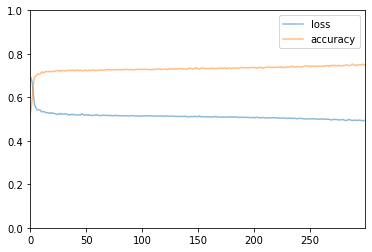

In [41]:
pd.DataFrame(model.history.history).plot(alpha=.5)
plt.gca().set_ylim(0,1)
plt.show()